# **Laporan Ujian Tengah Semester Foundation of Data Science**

Mata Kuliah: Foundation of Data Science (B)

Anggota Kelompok 1:
- I Made Dwika Dyananda Kumara (2105551074)
- Made Wahyu Adwitya Pramana (2105551092)
- I Kadek Rai Pramana (2105551094)

# Impor *Library*

In [2]:
import gdown
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency, levene, pearsonr
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install pingouin -q
from pingouin import welch_anova
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import itertools
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.5 MB/s eta 0:00:00


Kode program di atas bertujuan untuk mengimpor beberapa *library* atau pustaka dalam bahasa pemrograman Python, yang digunakan untuk melakukan beberapa tugas tertentu terkait manipulasi, memuat dan memanipulasi data, membuat visualisasi data, analisis data, dan pemodelan statistik. Berikut adalah penjelasan dari setiap baris kode.

1. `import gdown`: Mengimpor modul `gdown`, yang digunakan untuk mengunduh file dari Google Drive.

2. `import pandas as pd`: Mengimpor pustaka Pandas dengan alias `pd`, yang digunakan untuk manipulasi dan analisis data.

3. `import matplotlib as mpl`: Mengimpor pustaka Matplotlib dengan alias `mpl`, yang digunakan untuk membuat visualisasi data.

4. `import matplotlib.pyplot as plt`: Mengimpor modul `pyplot` dari Matplotlib dengan alias `plt`, yang digunakan untuk membuat plot dan visualisasi data.

5. `import seaborn as sns`: Mengimpor pustaka Seaborn dengan alias `sns`, yang digunakan untuk membuat visualisasi data statistik yang menarik.

6. `import matplotlib.ticker as ticker`: Mengimpor modul `ticker` dari Matplotlib, yang digunakan untuk menyesuaikan label sumbu dalam plot.

7. `import numpy as np`: Mengimpor pustaka NumPy dengan alias `np`, yang digunakan untuk operasi matematika dan array.

8. `from scipy.stats import ttest_ind, chi2_contingency, levene, pearsonr`: Mengimpor beberapa fungsi dari pustaka SciPy, yang digunakan untuk uji statistik dan analisis data.

9. `import statsmodels.formula.api as smf`: Mengimpor pustaka StatsModels dengan alias `smf`, yang digunakan untuk pemodelan statistik dan regresi.

10. `from statsmodels.stats.outliers_influence import variance_inflation_factor`: Mengimpor fungsi `variance_inflation_factor` dari pustaka StatsModels, yang digunakan untuk menghitung faktor inflasi varians (VIF).

11. `!pip install pingouin -q`: Menginstal paket `pingouin` menggunakan `pip` (*Python Package Installer*) dalam mode diam (`-q`).

12. `from pingouin import welch_anova`: Mengimpor fungsi `welch_anova` dari pustaka Pingouin, yang digunakan untuk melakukan analisis varian Welch.

13. `from sklearn.model_selection import train_test_split`: Mengimpor fungsi `train_test_split` dari pustaka Scikit-Learn, yang digunakan untuk membagi dataset menjadi data pelatihan dan data pengujian.

14. `from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score`: Mengimpor beberapa fungsi evaluasi kinerja model regresi dari pustaka Scikit-Learn.

15. `from sklearn.linear_model import LinearRegression`: Mengimpor kelas `LinearRegression` dari pustaka Scikit-Learn, yang digunakan untuk membangun model regresi linier.

16. `import itertools`: Mengimpor modul `itertools`, yang digunakan untuk membuat iterator untuk iterasi kombinasi.

17. `import random`: Mengimpor modul `random`, yang digunakan untuk menghasilkan bilangan acak.


# Pengaturan untuk Visualisasi

In [4]:
sns.set_theme(style='darkgrid')
sns.set_palette("deep")
formatter = ticker.StrMethodFormatter('${x:,.0f}')
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

Kode program di atas digunakan untuk mengatur gaya visualisasi dan format font pada plot yang akan dibuat menggunakan pustaka Seaborn (sns) dan Matplotlib (mpl).
Kode ini membantu untuk menciptakan konsistensi dalam gaya visualisasi dan memastikan plot yang dihasilkan memiliki tampilan yang konsisten dan mudah dibaca.  Berikut adalah penjelasan dari setiap baris kode.

1. `sns.set_theme(style='darkgrid')`: Mengatur tema visualisasi menggunakan `darkgrid`, yang memberikan latar belakang gelap dengan grid yang terlihat.

2. `sns.set_palette("deep")`: Mengatur palet warna yang digunakan dalam visualisasi menggunakan palet "deep", yang berisi sejumlah warna yang berbeda dengan kontras tinggi.

3. `formatter = ticker.StrMethodFormatter('${x:,.0f}')`: Membuat formatter untuk sumbu dengan format string yang menambahkan simbol dollar ($) di depan angka dan memisahkan ribuan dengan koma.

4. `mpl.rcParams['font.family'] = 'sans'`: Mengatur jenis font untuk keseluruhan plot menjadi "sans-serif" (tanpa kait). Jenis font ini sering digunakan dalam visualisasi data karena kemudahannya dibaca.

5. `mpl.rcParams['font.size'] = 12`: Mengatur ukuran font default menjadi 12.

6. `mpl.rcParams['axes.titlesize'] = 16`: Mengatur ukuran font untuk judul sumbu menjadi 16.

7. `mpl.rcParams['axes.labelsize'] = 14`: Mengatur ukuran font untuk label sumbu menjadi 14.

8. `mpl.rcParams['xtick.labelsize'] = 10`: Mengatur ukuran font untuk label pada sumbu x menjadi 10.

9. `mpl.rcParams['ytick.labelsize'] = 10`: Mengatur ukuran font untuk label pada sumbu y menjadi 10.


# Mengunduh *File Dataset*

In [5]:
url_with_sheet = 'https://docs.google.com/spreadsheets/d/12H0-botEeGm69FH6Ze9-W8Md0j_bym6l/edit?usp=sharing&gid=0'
output = 'salaray_survey_2021.xlsx'
gdown.download(url_with_sheet, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=12H0-botEeGm69FH6Ze9-W8Md0j_bym6l
To: /content/salaray_survey_2021.xlsx
100%|██████████| 4.93M/4.93M [00:00<00:00, 31.2MB/s]


'salaray_survey_2021.xlsx'

Kode program di atas digunakan untuk mengunduh *file* *dataset* dari Google Sheets menggunakan library `gdown`, serta menyimpannya dalam *file* Excel dengan nama yang telah ditentukan. Berikut adalah penjelasan dari setiap baris kode.

1. `url_with_sheet = 'https://docs.google.com/spreadsheets/d/1ieUeQZfcxQ-bBT2BHOoOVMvL86PAV7tF/edit?usp=sharing&gid=0'`: Ini adalah variabel yang berisi URL Google Sheets yang ingin diunduh. URL ini mencakup ID lembar Google Sheets serta parameter tambahan yang menunjukkan bahwa kita ingin mengunduh lembar Google Sheets dalam format yang dapat diedit.

2. `output = 'salaray_survey_2021.xlsx'`: Ini adalah variabel yang berisi nama *file* output yang ingin digunakan untuk menyimpan hasil unduhan. Dalam kasus ini, nama *file* output adalah `'salary_survey_2021.xlsx'`, yang menunjukkan bahwa kita ingin menyimpan hasil unduhan dalam format *file* Excel (.xlsx).

3. `gdown.download(url_with_sheet, output, quiet=False, fuzzy=True)`: Ini adalah perintah untuk mengunduh *file* dari Google Sheets menggunakan library `gdown`. Fungsi `gdown.download()` mengambil beberapa argumen, yaitu URL Google Sheets (`url_with_sheet`), nama *file* output (`output`), argumen `quiet=False` menunjukkan bahwa kita ingin mencetak pesan saat mengunduh (misalnya, progres unduhan), serta argumen `fuzzy=True` menunjukkan bahwa kita ingin menggunakan pencocokan untuk menemukan URL unduhan jika URL yang diberikan tidak cocok secara tepat.

# Memuat *File Dataset*

In [ ]:
df = pd.read_excel('/content/salaray_survey_2021.xlsx')
df.head()

Timestamp How old are you?  What industry do you work in?  \
0 2021-04-27 11:02:09.743            25-34   Education (Higher Education)   
1 2021-04-27 11:02:21.562            25-34              Computing or Tech   
2 2021-04-27 11:02:38.125            25-34  Accounting, Banking & Finance   
3 2021-04-27 11:02:40.643            25-34                     Nonprofits   
4 2021-04-27 11:02:41.793            25-34  Accounting, Banking & Finance   

                                  Job title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3                           Program Manager   
4                        Accounting Manager   

  If your job title needs additional context, please clarify here:  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 

   What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)  \
0                                              55000                                                                                                                                                                                      
1                                              54600                                                                                                                                                                                      
2                                              34000                                                                                                                                                                                      
3                                              62000                                                                                                                                                                                      
4                                              60000                                                                                                                                                                                      

   How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.  \
0                                                0.0                                                                                                                                                
1                                             4000.0                                                                                                                                                
2                                                NaN                                                                                                                                                
3                                             3000.0                                                                                                                                                
4                                             7000.0                                                                                                                                                

  Please indicate the currency  \
0                          USD   
1                          GBP   
2                          USD   
3                          USD   
4                          USD   

  If "Other," please indicate the currency here:  

Kode program di atas digunakan untuk membaca file Excel *dataset* (salaray_survey_2021.xlsx) yang telah diunduh sebelumnya menggunakan library `pandas`, kemudian mengubahnya menjadi sebuah *DataFrame*, lalu lima baris pertama dari *DataFrame* tersebut akan ditampilkan untuk pemeriksaan awal. Berikut adalah penjelasan dari setiap baris kode.

1. `df = pd.read_excel('/content/salaray_survey_2021.xlsx')`: Ini adalah perintah yang menggunakan fungsi `read_excel()` dari library `pandas` untuk membaca file Excel yang disimpan di lokasi yang telah ditentukan. Argumen `'content/salary_survey_2021.xlsx'` adalah path ke file Excel yang ingin dibaca. Fungsi `read_excel()` membaca file Excel dan mengonversinya menjadi sebuah *DataFrame*, yang kemudian disimpan dalam variabel `df`.

2. `df.head()`: Ini adalah perintah yang digunakan untuk menampilkan lima baris pertama dari *DataFrame* yang telah dibaca. Fungsi `head()` digunakan untuk melihat sebagian kecil dari data untuk memastikan bahwa pembacaan file berjalan dengan benar dan data terbaca dengan baik. Dengan menggunakan `head()`, kita dapat melihat struktur dan konten data secara ringkas. Jumlah baris yang ditampilkan dapat diatur dengan menyertakan argumen pada fungsi tersebut, tetapi secara default lima baris pertama akan ditampilkan jika tidak ada argumen yang disertakan.

# Pemahaman *Dataset* (*DataFrame*)

## Memeriksa Dimensi *DataFrame*

In [ ]:
df.shape

(27946, 18)

Kode program `df.shape` digunakan untuk mendapatkan dimensi dari *DataFrame* yang disimpan dalam variabel `df`. Metode `shape` mengembalikan sebuah tupel yang berisi dua angka, yaitu jumlah baris (27946) dan jumlah kolom (18) dalam *DataFrame* tersebut. Dengan informasi ini, kita dapat dengan cepat memahami ukuran atau skala dari *DataFrame* yang sedang kita kerjakan.

## Memeriksa Nama Kolom *DataFrame*

In [ ]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

Kode program `df.columns` digunakan untuk mengakses daftar nama kolom (columns) dari *DataFrame* yang disimpan dalam variabel `df`. Ketika kode tersebut dieksekusi, itu akan mengembalikan sebuah objek Index atau Index-like yang berisi nama-nama kolom dari *DataFrame*. Ini sangat berguna untuk mengetahui kolom apa saja yang ada dalam *DataFrame*, serta dapat digunakan sebagai referensi saat melakukan manipulasi atau analisis data lebih lanjut. Berikut merupakan penjelasan mengenai kolom-kolom dari *DataFrame* tersebut.
1. '*Timestamp*': Waktu saat responden mengisi kuesioner.
2. '*How old are you?*': Usia responden.
3. '*What industry do you work in?*': Industri tempat responden bekerja.
4. '*Job title*': Jabatan pekerjaan responden.
5. '*If your job title needs additional context, please clarify here:*': Keterangan tambahan tentang jabatan pekerjaan jika diperlukan.
6. '*What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)*': Gaji tahunan responden.
7. '*How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.*': Kompensasi moneter tambahan yang diterima responden, jika ada.
8. '*Please indicate the currency*': Mata uang yang digunakan responden untuk gaji.
9. '*If "Other," please indicate the currency here:*': Jenis mata uang lain yang digunakan responden, jika mata uang tidak ada pada pertanyaan sebelumnya.
10. '*If your income needs additional context, please provide it here:*': Keterangan tambahan tentang penghasilan responden jika diperlukan.
11. '*What country do you work in?*': Negara tempat responden bekerja.
12. '*If you're in the U.S., what state do you work in?*': Negara bagian tempat responden bekerja, jika pada pertanyaan sebelumnya responden bekerja di Amerika Serikat.
13. '*What city do you work in?*': Kota tempat responden bekerja.
14. '*How many years of professional work experience do you have overall?*': Jumlah tahun pengalaman kerja profesional secara keseluruhan yang dimiliki oleh responden.
15. '*How many years of professional work experience do you have in your field?*': Jumlah tahun pengalaman kerja profesional dalam bidang tertentu yang dimiliki oleh responden.
16. '*What is your highest level of education completed?*': Tingkat pendidikan tertinggi yang telah diselesaikan oleh responden.
17. '*What is your gender?*': Jenis kelamin responden.
18. '*What is your race? (Choose all that apply.)*': Ras responden.

## Memeriksa Indeks *DataFrame*

In [ ]:
df.index

RangeIndex(start=0, stop=27946, step=1)

Kode program `df.index` digunakan untuk mengakses indeks (*index*) dari *DataFrame* `df`. Indeks *DataFrame* adalah label yang menyediakan cara untuk mengakses dan mengidentifikasi setiap baris data dalam *DataFrame*. Output `RangeIndex(start=0, stop=27946, step=1)` menjelaskan bahwa *DataFrame* `df` memiliki indeks berupa `RangeIndex`, yang merupakan indeks berbasis bilangan bulat yang dimulai dari 0 (*start*) hingga 27946 (*stop*), dengan langkah (*step*) 1. Artinya, indeks ini terdiri dari 27946 elemen dengan nilai-nilai berurutan dari 0 hingga 27945.

## Memeriksa Ringkasan Tentang *DataFrame*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                --------------  -----         
 0   Timestamp                                                                                                                                                                                                                             27946 non-null  datetime64[ns]
 1   How old are you?                                                                        

Kode program `df.info()` memberikan informasi tentang *DataFrame* `df`, yakni jumlah entri (baris) dan kolom, serta tipe data dari setiap kolom, jumlah nilai *non-null*, dan penggunaan memori. Ini sangat berguna untuk mengevaluasi apakah ada nilai yang hilang (*null*) dalam *DataFrame*, serta untuk memahami struktur data secara keseluruhan.

# Pembersihan Data (*Data Cleaning*)

## Menyalin *DataFrame*

In [ ]:
df_copy = df.copy()

Kode program tersebut membuat salinan dari *DataFrame* `df` dan menyimpannya ke dalam variabel `df_copy`. Dengan menggunakan method `copy()`, ini bertujuan untuk membuat duplikat dari *DataFrame* yang memiliki data yang sama persis dengan *DataFrame* aslinya. Ini memungkinkan kita untuk melakukan manipulasi atau transformasi pada *DataFrame* salinan tanpa memengaruhi *DataFrame* aslinya. Hal ini berguna ketika kita ingin melakukan operasi seperti filtering, penggantian nilai, atau penghapusan data tanpa merusak *DataFrame* asli. Dengan membuat salinan, kita dapat menjaga integritas data asli sembari melakukan eksperimen atau analisis tambahan pada *DataFrame* salinan.

## Mengganti Nama Kolom

In [ ]:
df_copy = df_copy.rename(columns={
    'Timestamp': 'timestamp',
    'How old are you?': 'age_range',
    'What industry do you work in?': 'industry',
    'Job title': 'job_title',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'annual_salary',
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': 'monetary_compensation',
    'Please indicate the currency': 'currency',
    'If "Other," please indicate the currency here: ': 'other_currency',
    'What country do you work in?': 'country',
    "If you're in the U.S., what state do you work in?": 'state_US',
    "What city do you work in?": 'city',
    "How many years of professional work experience do you have overall?": 'work_experience_overall',
    "How many years of professional work experience do you have in your field?": 'work_experience_field',
    "What is your highest level of education completed?": 'education',
    "What is your gender?": 'gender',
    "What is your race? (Choose all that apply.)": 'race'
})
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   timestamp                                                         27946 non-null  datetime64[ns]
 1   age_range                                                         27946 non-null  object        
 2   industry                                                          27874 non-null  object        
 3   job_title                                                         27946 non-null  object        
 4   If your job title needs additional context, please clarify here:  7233 non-null   object        
 5   annual_salary                                                     27946 non-null  int64         
 6   monetary_compensation                                             2069

Kode program tersebut melakukan pengubahan nama kolom dalam *DataFrame* `df_copy` menggunakan fungsi `rename()`. Kolom-kolom yang diubah namanya meliputi kolom yang terkait dengan informasi seperti *timestamp*, rentang usia, industri tempat bekerja, jabatan, gaji tahunan, kompensasi tambahan, mata uang, negara tempat bekerja, negara bagian (jika berada di Amerika Serikat), kota tempat bekerja, pengalaman kerja secara keseluruhan, pengalaman kerja di bidangnya, tingkat pendidikan, jenis kelamin, dan ras.

Setelah pengubahan nama kolom dilakukan, `df_copy.info()` digunakan untuk menampilkan informasi tentang *DataFrame* setelah perubahan nama kolom tersebut. Hal ini berguna untuk memastikan bahwa perubahan nama kolom telah dilakukan dengan benar.

## Menghapus Kolom yang Tidak Penting

In [ ]:
df_copy = df_copy.drop(columns=['If your job title needs additional context, please clarify here:', 'If your income needs additional context, please provide it here:'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                27946 non-null  datetime64[ns]
 1   age_range                27946 non-null  object        
 2   industry                 27874 non-null  object        
 3   job_title                27946 non-null  object        
 4   annual_salary            27946 non-null  int64         
 5   monetary_compensation    20690 non-null  float64       
 6   currency                 27946 non-null  object        
 7   other_currency           195 non-null    object        
 8   country                  27946 non-null  object        
 9   state_US                 22964 non-null  object        
 10  city                     27867 non-null  object        
 11  work_experience_overall  27946 non-null  object        
 12  work_experience_field    27946 n

Kode program tersebut digunakan untuk menghapus kolom-kolom tertentu yang tidak begitu penting dari *DataFrame* `df_copy`, yaitu kolom '*If your job title needs additional context, please clarify here:*', dan kolom '*If your income needs additional context, please provide it here:*'. Fungsi `drop(columns=[])` digunakan untuk menghapus kolom berdasarkan nama kolom yang diberikan dalam daftar yang disediakan di dalam kurung siku.

Setelah kolom-kolom tertentu dihapus, fungsi `info()` dipanggil untuk memberikan informasi tentang *DataFrame* `df_copy` setelah penghapusan dilakukan, termasuk informasi tentang jumlah entri (baris), nama kolom, dan tipe data dari setiap kolom. Hal ini membantu untuk memverifikasi apakah penghapusan kolom berhasil dilakukan dengan benar.

## Menangani Baris yang Duplikat

### Memeriksa Baris yang Duplikat di Dalam Data

In [ ]:
df_copy[df_copy.duplicated()]

Empty DataFrame
Columns: [timestamp, age_range, industry, job_title, annual_salary, monetary_compensation, currency, other_currency, country, state_US, city, work_experience_overall, work_experience_field, education, gender, race]
Index: []

Kode program tersebut digunakan untuk menemukan baris-baris yang merupakan duplikat dalam *DataFrame* `df_copy`. Method `duplicated()` digunakan untuk mengidentifikasi baris-baris yang memiliki nilai yang sama dengan baris lain dalam *DataFrame*. Ketika method ini dipanggil tanpa parameter, ia akan mengembalikan baris-baris yang merupakan duplikat dari baris-baris sebelumnya. Hal ini dapat membantu untuk menemukan dan mengevaluasi duplikat dalam data untuk kemungkinan penghapusan atau pengelolaan lebih lanjut. Berdasarkan *output* dari kode tersebut, *DataFrame* tersebut tidak memiliki baris yang duplikat. Untuk menghapus baris yang merupakan duplikat dari *DataFrame*, digunakan metode `drop_duplicates()` pada *DataFrame*. Ini akan menghapus baris-baris yang identik (duplikat) di *DataFrame*.

## Menangani Nilai Kosong (*Null Value*)

### Memeriksa Nilai Kosong di Dalam Data

In [ ]:
df_copy.isna().sum()

timestamp                      0
age_range                      0
industry                      72
job_title                      0
annual_salary                  0
monetary_compensation       7256
currency                       0
other_currency             27751
country                        0
state_US                    4982
city                          79
work_experience_overall        0
work_experience_field          0
education                    214
gender                       167
race                         169
dtype: int64

Kode program tersebut digunakan untuk menghitung jumlah nilai yang kosong (NaN) di setiap kolom *DataFrame* `df_copy`. Kode `df_copy.isna()` digunakan untuk membuat *DataFrame* *boolean* baru yang memiliki nilai `True` di setiap sel yang berisi NaN dan `False` di setiap sel yang memiliki nilai bukan NaN. Kode `.sum()` kemudian digunakan untuk menjumlahkan nilai `True` di setiap kolom, karena dalam pemrosesan bilangan *boolean*, `True` dianggap sebagai 1 dan `False` dianggap sebagai 0. Sehingga, `.sum()` akan memberikan jumlah total nilai `True` dalam setiap kolom, yang sebenarnya adalah jumlah nilai NaN di setiap kolom.

Hasil dari kode tersebut adalah *Series* yang menunjukkan jumlah nilai NaN di setiap kolom *DataFrame* `df_copy`. Berdasarkan *output* dari kode tersebut, kolom yang memiliki nilai kosong adalah *industry* (72), *monetary_compensation* (7256), *other_currency* (27751), *state_US* (4982), *city* (79), *education* (214), *gender* (167), dan *race* (169).

### Menghapus Baris yang Bernilai Kosong

In [ ]:
df_copy.dropna(subset=['industry'], inplace=True)
df_copy.dropna(subset=['city'], inplace=True)
df_copy.dropna(subset=['education'], inplace=True)
df_copy.dropna(subset=['gender'], inplace=True)
df_copy.dropna(subset=['race'], inplace=True)

Kode program tersebut digunakan untuk menghapus baris yang memiliki nilai yang kosong (NaN) di kolom tertentu dari *DataFrame* `df_copy`. Dilakukan penghapusan baris yang mengandung nilai kosong pada beberapa kolom, yaitu kolom *industry* (72), *city* (79), *education* (214), *gender* (167), dan *race* (169). Hal ini dilakukan karena total nilai yang kosong belum mencapai 30% dari keseluruhan data, yaitu (72 + 79 + 214 + 167 + 169) ÷ 27946 × 100 = 2,5%. Baris yang mengandung nilai kosong pada kolom *monetary_compensation*, *other_currency*, dan *state_US* tidak dihapus karena kolom tersebut bersifat opsional.

Kode program `df_copy.dropna(subset=['industry'], inplace=True)` bertujuan untuk menghapus baris yang memiliki nilai NaN di kolom 'industry' dan menyimpan perubahan tersebut kembali ke *DataFrame* `df_copy`. Hal yang sama dilakukan untuk kolom '*city*', '*education*', '*gender*', dan '*race*'. Dengan mengatur argumen `inplace=True`, perubahan tersebut diterapkan langsung pada *DataFrame* `df_copy` tanpa perlu menyimpannya sebagai variabel baru.

### Mengisi Nilai Kosong pada Kolom '*monetary_compensation*' dengan Nilai 0

In [ ]:
df_copy['monetary_compensation'] = df_copy['monetary_compensation'].fillna(0)

Kode program tersebut bertujuan untuk mengganti nilai yang kosong (NaN) di kolom '*monetary_compensation*' dengan nilai 0. Ini dilakukan dengan menggunakan metode `fillna(0)` yang mengisi semua nilai NaN dengan nilai yang ditentukan, dalam hal ini adalah 0. Ini bermanfaat ketika ingin memastikan bahwa kolom '*monetary_compensation*' memiliki nilai yang valid untuk dianalisis atau diproses lebih lanjut.

### Memeriksa Apakah Nilai Kosong Telah Diperbarui

In [ ]:
df_copy.isna().sum()

timestamp                      0
age_range                      0
industry                       0
job_title                      0
annual_salary                  0
monetary_compensation          0
currency                       0
other_currency             27167
country                        0
state_US                    4827
city                           0
work_experience_overall        0
work_experience_field          0
education                      0
gender                         0
race                           0
dtype: int64

Kode program tersebut digunakan untuk menghitung jumlah nilai yang kosong (NaN) di setiap kolom *DataFrame* `df_copy`, serta untuk memastikan apakah kolom yang mengandung nilai kosong telah berhasil diperbarui. Berdasarkan *output* dari kode tersebut, kolom-kolom yang dilakukan proses pengolahan nilai kosong telah berhasil diperbarui, yakni kolom *industry*, *monetary_compensation*, *city*, *education*, *gender*, dan *race*.

## Mengonversi Nilai Kategorikal Rentang Usia menjadi Representasi Numerik

In [ ]:
age_mapping = {
    'under 18': 10,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or over': 65
}

df_copy['numerical_age_range'] = df_copy['age_range'].map(age_mapping)

Kode program di atas digunakan untuk mengonversi nilai kategori rentang usia menjadi nilai numerik berdasarkan pemetaan yang telah ditentukan, yakni menggunakan titik tengah dari setiap rentang, sehingga dapat digunakan dalam analisis statistik atau pemodelan data. Berikut adalah penjelasan dari setiap baris kode.

1. `age_mapping`: Pembuatan sebuah *dictionary*, dimana kunci-kunci adalah nilai-nilai kategorikal dari rentang usia, dan nilainya adalah representasi numerikal yang dipilih untuk setiap rentang usia.

2. `df_copy['numerical_age_range'] = df_copy['age_range'].map(age_mapping)`: Fungsi `map()` digunakan pada kolom '*age_range*' dari *DataFrame* `df_copy` untuk mengganti setiap nilai kategorikal dengan nilai numerikal yang sesuai dari *dictionary* `age_mapping`. Hasil dari pemetaan tersebut disimpan dalam kolom baru '*numerical_age_range*' dalam *DataFrame* `df_copy`.

## Membersihkan Kolom '*industry*'

In [ ]:
df_copy['industry'] = df_copy['industry'].str.lower()
df_copy['industry'] = df_copy['industry'].str.replace('"', '')
df_copy['industry'] = df_copy['industry'].str.replace(r'\(.*\)', '', regex=True)
df_copy['industry'] = df_copy['industry'].str.split('-', n=1).str[0]
df_copy['industry'] = df_copy['industry'].str.split(',', n=1).str[0]
df_copy['industry'] = df_copy['industry'].str.replace('&', ' and ')
df_copy['industry'] = df_copy['industry'].str.replace('/', ' or ')
df_copy['industry'] = df_copy['industry'].str.replace(r'[^a-zA-Z ]', '', regex=True)
df_copy['industry'] = df_copy['industry'].str.replace(r'\s+', ' ', regex=True)
df_copy['industry'] = df_copy['industry'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*industry*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['industry'] = df_copy['industry'].str.lower()`: Mengonversi semua teks dalam kolom '*industry*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['industry'] = df_copy['industry'].str.replace('"', '')`: Menghapus tanda kutip ganda ("") dari teks dalam kolom '*industry*'. Ini dilakukan untuk membersihkan teks dari karakter yang tidak diinginkan atau tanda baca yang tidak relevan.

3. `df_copy['industry'] = df_copy['industry'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*industry*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

4. `df_copy['industry'] = df_copy['industry'].str.split('-', n=1).str[0]`: Memecah teks dalam kolom '*industry*' berdasarkan tanda strip (-) dan hanya mengambil bagian pertama sebelum tanda strip tersebut. Ini berguna jika ada teks yang terdiri dari dua bagian terpisah yang terhubung oleh tanda strip, dan kita hanya tertarik pada bagian pertama.

5. `df_copy['industry'] = df_copy['industry'].str.split(',', n=1).str[0]`: Memecah teks dalam kolom '*industry*' berdasarkan tanda koma (,) dan hanya mengambil bagian pertama sebelum tanda koma tersebut. Ini serupa dengan langkah sebelumnya, tetapi untuk memisahkan teks yang mungkin memiliki format yang berbeda.

6. `df_copy['industry'] = df_copy['industry'].str.replace('&', ' and ')`: Mengganti simbol '&' dengan kata '*and*' dalam teks kolom '*industry*'. Ini membantu dalam memastikan bahwa teks tersebut mudah dipahami dan terbaca.

7. `df_copy['industry'] = df_copy['industry'].str.replace('/', ' or ')`: Mengganti simbol '/' dengan kata 'or' dalam teks kolom '*industry*'. Ini juga membantu dalam memastikan teks yang mudah dipahami dan terbaca.

8. `df_copy['industry'] = df_copy['industry'].str.replace(r'[^a-zA-Z ]', '', regex=True)`: Menghapus semua karakter selain huruf (baik huruf besar maupun kecil) dan spasi dari teks dalam kolom '*industry*'. Ini berguna untuk membersihkan teks dari karakter khusus atau angka yang tidak relevan.

9. `df_copy['industry'] = df_copy['industry'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

10. `df_copy['industry'] = df_copy['industry'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*industry*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.

## Membersihkan Kolom '*job_title*'

In [ ]:
df_copy['job_title'] = df_copy['job_title'].str.lower()
df_copy['job_title'] = df_copy['job_title'].str.replace('"', '')
df_copy['job_title'] = df_copy['job_title'].str.replace(r'\(.*\)', '', regex=True)
df_copy['job_title'] = df_copy['job_title'].str.split('-', n=1).str[0]
df_copy['job_title'] = df_copy['job_title'].str.split(',', n=1).str[0]
df_copy['job_title'] = df_copy['job_title'].str.replace('&', ' and ')
df_copy['job_title'] = df_copy['job_title'].str.replace('/', ' or ')
df_copy['job_title'] = df_copy['job_title'].str.replace(r'[^a-zA-Z ]', '', regex=True)
df_copy['job_title'] = df_copy['job_title'].str.replace(r'\s+', ' ', regex=True)
df_copy['job_title'] = df_copy['job_title'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*job_title*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['job_title'] = df_copy['job_title'].str.lower()`: Mengonversi semua teks dalam kolom '*job_title*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['job_title'] = df_copy['job_title'].str.replace('"', '')`: Menghapus tanda kutip ganda ("") dari teks dalam kolom '*job_title*'. Ini dilakukan untuk membersihkan teks dari karakter yang tidak diinginkan atau tanda baca yang tidak relevan.

3. `df_copy['job_title'] = df_copy['job_title'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*job_title*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

4. `df_copy['job_title'] = df_copy['job_title'].str.split('-', n=1).str[0]`: Memecah teks dalam kolom '*job_title*' berdasarkan tanda strip (-) dan hanya mengambil bagian pertama sebelum tanda strip tersebut. Ini berguna jika ada teks yang terdiri dari dua bagian terpisah yang terhubung oleh tanda strip, dan kita hanya tertarik pada bagian pertama.

5. `df_copy['job_title'] = df_copy['job_title'].str.split(',', n=1).str[0]`: Memecah teks dalam kolom '*job_title*' berdasarkan tanda koma (,) dan hanya mengambil bagian pertama sebelum tanda koma tersebut. Ini serupa dengan langkah sebelumnya, tetapi untuk memisahkan teks yang mungkin memiliki format yang berbeda.

6. `df_copy['job_title'] = df_copy['job_title'].str.replace('&', ' and ')`: Mengganti simbol '&' dengan kata '*and*' dalam teks kolom '*job_title*'. Ini membantu dalam memastikan bahwa teks tersebut mudah dipahami dan terbaca.

7. `df_copy['job_title'] = df_copy['job_title'].str.replace('/', ' or ')`: Mengganti simbol '/' dengan kata 'or' dalam teks kolom '*job_title*'. Ini juga membantu dalam memastikan teks yang mudah dipahami dan terbaca.

8. `df_copy['job_title'] = df_copy['job_title'].str.replace(r'[^a-zA-Z ]', '', regex=True)`: Menghapus semua karakter selain huruf (baik huruf besar maupun kecil) dan spasi dari teks dalam kolom '*job_title*'. Ini berguna untuk membersihkan teks dari karakter khusus atau angka yang tidak relevan.

9. `df_copy['job_title'] = df_copy['job_title'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

10. `df_copy['job_title'] = df_copy['job_title'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*job_title*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.

## Membersihkan Kolom '*country*'

In [ ]:
df_copy['country'] = df_copy['country'].str.lower()
df_copy['country'] = df_copy['country'].str.replace(r'\(.*\)', '', regex=True)
df_copy['country'] = df_copy['country'].str.replace(r'[^a-zA-Z ]', '', regex=True)
df_copy['country'] = df_copy['country'].str.replace(r'\s+', ' ', regex=True)
df_copy['country'] = df_copy['country'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*country*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['country'] = df_copy['country'].str.lower()`: Mengonversi semua teks dalam kolom '*country*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['country'] = df_copy['country'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*country*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

4. `df_copy['country'] = df_copy['country'].str.replace(r'[^a-zA-Z ]', '', regex=True)`: Menghapus semua karakter selain huruf (baik huruf besar maupun kecil) dan spasi dari teks dalam kolom '*country*'. Ini berguna untuk membersihkan teks dari karakter khusus atau angka yang tidak relevan.

5. `df_copy['country'] = df_copy['country'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

6. `df_copy['country'] = df_copy['country'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*country*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.

### Memetakan Data Kolom '*country*'

In [ ]:
df_copy['country'].unique()

array(['united states', 'united kingdom', 'us', 'usa', 'canada', 'uk',
       'scotland', 'the netherlands', 'australia', 'england', 'finland',
       'united states of america', 'france', 'germany', 'ireland',
       'india', 'isa', 'argentina', 'great britain', 'united state',
       'denmark', 'america', 'netherlands', 'spain', 'switzerland',
       'bermuda', 'the united states', 'united state of america',
       'malaysia', 'mexico', 'united stated', 'south africa', 'belgium',
       'northern ireland', 'sweden', 'hong kong', 'kuwait', 'norway',
       'sri lanka', 'contracts', 'usa virgin islands', 'united statws',
       'englanduk',
       'we dont get raises we get quarterly bonuses but they periodically asses income in the area you work so i got a raise because a rd party assessment showed i was paid too little for the area we were located',
       'unites states', 'england uk', 'greece', 'u s', 'britain',
       'united sates', 'austria', 'brazil', 'canada ottawa ontario',
 

Kode program `df_copy['country'].unique()` digunakan untuk menampilkan nilai unik yang terdapat dalam kolom 'country' dari *DataFrame* `df_copy`. Kode `df_copy['country']` digunakan untuk mengambil kolom 'country' dari *DataFrame* `df_copy`. Fungsi `.unique()` digunakan untuk mengembalikan nilai unik yang terdapat dalam suatu array atau kolom. Hasil dari kode ini akan berupa array yang berisi daftar negara yang berbeda dalam *dataset* tersebut. Dengan menggunakan `.unique()`, kita dapat melihat semua negara yang terdaftar dalam *dataset* tanpa ada duplikasi.

In [ ]:
country_mapping = {
    'united states': 'United States',
    'united kingdom': 'United Kingdom',
    'us': 'United States',
    'usa': 'United States',
    'canada': 'Canada',
    'uk': 'United Kingdom',
    'scotland': 'Scotland',
    'the netherlands': 'Netherlands',
    'australia': 'Australia',
    'spain': 'Spain',
    'england': 'England',
    'finland': 'Finland',
    'united states of america': 'United States',
    'france': 'France',
    'germany': 'Germany',
    'ireland': 'Ireland',
    'india': 'India',
    'isa': 'United States',
    'argentina': 'Argentina',
    'great britain': 'United Kingdom',
    'united state': 'United States',
    'denmark': 'Denmark',
    'america': 'United States',
    'netherlands': 'Netherlands',
    'switzerland': 'Switzerland',
    'bermuda': 'Bermuda',
    'the united states': 'United States',
    'united state of america': 'United States',
    'malaysia': 'Malaysia',
    'mexico': 'Mexico',
    'united stated': 'United States',
    'south africa': 'South Africa',
    'belgium': 'Belgium',
    'northern ireland': 'Northern Ireland',
    'sweden': 'Sweden',
    'hong kong': 'Hong Kong',
    'kuwait': 'Kuwait',
    'norway': 'Norway',
    'sri lanka': 'Sri Lanka',
    'contracts': 'Unknown',
    'usa virgin islands': 'United States',
    'united statws': 'United States',
    'englanduk': 'England',
    'we dont get raises we get quarterly bonuses but they periodically asses income in the area you work so i got a raise because a rd party assessment showed i was paid too little for the area we were located': 'Unknown',
    'unites states': 'United States',
    'england uk': 'England',
    'greece': 'Greece',
    'japan': 'Japan',
    'u s': 'United States',
    'britain': 'United Kingdom',
    'united sates': 'United States',
    'austria': 'Austria',
    'brazil': 'Brazil',
    'canada ottawa ontario': 'Canada',
    'global': 'Unknown',
    'united states of american': 'United States',
    'uniited states': 'United States',
    'worldwide': 'Unknown',
    'canadw': 'Canada',
    'hungary': 'Hungary',
    'luxembourg': 'Luxembourg',
    'united sates of america': 'United States',
    'united states i work from home and my clients are all over the uscanadapr': 'United States',
    'colombia': 'Colombia',
    'unted states': 'United States',
    'united statesp': 'United States',
    'united stattes': 'United States',
    'united statea': 'United States',
    'new zealand': 'New Zealand',
    'trinidad and tobago': 'Trinidad and Tobago',
    'united statees': 'United States',
    'cayman islands': 'Cayman Islands',
    'can': 'Canada',
    'i am located in canada but i work for a company in the us': 'Canada',
    'uniyed states': 'United States',
    'uniyes states': 'United States',
    'united states of americas': 'United States',
    'ua': 'Unknown',
    'czech republic': 'Czech Republic',
    'czechia': 'Czech Republic',
    'latvia': 'Latvia',
    'puerto rico': 'Puerto Rico',
    'us of a': 'United States',
    'rwanda': 'Rwanda',
    'united arab emirates': 'United Arab Emirates',
    'bangladesh': 'Bangladesh',
    'romania': 'Romania',
    'united kindom': 'United Kingdom',
    'united status': 'United States',
    'currently finance': 'Unknown',
    'serbia': 'Serbia',
    'philippines': 'Philippines',
    'russia': 'Russia',
    'poland': 'Poland',
    'uxz': 'Unknown',
    'turkey': 'Turkey',
    'canda': 'Canada',
    'canada and usa': 'Unknown',
    'catalonia': 'Spain',
    'year is deducted for benefits': 'Unknown',
    'italy': 'Italy',
    'jersey channel islands': 'Jersey',
    'china': 'China',
    'virginia': 'United States',
    'afghanistan': 'Afghanistan',
    'israel': 'Israel',
    'uss': 'Unknown',
    'uniteed states': 'United States',
    'new zealand aotearoa': 'New Zealand',
    'hartford': 'United States',
    'japan us gov position': 'Japan',
    'csnada': 'Canada',
    'united stares': 'United States',
    'mainland china': 'China',
    'is': 'Unknown',
    'uk for us company': 'United Kingdom',
    'nz': 'New Zealand',
    'taiwan': 'Taiwan',
    'canad': 'Canada',
    'unite states': 'United States',
    'the us': 'United States',
    'cambodia': 'Cambodia',
    'vietnam': 'Vietnam',
    'remote': 'Unknown',
    'singapore': 'Singapore',
    'south korea': 'South Korea',
    'thailand': 'Thailand',
    'lithuania': 'Lithuania',
    'eritrea': 'Eritrea',
    'indonesia': 'Indonesia',
    'for the united states government but posted overseas': 'United States',
    'united kingdomk': 'United Kingdom',
    'cuba': 'Cuba',
    'slovenia': 'Slovenia',
    'australi': 'Australia',
    'cote divoire': "Côte d'Ivoire",
    'from romania but for an us based company': 'Romania',
    'somalia': 'Somalia',
    'wales': 'Wales',
    'england gb': 'England',
    'unitedstates': 'United States',
    'danmark': 'Denmark',
    'nl': 'Netherlands',
    'nederland': 'Netherlands',
    'slovakia': 'Slovakia',
    'portugal': 'Portugal',
    'england united kingdom': 'England',
    'sierra leone': 'Sierra Leone',
    'englang': 'England',
    'united statew': 'United States',
    'uae': 'United Arab Emirates',
    'bonus based on meeting yearly goals set w my supervisor': 'Unknown',
    'international': 'Unknown',
    'the bahamas': 'The Bahamas',
    'i earn commission on sales if i meet quota im guaranteed another k min last year i earned an additional k its not uncommon for people in my space to earn k after commission': 'Unknown',
    'costa rica': 'Costa Rica',
    'united statues': 'United States',
    'untied states': 'United States',
    'chile': 'Chile',
    'uk remote': 'United Kingdom',
    'scotland uk': 'Scotland',
    'usab': 'United States',
    'unitied states': 'United States',
    'qatar': 'Qatar',
    'united sttes': 'United States',
    'unites kingdom': 'United Kingdom',
    'nigeria': 'Nigeria',
    'panam': 'Panama',
    'austria but i work remotely for a dutchbritish company': 'Austria',
    'i work for an us based company but im from argentina': 'Argentina',
    'i was brought in on this salary to help with the ehr and very quickly was promoted to current position but compensation was not altered': 'Unknown',
    'uniter statez': 'United States',
    'congo': 'Congo',
    'uruguay': 'Uruguay',
    'pakistan': 'Pakistan',
    'brasil': 'Brazil',
    'usa tomorrow': 'United States',
    'united stateds': 'United States',
    'na': 'Unknown',
    'us govt employee overseas country withheld': 'United States',
    'uganda': 'Uganda',
    'malta': 'Malta',
    'saudi arabia': 'Saudi Arabia',
    'bulgaria': 'Bulgaria',
    'estonia': 'Estonia',
    'morocco': 'Morocco',
    'africa': 'Unknown',
    'ecuador': 'Ecuador',
    'zimbabwe': 'Zimbabwe',
    'ghana': 'Ghana',
    'san francisco': 'United States',
    'usat': 'United States',
    '': 'Unknown',
    'luxemburg': 'Luxembourg',
    'unitef stated': 'United States',
    'wales uk': 'Wales',
    'croatia': 'Croatia',
    'usaa': 'United States',
    'ukraine': 'Ukraine',
    'united states puerto rico': 'United States',
    'from new zealand but on projects across apac': 'New Zealand',
    'y': 'Unknown',
    'united y': 'Unknown',
    'isle of man': 'Isle of Man',
    'northern ireland united kingdom': 'Northern Ireland',
    'europe': 'Unknown',
    'california': 'United States',
    'uk but for globally fully remote company': 'United Kingdom',
    'australian': 'Australia',
    'mxico': 'Mexico',
    'jamaica': 'Jamaica',
    'usd': 'United States',
    'usa but for foreign govt': 'United States',
    'kenya': 'Kenya',
    'jordan': 'Jordan',
    'united statss': 'United States',
    'argentina but my org is in thailand': 'Argentina',
    'i work for a uaebased organization though i am personally in the us': 'United States',
    'aotearoa new zealand': 'New Zealand',
    'policy': 'Unknown',
    'cyprus': 'Cyprus',
    'hong konh': 'Hong Kong',
    'united states is america': 'United States',
    'liechtenstein': 'Liechtenstein',
    'company in germany i work from pakistan': 'Germany',
    'bosnia and herzegovina': 'Bosnia and Herzegovina'
}

df_copy['country'] = df_copy['country'].map(country_mapping)
df_copy['country'].unique()

array(['United States', 'United Kingdom', 'Canada', 'Scotland',
       'Netherlands', 'Australia', 'England', 'Finland', 'France',
       'Germany', 'Ireland', 'India', 'Argentina', 'Denmark', 'Spain',
       'Switzerland', 'Bermuda', 'Malaysia', 'Mexico', 'South Africa',
       'Belgium', 'Northern Ireland', 'Sweden', 'Hong Kong', 'Kuwait',
       'Norway', 'Sri Lanka', 'Unknown', 'Greece', 'Austria', 'Brazil',
       'Hungary', 'Luxembourg', 'Colombia', 'New Zealand',
       'Trinidad and Tobago', 'Cayman Islands', 'Czech Republic',
       'Latvia', 'Puerto Rico', 'Rwanda', 'United Arab Emirates',
       'Romania', 'Serbia', 'Philippines', 'Russia', 'Poland', 'Turkey',
       'Italy', 'Jersey', 'China', 'Afghanistan', 'Israel', 'Japan',
       'Taiwan', 'Cambodia', 'Vietnam', 'Singapore', 'South Korea',
       'Thailand', 'Bangladesh', 'Lithuania', 'Eritrea', 'Indonesia',
       'Cuba', 'Slovenia', "Côte d'Ivoire", 'Wales', 'Slovakia',
       'Portugal', 'Sierra Leone', 'The Bahamas'

Kode program di atas digunakan untuk memetakan nama negara dalam *dataset* ke nama negara yang konsisten dan terstandarisasi. Hal ini bertujuan untuk merapikan data dan menggabungkan beberapa variasi nama negara yang sama menjadi satu. Berikut adalah penjelasan dari setiap baris kode.

1. `country_mapping`: Ini adalah kamus yang berisi pemetaan dari nama negara yang bervariasi ke nama negara yang konsisten.

2. `df_copy['country'].map(country_mapping)`: Metode `map()` digunakan untuk menerapkan pemetaan yang telah didefinisikan dalam `country_mapping` ke setiap nilai dalam kolom '*country*' dari *DataFrame* `df_copy`. Dengan cara ini, setiap nama negara yang bervariasi akan diganti dengan nama negara yang konsisten berdasarkan pemetaan yang telah ditentukan.

3. `df_copy['country'].unique()`: Metode ini digunakan untuk menampilkan nilai unik yang terdapat dalam kolom '*country*' setelah pemetaan dilakukan. Ini membantu memastikan bahwa semua variasi nama negara yang berbeda telah digabungkan menjadi satu nama yang konsisten.

## Membersihkan Kolom '*state_US*'

In [ ]:
df_copy['state_US'] = df_copy['state_US'].str.lower()
df_copy['state_US'] = df_copy['state_US'].str.replace(r'\(.*\)', '', regex=True)
df_copy['state_US'] = df_copy['state_US'].str.replace(r'[^a-zA-Z ]', '', regex=True)
df_copy['state_US'] = df_copy['state_US'].str.replace(r'\s+', ' ', regex=True)
df_copy['state_US'] = df_copy['state_US'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*state_US*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['state_US'] = df_copy['state_US'].str.lower()`: Mengonversi semua teks dalam kolom '*state_US*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['state_US'] = df_copy['state_US'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*state_US*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

4. `df_copy['state_US'] = df_copy['state_US'].str.replace(r'[^a-zA-Z ]', '', regex=True)`: Menghapus semua karakter selain huruf (baik huruf besar maupun kecil) dan spasi dari teks dalam kolom '*state_US*'. Ini berguna untuk membersihkan teks dari karakter khusus atau angka yang tidak relevan.

5. `df_copy['state_US'] = df_copy['state_US'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

6. `df_copy['state_US'] = df_copy['state_US'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*state_US*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.

## Membersihkan Kolom '*city*'

In [ ]:
df_copy['city'] = df_copy['city'].str.lower()
df_copy['city'] = df_copy['city'].str.replace(r'\(.*\)', '', regex=True)
df_copy['city'] = df_copy['city'].str.replace(r'[^a-zA-Z ]', '', regex=True)
df_copy['city'] = df_copy['city'].str.replace(r'\s+', ' ', regex=True)
df_copy['city'] = df_copy['city'].str.strip()
df_copy['city'].fillna('unknown', inplace=True)

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*city*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['city'] = df_copy['city'].str.lower()`: Mengonversi semua teks dalam kolom '*city*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['city'] = df_copy['city'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*city*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

4. `df_copy['city'] = df_copy['city'].str.replace(r'[^a-zA-Z ]', '', regex=True)`: Menghapus semua karakter selain huruf (baik huruf besar maupun kecil) dan spasi dari teks dalam kolom '*city*'. Ini berguna untuk membersihkan teks dari karakter khusus atau angka yang tidak relevan.

5. `df_copy['city'] = df_copy['city'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

6. `df_copy['city'] = df_copy['city'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*city*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.

7. `df_copy['city'].fillna('unknown', inplace=True)`: Mengganti nilai-nilai yang hilang (NaN) dalam kolom '*city*' dengan nilai yang ditentukan, dalam hal ini adalah '*unknown*', kemudian menerapkan perubahan tersebut secara langsung pada *DataFrame* tanpa perlu menyimpan hasilnya ke dalam variabel baru. Ini memastikan bahwa tidak ada nilai yang hilang dalam kolom '*city*', serta untuk mempertahankan integritas data.

## Membersihkan Kolom '*work_experience_overall*'

In [ ]:
df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.lower()
df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.replace(' - ', '-')
df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.replace(r'\s+', ' ', regex=True)
df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*work_experience_overall*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.lower()`: Mengonversi semua teks dalam kolom '*work_experience_overall*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.replace(' - ', '-')`: Mengganti tanda ' - ' dengan '-', yang bertujuan untuk merapikan spasi pada teks.

3. `df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

4. `df_copy['work_experience_overall'] = df_copy['work_experience_overall'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*work_experience_overall*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.


## Membersihkan Kolom '*work_experience_field*'

In [ ]:
df_copy['work_experience_field'] = df_copy['work_experience_field'].str.lower()
df_copy['work_experience_field'] = df_copy['work_experience_field'].str.replace(' - ', '-')
df_copy['work_experience_field'] = df_copy['work_experience_field'].str.replace(r'\s+', ' ', regex=True)
df_copy['work_experience_field'] = df_copy['work_experience_field'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*work_experience_field*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['work_experience_field'] = df_copy['work_experience_field'].str.lower()`: Mengonversi semua teks dalam kolom '*work_experience_field*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['work_experience_field'] = df_copy['work_experience_field'].str.replace(' - ', '-')`: Mengganti tanda ' - ' dengan '-', yang bertujuan untuk merapikan spasi pada teks.

3. `df_copy['work_experience_field'] = df_copy['work_experience_field'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

4. `df_copy['work_experience_field'] = df_copy['work_experience_field'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*work_experience_field*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.


## Mengonversi Nilai Kategorikal Rentang Tahun Pengalaman Kerja menjadi Representasi Numerik

In [ ]:
category_mapping = {
    '1 year or less': 0.5,
    '2-4 years': 3,
    '5-7 years': 6,
    '8-10 years': 9,
    '11-20 years': 15.5,
    '21-30 years': 25.5,
    '31-40 years': 35.5,
    '41 years or more': 41
}

df_copy['numerical_work_experience_overall'] = df_copy['work_experience_overall'].map(category_mapping)
df_copy['numerical_work_experience_field'] = df_copy['work_experience_field'].map(category_mapping)

Kode program di atas digunakan untuk mengonversi nilai kategori rentang tahun pengalaman kerja menjadi nilai numerik berdasarkan pemetaan yang telah ditentukan, yakni menggunakan titik tengah dari setiap rentang, sehingga dapat digunakan dalam analisis statistik atau pemodelan data. Berikut adalah penjelasan dari setiap baris kode.

1. `category_mapping`: Ini adalah sebuah kamus (*dictionary*) yang berisi pemetaan antara kategori rentang tahun pengalaman kerja dengan nilai numerik yang sesuai. Setiap kategori tahun pengalaman kerja memiliki nilai numerik yang mewakili rentang tahunnya.

2. `df_copy['numerical_work_experience_overall'] = df_copy['work_experience_overall'].map(category_mapping)`: Dengan menggunakan metode `map()`, kategori-kategori dalam kolom '*work_experience_overall*' (rentang tahun pengalaman kerja secara keseluruhan) akan diubah menjadi nilai numerik sesuai dengan pemetaan yang telah ditentukan dalam `category_mapping`. Hasil konversi akan disimpan dalam kolom baru bernama '*numerical_work_experience_overall*'.

3. `df_copy['numerical_work_experience_field'] = df_copy['work_experience_field'].map(category_mapping)`: Langkah yang sama juga dilakukan untuk kolom '*work_experience_field*' (rentang tahun pengalaman kerja dalam bidang pekerjaan), di mana kategori-kategorinya akan diubah menjadi nilai numerik sesuai dengan pemetaan yang sama dengan sebelumnya. Hasilnya akan disimpan dalam kolom baru bernama '*numerical_work_experience_field*'.

## Membersihkan Kolom '*education*'

In [ ]:
df_copy['education'] = df_copy['education'].str.replace(r'\(.*\)', '', regex=True)
df_copy['education'] = df_copy['education'].str.replace(r'\s+', ' ', regex=True)
df_copy['education'] = df_copy['education'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*education*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['education'] = df_copy['education'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*education*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

2. `df_copy['education'] = df_copy['education'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

3. `df_copy['education'] = df_copy['education'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*education*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.


### Mengonversi Nilai Kategorikal Tingkat Pendidikan menjadi Representasi Numerik

In [ ]:
education_mapping = {
    'High School': 1,
    'Some college': 2,
    'College degree': 3,
    "Master's degree": 4,
    'PhD': 5,
    'Professional degree': 6
}

df_copy['education_encoded'] = df_copy['education'].map(education_mapping)

Kode program di atas digunakan untuk mengonversi nilai kategori tingkat pendidikan menjadi nilai numerik berdasarkan pemetaan yang ditentukan, sehingga dapat digunakan dalam analisis statistik atau pemodelan data. Berikut adalah penjelasan dari setiap baris kode.

1. `education_mapping`: Ini adalah sebuah kamus (*dictionary*) yang berisi pemetaan antara kategori tingkat pendidikan dengan nilai numerik yang sesuai. Setiap kategori tingkat pendidikan memiliki nilai numerik yang mewakili level pendidikannya.

2. `df_copy['education_encoded'] = df_copy['education'].map(education_mapping)`: Dengan menggunakan metode `map()`, kategori-kategori dalam kolom '*education*' (tingkat pendidikan) akan diubah menjadi nilai numerik sesuai dengan pemetaan yang telah ditentukan dalam `education_mapping`. Hasil konversi akan disimpan dalam kolom baru bernama '*education_encoded*'.

## Membersihkan Kolom '*gender*'

In [ ]:
df_copy['gender'] = df_copy['gender'].str.replace(r'\s+', ' ', regex=True)
df_copy['gender'] = df_copy['gender'].str.strip()

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*gender*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['gender'] = df_copy['gender'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

2. `df_copy['gender'] = df_copy['gender'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*gender*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.


### Menggabungkan Nilai Lainnya dalam Kolom '*gender*' Menjadi Satu Kategori

In [ ]:
df_copy['gender'].unique()

array(['Woman', 'Non-binary', 'Man', 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

Kode program tersebut digunakan untuk menampilkan nilai unik yang terdapat dalam kolom '*gender*' dari *DataFrame* `df_copy`. Kode `df_copy['gender']` akan mengakses kolom '*gender*' dari *DataFrame* `df_copy`. Metode `unique()` digunakan untuk mengembalikan nilai-nilai unik yang terdapat dalam suatu array atau kolom. Hasilnya adalah daftar nilai unik yang terdapat dalam kolom '*gender*', yang akan membantu untuk memahami distribusi kategori atau label yang berbeda dalam data tersebut.

In [ ]:
df_copy['gender'] = df_copy['gender'].replace({'Other or prefer not to answer': 'Other'})
df_copy['gender'] = df_copy['gender'].replace({'Prefer not to answer': 'Other'})
df_copy['gender'] = df_copy['gender'].replace({'Non-binary': 'Other'})
df_copy['gender'].unique()

array(['Woman', 'Other', 'Man'], dtype=object)

Kode program tersebut digunakan untuk menggabungkan beberapa nilai dalam kolom '*gender*' menjadi satu kategori tunggal yang disebut '*Other*'. Hal ini biasanya dilakukan untuk merapikan atau menyederhanakan kategori yang ada dalam data. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['gender'].replace({'Other or prefer not to answer': 'Other'})`: Mengganti nilai '*Other or prefer not to answer*' dalam kolom '*gender*' dengan nilai '*Other*'.

2. `df_copy['gender'].replace({'Prefer not to answer': 'Other'})`: Mengganti nilai '*Prefer not to answer*' dalam kolom '*gender*' dengan nilai '*Other*'.

3. `df_copy['gender'].replace({'Non-binary': 'Other'})`: Mengganti nilai '*Non-binary*' dalam kolom '*gender*' dengan nilai '*Other*'.

4. `df_copy['gender'].unique()`: Ini digunakan untuk menampilkan nilai unik yang terdapat dalam kolom '*gender*' setelah dilakukan penggantian. Hal ini membantu memastikan bahwa hanya ada nilai '*Man*', '*Woman*', atau '*Other*' setelah penggantian nilai-nilai lainnya.

## Membersihkan Kolom '*race*'

In [ ]:
df_copy['race'] = df_copy['race'].str.lower()
df_copy['race'] = df_copy['race'].str.replace('"', '')
df_copy['race'] = df_copy['race'].str.replace(r'\(.*\)', '', regex=True)
df_copy['race'] = df_copy['race'].str.split('-', n=1).str[0]
df_copy['race'] = df_copy['race'].str.split(',', n=1).str[0]
df_copy['race'] = df_copy['race'].str.replace('&', ' and ')
df_copy['race'] = df_copy['race'].str.replace('/', ' or ')
df_copy['race'] = df_copy['race'].str.replace(r'\s+', ' ', regex=True)
df_copy['race'] = df_copy['race'].str.strip()
df_copy['race'] = df_copy['race'].replace({'another option not listed here or prefer not to answer': 'other'})

Kode program tersebut merupakan serangkaian operasi pemrosesan pada kolom '*race*' dari *DataFrame* `df_copy`, yang bertujuan untuk membersihkan dan memformat teks dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['race'] = df_copy['race'].str.lower()`: Mengonversi semua teks dalam kolom '*race*' menjadi huruf kecil. Ini membantu dalam memastikan keseragaman dan konsistensi dalam data, sehingga tidak ada perbedaan dalam pencocokan *string* karena perbedaan huruf besar dan kecil.

2. `df_copy['race'] = df_copy['race'].str.replace('"', '')`: Menghapus tanda kutip ganda ("") dari teks dalam kolom '*race*'. Ini dilakukan untuk membersihkan teks dari karakter yang tidak diinginkan atau tanda baca yang tidak relevan.

3. `df_copy['race'] = df_copy['race'].str.replace(r'\(.*\)', '', regex=True)`: Menghapus teks di dalam tanda kurung berserta tanda kurung tersebut dari teks dalam kolom '*race*'. Ini berguna jika terdapat informasi tambahan dalam tanda kurung yang tidak diperlukan.

4. `df_copy['race'] = df_copy['race'].str.split('-', n=1).str[0]`: Memecah teks dalam kolom '*race*' berdasarkan tanda strip (-) dan hanya mengambil bagian pertama sebelum tanda strip tersebut. Ini berguna jika ada teks yang terdiri dari dua bagian terpisah yang terhubung oleh tanda strip, dan kita hanya tertarik pada bagian pertama.

5. `df_copy['race'] = df_copy['race'].str.split(',', n=1).str[0]`: Memecah teks dalam kolom '*race*' berdasarkan tanda koma (,) dan hanya mengambil bagian pertama sebelum tanda koma tersebut. Ini serupa dengan langkah sebelumnya, tetapi untuk memisahkan teks yang mungkin memiliki format yang berbeda.

6. `df_copy['race'] = df_copy['race'].str.replace('&', ' and ')`: Mengganti simbol '&' dengan kata '*and*' dalam teks kolom '*race*'. Ini membantu dalam memastikan bahwa teks tersebut mudah dipahami dan terbaca.

7. `df_copy['race'] = df_copy['race'].str.replace('/', ' or ')`: Mengganti simbol '/' dengan kata 'or' dalam teks kolom '*race*'. Ini juga membantu dalam memastikan teks yang mudah dipahami dan terbaca.

8. `df_copy['race'] = df_copy['race'].str.replace(r'\s+', ' ', regex=True)`: Mengganti setiap urutan spasi yang berulang (dua atau lebih spasi berturut-turut) dengan satu spasi tunggal. Ini membantu dalam membersihkan teks dari spasi berlebih.

9. `df_copy['race'] = df_copy['race'].str.strip()`: Menghapus spasi di awal dan akhir teks dalam kolom '*race*'. Ini memastikan bahwa tidak ada spasi ekstra yang tersisa setelah operasi sebelumnya.

10. `df_copy['race'] = df_copy['race'].replace({'another option not listed here or prefer not to answer': 'other'})`: Mengganti nilai '*another option not listed here or prefer not to answer*' dalam kolom '*gender*' dengan nilai '*other*'.

## Membersihkan Kolom '*currency*'

### Memeriksa Nilai '*Other*' dalam Kolom '*currency*'

In [ ]:
df_copy[df_copy['currency'] == "Other"]

timestamp age_range                              industry  \
434   2021-04-27 11:09:53.863     25-34                     computing or tech   
603   2021-04-27 11:12:23.955     45-54                           health care   
1311  2021-04-27 11:23:38.945     25-34  government and public administration   
1840  2021-04-27 11:33:16.267     35-44        intergovernmental organization   
1924  2021-04-27 11:34:55.479     35-44                                 sales   
...                       ...       ...                                   ...   
27834 2022-06-15 10:10:03.700     35-44                     computing or tech   
27841 2022-07-02 16:37:01.576     18-24                     computing or tech   
27846 2022-07-14 07:42:58.864     35-44                                   law   
27856 2022-08-09 01:02:23.070     35-44                           health care   
27897 2022-11-10 11:49:07.438     25-34                            accounting   

                 job_title  annual_salary  monetary_compensation currency  \
434           data analyst         885000                    0.0    Other   
603             exec admin        1080000               223000.0    Other   
1311             associate          80640                20160.0    Other   
1840            consultant          60000                    0.0    Other   
1924                   ceo         800000               100000.0    Other   
...                    ...            ...                    ...      ...   
27834  executive assistant          91000                 2000.0    Other   
27841     mobile developer          96000                    0.0    Other   
27846   legal practitioner          20000                    0.0    Other   
27856  executive assistant         108000                    0.0    Other   
27897              manager         110000                22000.0    Other   

          other_currency      country state_US                  city  \
434                  INR        India      NaN                  pune   
603       Peso Argentino    Argentina      NaN  city of buenos aires   
1311                 MYR     Malaysia      NaN          kuala lumpur   
1840                 CHF  Switzerland      NaN                geneva   
1924                 NOK       Norway      NaN                  oslo   
...                  ...          ...      ...                   ...   
27834  Singapore Dollara    Singapore      NaN             singaporw   
27841                PLN       Poland      NaN                 gdask   
27846                NGN      Nigeria      NaN         port harcourt   
27856                PLN       Poland      NaN                warsaw   
27897                SGD    Singapore      NaN             singapore   

      work_experience_overall work_experience_field        education gender  \
434                 2-4 years             2-4 years  Master's degree  Woman   
603               11-20 years           11-20 years   College degree  Woman   
1311                5-7 years             2-4 years   College degree  Woman   
1840              11-20 years             5-7 years  Master's degree  Woman   
1924              11-20 years           11-20 years   College degree  Woman   
...                       ...                   ...              ...    ...   
27834             21-30 years             5-7 years   College degree  Other   
27841          1 year or less        1 year or less   College degree  Woman   
27846             11-20 years           11-20 years  Master's degree  Woman   
27856              8-10 years            8-10 years  Master's degree  Woman   
27897              8-10 years            8-10 years   College degree  Woman   

                            race  numerical_age_range  \
434      asian or asian american                 29.5   
603                     hispanic                 49.5   
1311                       other                 29.5   
1840   black or african american                 39.5   
1924                   

Kode program tersebut digunakan untuk menyaring baris-baris dalam *DataFrame* `df_copy` dimana nilai kolom '*currency*' adalah "*Other*". Artinya, ini akan menghasilkan subset dari *DataFrame* yang hanya berisi baris-baris di mana nilai kolom '*currency*' adalah "*Other*".

### Mengganti Nilai '*Other*' di Kolom '*currency*' dengan Data pada Kolom '*other_currency*'

In [ ]:
df_copy.loc[df_copy['currency'] == 'Other', 'currency'] = df_copy.loc[df_copy['currency'] == 'Other', 'other_currency']
df_copy = df_copy.drop(columns=['other_currency'])
df_copy.isna().sum()

timestamp                               0
age_range                               0
industry                                0
job_title                               0
annual_salary                           0
monetary_compensation                   0
currency                                4
country                                 0
state_US                             4827
city                                    0
work_experience_overall                 0
work_experience_field                   0
education                               0
gender                                  0
race                                    0
numerical_age_range                     0
numerical_work_experience_overall       0
numerical_work_experience_field         0
education_encoded                       0
dtype: int64

Kode program tersebut melakukan beberapa operasi terkait dengan kolom '*currency*' yang bertujuan untuk membersihkan dan mengganti data di dalam kolom tersebut agar sesuai dengan standar yang diinginkan sehingga memudahkan analisis lebih lanjut.

1. `df_copy.loc[df_copy['currency'] == 'Other', 'currency'] = df_copy.loc[df_copy['currency'] == 'Other', 'other_currency']`: Baris ini mengganti nilai '*currency*' yang awalnya adalah "*Other*" dengan nilai yang ada di kolom '*other_currency*' untuk baris-baris di mana '*currency*' adalah "*Other*". Dengan kata lain, jika '*currency*' adalah "*Other*", nilainya akan diganti dengan nilai yang terdapat di kolom '*other_currency*' pada baris tersebut.

2. `df_copy = df_copy.drop(columns=['other_currency'])`: Baris ini menghapus kolom '*other_currency*' dari *DataFrame* `df_copy`, karena sudah tidak digunakan lagi.

3. `df_copy.isna().sum()`: Baris ini menghitung jumlah nilai yang hilang (NaN) dalam setiap kolom *DataFrame* `df_copy` setelah perubahan dilakukan. Ini akan menampilkan jumlah nilai NaN dalam setiap kolom setelah kolom '*other_currency*' dihapus. Tujuannya adalah untuk mengecek apakah terdapat nilai kosong dalam kolom '*currency*' setelah dilakukan perubahan.

### Mengisi Nilai Kosong Pada Kolom '*currency*' Berdasarkan '*country*'

In [ ]:
df_copy[df_copy['currency'].isna()]

timestamp age_range                              industry  \
9344  2021-04-27 17:44:21.776     45-54  government and public administration   
18843 2021-04-29 03:50:24.400     18-24                           health care   
18882 2021-04-29 04:30:05.127     25-34                     computing or tech   
18904 2021-04-29 04:59:14.128     45-54                                mining   

                     job_title  annual_salary  monetary_compensation currency  \
9344   contracts administrator          76000                    0.0      NaN   
18843   microbiologist officer          48000                    0.0      NaN   
18882             data analyst          97000                    0.0      NaN   
18904           office manager          55140                    0.0      NaN   

             country    state_US         city work_experience_overall  \
9344   United States  california  berkeley ca             11-20 years   
18843       Malaysia         NaN        tawau          1 year or less   
18882       Malaysia         NaN   georgetown               2-4 years   
18904  United States      nevada         elko             11-20 years   

      work_experience_field       education gender                     race  \
9344              5-7 years    Some college  Woman                    white   
18843        1 year or less    Some college    Man  asian or asian american   
18882             2-4 years  College degree  Other                    white   
18904           11-20 years    Some college  Woman                    white   

       numerical_age_range  numerical_work_experience_overall  \
9344                  49.5                               15.5   
18843                 21.0                                0.5   
18882                 29.5                                3.0   
18904                 49.5                               15.5   

       numerical_work_experience_field  education_encoded  
9344                               6.0                  2  
18843                              0.5                  2  
18882                              3.0                  3  
18904                             15.5                  2

Kode program tersebut digunakan untuk menyaring baris-baris di *DataFrame* `df_copy` dimana nilai dalam kolom '*currency*' adalah nilai kosong (NaN). Berdasarkan *output* dari kode tersebut terdapat empat baris dengan nilai kosong pada kolom '*currency*'. Nilai kosong tersebut akan diisi sesuai dengan mata uang negaranya ('*country*').

In [ ]:
country_currency_map = {
    'United States': 'USD',
    'Malaysia': 'MYR'
}

df_copy['currency'] = df_copy['currency'].fillna(df_copy['country'].map(country_currency_map))
df_copy.isna().sum()

timestamp                               0
age_range                               0
industry                                0
job_title                               0
annual_salary                           0
monetary_compensation                   0
currency                                0
country                                 0
state_US                             4827
city                                    0
work_experience_overall                 0
work_experience_field                   0
education                               0
gender                                  0
race                                    0
numerical_age_range                     0
numerical_work_experience_overall       0
numerical_work_experience_field         0
education_encoded                       0
dtype: int64

Kode program tersebut digunakan untuk mengisi nilai-nilai yang hilang (NaN) dalam kolom '*currency*' berdasarkan pemetaan antara negara (kolom '*country*') dan mata uang (kolom '*currency*') yang telah ditentukan sebelumnya. Berikut adalah penjelasan dari setiap baris kode.
1. `df_copy['country'].map(country_currency_map)`: Menghasilkan *Series* baru yang memetakan nilai-nilai dalam kolom 'country' menjadi mata uang yang sesuai berdasarkan `country_currency_map`.

2. `df_copy['currency'].fillna(...)`: Mengganti nilai-nilai yang hilang (NaN) dalam kolom '*currency*' dengan nilai yang diberikan oleh *Series* yang dihasilkan di langkah sebelumnya, yaitu pemetaan antara negara dan mata uang.

3. `df_copy.isna().sum()`: Kemudian digunakan untuk menghitung jumlah nilai-nilai yang hilang dalam *DataFrame* setelah pengisian dilakukan, sehingga memastikan bahwa tidak ada lagi nilai yang hilang dalam kolom '*currency*'.

### Memetakan Nilai Mata Uang yang Mirip ke Format Standar

In [ ]:
df_copy['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'Peso Argentino',
       'CHF', 'MYR', 'ZAR', 'SEK', 'HKD', 'NOK', 'BR$', 'Dkk', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'DKK',
       'American Dollars', 'Php', 'PLN (Polish zloty)', 'czech crowns',
       'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS', 'US Dollar',
       'BRL', 'NIS (new Israeli shekel)', 'RMB (chinese yuan)', 'AUD',
       'JPY', 'Taiwanese dollars', 'Philippine Peso', 'SGD',
       'KRW (Korean Won)', 'Czk', 'THB', 'IDR ', 'Sgd', 'Nok', 'NZD',
       'DKK ', 'China RMB', 'AUD Australian ', 'LKR', 'Polish Złoty',
       'Philippine peso (PHP)', 'Australian Dollars ', 'PHP', 'Equity',
       'ARS', 'Argentinian peso (ARS)', 'Israeli Shekels', 'ILS', 'MXN',
       'PhP (Philippine Peso)', 'PLN', 'KRW', 'SAR', 'RM', 'IDR',
       'Argentine Peso', 'Philippine Pesos', 'Ils', 'INR (Indian Rupee)',
       'Danish Kroner', 'Korean Won ', 'Euro', 'SGD ', 'NTD',
       'Mexican Pesos', 'THAI 

Kode program tersebut bertujuan untuk mendapatkan nilai unik yang terdapat dalam kolom '*currency*' pada *DataFrame* 'df_copy'. Tujuannya untuk mengetahui mata uang apa saja yang terdapat pada kolom tersebut.

In [ ]:
currency_mapping = {
    'USD': 'USD',
    'GBP': 'GBP',
    'CAD': 'CAD',
    'EUR': 'EUR',
    'AUD/NZD': 'AUD/NZD',
    'INR': 'INR',
    'Peso Argentino': 'ARS',
    'CHF': 'CHF',
    'MYR': 'MYR',
    'ZAR': 'ZAR',
    'SEK': 'SEK',
    'HKD': 'HKD',
    'NOK': 'NOK',
    'BR$': 'BRL',
    'Dkk': 'DKK',
    'TTD': 'TTD',
    'Indian rupees': 'INR',
    'BRL (R$)': 'BRL',
    'Mexican pesos': 'MXN',
    'CZK': 'CZK',
    'DKK': 'DKK',
    'Bdt': 'BDT',
    'American Dollars': 'USD',
    'Php': 'PHP',
    'PLN (Polish zloty)': 'PLN',
    'czech crowns': 'CZK',
    'TRY': 'TRY',
    'Norwegian kroner (NOK)': 'NOK',
    'CNY': 'CNY',
    'ILS/NIS': 'ILS',
    'US Dollar': 'USD',
    'BRL': 'BRL',
    'NIS (new Israeli shekel)': 'ILS',
    'RMB (chinese yuan)': 'CNY',
    'AUD': 'AUD',
    'JPY': 'JPY',
    'Taiwanese dollars': 'TWD',
    'Philippine Peso': 'PHP',
    'SGD': 'SGD',
    'KRW (Korean Won)': 'KRW',
    'Czk': 'CZK',
    'THB': 'THB',
    'IDR ': 'IDR',
    'Sgd': 'SGD',
    'Nok': 'NOK',
    'NZD': 'NZD',
    'ILS (Shekel)': 'ILS',
    'DKK ': 'DKK',
    'China RMB': 'CNY',
    'AUD Australian ': 'AUD',
    'LKR': 'LKR',
    'Polish Złoty': 'PLN',
    'Philippine peso (PHP)': 'PHP',
    'Australian Dollars ': 'AUD',
    'PHP': 'PHP',
    'Equity': 'USD',
    'ARS': 'ARS',
    'Argentinian peso (ARS)': 'ARS',
    'Israeli Shekels': 'ILS',
    'ILS': 'ILS',
    'MXN': 'MXN',
    'PhP (Philippine Peso)': 'PHP',
    'PLN': 'PLN',
    'KRW': 'KRW',
    'SAR': 'SAR',
    'RM': 'MYR',
    'IDR': 'IDR',
    'Argentine Peso': 'ARS',
    'Philippine Pesos': 'PHP',
    'Ils': 'ILS',
    'INR (Indian Rupee)': 'INR',
    'NTD': 'TWD',
    'Danish Kroner': 'DKK',
    'Korean Won ': 'KRW',
    'dkk': 'DKK',
    'Euro': 'EUR',
    'SGD ': 'SGD',
    'Mexican Pesos': 'MXN',
    'THAI  BAHT': 'THB',
    'Thai Baht ': 'THB',
    'croatian kuna': 'HRK',
    'PLN (Zwoty)': 'PLN',
    'Rupees': 'INR',
    'Singapore Dollara': 'SGD',
    'NGN': 'NGN',
    'COP': 'COP'
}

df_copy['currency'] = df_copy['currency'].map(currency_mapping)
df_copy['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'INR', 'ARS', 'CHF', 'MYR',
       'ZAR', 'SEK', 'HKD', 'NOK', 'BRL', 'DKK', 'TTD', 'MXN', 'CZK',
       'PHP', 'PLN', 'TRY', 'CNY', 'ILS', 'AUD', 'JPY', 'TWD', 'SGD',
       'KRW', 'THB', 'IDR', 'NZD', 'LKR', 'SAR', 'HRK', 'NGN'],
      dtype=object)

Kode program tersebut melakukan pemetaan atau penggantian nilai dalam kolom '*currency*' dengan nilai baru berdasarkan nilai yang diberikan dalam `currency_mapping`. Berikut adalah penjelasan dari setiap baris kode.

1. `currency_mapping`: Ini adalah kamus yang memetakan nilai-nilai lama dalam kolom '*currency*' ke nilai-nilai baru yang diinginkan.

2. `df_copy['currency'].map(currency_mapping)`: Menerapkan pemetaan tersebut ke dalam kolom '*currency*' pada *DataFrame* 'df_copy'. Dengan menggunakan `.map()`, setiap nilai lama akan diganti dengan nilai baru sesuai dengan nilai yang diberikan dalam `currency_mapping`.

3. `df_copy['currency'].unique()`: Mendapatkan nilai unik yang terdapat dalam kolom '*currency*' pada *DataFrame* 'df_copy'. Tujuannya untuk memastikan bahwa data di dalam kolom tersebut sudah berhasil diperbarui.

In [ ]:
def replace_currency(row):
    if row['currency'] == 'AUD/NZD':
        if 'a' in row['country'] and 't' in row['country']:
            return 'AUD'
        elif 'n' in row['country'] and 'z' in row['country']:
            return 'NZD'
        else:
            return None
    return row['currency']

df_copy['currency'] = df_copy.apply(replace_currency, axis=1)
df_copy.dropna(subset=['currency'], inplace=True)

Kode program ini bertujuan untuk mengganti nilai pada kolom '*currency*' berdasarkan nilai pada kolom '*country*'. Berikut adalah penjelasan dari setiap baris kode.

1. `replace_currency(row)`: Mendefinisikan fungsi untuk mengganti nilai '*currency*'. Pada baris pertama, fungsi ini memeriksa apakah nilai '*currency*' sama dengan 'AUD/NZD'. Jika ya, maka akan dilakukan pengecekan lebih lanjut pada nilai '*country*'. Jika nilai '*country*' mengandung huruf 'a' dan 't', maka nilai '*currency*' akan diubah menjadi 'AUD', karena asumsinya 'at' menunjukkan negara Australia. Jika nilai '*country*' mengandung huruf 'n' dan 'z', maka nilai '*currency*' akan diubah menjadi 'NZD', karena asumsinya 'nz' menunjukkan negara New Zealand. Jika tidak memenuhi salah satu dari kedua kondisi di atas, nilai '*currency*' akan diubah menjadi `None`. Akhirnya, fungsi ini mengembalikan nilai '*currency*' yang sudah diubah.

2. `df_copy['currency'] = df_copy.apply(replace_currency, axis=1)`: Menerapkan fungsi `replace_currency` ke setiap baris dalam *DataFrame* `df_copy`, dan nilai yang dihasilkan ditempatkan kembali ke kolom '*currency*'.

3. `df_copy.dropna(subset=['currency'], inplace=True)`: Menghapus baris-baris yang memiliki nilai `NaN` di kolom '*currency*'.

## Membersihkan Kolom Penghasilan ('*annual_salary*' dan '*monetary_compensation*')

### Menjumlahkan dan Menggabungkan '*total_income*' ('*annual_salary*' + '*monetary_compensation*')

In [ ]:
df_copy['monetary_compensation'] = df_copy['monetary_compensation'].astype(int)
df_copy['total_income'] = df_copy["annual_salary"] + df_copy['monetary_compensation']
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27232 entries, 0 to 27945
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   timestamp                          27232 non-null  datetime64[ns]
 1   age_range                          27232 non-null  object        
 2   industry                           27232 non-null  object        
 3   job_title                          27232 non-null  object        
 4   annual_salary                      27232 non-null  int64         
 5   monetary_compensation              27232 non-null  int64         
 6   currency                           27232 non-null  object        
 7   country                            27232 non-null  object        
 8   state_US                           22527 non-null  object        
 9   city                               27232 non-null  object        
 10  work_experience_overall            2723

Kode tersebut melakukan beberapa tindakan terhadap *DataFrame* `df_copy`, yang bertujuan untuk mendapatkan total penghasilan responden ('*total_income*'), dengan cara menjumlahkan kolom '*annual_salary*' dan '*monetary_compensation*'. Berikut adalah penjelasan dari setiap baris kode.

1. `df_copy['monetary_compensation'] = df_copy['monetary_compensation'].astype(int)`: Mengonversi kolom '*monetary_compensation*' menjadi tipe data *integer*. Ini dilakukan untuk memastikan bahwa nilai-nilai dalam kolom tersebut berupa bilangan bulat.

2. `df_copy['total_income'] = df_copy["annual_salary"] + df_copy['monetary_compensation']`: Membuat kolom baru bernama '*total_income*' dengan menambahkan nilai dari kolom '*annual_salary*' dan '*monetary_compensation*'. Ini mewakili total gaji tahunan seseorang setelah memperhitungkan kompensasi tambahan.

3. `df_copy.info()`: Menampilkan informasi singkat tentang *DataFrame* `df_copy`, termasuk daftar kolom dan tipe data masing-masing kolom, serta jumlah total entri dan penggunaan memori. Ini bertujuan untuk memastikan perubahan yang dilakukan sebelumnya telah berhasil diterapkan.

### Mengonversi Penghasilan Responden ('*total_income*') ke Mata Uang USD

In [ ]:
exchange_rates = {
    'USD': 1.0,
    'GBP': 1.42,  # Contoh: 1 GBP = 1.42 USD
    'CAD': 0.78,  # Contoh: 1 CAD = 0.78 USD
    'EUR': 1.18,  # Contoh: 1 EUR = 1.18 USD
    'INR': 0.014,  # Contoh: 1 INR = 0.014 USD
    'ARS': 0.012,  # Contoh: 1 ARS = 0.012 USD
    'CHF': 1.08,  # Contoh: 1 CHF = 1.08 USD
    'MYR': 0.24,  # Contoh: 1 MYR = 0.24 USD
    'ZAR': 0.071,  # Contoh: 1 ZAR = 0.071 USD
    'SEK': 0.12,  # Contoh: 1 SEK = 0.12 USD
    'HKD': 0.13,  # Contoh: 1 HKD = 0.13 USD
    'NOK': 0.11,  # Contoh: 1 NOK = 0.11 USD
    'BRL': 0.19,  # Contoh: 1 BRL = 0.19 USD
    'DKK': 0.16,  # Contoh: 1 DKK = 0.16 USD
    'TTD': 0.15,  # Contoh: 1 TTD = 0.15 USD
    'MXN': 0.049,  # Contoh: 1 MXN = 0.049 USD
    'CZK': 0.045,  # Contoh: 1 CZK = 0.045 USD
    'BDT': 0.012,  # Contoh: 1 BDT = 0.012 USD
    'PHP': 0.020,  # Contoh: 1 PHP = 0.020 USD
    'PLN': 0.26,  # Contoh: 1 PLN = 0.26 USD
    'TRY': 0.13,  # Contoh: 1 TRY = 0.13 USD
    'CNY': 0.16,  # Contoh: 1 CNY = 0.16 USD
    'ILS': 0.31,  # Contoh: 1 ILS = 0.31 USD
    'AUD': 0.64,  # Contoh: 1 AUD = 0.64 USD
    'JPY': 0.0091,  # Contoh: 1 JPY = 0.0091 USD
    'TWD': 0.036,  # Contoh: 1 TWD = 0.036 USD
    'SGD': 0.74,  # Contoh: 1 SGD = 0.74 USD
    'KRW': 0.00089,  # Contoh: 1 KRW = 0.00089 USD
    'THB': 0.032,  # Contoh: 1 THB = 0.032 USD
    'IDR': 0.000070,  # Contoh: 1 IDR = 0.000070 USD
    'NZD': 0.59,  # Contoh: 1 NZD = 0.59 USD
    'LKR': 0.0050,  # Contoh: 1 LKR = 0.0050 USD
    'SAR': 0.27,  # Contoh: 1 SAR = 0.27 USD
    'HRK': 0.16,  # Contoh: 1 HRK = 0.16 USD
    'NGN': 0.0026,  # Contoh: 1 NGN = 0.0026 USD
    'COP': 0.00027  # Contoh: 1 COP = 0.00027 USD
}

# Fungsi untuk mengonversi penghasilan ke mata uang USD
def convert_to_usd(row):
    currency = row['currency']
    income = row['total_income']
    if currency == 'USD':
        return income
    elif currency in exchange_rates:
        return income * exchange_rates[currency]
    else:
        raise ValueError("Exchange rate for currency {} not found.".format(currency))

df_copy['total_income_USD'] = df_copy.apply(convert_to_usd, axis=1)
df_copy['total_income_USD'] = df_copy['total_income_USD'].astype(int)
df_copy = df_copy.drop(columns=['total_income'])
df_copy[df_copy['currency'] != 'USD'].head()

timestamp age_range                          industry  \
1  2021-04-27 11:02:21.562     25-34                 computing or tech   
14 2021-04-27 11:03:10.569     18-24                       health care   
15 2021-04-27 11:03:11.010     35-44  utilities and telecommunications   
22 2021-04-27 11:03:27.055     35-44                        nonprofits   
41 2021-04-27 11:04:01.337     35-44                         marketing   

                                     job_title  annual_salary  \
1   change and internal communications manager          54600   
14                    patient care coordinator          32000   
15           quality and compliance specialist          24000   
22                               event planner          63000   
41                           senior copywriter          35000   

    monetary_compensation currency         country state_US       city  \
1                    4000      GBP  United Kingdom      NaN  cambridge   
14                      0      CAD          Canada      NaN     remote   
15                    500      GBP  United Kingdom      NaN    lincoln   
22                      0      CAD          Canada      NaN    toronto   
41                   6000      GBP  United Kingdom      NaN  liverpool   

   work_experience_overall work_experience_field        education gender  \
1               8-10 years             5-7 years   College degree  Other   
14          1 year or less        1 year or less   College degree  Woman   
15             11-20 years             5-7 years   College degree    Man   
22             11-20 years            8-10 years  Master's degree  Woman   
41             11-20 years           11-20 years   College degree  Woman   

     race  numerical_age_range  numerical_work_experience_overall  \
1   white                 29.5                                9.0   
14  white                 21.0                                0.5   
15  white                 39.5                               15.5   
22  white                 39.5                               15.5   
41  white                 39.5                               15.5   

    numerical_work_experience_field  education_encoded  total_income_USD  
1                               6.0                  3             83212  
14                              0.5                  3             24960  
15                              6.0                  3             34790  
22                              9.0                  4             49140  
41                             15.5                  3             58220

Kode tersebut melakukan beberapa tindakan terhadap *DataFrame* `df_copy`, yang bertujuan untuk mengonversi total penghasilan responden ('*total_income*') menjadi mata uang USD agar seragam sehingga memudahkan analisis lebih lanjut. Berikut adalah penjelasan dari setiap baris kode.

1. `exchange_rates`: Ini adalah kamus yang memetakan nilai tukar mata uang terhadap mata uang USD.

2. `convert_to_usd(row)`: Mendefinisikan fungsi yang mengambil baris *DataFrame* sebagai *input* dan mengembalikan total gaji dalam mata uang USD. Fungsi ini memeriksa mata uang dari baris tersebut dan mengonversi jumlah gaji sesuai dengan nilai tukar yang sesuai dalam kamus `exchange_rates`.

3. `df_copy['total_income_USD'] = df_copy.apply(convert_to_usd, axis=1)`: Menggunakan metode `apply` untuk menerapkan fungsi `convert_to_usd` ke setiap baris *DataFrame*, dan membuat kolom baru bernama '*total_income_USD*' yang berisi total gaji dalam mata uang USD.

4. `df_copy['total_income_USD'] = df_copy['total_income_USD'].astype(int)`: Mengonversi tipe data kolom '*total_income_USD*' menjadi *integer*. Ini dilakukan untuk memastikan bahwa nilai-nilai dalam kolom tersebut berupa bilangan bulat.

5. `df_copy = df_copy.drop(columns=['total_income'])`: Menghapus kolom '*total_income*' yang sebelumnya digunakan untuk perhitungan. Ini dilakukan karena kolom tersebut tidak lagi digunakan.

6. `df_copy[df_copy['currency'] != 'USD'].head()`: Mengembalikan baris-baris *DataFrame* di mana mata uang tidak sama dengan USD. Ini bertujuan untuk memastikan bahwa data total penghasilan responden telah berhasil dikonversi ke mata uang USD.

## Pembersihan *Outlier* (Pencilan) pada Kolom '*total_income_USD*'

### Data '*total_income_USD*' Sebelum Pembersihan *Outlier*

In [ ]:
df_copy['total_income_USD'].describe()

count    2.723200e+04
mean     1.006661e+05
std      6.238138e+05
min      0.000000e+00
25%      5.500000e+04
50%      7.710600e+04
75%      1.140000e+05
max      1.020000e+08
Name: total_income_USD, dtype: float64

Kode tersebut menggunakan metode `.describe()` pada kolom '*total_income_USD*' dari *DataFrame* `df_copy`, yang digunakan untuk menghasilkan statistik deskriptif yang ringkas dari data numerik dalam kolom tersebut. Statistik yang dihasilkan termasuk jumlah data (*count*), rata-rata (*mean*), standar deviasi (std), nilai minimum (*min*), kuartil pertama (25%), *median* (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum (*max*). Jadi, output dari kode tersebut adalah rangkuman statistik deskriptif dari kolom '*total_income_USD*' yang mencakup informasi tentang distribusi nilai gaji dalam mata uang USD.

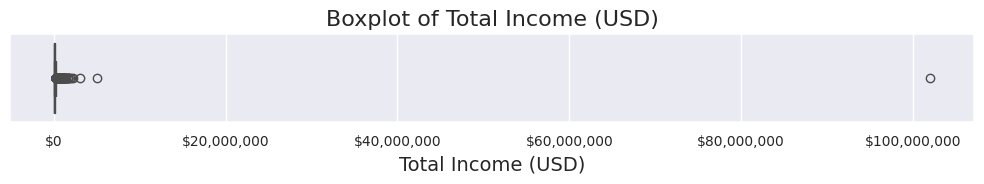

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['total_income_USD'])
plt.title('Boxplot of Total Income (USD)')
plt.xlabel('Total Income (USD)')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode tersebut digunakan untuk membuat sebuah diagram *boxplot* dari data penghasilan dalam mata uang USD yang tersimpan dalam kolom '*total_income_USD*' dari DataFrame `df_copy`. *Boxplot* menampilkan sejumlah statistik deskriptif seperti kuartil, nilai minimum, nilai maksimum, serta adanya pencilan (*outliers*) dalam data penghasilan. Ini membantu dalam memahami distribusi dan sebaran penghasilan dalam dataset. Berikut adalah penjelasan dari setiap baris kode.

1. `plt.figure(figsize=(10, 2))`: Membuat sebuah figure dengan ukuran 10x2 *inch* (lebar x tinggi).

2. `sns.boxplot(x=df_copy['total_income_USD'])`: Ini adalah baris kode yang digunakan untuk membuat *boxplot*. Fungsi `sns.boxplot()` dari *library Seaborn* digunakan untuk membuat *boxplot* dari data yang diberikan. Di sini, kita memasukkan kolom `total_income_USD` sebagai variabel x.

3. `plt.title('Boxplot of Total Income (USD)')`: Memberikan judul pada diagram *boxplot*.

4. `plt.xlabel('Total Income (USD)')`: Memberikan label pada sumbu x (horizontal) yang menunjukkan unit data, yaitu USD (*United States Dollar*).

5. `plt.gca().xaxis.set_major_formatter(formatter)`: Mengatur formatter yang telah dibuat sebelumnya ke sumbu x (sumbu horizontal) pada grafik saat ini. Dengan menggunakan formatter ini, setiap label pada sumbu x akan diformat sesuai dengan format yang telah ditentukan, yaitu dengan tanda dollar ($) dan pemisah ribuan.

6. `plt.tight_layout()`: Menyesuaikan tata letak subplot agar tidak tumpang tindih dan lebih rapi. Ini memastikan bahwa semua elemen plot berada dalam batas area gambar dengan benar.

7. `plt.show()`: Menampilkan diagram *boxplot*.

Berdasarkan diagram *boxplot* tersebut, terlihat bahwa terdapat sebuah nilai yang sangat besar (berbeda) dari nilai lainnya, disebut juga sebagai *outliers*. Akibatnya diagram tersebut menjadi kurang proporsional karena terbentang sangat jauh ke arah kanan akibat *outliers* tersebut.


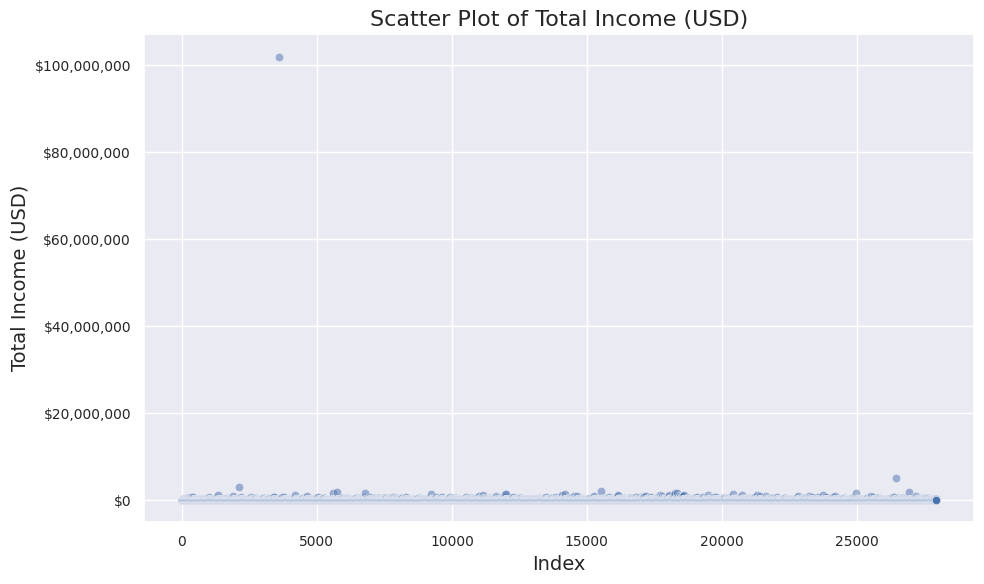

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy.index, y='total_income_USD', alpha=0.5)
plt.title('Scatter Plot of Total Income (USD)')
plt.xlabel('Index')
plt.ylabel('Total Income (USD)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode program tersebut digunakan untuk membuat *scatter plot* dari data *total_income_USD* terhadap indeks dari *DataFrame* `df_copy`. *Scatter plot* ini memungkinkan kita untuk melihat apakah ada pola atau tren tertentu dalam data, melihat sebaran data secara keseluruhan, dan juga mendeteksi adanya *outlier*. Berikut adalah penjelasan untuk setiap baris kode.

1. `plt.figure(figsize=(10, 6))`: Membuat sebuah gambar (figure) dengan ukuran 10 inci (lebar) dan 6 inci (tinggi). Ini mengatur ukuran gambar plot yang akan dibuat.

2. `sns.scatterplot(data=df_copy, x=df_copy.index, y='total_income_USD', alpha=0.5)`: Ini adalah baris kode yang digunakan untuk membuat *scatter plot*. Fungsi `sns.scatterplot()` dari *library Seaborn* digunakan untuk membuat *scatter plot* dari data yang diberikan. Di sini, `data` diatur ke `df_copy`, `x` diatur ke indeks dari `df_copy`, dan `y` diatur ke kolom `total_income_USD`. `alpha=0.5` menetapkan tingkat transparansi titik.

3. `plt.title('Scatter Plot of Total Income (USD)')`: Memberikan judul untuk plot, dalam hal ini "Scatter Plot of Total Income (USD)".

4. `plt.xlabel('Index')`: Memberi label sumbu x dengan 'Index', yang menunjukkan bahwa nilai pada sumbu x (horizontal) adalah indeks dari *DataFrame*.

5. `plt.ylabel('Total Income (USD)')`: Memberi label sumbu y dengan 'Total Income (USD)', yang menunjukkan bahwa nilai pada sumbu y (vertikal) adalah total pendapatan dalam USD.

6. `plt.grid(True)`: Menampilkan grid di dalam plot untuk membantu dalam interpretasi data.

7. `plt.gca().yaxis.set_major_formatter(formatter)`: Mengatur formatter yang telah dibuat sebelumnya ke sumbu y (sumbu vertikal) pada grafik saat ini. Dengan menggunakan formatter ini, setiap label pada sumbu y akan diformat sesuai dengan format yang telah ditentukan, yaitu dengan tanda dollar ($) dan pemisah ribuan.

8. `plt.tight_layout()`: Menyesuaikan tata letak subplot agar tidak tumpang tindih dan lebih rapi. Ini memastikan bahwa semua elemen plot berada dalam batas area gambar dengan benar.

9. `plt.show()`: Menampilkan plot yang sudah dibuat.

Berdasarkan diagram *scatter plot* tersebut, terlihat bahwa terdapat sebuah nilai yang sangat besar (berbeda) dari nilai lainnya, disebut juga sebagai *outliers*. Akibatnya diagram tersebut menjadi kurang proporsional karena terbentang sangat jauh ke atas akibat *outliers* tersebut.

### Menghitung Batas Bawah dan Batas Atas pada Kolom '*total_income_USD*'

In [ ]:
# Menghitung Q1 (persentil ke-25) dan Q3 (persentil ke-75)
Q1 = df_copy['total_income_USD'].quantile(0.25)
Q3 = df_copy['total_income_USD'].quantile(0.75)

# Menghitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Menentukan ambang batas minimum untuk gaji
min_threshold = 0

# Menghitung batas bawah, dan memastikannya tidak negatif
lower_bound = max(Q1 - 1.5 * IQR, min_threshold)

# Menghitung batas atas
upper_bound = Q3 + 1.5 * IQR

print('lower_bound: ',lower_bound)
print('upper_bound: ', upper_bound)

lower_bound:  0
upper_bound:  202500.0


Kode tersebut melakukan perhitungan untuk menentukan batas bawah dan batas atas dari *outlier* menggunakan metode *interquartile range* (IQR). *Outlier* adalah nilai-nilai yang berada di luar rentang (`lower_bound` dan `upper_bound`). Berikut adalah penjelasan dari setiap baris kode.

1. `Q1 = df_copy['total_income_USD'].quantile(0.25)`: Menghitung kuartil pertama (persentil ke-25) dari data penghasilan dalam mata uang USD.

2. `Q3 = df_copy['total_income_USD'].quantile(0.75)`: Menghitung kuartil ketiga (persentil ke-75) dari data penghasilan dalam mata uang USD.

3. `IQR = Q3 - Q1`: Menghitung *Interquartile Range* (jarak antara kuartil ketiga dan kuartil pertama).

4. `min_threshold = 0`: Menentukan ambang batas minimum untuk penghasilan (dalam kasus ini, ditetapkan sebagai 0).

5. `lower_bound = max(Q1 - 1.5 * IQR, min_threshold)`: Menghitung batas bawah untuk mendeteksi *outlier*. Nilai ini diambil sebagai maksimum antara (Q1 - 1.5 * IQR) dan ambang batas minimum. Ini memastikan bahwa batas bawah tidak menjadi negatif.

6. `upper_bound = Q3 + 1.5 * IQR`: Menghitung batas atas untuk mendeteksi *outlier*. Nilai ini diperoleh dengan menambahkan 1.5 kali IQR ke kuartil ketiga (Q3).

7. `print('lower_bound: ', lower_bound)`: Mencetak nilai batas bawah.

8. `print('upper_bound: ', upper_bound)`: Mencetak nilai batas atas.

### Menghapus Baris yang Mengandung *Outlier* di Kolom '*total_income_USD*'

In [ ]:
df_copy = df_copy[(df_copy['total_income_USD'] >= lower_bound) & (df_copy['total_income_USD'] <= upper_bound)]

Kode tersebut digunakan untuk menyaring data gaji (*total_income_USD*) agar hanya menyertakan nilai yang berada di antara batas bawah dan batas atas yang telah dihitung sebelumnya menggunakan metode *interquartile range* (IQR).
- `df_copy[(df_copy['total_income_USD'] >= lower_bound) & (df_copy['total_income_USD'] <= upper_bound)]`: Ini adalah filter *boolean* yang diterapkan pada *DataFrame* `df_copy`. Ini akan mempertahankan baris-baris di *DataFrame* yang hanya jika nilai *total_income_USD*-nya berada di antara `lower_bound` dan `upper_bound` yang sudah dihitung sebelumnya.
- `df_copy = ...`: Hasil filter ini kemudian ditetapkan kembali ke *DataFrame* `df_copy`, sehingga *DataFrame* hanya berisi data gaji yang tidak termasuk dalam kategori *outlier* berdasarkan batas bawah dan batas atas yang telah dihitung sebelumnya.

### Data '*total_income_USD*' Setelah Pembersihan *Outlier*

In [ ]:
df_copy['total_income_USD'].describe()

count     25716.000000
mean      83238.318945
std       39524.867184
min           0.000000
25%       54000.000000
50%       75000.000000
75%      105000.000000
max      202500.000000
Name: total_income_USD, dtype: float64

Kode tersebut digunakan untuk menghasilkan ringkasan statistik dari kolom 'total_income_USD' setelah pembersihan *outlier* dilakukan. Statistik yang dihasilkan termasuk jumlah data (*count*), rata-rata (*mean*), standar deviasi (std), nilai minimum (*min*), kuartil pertama (25%), *median* (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum (*max*). Jadi, hasil dari kode tersebut adalah ringkasan statistik dari kolom 'total_income_USD' setelah dilakukan pembersihan *outlier*, yang memberikan gambaran tentang distribusi data gaji yang bersih dari *outlier*.

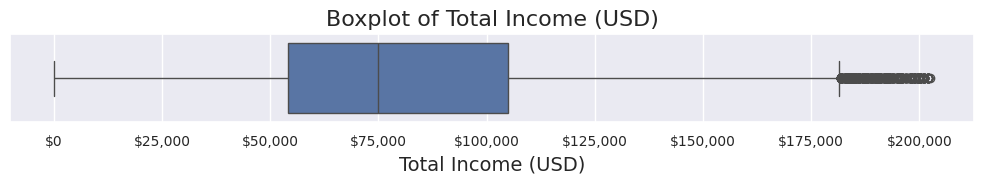

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['total_income_USD'])
plt.title('Boxplot of Total Income (USD)')
plt.xlabel('Total Income (USD)')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode tersebut digunakan untuk membuat *boxplot* yang memvisualisasikan distribusi data penghasilan setelah dilakukan pembersihan *outlier*, yang membantu dalam memahami sebaran nilai penghasilan. Berdasarkan diagram *boxplot* tersebut, terlihat bahwa setelah dilakukan proses pembersihan *outlier*, bentuk diagram tersebut menjadi lebih proporsional dibandingkan sebelum dilakukan proses pembersihan *outlier*.

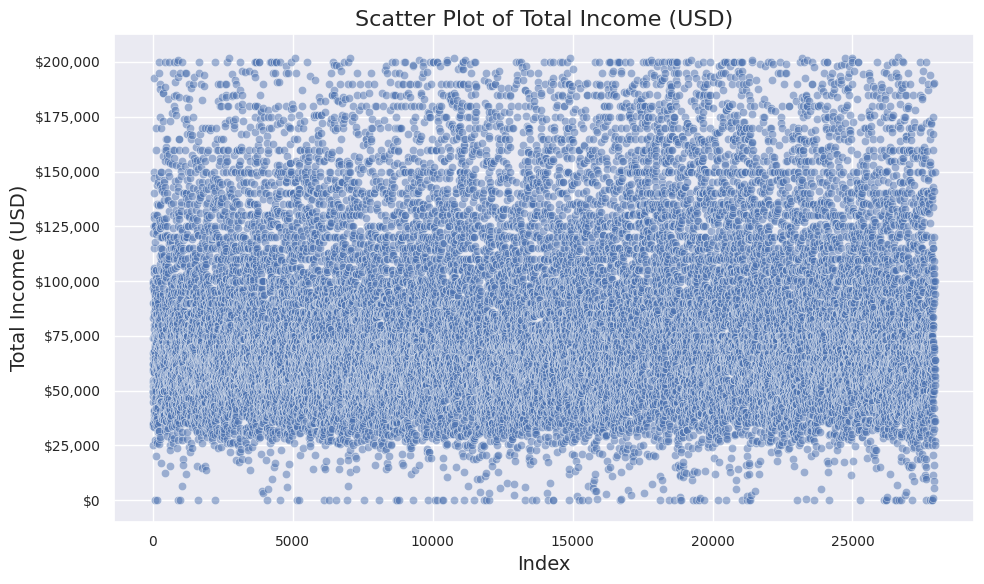

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x=df_copy.index, y='total_income_USD', alpha=0.5)
plt.title('Scatter Plot of Total Income (USD)')
plt.xlabel('Index')
plt.ylabel('Total Income (USD)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode program tersebut adalah untuk membuat *scatter plot* dari data *total_income_USD* setelah dilakukan pembersihan *outlier*. *Scatter plot* ini memungkinkan kita untuk melihat sebaran data yang lebih jelas dan memeriksa apakah ada pola atau tren tertentu dalam data. Transparansi yang diberikan oleh parameter alpha memungkinkan kita untuk melihat kerapatan data pada titik tertentu. Berdasarkan diagram *scatter plot* tersebut, terlihat bahwa setelah dilakukan proses pembersihan *outlier*, bentuk diagram tersebut menjadi lebih proporsional, serta persebaran data menjadi lebih merata dibandingkan sebelum dilakukan proses pembersihan *outlier*.

# Analisis Deskriptif (Analisis Univariat)

## Analisis Univariat Kolom *age_range* dan *numerical_age_range*

In [ ]:
df_copy['age_range'].describe()

count     25716
unique        7
top       25-34
freq      11817
Name: age_range, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*age_range*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, nilai unik, nilai paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:
- Terdapat 25.716 entri non-null dalam kolom '*age_range*'.
- Terdapat 7 nilai unik dalam kolom '*age_range*'.
- Rentang usia '25-34' adalah yang paling sering muncul, dengan frekuensi sebanyak 11.817 kali.

In [ ]:
df_copy['numerical_age_range'].describe()

count    25716.000000
mean        35.970777
std          8.722324
min         10.000000
25%         29.500000
50%         29.500000
75%         39.500000
max         65.000000
Name: numerical_age_range, dtype: float64

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*numerical_age_range*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum.

Dari output yang diberikan:
- Terdapat 25.716 entri dalam kolom '*numerical_age_range*'.
- Rata-rata usia adalah sekitar 35.97 tahun.
- Standar deviasi usia adalah sekitar 8.72 tahun, menunjukkan seberapa jauh penyebaran data dari rata-rata.
- Usia minimum dalam dataset adalah 10 tahun, sementara usia maksimumnya adalah 65 tahun.
- Kuartil pertama (25%) adalah 29.5 tahun, yang menunjukkan bahwa 25% data memiliki usia kurang dari atau sama dengan 29.5 tahun.
- Median (50% atau kuartil kedua) juga adalah 29.5 tahun.
- Kuartil ketiga (75%) adalah 39.5 tahun, yang menunjukkan bahwa 75% data memiliki usia kurang dari atau sama dengan 39.5 tahun.

In [ ]:
age_order = ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over']
df_copy['age_range'] = pd.Categorical(df_copy['age_range'], categories=age_order, ordered=True)

Kode program tersebut digunakan untuk mengubah kolom 'age_range' dalam DataFrame 'df_copy' menjadi tipe data kategori terurut. Pertama, kita mendefinisikan urutan kategori yang diinginkan dalam variabel `age_order`, yang merupakan daftar rentang usia dari yang paling muda hingga yang paling tua. Kemudian, kita menggunakan fungsi `pd.Categorical()` untuk mengonversi kolom 'age_range' menjadi tipe data kategori. Argumen `categories` digunakan untuk menyatakan urutan kategori yang telah kita tetapkan sebelumnya dalam variabel `age_order`. Dengan menyertakan `ordered=True`, kita menunjukkan bahwa kategori tersebut memiliki urutan yang terdefinisi.

Dengan melakukan ini, DataFrame akan menyimpan informasi tentang urutan kategori 'age_range', yang berguna saat melakukan operasi yang melibatkan pembandingan atau pengurutan berdasarkan kolom 'age_range'.

In [ ]:
age_range_counts = df_copy['age_range'].value_counts()
age_range_counts_df = age_range_counts.reset_index()
age_range_counts_df = age_range_counts_df.sort_values(by='count', ascending=False)
age_range_counts_df['rank'] = age_range_counts_df['count'].rank(ascending=False).astype(int)
age_range_counts_df

age_range  count  rank
0       25-34  11817     1
1       35-44   8921     2
2       45-54   2856     3
3       18-24   1133     4
4       55-64    893     5
5  65 or over     87     6
6    under 18      9     7

Kode program ini digunakan untuk menghitung jumlah frekuensi munculnya setiap kategori dalam kolom '*age_range*' DataFrame 'df_copy', dan kemudian menyusun hasilnya dalam DataFrame yang lebih terstruktur. Berikut adalah penjelasan langkah-langkahnya.

1. `age_range_counts = df_copy['age_range'].value_counts()`: Ini menghitung jumlah frekuensi munculnya setiap kategori dalam kolom '*age_range*' dan menyimpan hasilnya dalam variabel `age_range_counts`. Ini menghasilkan Series Pandas yang berisi jumlah frekuensi munculnya setiap kategori.

2. `age_range_counts_df = age_range_counts.reset_index()`: Di sini, kita mengonversi Series hasil dari langkah sebelumnya menjadi DataFrame dengan menggunakan fungsi `reset_index()`. Dengan cara ini, indeks Series diubah menjadi kolom DataFrame, dan kolom dengan nama 'index' (yang berisi kategori '*age_range*') diberi label sebagai 'index'. Ini membantu dalam proses pengurutan dan manipulasi DataFrame selanjutnya.

3. `age_range_counts_df = age_range_counts_df.sort_values(by='count', ascending=False)`: DataFrame yang baru dibuat diurutkan berdasarkan nilai kolom 'count' (yang berisi jumlah frekuensi munculnya) dalam urutan menurun. Ini dilakukan dengan menggunakan fungsi `sort_values()`.

4. `age_range_counts_df['rank'] = age_range_counts_df['count'].rank(ascending=False).astype(int)`: Kita menambahkan kolom baru 'rank' ke DataFrame yang berisi peringkat setiap kategori berdasarkan jumlah frekuensi munculnya. Fungsi `rank()` digunakan untuk memberi peringkat pada nilai dalam kolom 'count', dengan parameter `ascending=False` untuk menghasilkan peringkat dari yang tertinggi ke yang terendah. Hasilnya kemudian diubah menjadi tipe data integer menggunakan fungsi `astype(int)`.

5. `age_range_counts_df`: Ini mengembalikan DataFrame yang sudah disusun dan diperbarui dengan kolom peringkat baru.

Output tersebut merupakan DataFrame yang berisi informasi tentang jumlah frekuensi munculnya setiap kategori dalam kolom '*age_range*' dari DataFrame 'df_copy', disertai dengan peringkat masing-masing kategori berdasarkan jumlah frekuensi. Dari output tersebut, kita dapat melihat bahwa kategori usia '25-34' memiliki jumlah frekuensi muncul terbanyak (11.817), sehingga menduduki peringkat teratas (peringkat 1). Sedangkan kategori usia 'under 18' memiliki jumlah frekuensi muncul paling sedikit (9), sehingga menduduki peringkat terbawah (peringkat 7).

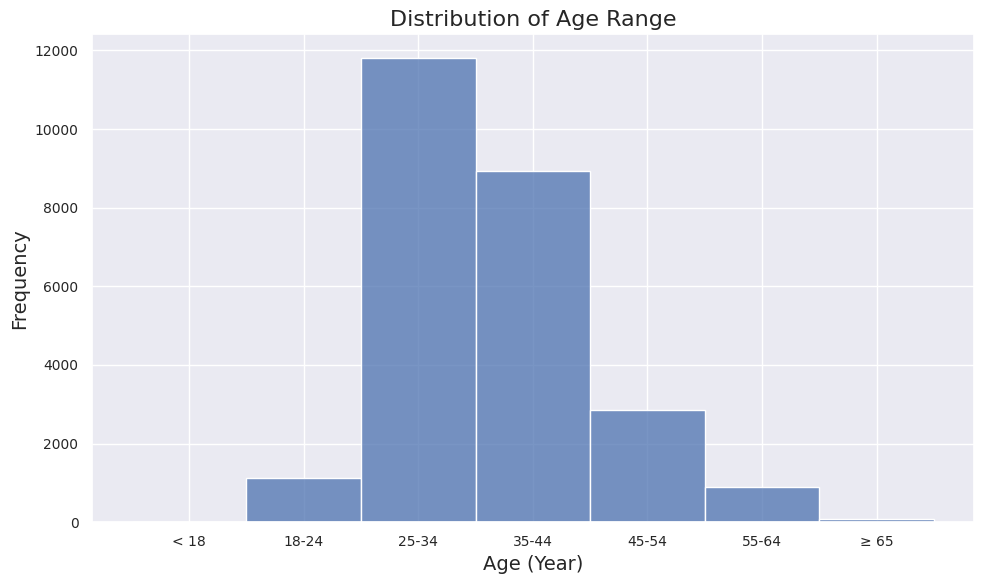

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age_range', data=df_copy)
plt.title('Distribution of Age Range')
plt.xlabel('Age (Year)')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.tight_layout()
plt.show()

Kode tersebut bertujuan untuk membuat histogram yang menunjukkan distribusi frekuensi dari variabel 'age_range' dalam DataFrame df_copy. Histogram digunakan untuk menampilkan distribusi data ke dalam kategori atau interval tertentu, dalam hal ini adalah rentang usia ('age_range'). Dengan menggunakan histogram, kita dapat melihat sebaran data dan frekuensi kemunculan setiap kategori usia. Berdasarkan visualisasi tersebut, rentang usia dengan frekuensi tertinggi adalah 25-34 tahun. Rentang usia dengan frekuensi terendah adalah di bawah 18 tahun. Frekuensi orang di setiap rentang usia secara bertahap menurun dari 25-34 tahun hingga rentang usia 65 tahun atau lebih. Selisih antar rentang usia cukup besar, sehingga menunjukkan distribusi data yang kurang seimbang.



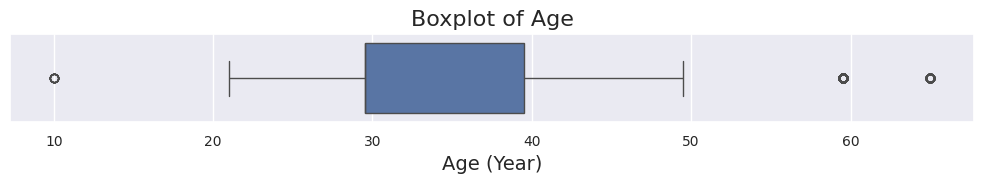

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['numerical_age_range'])
plt.title('Boxplot of Age')
plt.xlabel('Age (Year)')
plt.tight_layout()
plt.show()

Kode tersebut bertujuan untuk membuat boxplot dari distribusi data usia ('numerical_age_range') dalam DataFrame df_copy. Boxplot digunakan untuk menunjukkan rangkaian statistik deskriptif tentang data, seperti kuartil, median, dan outlier. Dengan menggunakan boxplot, kita dapat melihat sebaran dan distribusi data usia secara visual. Visualisasi ini menunjukkan bahwa kelompok individu tersebut didominasi oleh individu berusia 29 hingga 39 tahun. Sebagian besar individu dalam kelompok tersebut memiliki usia antara 22 hingga 49 tahun. Ada beberapa outlier di kedua sisi grafik yang mungkin mewakili individu yang sangat muda atau sangat tua.

## Analisis Univariat Kolom *industry*

In [ ]:
df_copy['industry'].describe()

count                 25716
unique                  863
top       computing or tech
freq                   3873
Name: industry, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*industry*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:
- Terdapat 25.716 entri non-null dalam kolom '*industry*'.
- Terdapat 863 nilai unik dalam kolom '*industry*'.
- Industri yang paling umum adalah "computing or tech", dengan frekuensi sebanyak 3.873 kali.

In [ ]:
industry_counts = df_copy['industry'].value_counts().nlargest(10)
industry_counts_df = industry_counts.reset_index()
industry_counts_df = industry_counts_df.sort_values(by='count', ascending=False)
industry_counts_df['rank'] = industry_counts_df['count'].rank(ascending=False).astype(int)
industry_counts_df

industry  count  rank
0                     computing or tech   3873     1
1                             education   3179     2
2                            nonprofits   2359     3
3  government and public administration   1815     4
4                           health care   1752     5
5                            accounting   1630     6
6          engineering or manufacturing   1607     7
7                             marketing   1064     8
8                                   law    883     9
9                business or consulting    768    10

Kode program tersebut bertujuan untuk menghitung dan menampilkan 10 industri teratas berdasarkan jumlah frekuensinya dalam kolom '*industry*' dari *DataFrame* 'df_copy'. Setiap industri diurutkan berdasarkan frekuensinya secara menurun dan diberi peringkat (rank) berdasarkan jumlah frekuensi tersebut. Berikut adalah penjelasan setiap baris kode program.

- `industry_counts = df_copy['industry'].value_counts().nlargest(10)`: Menghitung 10 industri teratas berdasarkan jumlah frekuensinya dalam kolom '*industry*' dan menyimpan hasilnya dalam variabel '*industry_counts*'.
- `industry_counts_df = industry_counts.reset_index()`: Mengatur hasil penghitungan menjadi *DataFrame* dan mereset indeksnya. Ini akan menghasilkan *DataFrame* dengan dua kolom: 'index' yang berisi nama industri dan 'count' yang berisi jumlah frekuensi.
- `industry_counts_df = industry_counts_df.sort_values(by='count', ascending=False)`: Mengurutkan *DataFrame* 'industry_counts_df' berdasarkan kolom 'count' (jumlah frekuensi) secara menurun.
- `industry_counts_df['rank'] = industry_counts_df['count'].rank(ascending=False).astype(int)`: Menambahkan kolom 'rank' ke *DataFrame* yang merupakan peringkat dari setiap industri berdasarkan jumlah frekuensinya. Peringkat tersebut dihitung dengan fungsi `rank()` dengan parameter `ascending=False` untuk memastikan peringkat yang lebih tinggi memiliki nilai yang lebih rendah. Hasilnya kemudian diubah menjadi tipe data integer (int) menggunakan `astype(int)`.

Output tersebut merupakan *DataFrame* yang menampilkan informasi tentang 10 industri teratas berdasarkan jumlah frekuensi munculnya dalam kolom '*industry*' dari *DataFrame* 'df_copy'. Dari output tersebut, dapat dilihat bahwa industri dengan nama '*computing or tech*' memiliki frekuensi muncul terbanyak (3873), sehingga menduduki peringkat pertama. Sedangkan industri '*business or consulting*' memiliki frekuensi muncul terendah dari 10 industri teratas (768), sehingga menduduki peringkat kesepuluh.

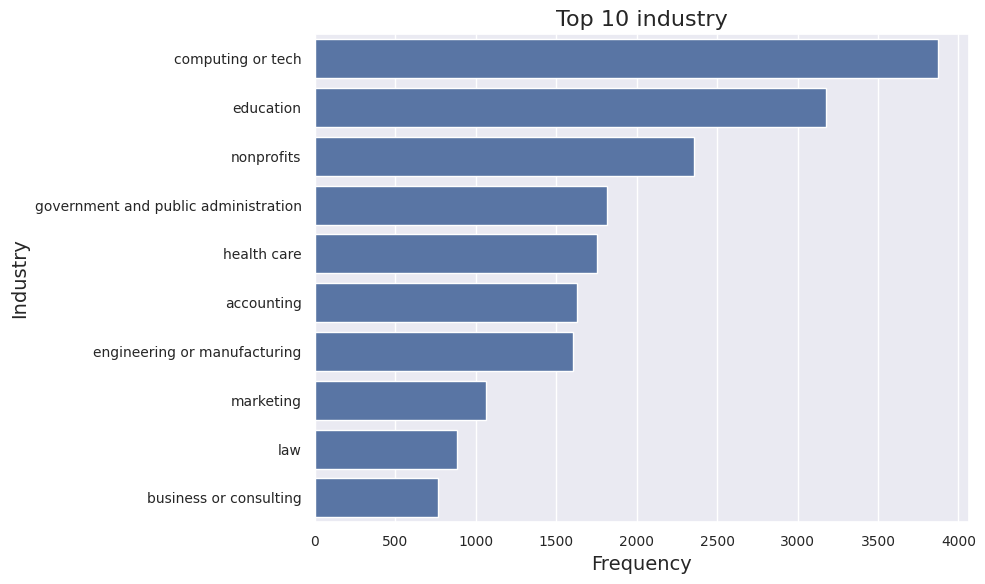

In [ ]:
top_10_industry = df_copy['industry'].value_counts().nlargest(10).index
top_10_industry_df = df_copy[df_copy['industry'].isin(top_10_industry)]

plt.figure(figsize=(10, 6))
sns.countplot(y='industry', data=top_10_industry_df, order=top_10_industry_df['industry'].value_counts().index)
plt.title('Top 10 industry')
plt.xlabel('Frequency')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

Kode tersebut bertujuan untuk membuat diagram batang yang menampilkan 10 industri teratas berdasarkan frekuensi kemunculan dalam DataFrame df_copy. Visualisasi ini menunjukkan bahwa industri dengan frekuensi terbanyak adalah *computing or tech*. Ini menunjukkan bahwa saat ini industri teknologi sedang populer. Selisih frekuensi antar industri cukup kecil, yang menunjukkan persebaran data yang merata.

## Analisis Univariat Kolom *job_title*

In [ ]:
df_copy['job_title'].describe()

count                 25716
unique                10420
top       software engineer
freq                    331
Name: job_title, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*job_title*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:
- Terdapat 25.716 entri non-null dalam kolom '*job_title*'.
- Terdapat 10.420 nilai unik dalam kolom '*job_title*'.
- Pekerjaan yang paling umum adalah "software engineer", dengan frekuensi sebanyak 331 kali.

In [ ]:
job_title_counts = df_copy['job_title'].value_counts().nlargest(10)
job_title_counts_df = job_title_counts.reset_index()
job_title_counts_df = job_title_counts_df.sort_values(by='count', ascending=False)
job_title_counts_df['rank'] = job_title_counts_df['count'].rank(ascending=False).astype(int)
job_title_counts_df

job_title  count  rank
0         software engineer    331     1
1                  director    303     2
2           project manager    291     3
3                   manager    251     4
4       executive assistant    205     5
5  senior software engineer    203     6
6           program manager    194     7
7                   teacher    184     8
8                 librarian    170     9
9  administrative assistant    152    10

Kode program tersebut digunakan untuk membuat *DataFrame* yang berisi informasi tentang 10 jabatan teratas berdasarkan jumlah frekuensi munculnya dalam kolom '*job_title*' dari *DataFrame* 'df_copy', disertai dengan peringkat masing-masing jabatan berdasarkan jumlah frekuensi. Berikut adalah penjelasan setiap baris kode program.

1. `job_title_counts`: Menghitung jumlah frekuensi munculnya setiap jabatan dalam kolom '*job_title*' menggunakan metode `value_counts()`, kemudian mengambil 10 nilai teratas menggunakan `nlargest(10)`.

2. `job_title_counts_df`: Mengubah objek Series yang dihasilkan oleh `value_counts()` menjadi *DataFrame* dengan menggunakan `reset_index()`. *DataFrame* ini akan memiliki dua kolom: 'index' yang berisi nama jabatan dan 'count' yang berisi jumlah frekuensi munculnya.

3. Mengurutkan *DataFrame* berdasarkan kolom 'count' secara menurun (descending) dengan menggunakan `sort_values()`.

4. Menambahkan kolom baru 'rank' yang berisi peringkat masing-masing jabatan berdasarkan jumlah frekuensi munculnya. Peringkat ini dihitung dengan metode `rank()` dengan `ascending=False` yang mengurutkan peringkat dari yang tertinggi (peringkat 1) ke yang terendah.

5. Mengubah tipe data kolom 'rank' menjadi integer dengan `astype(int)` untuk mendapatkan peringkat dalam format bilangan bulat.

Output tersebut adalah DataFrame yang menampilkan informasi tentang 10 jabatan teratas berdasarkan jumlah frekuensi munculnya dalam kolom '*job_title*' dari DataFrame 'df_copy'. Jabatan '*software engineer*' memiliki frekuensi muncul terbanyak, yaitu sebanyak 331 entri, sehingga menduduki peringkat pertama. Jabatan '*administrative assistant*' memiliki frekuensi muncul terendah dari 10 jabatan teratas, yaitu sebanyak 152 entri, sehingga menduduki peringkat kesepuluh.

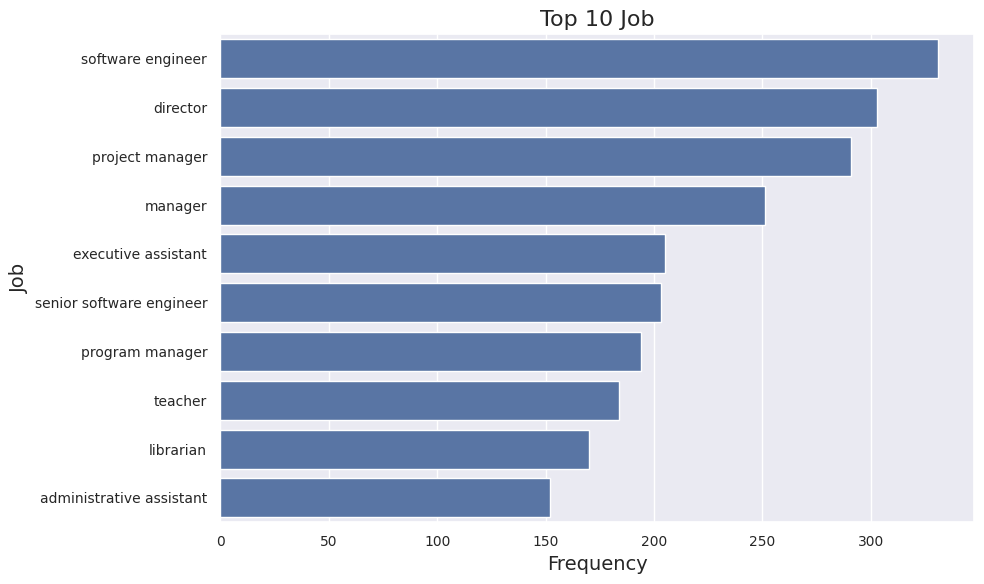

In [ ]:
top_10_job_title = df_copy['job_title'].value_counts().nlargest(10).index
top_10_job_title_df = df_copy[df_copy['job_title'].isin(top_10_job_title)]

plt.figure(figsize=(10, 6))
sns.countplot(y='job_title', data=top_10_job_title_df, order=top_10_job_title_df['job_title'].value_counts().index)
plt.title('Top 10 Job')
plt.xlabel('Frequency')
plt.ylabel('Job')
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat diagram batang yang menampilkan sepuluh jabatan teratas berdasarkan frekuensi kemunculannya dalam DataFrame df_copy. Visualisasi ini menunjukkan bahwa jabatan teratas adalah software engineer. Hal ini menunjukkan bahwa saat ini industri teknologi sedang populer. Selisih frekuensi antar jabatan cukup kecil, yang menunjukkan persebaran data yang merata.

## Analisis Univariat Kolom *currency*

In [ ]:
df_copy['currency'].describe()

count     25716
unique       34
top         USD
freq      21415
Name: currency, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*currency*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:
- Terdapat 25.716 entri non-null dalam kolom '*currency*'.
- Terdapat 34 nilai unik dalam kolom '*currency*'.
- Mata uang yang paling sering muncul adalah "USD", dengan frekuensi sebanyak 21.415 kali.

In [ ]:
currency_counts = df_copy['currency'].value_counts().nlargest(10)
currency_counts_df = currency_counts.reset_index()
currency_counts_df = currency_counts_df.sort_values(by='count', ascending=False)
currency_counts_df['rank'] = currency_counts_df['count'].rank(ascending=False).astype(int)
currency_counts_df

currency  count  rank
0      USD  21415     1
1      CAD   1617     2
2      GBP   1499     3
3      EUR    589     4
4      AUD    366     5
5      CHF     35     6
6      SEK     35     6
7      JPY     22     8
8      ZAR     14     9
9      INR     12    10

Kode program tersebut digunakan untuk membuat DataFrame yang menampilkan informasi tentang 10 mata uang teratas berdasarkan jumlah frekuensi munculnya dalam kolom '*currency*' dari DataFrame 'df_copy'. Berikut adalah penjelasan setiap baris kode program.

1. Pertama, kita menggunakan metode `value_counts()` untuk menghitung jumlah frekuensi munculnya setiap nilai dalam kolom '*currency*'. Kemudian, menggunakan `nlargest(10)` untuk mengambil 10 mata uang teratas berdasarkan jumlah frekuensi munculnya. `.index` digunakan untuk mengambil indeks (nama mata uang) dari 10 mata uang teratas tersebut.

2. Selanjutnya, kita membuat DataFrame baru `currency_counts_df` yang hanya berisi data mata uang dari 10 mata uang teratas yang telah dipilih sebelumnya. Ini dilakukan dengan menggunakan metode `reset_index()` untuk mengatur indeks ulang, dan kemudian `sort_values()` untuk mengurutkan DataFrame berdasarkan jumlah frekuensi dalam urutan menurun (descending).

3. Setelah itu, kita menambahkan kolom 'rank' ke DataFrame `currency_counts_df`. Kolom ini menunjukkan peringkat dari setiap mata uang berdasarkan jumlah frekuensi munculnya dalam DataFrame tersebut. Peringkat ini dihitung dengan metode `rank(ascending=False)`, yang artinya semakin tinggi frekuensi munculnya, semakin tinggi pula peringkatnya. `astype(int)` digunakan untuk memastikan nilai peringkat tersebut bertipe data integer.

4. Terakhir, DataFrame `currency_counts_df` ditampilkan, menampilkan informasi tentang nama mata uang, jumlah frekuensi munculnya, dan peringkatnya.

Output tersebut merupakan DataFrame yang menampilkan informasi tentang 10 mata uang teratas berdasarkan jumlah frekuensi munculnya dalam kolom 'currency' dari DataFrame 'df_copy'. Dari output tersebut, dapat dilihat bahwa mata uang 'USD' memiliki frekuensi muncul terbanyak (21.415), sehingga menduduki peringkat pertama. Mata uang 'INR' yang memiliki frekuensi muncul terendah dari 10 mata uang teratas (12), sehingga menduduki peringkat kesepuluh. Terdapat beberapa mata uang yang memiliki jumlah frekuensi muncul yang sama, sehingga peringkat mereka dianggap sama dan diberi peringkat yang sama pula.

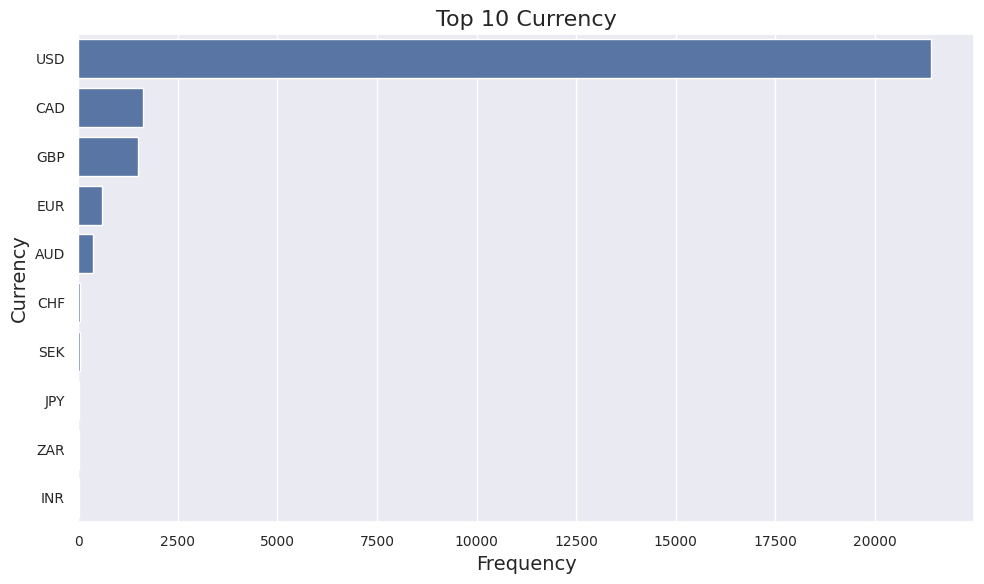

In [ ]:
top_10_currency = df_copy['currency'].value_counts().nlargest(10).index
top_10_currency_df = df_copy[df_copy['currency'].isin(top_10_currency)]

plt.figure(figsize=(10, 6))
sns.countplot(y='currency', data=top_10_currency_df, order=top_10_currency_df['currency'].value_counts().index)
plt.title('Top 10 Currency')
plt.xlabel('Frequency')
plt.ylabel('Currency')
plt.tight_layout()
plt.show()

Tujuan dari kode ini adalah untuk membuat diagram batang yang menampilkan sepuluh mata uang teratas berdasarkan frekuensi kemunculannya dalam DataFrame df_copy. Visualisasi ini menunjukkan bahwa mata uang terpopuler adalah USD, dengan selisih frekuensi yang sangat jauh dibandingkan mata uang lainnya, yang menunjukkan persebaran data yang kurang merata.

## Analisis Univariat Kolom *country*

In [ ]:
df_copy['country'].describe()

count             25716
unique               97
top       United States
freq              21243
Name: country, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*country*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:

- Terdapat 25.716 entri non-null dalam kolom '*country*'.
- Terdapat 97 nilai unik dalam kolom '*country*'.
- Negara yang paling sering muncul adalah "United States", dengan frekuensi sebanyak 21.243 kali.

In [ ]:
country_counts = df_copy['country'].value_counts().nlargest(10)
country_counts_df = country_counts.reset_index()
country_counts_df = country_counts_df.sort_values(by='count', ascending=False)
country_counts_df['rank'] = country_counts_df['count'].rank(ascending=False).astype(int)
country_counts_df

country  count  rank
0   United States  21243     1
1          Canada   1627     2
2  United Kingdom   1272     3
3       Australia    375     4
4         Germany    181     5
5         England    171     6
6         Ireland    112     7
7     Netherlands     85     8
8          France     62     9
9        Scotland     49    10

Kode program tersebut bertujuan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom '*country*' dari sebuah DataFrame `df_copy`. Berikut adalah penjelasan setiap baris kode program.

1. `country_counts = df_copy['country'].value_counts().nlargest(10)`: Ini menghitung jumlah kemunculan setiap nilai unik dalam kolom '*country*' dari DataFrame `df_copy`, kemudian memilih 10 nilai teratas dengan frekuensi terbanyak. Hasilnya disimpan dalam variabel `country_counts`.

2. `country_counts_df = country_counts.reset_index()`: Ini mengubah objek `country_counts` (yang merupakan hasil dari fungsi `nlargest`) menjadi DataFrame dan me-reset indeksnya. Dengan demikian, hasilnya adalah DataFrame dengan dua kolom: 'index' yang berisi nilai unik dari '*country*', dan '*country*' yang berisi frekuensi kemunculan masing-masing nilai tersebut. Hasilnya disimpan dalam variabel `country_counts_df`.

3. `country_counts_df = country_counts_df.sort_values(by='count', ascending=False)`: Ini mengurutkan DataFrame `country_counts_df` berdasarkan kolom 'count' (yang berisi frekuensi kemunculan) secara menurun (descending).

4. `country_counts_df['rank'] = country_counts_df['count'].rank(ascending=False).astype(int)`: Ini menambahkan kolom baru bernama 'rank' ke DataFrame `country_counts_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'count' (frekuensi kemunculan), diurutkan dari yang tertinggi (peringkat 1) hingga yang terendah. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `country_counts_df`: Ini mengembalikan DataFrame `country_counts_df` yang telah dimodifikasi dengan penambahan kolom 'rank'.

Output tersebut merupakan DataFrame yang berisi informasi tentang 10 negara dengan jumlah kemunculan tertinggi dalam kolom '*country*' dari DataFrame yang diperoleh sebelumnya. Jadi, hasilnya menunjukkan bahwa Amerika Serikat memiliki jumlah kemunculan terbanyak (21243) dan menduduki peringkat pertama, diikuti oleh Kanada, Inggris, Australia, Jerman, dan seterusnya.

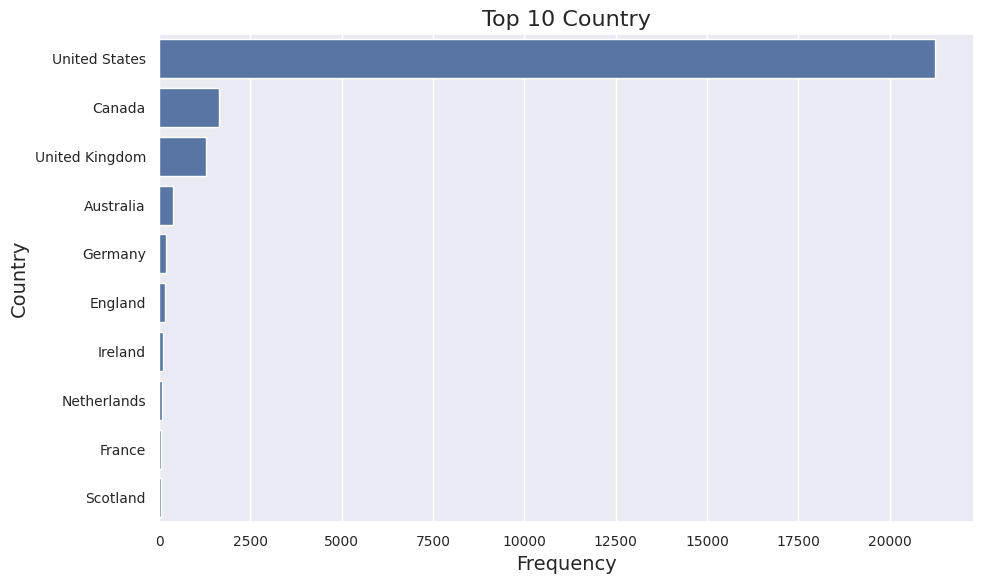

In [ ]:
top_10_country = df_copy['country'].value_counts().nlargest(10).index
top_10_country_df = df_copy[df_copy['country'].isin(top_10_country)]

plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=top_10_country_df, order=top_10_country_df['country'].value_counts().index)
plt.title('Top 10 Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Tujuan dari kode ini adalah untuk membuat diagram batang yang menampilkan sepuluh negara teratas berdasarkan frekuensi kemunculannya dalam DataFrame df_copy. Visualisasi ini menunjukkan bahwa negara terpopuler adalah United States, dengan selisih frekuensi yang sangat jauh dibandingkan negara lainnya, yang menunjukkan persebaran data yang kurang merata.

## Analisis Univariat Kolom *city*

In [ ]:
df_copy['city'].describe()

count      25716
unique      3571
top       boston
freq         761
Name: city, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*city*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:

- Terdapat 25.716 entri non-null dalam kolom '*city*'.
- Terdapat 3.571 nilai unik dalam kolom '*city*'.
- Kota yang paling sering muncul adalah "boston", dengan frekuensi sebanyak 761 kali.

In [ ]:
city_counts = df_copy['city'].value_counts().nlargest(10)
city_counts_df = city_counts.reset_index()
city_counts_df = city_counts_df.sort_values(by='count', ascending=False)
city_counts_df['rank'] = city_counts_df['count'].rank(ascending=False).astype(int)
city_counts_df

city  count  rank
0         boston    761     1
1        chicago    759     2
2       new york    687     3
3        seattle    612     4
4         london    568     5
5    los angeles    478     6
6  new york city    457     7
7       portland    452     8
8  washington dc    451     9
9        toronto    423    10

Kode program ini berfokus pada perhitungan jumlah kemunculan setiap nilai unik dalam kolom 'city' dari DataFrame `df_copy`. Berikut adalah penjelasan setiap baris kode program.

1. `city_counts = df_copy['city'].value_counts().nlargest(10)`: Ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'city' dari DataFrame `df_copy`, kemudian memilih 10 nilai teratas dengan frekuensi terbanyak. Hasilnya disimpan dalam variabel `city_counts`.

2. `city_counts_df = city_counts.reset_index()`: Ini mengubah objek `city_counts` (yang merupakan hasil dari fungsi `nlargest`) menjadi DataFrame dan me-reset indeksnya. Dengan demikian, hasilnya adalah DataFrame dengan dua kolom: 'index' yang berisi nilai unik dari 'city', dan 'city' yang berisi frekuensi kemunculan masing-masing nilai tersebut. Hasilnya disimpan dalam variabel `city_counts_df`.

3. `city_counts_df = city_counts_df.sort_values(by='count', ascending=False)`: Ini mengurutkan DataFrame `city_counts_df` berdasarkan kolom 'count' (yang berisi frekuensi kemunculan) secara menurun (descending).

4. `city_counts_df['rank'] = city_counts_df['count'].rank(ascending=False).astype(int)`: Ini menambahkan kolom baru bernama 'rank' ke DataFrame `city_counts_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'count' (frekuensi kemunculan), diurutkan dari yang tertinggi (peringkat 1) hingga yang terendah. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `city_counts_df`: Ini mengembalikan DataFrame `city_counts_df` yang telah dimodifikasi dengan penambahan kolom 'rank'.

Output tersebut adalah DataFrame yang berisi informasi tentang 10 kota dengan jumlah kemunculan terbanyak dari sebuah data, serta peringkat masing-masing kota berdasarkan frekuensi kemunculannya. Jadi, hasilnya menunjukkan bahwa Boston adalah kota dengan jumlah kemunculan terbanyak (761) dan menduduki peringkat pertama, diikuti oleh Chicago, New York, Seattle, dan seterusnya.

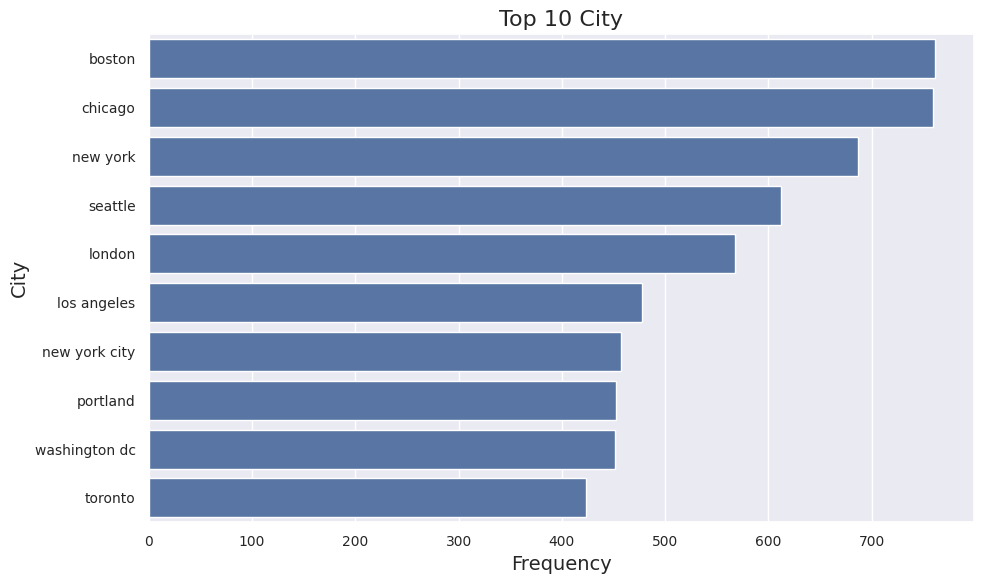

In [ ]:
top_10_city = df_copy['city'].value_counts().nlargest(10).index
top_10_city_df = df_copy[df_copy['city'].isin(top_10_city)]

plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=top_10_city_df, order=top_10_city_df['city'].value_counts().index)
plt.title('Top 10 City')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Tujuan dari kode ini adalah untuk membuat diagram batang yang menampilkan sepuluh kota teratas berdasarkan frekuensi kemunculannya dalam DataFrame df_copy. Visualisasi ini menunjukkan bahwa kota terpopuler adalah Boston, yang diikuti oleh Chicago. Selisih frekuensi antar kota cukup kecil, yang menunjukkan persebaran data yang merata.

## Analisis Univariat Kolom *work_experience_overall* dan *numerical_work_experience_overall*

In [ ]:
df_copy['work_experience_overall'].describe()

count           25716
unique              8
top       11-20 years
freq             8700
Name: work_experience_overall, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*work_experience_overall*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, jumlah nilai unik, nilai yang paling sering muncul (modus), dan frekuensi modus untuk kolom kategori.

Dari output yang diberikan:

- Terdapat 25.716 entri non-null dalam kolom '*work_experience_overall*'.
- Terdapat 8 nilai unik dalam kolom '*work_experience_overall*'.
- Rentang pengalaman kerja '11-20 years' adalah yang paling sering muncul, dengan frekuensi sebanyak 8.700 kali.

In [ ]:
df_copy['numerical_work_experience_overall'].describe()

count    25716.000000
mean        12.847721
std          8.137265
min          0.500000
25%          6.000000
50%          9.000000
75%         15.500000
max         41.000000
Name: numerical_work_experience_overall, dtype: float64

Kode program tersebut memberikan deskripsi statistik tentang kolom '*numerical_age_range*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum.

Dari output yang diberikan:
- Terdapat 25.716 entri dalam kolom '*numerical_age_range*'.
- Rata-rata usia adalah sekitar 35.97 tahun.
- Standar deviasi usia adalah sekitar 8.72 tahun, menunjukkan seberapa jauh penyebaran data dari rata-rata.
- Usia minimum dalam dataset adalah 10 tahun, sementara usia maksimumnya adalah 65 tahun.
- Kuartil pertama (25%) adalah 29.5 tahun, menunjukkan bahwa 25% data memiliki usia kurang dari atau sama dengan 29.5 tahun.
- Median (50% atau kuartil kedua) juga adalah 29.5 tahun.
- Kuartil ketiga (75%) adalah 39.5 tahun, yang menunjukkan bahwa 75% data memiliki usia kurang dari atau sama dengan 39.5 tahun.

In [ ]:
work_experience_order = ['1 year or less', '2-4 years', '5-7 years', '8-10 years',
                '11-20 years', '21-30 years', '31-40 years', '41 years or more']
df_copy['work_experience_overall'] = pd.Categorical(df_copy['work_experience_overall'], categories=work_experience_order, ordered=True)

Kode program tersebut bertujuan untuk mengatur urutan kategori pada kolom 'work_experience_overall' dalam DataFrame `df_copy`. Berikut adalah penjelasan dari baris kode tersebut.

1. `work_experience_order = ['1 year or less', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '41 years or more']`: Baris ini mendefinisikan urutan kategori yang diinginkan untuk kolom 'work_experience_overall'. Setiap kategori mewakili rentang tahun pengalaman kerja yang berbeda.

2. `df_copy['work_experience_overall'] = pd.Categorical(df_copy['work_experience_overall'], categories=work_experience_order, ordered=True)`: Baris ini mengonversi kolom 'work_experience_overall' menjadi tipe data kategorikal menggunakan fungsi `pd.Categorical()` dari library pandas. Dalam pengaturan ini, kita menentukan bahwa kategori akan diatur sesuai dengan urutan yang telah ditentukan dalam variabel `work_experience_order` dan diatur sebagai kategori yang terurut (ordered=True). Hal ini penting agar ketika dilakukan analisis berdasarkan kolom ini, seperti pengurutan atau perbandingan, akan mengikuti urutan yang telah ditetapkan.


In [ ]:
work_experience_overall_counts = df_copy['work_experience_overall'].value_counts()
work_experience_overall_counts_df = work_experience_overall_counts.reset_index()
work_experience_overall_counts_df = work_experience_overall_counts_df.sort_values(by='count', ascending=False)
work_experience_overall_counts_df['rank'] = work_experience_overall_counts_df['count'].rank(ascending=False).astype(int)
work_experience_overall_counts_df

work_experience_overall  count  rank
0             11-20 years   8700     1
1              8-10 years   4995     2
2               5-7 years   4577     3
3             21-30 years   3220     4
4               2-4 years   2857     5
5             31-40 years    779     6
6          1 year or less    477     7
7        41 years or more    111     8

Kode program ini bertujuan untuk menghitung jumlah kemunculan setiap kategori dalam kolom '*work_experience_overall*' dari DataFrame `df_copy`, serta menambahkan kolom peringkat (rank) berdasarkan jumlah kemunculan tersebut. Berikut adalah penjelasan baris per baris:

1. `work_experience_overall_counts = df_copy['work_experience_overall'].value_counts()`: Baris ini menghitung jumlah kemunculan setiap kategori dalam kolom '*work_experience_overall*' dari DataFrame `df_copy` dan menyimpan hasilnya dalam variabel `work_experience_overall_counts`.

2. `work_experience_overall_counts_df = work_experience_overall_counts.reset_index()`: Baris ini mengubah objek `work_experience_overall_counts` (yang merupakan hasil dari fungsi `value_counts`) menjadi DataFrame dan me-reset indeksnya. Hasilnya adalah DataFrame dengan dua kolom: 'index' yang berisi kategori-kategori dari kolom '*work_experience_overall*', dan '*work_experience_overall*' yang berisi frekuensi kemunculan masing-masing kategori tersebut. DataFrame hasilnya disimpan dalam variabel `work_experience_overall_counts_df`.

3. `work_experience_overall_counts_df = work_experience_overall_counts_df.sort_values(by='count', ascending=False)`: Baris ini mengurutkan DataFrame `work_experience_overall_counts_df` berdasarkan kolom 'count' (yang berisi frekuensi kemunculan) secara menurun (descending).

4. `work_experience_overall_counts_df['rank'] = work_experience_overall_counts_df['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `work_experience_overall_counts_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'count' (frekuensi kemunculan), diurutkan dari yang tertinggi (peringkat 1) hingga yang terendah. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `work_experience_overall_counts_df`: Baris ini mengembalikan DataFrame `work_experience_overall_counts_df` yang telah dimodifikasi dengan penambahan kolom 'rank'.

Output tersebut adalah DataFrame yang berisi informasi tentang kategori-kategori dalam kolom '*work_experience_overall*' dari sebuah data, beserta jumlah kemunculannya dan peringkat masing-masing kategori berdasarkan jumlah kemunculannya. Jadi, hasilnya menunjukkan bahwa rentang 11-20 tahun pengalaman kerja memiliki jumlah kemunculan terbanyak (8700) dan menduduki peringkat pertama, diikuti oleh rentang 8-10 tahun, 5-7 tahun, dan seterusnya.

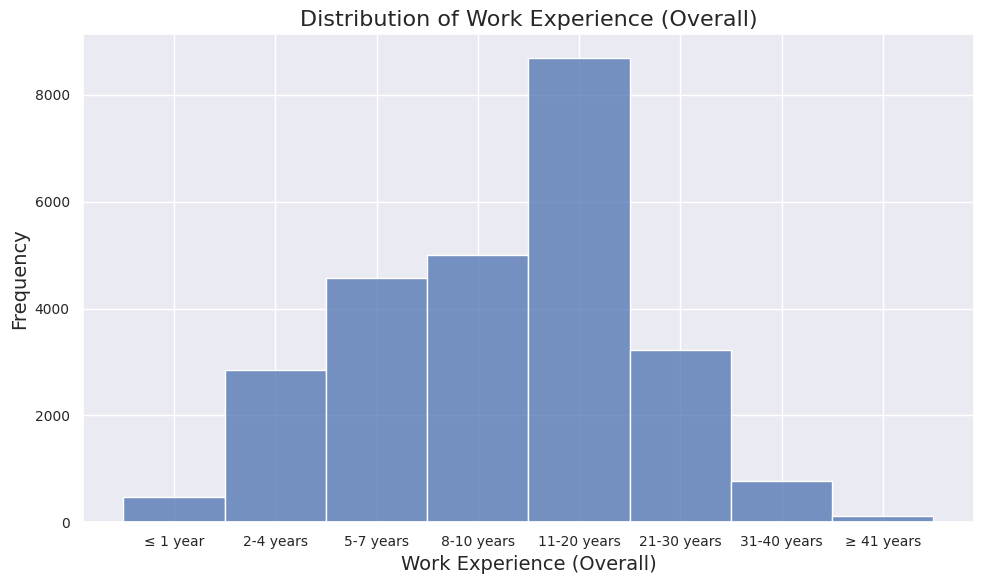

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='work_experience_overall', data=df_copy)
plt.title('Distribution of Work Experience (Overall)')
plt.xlabel('Work Experience (Overall)')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=['≤ 1 year', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '≥ 41 years'])
plt.tight_layout()
plt.show()

Kode program tersebut bertujuan untuk membuat histogram yang menampilkan distribusi dari kolom '*work_experience_overall*' dalam DataFrame `df_copy`. Visualisasi ini menunjukkan bahwa kelompok individu tersebut didominasi oleh individu dengan pengalaman kerja 11-20 tahun. Frekuensi individu di setiap rentang pengalaman kerja secara bertahap meningkat dari rentang kurang dari 1 tahun hingga 11-20 tahun. Frekuensi individu di setiap rentang pengalaman kerja secara bertahap menurun dari 11-20 tahun hingga 41 tahun atau lebih. Selisih frekuensi antar rentang pengalaman kerja cukup besar, sehingga menunjukkan distribusi data yang kurang seimbang.

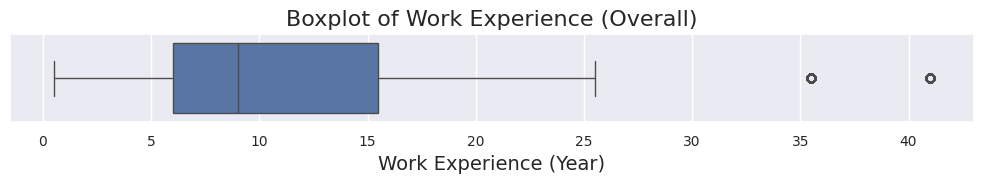

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['numerical_work_experience_overall'])
plt.title('Boxplot of Work Experience (Overall)')
plt.xlabel('Work Experience (Year)')
plt.tight_layout()
plt.show()

Kode program ini bertujuan untuk membuat sebuah diagram kotak (boxplot) yang menampilkan distribusi dari kolom 'numerical_work_experience_overall' dalam DataFrame `df_copy`. Visualisasi ini menunjukkan bahwa kelompok individu tersebut didominasi oleh individu dengan pengalaman kerja selama 7 hingga 16 tahun. Sebagian besar individu dalam kelompok tersebut memiliki pengalaman kerja antara 1 hingga 26 tahun. Ada beberapa outlier di sisi kanan grafik yang mungkin mewakili individu dengan pengalaman kerja yang sangat tinggi.


## Analisis Univariat Kolom *work_experience_field* dan *numerical_work_experience_field*

In [ ]:
df_copy['work_experience_field'].describe()

count         25716
unique            8
top       5-7 years
freq           6087
Name: work_experience_field, dtype: object

Kode program ini digunakan untuk memberikan deskripsi statistik tentang kolom '*work_experience_field*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, nilai unik, nilai yang paling sering muncul (modus), dan frekuensi kemunculan modus.

Dari output yang diberikan:
- Terdapat 25.716 entri non-null dalam kolom '*work_experience_field*'.
- Terdapat 8 nilai unik dalam kolom '*work_experience_field*'.
- Rentang pengalaman kerja '5-7 years' adalah yang paling sering muncul, dengan frekuensi sebanyak 6087 kali.

In [ ]:
df_copy['numerical_work_experience_field'].describe()

count    25716.000000
mean         9.316651
std          7.135542
min          0.500000
25%          3.000000
50%          6.000000
75%         15.500000
max         41.000000
Name: numerical_work_experience_field, dtype: float64

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*numerical_work_experience_field*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum.

Dari output yang diberikan:
- Terdapat 25.716 entri dalam kolom '*numerical_work_experience_field*'.
- Rata-rata pengalaman kerja dalam bidang adalah sekitar 9.32 tahun.
- Standar deviasi pengalaman kerja dalam bidang adalah sekitar 7.14 tahun, menunjukkan seberapa jauh penyebaran data dari rata-rata.
- Pengalaman kerja dalam bidang minimum adalah 0.5 tahun, sementara pengalaman kerja dalam bidang maksimumnya adalah 41 tahun.
- Kuartil pertama (25%) adalah 3 tahun, yang menunjukkan bahwa 25% data memiliki pengalaman kerja dalam bidang kurang dari atau sama dengan 3 tahun.
- Median (50% atau kuartil kedua) adalah 6 tahun.
- Kuartil ketiga (75%) adalah 15.5 tahun, yang menunjukkan bahwa 75% data memiliki pengalaman kerja dalam bidang kurang dari atau sama dengan 15.5 tahun.

In [ ]:
df_copy['work_experience_field'] = pd.Categorical(df_copy['work_experience_field'], categories=work_experience_order, ordered=True)

Kode program ini bertujuan untuk mengkonversi kolom '*work_experience_field*' dalam DataFrame `df_copy` menjadi tipe data kategorikal, dengan mengatur kategori-kategorinya sesuai dengan urutan yang telah ditentukan sebelumnya.

In [ ]:
work_experience_field_counts = df_copy['work_experience_field'].value_counts()
work_experience_field_counts_df = work_experience_field_counts.reset_index()
work_experience_field_counts_df = work_experience_field_counts_df.sort_values(by='count', ascending=False)
work_experience_field_counts_df['rank'] = work_experience_field_counts_df['count'].rank(ascending=False).astype(int)
work_experience_field_counts_df

work_experience_field  count  rank
0             5-7 years   6087     1
1             2-4 years   5938     2
2           11-20 years   5818     3
3            8-10 years   4545     4
4           21-30 years   1584     5
5        1 year or less   1381     6
6           31-40 years    327     7
7      41 years or more     36     8

Kode program ini bertujuan untuk menghitung jumlah kemunculan setiap kategori dalam kolom '*work_experience_field*' dari DataFrame `df_copy`, serta menambahkan kolom peringkat (rank) berdasarkan jumlah kemunculannya. Berikut adalah penjelasan setiap baris kode.

1. `work_experience_field_counts = df_copy['work_experience_field'].value_counts()`: Baris ini menghitung jumlah kemunculan setiap kategori dalam kolom '*work_experience_field*' dari DataFrame `df_copy` dan menyimpan hasilnya dalam variabel `work_experience_field_counts`.

2. `work_experience_field_counts_df = work_experience_field_counts.reset_index()`: Baris ini mengubah objek `work_experience_field_counts` (yang merupakan hasil dari fungsi `value_counts`) menjadi DataFrame dan me-reset indeksnya. Hasilnya adalah DataFrame dengan dua kolom: 'index' yang berisi kategori-kategori dari kolom '*work_experience_field*', dan '*work_experience_field*' yang berisi frekuensi kemunculan masing-masing kategori tersebut. DataFrame hasilnya disimpan dalam variabel `work_experience_field_counts_df`.

3. `work_experience_field_counts_df = work_experience_field_counts_df.sort_values(by='count', ascending=False)`: Baris ini mengurutkan DataFrame `work_experience_field_counts_df` berdasarkan kolom 'count' (yang berisi frekuensi kemunculan) secara menurun (descending).

4. `work_experience_field_counts_df['rank'] = work_experience_field_counts_df['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `work_experience_field_counts_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'count' (frekuensi kemunculan), diurutkan dari yang tertinggi (peringkat 1) hingga yang terendah. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `work_experience_field_counts_df`: Baris ini mengembalikan DataFrame `work_experience_field_counts_df` yang telah dimodifikasi dengan penambahan kolom 'rank'.

Output tersebut merupakan DataFrame yang berisi informasi tentang kategori-kategori dalam kolom 'work_experience_field' dari sebuah dataset, beserta jumlah kemunculan setiap kategori dan peringkat masing-masing kategori berdasarkan jumlah kemunculannya. Jadi, hasilnya menunjukkan bahwa rentang 5-7 tahun pengalaman kerja dalam bidang tertentu memiliki jumlah kemunculan terbanyak (6087) dan menduduki peringkat pertama, diikuti oleh rentang 2-4 tahun, 11-20 tahun, dan seterusnya.

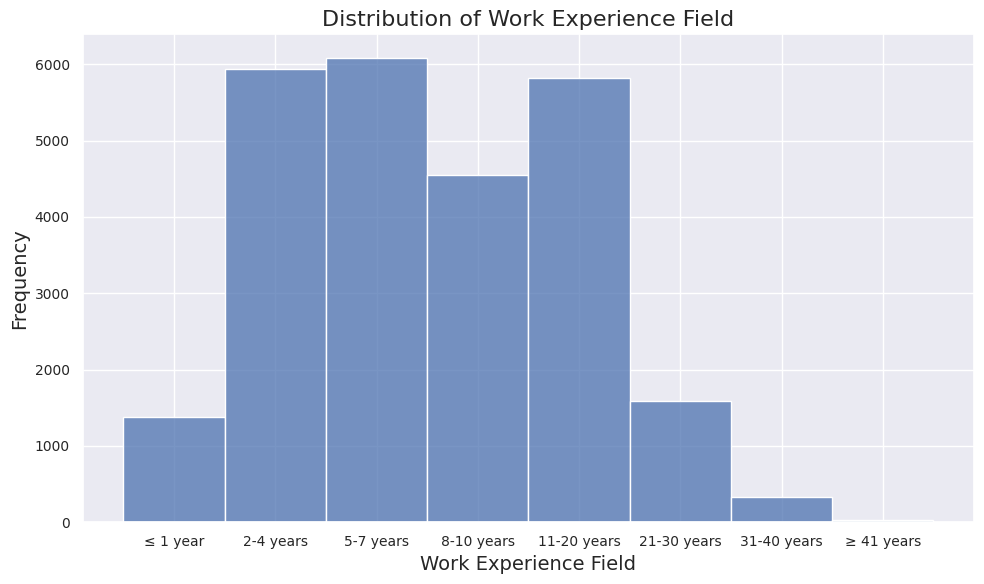

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='work_experience_field', data=df_copy)
plt.title('Distribution of Work Experience Field')
plt.xlabel('Work Experience Field')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=['≤ 1 year', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '≥ 41 years'])
plt.tight_layout()
plt.show()

Kode program tersebut bertujuan untuk membuat histogram yang menampilkan distribusi dari kolom 'work_experience_field' dalam DataFrame `df_copy`. Visualisasi ini menunjukkan bahwa tiga rentang pengalaman kerja pada bidang tertentu dengan frekuensi tertinggi (5-7 tahun, 2-4 tahun, dan 11-20 tahun) cenderung memiliki selisih frekuensi yang kecil, sehingga menunjukkan distribusi yang seimbang.

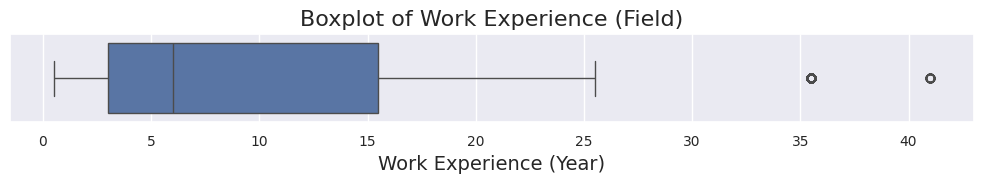

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['numerical_work_experience_field'])
plt.title('Boxplot of Work Experience (Field)')
plt.xlabel('Work Experience (Year)')
plt.tight_layout()
plt.show()

Kode program ini bertujuan untuk membuat sebuah diagram kotak (boxplot) yang menampilkan distribusi dari kolom '*numerical_work_experience_field*' dalam DataFrame `df_copy`. Visualisasi ini menunjukkan bahwa kelompok individu tersebut didominasi oleh individu dengan pengalaman kerja pada bidang tertentu selama 3 hingga 16 tahun. Sebagian besar individu dalam kelompok tersebut memiliki pengalaman kerja pada bidang tertentu antara 1 hingga 26 tahun. Ada beberapa outlier di sisi kanan grafik yang mungkin mewakili individu dengan pengalaman kerja pada bidang tertentu yang sangat tinggi.

## Analisis Univariat Kolom *education*

In [ ]:
df_copy['education'].describe()

count              25716
unique                 6
top       College degree
freq               12613
Name: education, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*education*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, nilai unik, nilai paling sering muncul (modus), dan frekuensi modus.

Dari output yang diberikan:
- Terdapat 25.716 entri dalam kolom '*education*'.
- Terdapat 6 nilai unik dalam kolom '*education*'.
- 'College degree' adalah kategori pendidikan yang paling sering muncul, dengan frekuensi sebanyak 12.613 kali.

In [ ]:
education_order = ['High School', 'Some college', 'College degree', "Master's degree",
                'Professional degree', 'PhD']
df_copy['education'] = pd.Categorical(df_copy['education'], categories=education_order, ordered=True)

Kode program di atas menggambarkan penggunaan pustaka Pandas dalam bahasa pemrograman Python untuk mengelola data dalam suatu kerangka data (DataFrame). Tujuannya adalah untuk mengatur variabel 'education' dalam kerangka data 'df_copy' secara terurut berdasarkan tingkat pendidikan yang ditentukan.

Pertama, kita mendefinisikan urutan pendidikan yang diinginkan dalam sebuah list yang dinamakan 'education_order'. List ini mengandung tingkat pendidikan mulai dari yang paling rendah hingga yang paling tinggi, yaitu 'High School', 'Some college', 'College degree', "Master's degree", 'Professional degree', dan 'PhD'.

Kemudian, kita menggunakan fungsi pd.Categorical() dari pustaka Pandas untuk mengonversi kolom 'education' dalam DataFrame 'df_copy' menjadi tipe data kategori (Categorical). Saat melakukan konversi ini, kita menyertakan parameter 'categories' yang diisi dengan 'education_order' yang telah kita tentukan sebelumnya. Hal ini memastikan bahwa nilai-nilai dalam kolom 'education' akan diurutkan sesuai dengan urutan yang telah ditetapkan. Selain itu, kita juga menetapkan parameter 'ordered' menjadi True untuk menandakan bahwa kategori-kategori tersebut memiliki urutan yang telah ditentukan.

In [ ]:
education_counts = df_copy['education'].value_counts()
education_counts_df = education_counts.reset_index()
education_counts_df = education_counts_df.sort_values(by='count', ascending=False)
education_counts_df['rank'] = education_counts_df['count'].rank(ascending=False).astype(int)
education_counts_df

education  count  rank
0       College degree  12613     1
1      Master's degree   8274     2
2         Some college   1938     3
3                  PhD   1279     4
4  Professional degree   1033     5
5          High School    579     6

Kode program ini digunakan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom 'education' dari DataFrame `df_copy`. Berikut adalah penjelasan setiap baris kode.

1. `education_counts = df_copy['education'].value_counts()`: Baris ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'education' dan menyimpannya dalam variabel `education_counts`. Fungsi `value_counts()` secara otomatis menghitung frekuensi setiap nilai unik dalam suatu Series.

2. `education_counts_df = education_counts.reset_index()`: Baris ini mengubah hasil perhitungan sebelumnya (`education_counts`) menjadi DataFrame dengan indeks default dan dua kolom: 'index' yang berisi nilai unik dan 'education' yang berisi jumlah kemunculan masing-masing nilai. `reset_index()` digunakan untuk mengubah indeks menjadi kolom dan membuat DataFrame dari hasil perhitungan.

3. `education_counts_df = education_counts_df.sort_values(by='count', ascending=False)`: Baris ini mengurutkan DataFrame `education_counts_df` berdasarkan kolom 'count' (jumlah kemunculan) secara menurun (descending), sehingga nilai dengan jumlah kemunculan terbanyak berada di bagian atas.

4. `education_counts_df['rank'] = education_counts_df['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `education_counts_df`. Kolom ini berisi peringkat dari setiap nilai unik dalam kolom 'education' berdasarkan jumlah kemunculan mereka. Fungsi `rank()` digunakan untuk memberikan peringkat pada nilai 'count', dengan `ascending=False` menandakan bahwa peringkat tertinggi diberikan pada nilai terbesar. Kemudian, `astype(int)` digunakan untuk mengonversi peringkat menjadi tipe data integer.

5. `education_counts_df`: Baris terakhir ini mengembalikan DataFrame yang telah dimodifikasi dengan penambahan kolom 'rank' ke dalam variabel `education_counts_df`. Ini akan menampilkan DataFrame lengkap yang berisi jumlah kemunculan setiap nilai 'education' bersama dengan peringkat mereka berdasarkan jumlah kemunculan.

Output tersebut adalah hasil dari eksekusi kode program yang telah dijelaskan sebelumnya. Jadi, output tersebut menampilkan informasi tentang berapa kali setiap tingkat pendidikan muncul dalam data, serta peringkat relatif mereka berdasarkan jumlah kemunculan. Misalnya, "College degree" muncul sebanyak 12.613 kali dan menduduki peringkat pertama dengan jumlah kemunculan terbanyak, sedangkan "High School" muncul paling sedikit dengan hanya 579 kemunculan dan menduduki peringkat terakhir.

In [ ]:
df_copy['education'].unique()

['Master's degree', 'College degree', 'PhD', 'Some college', 'High School', 'Professional degree']
Categories (6, object): ['High School' < 'Some college' < 'College degree' < 'Master's degree' <
                         'Professional degree' < 'PhD']

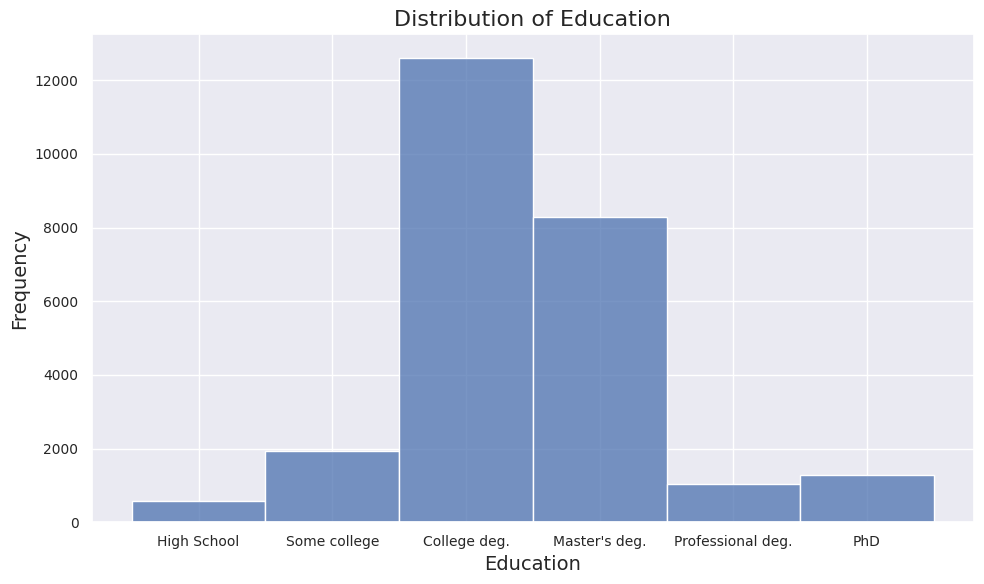

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='education', data=df_copy)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.tight_layout()
plt.show()

Kode program tersebut digunakan untuk membuat histogram yang menampilkan distribusi tingkat pendidikan dalam DataFrame `df_copy` menggunakan library seaborn (`sns`). Visualisasi ini menunjukkan bahwa kelompok individu tersebut didominasi oleh individu dengan tingkat pendidikan '*College degree*'. Selisih frekuensi antar tingkat pendidikan cukup besar, sehingga menunjukkan distribusi data yang kurang seimbang.

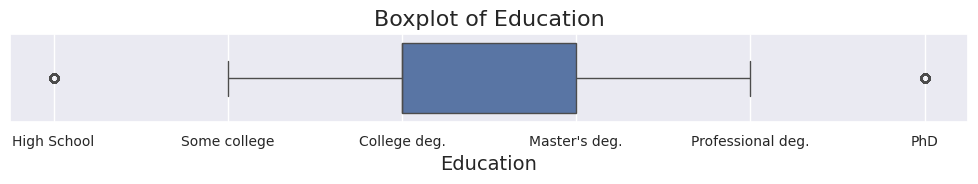

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['education'])
plt.title('Boxplot of Education')
plt.xlabel('Education')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.tight_layout()
plt.show()

Kode program tersebut digunakan untuk membuat boxplot yang menampilkan distribusi tingkat pendidikan dalam DataFrame `df_copy` menggunakan library seaborn (`sns`). Visualisasi ini menunjukkan bahwa kelompok individu tersebut didominasi oleh individu dengan tingkat pendidikan 'College degree' hingga 'Master's degree'. Sebagian besar individu dalam kelompok tersebut memiliki tingkat pendidikan antara 'Some college' hingga 'Professional degree'. Ada beberapa outlier di kedua sisi grafik yang mungkin mewakili individu dengan tingkat pendidikan 'High School' dan 'PhD'.

## Analisis Univariat Kolom *gender*

In [ ]:
df_copy['gender'].describe()

count     25716
unique        3
top       Woman
freq      20103
Name: gender, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*gender*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, nilai unik, nilai paling sering muncul (modus), dan frekuensi modus.

Dari output yang diberikan:
- Terdapat 25.716 entri dalam kolom '*gender*'.
- Terdapat 3 nilai unik dalam kolom '*gender*'.
- 'Woman' adalah jenis kelamin yang paling sering muncul, dengan frekuensi sebanyak 20.103 kali.

In [ ]:
gender_counts = df_copy['gender'].value_counts()
gender_counts_df = gender_counts.reset_index()
gender_counts_df = gender_counts_df.sort_values(by='count', ascending=False)
gender_counts_df['rank'] = gender_counts_df['count'].rank(ascending=False).astype(int)
gender_counts_df

gender  count  rank
0  Woman  20103     1
1    Man   4642     2
2  Other    971     3

Kode program ini bertujuan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom '*gender*' dari DataFrame yang disimpan dalam `df_copy`. Berikut adalah penjelasan baris per baris:

1. `gender_counts = df_copy['gender'].value_counts()`: Baris ini menghitung jumlah kemunculan setiap nilai unik dalam kolom '*gender*' dan menyimpannya dalam variabel `gender_counts`. Fungsi `value_counts()` secara otomatis menghitung frekuensi setiap nilai unik dalam suatu Series.

2. `gender_counts_df = gender_counts.reset_index()`: Baris ini mengubah hasil perhitungan sebelumnya (`gender_counts`) menjadi DataFrame dengan indeks default dan dua kolom: 'index' yang berisi nilai unik dan '*gender*' yang berisi jumlah kemunculan masing-masing nilai. `reset_index()` digunakan untuk mengubah indeks menjadi kolom dan membuat DataFrame dari hasil perhitungan.

3. `gender_counts_df = gender_counts_df.sort_values(by='count', ascending=False)`: Baris ini mengurutkan DataFrame `gender_counts_df` berdasarkan kolom 'count' (jumlah kemunculan) secara menurun (descending), sehingga nilai dengan jumlah kemunculan terbanyak berada di bagian atas.

4. `gender_counts_df['rank'] = gender_counts_df['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `gender_counts_df`. Kolom ini berisi peringkat dari setiap nilai unik dalam kolom '*gender*' berdasarkan jumlah kemunculan mereka. Fungsi `rank()` digunakan untuk memberikan peringkat pada nilai 'count', dengan `ascending=False` menandakan bahwa peringkat tertinggi diberikan pada nilai terbesar. Kemudian, `astype(int)` digunakan untuk mengonversi peringkat menjadi tipe data integer.

5. `gender_counts_df`: Baris terakhir ini mengembalikan DataFrame yang telah dimodifikasi dengan penambahan kolom 'rank' ke dalam variabel `gender_counts_df`. Ini akan menampilkan DataFrame lengkap yang berisi jumlah kemunculan setiap nilai '*gender*' bersama dengan peringkat mereka berdasarkan jumlah kemunculan.

Jadi, output tersebut menampilkan informasi tentang berapa kali setiap jenis kelamin muncul dalam data, serta peringkat relatif mereka berdasarkan jumlah kemunculan. Misalnya, "Woman" muncul sebanyak 20.103 kali dan menduduki peringkat pertama dengan jumlah kemunculan terbanyak, sedangkan "Man" muncul sebanyak 4.642 kali dan menduduki peringkat kedua dalam hal jumlah kemunculan. Sedangkan "Other" muncul paling sedikit dengan hanya 971 kemunculan dan menduduki peringkat ketiga dalam hal jumlah kemunculan.

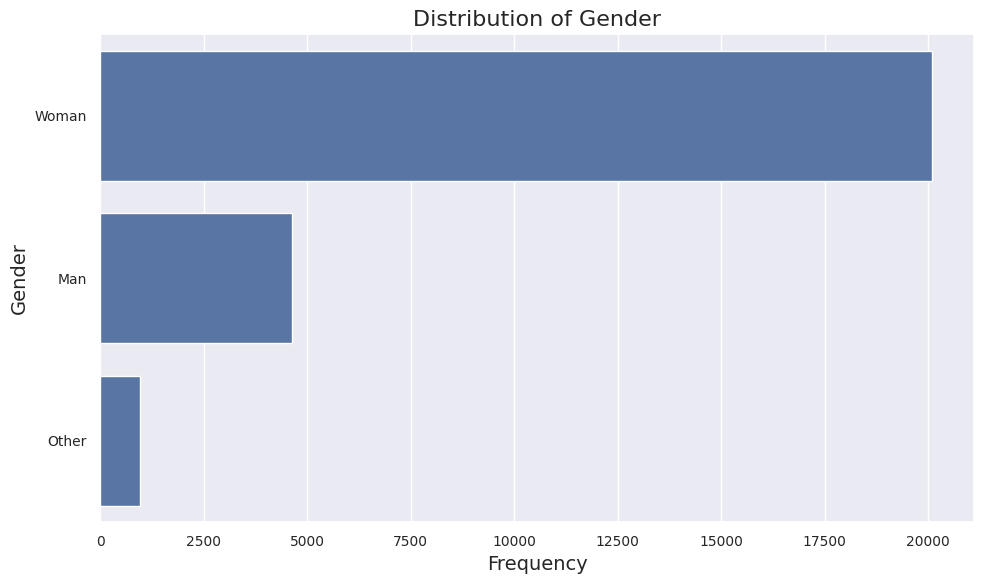

In [ ]:
gender = df_copy['gender'].value_counts().index
gender_df = df_copy[df_copy['gender'].isin(gender)]

plt.figure(figsize=(10, 6))
sns.countplot(y='gender', data=gender_df, order=gender_df['gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Frequency')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat diagram batang yang menampilkan distribusi gender dalam DataFrame df_copy. Visualisasi ini menunjukkan gender dengan frekuensi tertinggi yaitu wanita. Selisih frekuensi antar gender cukup besar, sehingga menunjukkan distribusi data yang kurang seimbang.

## Analisis Univariat Kolom *race*

In [ ]:
df_copy['race'].describe()

count     25716
unique        7
top       white
freq      21594
Name: race, dtype: object

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*race*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, nilai unik, nilai paling sering muncul (modus), dan frekuensi modus.

Dari output yang diberikan:

- Terdapat 25.716 entri dalam kolom '*race*'.
- Terdapat 7 nilai unik dalam kolom '*race*'.
- 'White' adalah ras yang paling sering muncul, dengan frekuensi sebanyak 21.594 kali.

In [ ]:
race_counts = df_copy['race'].value_counts()
race_counts_df = race_counts.reset_index()
race_counts_df = race_counts_df.sort_values(by='count', ascending=False)
race_counts_df['rank'] = race_counts_df['count'].rank(ascending=False).astype(int)
race_counts_df

race  count  rank
0                               white  21594     1
1             asian or asian american   1591     2
2                            hispanic    959     3
3           black or african american    789     4
4                               other    536     5
5  middle eastern or northern african    139     6
6    native american or alaska native    108     7

Kode program ini bertujuan untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom '*race*' dari DataFrame `df_copy` dan menambahkan kolom 'rank' yang menunjukkan peringkat setiap nilai berdasarkan jumlah kemunculan mereka. Berikut adalah penjelasan setiap baris kode.

1. `race_counts = df_copy['race'].value_counts()`: Baris ini menghitung jumlah kemunculan setiap nilai unik dalam kolom 'race' dan menyimpannya dalam variabel `race_counts`. Fungsi `value_counts()` secara otomatis menghitung frekuensi setiap nilai unik dalam suatu Series.

2. `race_counts_df = race_counts.reset_index()`: Baris ini mengubah hasil perhitungan sebelumnya (`race_counts`) menjadi DataFrame dengan indeks default dan dua kolom: 'index' yang berisi nilai unik dan '*race*' yang berisi jumlah kemunculan masing-masing nilai. `reset_index()` digunakan untuk mengubah indeks menjadi kolom dan membuat DataFrame dari hasil perhitungan.

3. `race_counts_df = race_counts_df.sort_values(by='count', ascending=False)`: Baris ini mengurutkan DataFrame `race_counts_df` berdasarkan kolom 'count' (jumlah kemunculan) secara menurun (descending), sehingga nilai dengan jumlah kemunculan terbanyak berada di bagian atas.

4. `race_counts_df['rank'] = race_counts_df['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `race_counts_df`. Kolom ini berisi peringkat dari setiap nilai unik dalam kolom '*race*' berdasarkan jumlah kemunculan mereka. Fungsi `rank()` digunakan untuk memberikan peringkat pada nilai 'count', dengan `ascending=False` menandakan bahwa peringkat tertinggi diberikan pada nilai terbesar. Kemudian, `astype(int)` digunakan untuk mengonversi peringkat menjadi tipe data integer.

5. `race_counts_df`: Baris terakhir ini mengembalikan DataFrame yang telah dimodifikasi dengan penambahan kolom 'rank' ke dalam variabel `race_counts_df`. Ini akan menampilkan DataFrame lengkap yang berisi jumlah kemunculan setiap nilai '*race*' bersama dengan peringkat mereka berdasarkan jumlah kemunculan.

Jadi, output tersebut menampilkan informasi tentang berapa kali setiap jenis ras muncul dalam data, serta peringkat relatif mereka berdasarkan jumlah kemunculan. Misalnya, "White" muncul sebanyak 21.594 kali dan menduduki peringkat pertama dengan jumlah kemunculan terbanyak, sedangkan "Native American or Alaska Native" muncul paling sedikit dengan hanya 108 kemunculan dan menduduki peringkat terakhir.

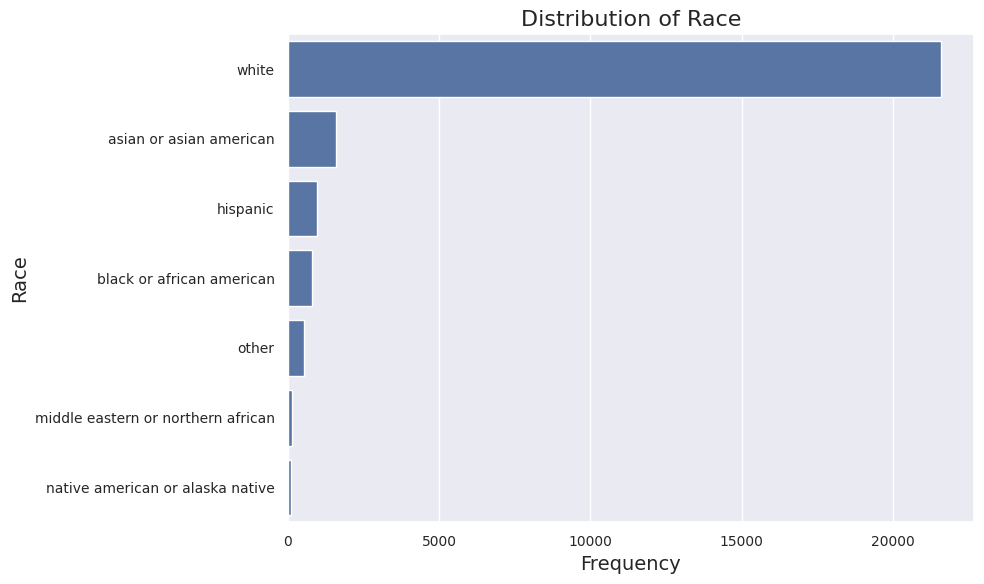

In [ ]:
race = df_copy['race'].value_counts().index
race_df = df_copy[df_copy['race'].isin(race)]

plt.figure(figsize=(10, 6))
sns.countplot(y='race', data=race_df, order=race_df['race'].value_counts().index)
plt.title('Distribution of Race')
plt.xlabel('Frequency')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat diagram batang yang menampilkan distribusi ras dalam DataFrame df_copy. Visualisasi ini menunjukkan ras dengan frekuensi tertinggi yaitu white. Selisih frekuensi antar ras cukup besar, sehingga menunjukkan distribusi data yang kurang seimbang.

## Analisis Univariat Kolom *total_income_USD*

In [ ]:
df_copy['total_income_USD'].describe()

count     25716.000000
mean      83238.318945
std       39524.867184
min           0.000000
25%       54000.000000
50%       75000.000000
75%      105000.000000
max      202500.000000
Name: total_income_USD, dtype: float64

Kode program tersebut digunakan untuk memberikan deskripsi statistik tentang kolom '*total_income_USD*' dari DataFrame 'df_copy'. Metode `describe()` secara otomatis menghasilkan statistik deskriptif seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum.

Dari output yang diberikan:

- Terdapat 25.716 entri dalam kolom '*total_income_USD*'.
- Rata-rata pendapatan adalah sekitar \$83.238,32.
- Standar deviasi pendapatan adalah sekitar \$39.524,87, menunjukkan seberapa jauh penyebaran data dari rata-rata.
- Pendapatan minimum dalam dataset adalah \$0.
- Kuartil pertama (25%) adalah \$54.000, yang menunjukkan bahwa 25% data memiliki pendapatan kurang dari atau sama dengan \$54.000.
- Median (50% atau kuartil kedua) adalah \$75.000.
- Kuartil ketiga (75%) adalah \$105.000, yang menunjukkan bahwa 75% data memiliki pendapatan kurang dari atau sama dengan \$105.000.
- Pendapatan maksimum dalam dataset adalah \$202.500.

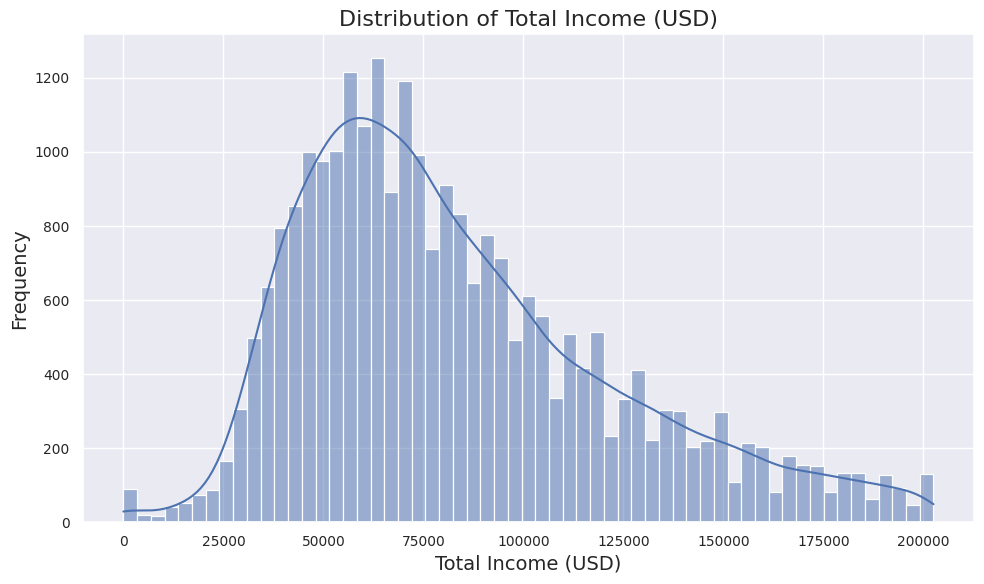

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['total_income_USD'], kde=True)
plt.title('Distribution of Total Income (USD)')
plt.xlabel('Total Income (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Kode program ini bertujuan untuk membuat histogram yang menampilkan distribusi total pendapatan dari DataFrame `df_copy` menggunakan library seaborn (`sns`). Histogram tersebut menampilkan distribusi total pendapatan dari DataFrame `df_copy`, dengan label-label yang sesuai, serta kurva KDE untuk memberikan gambaran visual tambahan tentang distribusi data. Seiring peningkatan pendapatan, frekuensi menurun, menunjukkan bahwa lebih sedikit individu yang mendapatkan pendapatan lebih tinggi. Bentuk keseluruhan histogram menyerupai distribusi yang miring ke kiri, yang menunjukkan bahwa lebih banyak individu yang memiliki pendapatan kurang dari \$75.000.

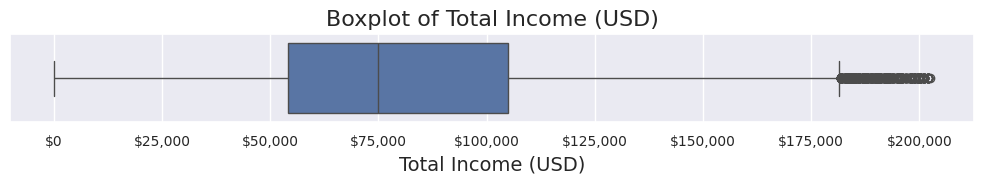

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_copy['total_income_USD'])
plt.title('Boxplot of Total Income (USD)')
plt.xlabel('Total Income (USD)')
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode program ini bertujuan untuk membuat boxplot yang menampilkan distribusi total pendapatan (dalam USD) dari DataFrame `df_copy` menggunakan library seaborn (`sns`). Visualisasi ini menunjukkan bahwa penghasilan individu didominasi dalam rentang \$55.000 hingga \$115.000. Sebagian besar individu dalam kelompok tersebut memiliki penghasilan antara \$0 hingga \$180.000. Ada beberapa outlier di sisi kanan grafik yang mungkin mewakili individu dengan penghasilan yang sangat tinggi (lebih dari \$180.000).

# Eksplorasi Hubungan atau Pola antar Variabel (Analisis Bivariat atau Multivariat)

## Analisis Bivariat antara Industri dan Pendapatan

### Sepuluh Industri dengan Pendapatan Rata-Rata Terbesar

In [ ]:
mean_income_by_industry_biggest = df_copy.groupby('industry')['total_income_USD'].mean().nlargest(10)
mean_income_by_industry_biggest_df = mean_income_by_industry_biggest.reset_index()
mean_income_by_industry_biggest_df = mean_income_by_industry_biggest_df.sort_values(by='total_income_USD', ascending=False)
mean_income_by_industry_biggest_df['rank'] = mean_income_by_industry_biggest_df['total_income_USD'].rank(ascending=False).astype(int)
mean_income_by_industry_biggest_df = mean_income_by_industry_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_industry_biggest_df

industry  mean_total_income_USD  rank
0       management consulting               201000.0     1
1                clean energy               200000.0     3
2              pharmacuticals               200000.0     3
3                     r and d               200000.0     3
4                      bitech               195000.0     5
5          research scientist               195000.0     5
6           pharma or biotech               194000.0     7
7   pharmaceutical or biotech               192000.0     8
8  pharmaceuticals or biotech               190000.0     9
9     software or programming               190000.0     9

Kode program tersebut digunakan untuk menghitung rata-rata pendapatan total per industri dan menampilkan 10 industri dengan rata-rata pendapatan terbesar. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_industry_biggest = df_copy.groupby('industry')['total_income_USD'].mean().nlargest(10)`: Baris ini menghitung rata-rata pendapatan total (`total_income_USD`) per industri menggunakan metode `groupby` pada kolom 'industry'. Kemudian, dengan menggunakan `nlargest(10)`, hanya diambil 10 nilai terbesar dari rata-rata pendapatan tersebut. Hasilnya disimpan dalam variabel `mean_income_by_industry_biggest`.

2. `mean_income_by_industry_biggest_df = mean_income_by_industry_biggest.reset_index()`: Baris ini mengubah objek `mean_income_by_industry_biggest` (yang merupakan hasil dari metode `nlargest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_industry_biggest_df`.

3. `mean_income_by_industry_biggest_df = mean_income_by_industry_biggest_df.sort_values(by='total_income_USD', ascending=False)`: Baris ini mengurutkan DataFrame `mean_income_by_industry_biggest_df` berdasarkan kolom 'total_income_USD' secara menurun (descending), sehingga menghasilkan 10 industri dengan rata-rata pendapatan terbesar.

4. `mean_income_by_industry_biggest_df['rank'] = mean_income_by_industry_biggest_df['total_income_USD'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_industry_biggest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_industry_biggest_df = mean_income_by_industry_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_industry_biggest_df`: Baris ini mengembalikan DataFrame `mean_income_by_industry_biggest_df` yang telah dimodifikasi dengan penambahan kolom 'rank' dan perubahan nama kolom.

### Sepuluh Industri dengan Pendapatan Rata-Rata Terkecil

In [ ]:
mean_income_by_industry_smallest = df_copy.groupby('industry')['total_income_USD'].mean().nsmallest(10)
mean_income_by_industry_smallest_df = mean_income_by_industry_smallest.reset_index()
mean_income_by_industry_smallest_df = mean_income_by_industry_smallest_df.sort_values(by='total_income_USD', ascending=True)
mean_income_by_industry_smallest_df['rank'] = mean_income_by_industry_smallest_df['total_income_USD'].rank(ascending=True).astype(int)
mean_income_by_industry_smallest_df = mean_income_by_industry_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_industry_smallest_df

industry  mean_total_income_USD  \
0                                          homemaker                    0.0   
1                                               stay                    0.0   
2                           environmental regulation                   58.0   
3                                   graduate student                 2350.0   
4            child care resource and referral agency                 3200.0   
5                        obligatory military service                 3510.0   
6  outsourced customer service or tech support ca...                 7552.0   
7                 security and manufacturing company                 9216.0   
8                               freelance journalism                12000.0   
9                                            retired                13000.0   

   rank  
0     1  
1     1  
2     3  
3     4  
4     5  
5     6  
6     7  
7     8  
8     9  
9    10

Kode program tersebut digunakan untuk menghitung rata-rata pendapatan total per industri dan menampilkan 10 industri dengan rata-rata pendapatan terkecil. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_industry_smallest = df_copy.groupby('industry')['total_income_USD'].mean().nsmallest(10)`: Baris ini menghitung rata-rata pendapatan total (`total_income_USD`) per industri menggunakan metode `groupby` pada kolom 'industry'. Kemudian, dengan menggunakan `nsmallest(10)`, hanya diambil 10 nilai terkecil dari rata-rata pendapatan tersebut. Hasilnya disimpan dalam variabel `mean_income_by_industry_smallest`.

2. `mean_income_by_industry_smallest_df = mean_income_by_industry_smallest.reset_index()`: Baris ini mengubah objek `mean_income_by_industry_smallest` (yang merupakan hasil dari metode `nsmallest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_industry_smallest_df`.

3. `mean_income_by_industry_smallest_df = mean_income_by_industry_smallest_df.sort_values(by='total_income_USD', ascending=True)`: Baris ini mengurutkan DataFrame `mean_income_by_industry_smallest_df` berdasarkan kolom 'total_income_USD' secara menaik (ascending), sehingga menghasilkan 10 industri dengan rata-rata pendapatan terkecil.

4. `mean_income_by_industry_smallest_df['rank'] = mean_income_by_industry_smallest_df['total_income_USD'].rank(ascending=True).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_industry_smallest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=True` menandakan bahwa peringkat terendah adalah yang terkecil. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_industry_smallest_df = mean_income_by_industry_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_industry_smallest_df`: Baris ini mengembalikan DataFrame `mean_income_by_industry_smallest_df` yang telah dimodifikasi dengan penambahan kolom 'rank' dan perubahan nama kolom.

### Pendapatan Rata-Rata Sepuluh Industri Terpopuler

In [ ]:
top_10_industry_mean_income = df_copy[df_copy['industry'].isin(top_10_industry)].groupby('industry')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
top_10_industry_mean_income.reset_index(inplace=True)
top_10_industry_mean_income['rank_popularity'] = top_10_industry_mean_income['count'].rank(ascending=False).astype(int)
top_10_industry_mean_income['rank_income_mean'] = top_10_industry_mean_income['mean'].rank(ascending=False).astype(int)
top_10_industry_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)
top_10_industry_mean_income

industry  mean_total_income_USD  count  \
0                     computing or tech          111046.313194   3873   
1                business or consulting           96796.565104    768   
2          engineering or manufacturing           95608.044182   1607   
3                                   law           91702.886750    883   
4                            accounting           85890.466258   1630   
5                             marketing           84711.363722   1064   
6                           health care           81998.223744   1752   
7  government and public administration           79038.107438   1815   
8                            nonprofits           70226.589657   2359   
9                             education           65309.509909   3179   

   rank_popularity  rank_income_mean  
0                1                 1  
1               10                 2  
2                7                 3  
3                9                 4  
4                6                 5  
5                8                 6  
6                5                 7  
7                4                 8  
8                3                 9  
9                2                10

Kode program tersebut melakukan beberapa operasi untuk menganalisis rata-rata pendapatan total per industri dari 10 industri dengan frekuensi terbanyak. Berikut adalah penjelasan setiap baris kode.

1. `top_10_industry_mean_income = df_copy[df_copy['industry'].isin(top_10_industry)].groupby('industry')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)`: Baris ini melakukan beberapa operasi:
   - Pertama, menggunakan metode `isin()` untuk memfilter baris-baris DataFrame `df_copy` dimana industri ('industry') ada di dalam daftar `top_10_industry`.
   - Kemudian, dilakukan pengelompokan (grouping) berdasarkan industri menggunakan metode `groupby()`.
   - Setelah itu, dihitung rata-rata ('mean') dan jumlah kemunculan ('count') dari total pendapatan ('total_income_USD') untuk setiap industri menggunakan metode `agg()`.
   - Terakhir, hasilnya diurutkan berdasarkan rata-rata pendapatan secara menurun (descending) menggunakan `sort_values()` dan disimpan dalam variabel `top_10_industry_mean_income`.

2. `top_10_industry_mean_income.reset_index(inplace=True)`: Baris ini me-reset indeks DataFrame `top_10_industry_mean_income` dan menyimpan perubahan secara permanen dengan parameter `inplace=True`.

3. `top_10_industry_mean_income['rank_popularity'] = top_10_industry_mean_income['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_popularity' ke DataFrame `top_10_industry_mean_income`, yang berisi peringkat popularitas industri berdasarkan jumlah kemunculan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

4. `top_10_industry_mean_income['rank_income_mean'] = top_10_industry_mean_income['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `top_10_industry_mean_income`, yang berisi peringkat rata-rata pendapatan industri. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `top_10_industry_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)`: Baris ini mengganti nama kolom 'mean' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total. Perubahan ini disimpan secara permanen dengan parameter `inplace=True`.

6. `top_10_industry_mean_income`: Baris ini mengembalikan DataFrame `top_10_industry_mean_income` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Kelompok Industri Terpopuler

In [ ]:
# Ambil data pendapatan untuk setiap kelompok industri terpopuler
ir1_income = df_copy[df_copy['industry'] == 'computing or tech']['total_income_USD']
ir2_income = df_copy[df_copy['industry'] == 'education']['total_income_USD']
ir3_income = df_copy[df_copy['industry'] == 'nonprofits']['total_income_USD']
ir4_income = df_copy[df_copy['industry'] == 'government and public administration']['total_income_USD']
ir5_income = df_copy[df_copy['industry'] == 'health care']['total_income_USD']
ir6_income = df_copy[df_copy['industry'] == 'accounting']['total_income_USD']
ir7_income = df_copy[df_copy['industry'] == 'engineering or manufacturing']['total_income_USD']
ir8_income = df_copy[df_copy['industry'] == 'marketing']['total_income_USD']
ir9_income = df_copy[df_copy['industry'] == 'law']['total_income_USD']
ir10_income = df_copy[df_copy['industry'] == 'business or consulting']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(ir1_income, ir2_income, ir3_income, ir4_income, ir5_income, ir6_income, ir7_income, ir8_income, ir9_income, ir10_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 128.36118804824517
levene p-value: 1.032971596441335e-235
Homogenitas varian tidak terpenuhi


Kode program ini melakukan uji Levene untuk menguji homogenitas varians dari data pendapatan antara berbagai kelompok industri yang terpopuler. Berikut adalah penjelasan setiap baris kode.

1. `ir1_income = df_copy[df_copy['industry'] == 'computing or tech']['total_income_USD']`: Baris ini menetapkan data pendapatan untuk kelompok industri 'computing or tech' ke variabel `ir1_income`.
2. Baris-baris berikutnya memiliki fungsi yang serupa dengan baris pertama, tetapi untuk kelompok industri yang berbeda, seperti 'education', 'nonprofits', dan seterusnya, masing-masing disimpan dalam variabel yang sesuai.
3. `levene_statistic, levene_pvalue = levene(ir1_income, ir2_income, ir3_income, ir4_income, ir5_income, ir6_income, ir7_income, ir8_income, ir9_income, ir10_income)`: Baris ini menggunakan fungsi `levene` dari modul statistik dalam paket `scipy` untuk menghitung statistik uji Levene dan nilai p-value untuk data pendapatan dari berbagai kelompok industri.
4. `print("levene statistic:", levene_statistic)`: Baris ini mencetak nilai statistik uji Levene.
5. `print("levene p-value:", levene_pvalue)`: Baris ini mencetak nilai p-value hasil uji Levene.
6. `alpha = 0.05`: Baris ini menetapkan tingkat signifikansi (alpha) sebesar 0.05.
7. Baris berikutnya adalah suatu kondisional yang mengevaluasi apakah p-value yang dihasilkan oleh uji Levene lebih besar dari alpha.
8. Jika p-value lebih besar dari alpha, program mencetak "Homogenitas varian terpenuhi", yang berarti bahwa homogenitas varian terpenuhi dan asumsi uji Levene terpenuhi.
9. Jika p-value lebih kecil atau sama dengan alpha, program mencetak "Homogenitas varian tidak terpenuhi", yang berarti bahwa homogenitas varian tidak terpenuhi dan asumsi uji Levene tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 128.361 dan p-value sebesar 1.032971596441335e-235. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok industri. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok industri terpopuler.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok industri terpopuler.

df_top_10_industries = df_copy[df_copy['industry'].isin(top_10_industry.tolist())]

anova_result = welch_anova(data=df_top_10_industries, dv='total_income_USD', between='industry')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok industri terpopuler.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok industri terpopuler.")

F-statistic: 410.61031260758597
p-value: 0.0
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok industri terpopuler.


Kode program ini melakukan analisis varian (ANOVA) menggunakan metode Welch's ANOVA untuk menguji apakah terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara kelompok industri terpopuler. Berikut adalah penjelasan setiap baris kode.

1. `df_top_10_industries = df_copy[df_copy['industry'].isin(top_10_industry.tolist())]`: Baris ini memfilter dataframe `df_copy` untuk hanya menyertakan baris yang memiliki nilai industri di antara sepuluh industri terpopuler yang disimpan dalam variabel `top_10_industry`.
   
2. `anova_result = welch_anova(data=df_top_10_industries, dv='total_income_USD', between='industry')`: Baris ini memanggil fungsi `welch_anova` dengan argumen data, variabel dependen (`dv`), dan variabel independen (`between`). Fungsi ini menghitung ANOVA menggunakan metode Welch's ANOVA, yang lebih tahan terhadap asumsi homogenitas varians.

3. `print("F-statistic:", anova_result['F'].iloc[0])`: Baris ini mencetak nilai statistik F yang dihasilkan dari ANOVA.

4. `print("p-value:", anova_result['p-unc'].iloc[0])`: Baris ini mencetak nilai p-value (p-uncorrected) yang dihasilkan dari ANOVA.

5. Baris berikutnya adalah suatu kondisional yang mengevaluasi apakah p-value yang dihasilkan oleh ANOVA lebih kecil dari tingkat signifikansi (`alpha`).

6. Jika p-value lebih kecil dari alpha, program mencetak pesan "Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok industri terpopuler." Hal ini menunjukkan bahwa terdapat setidaknya satu pasang kelompok industri yang memiliki perbedaan pendapatan rata-rata yang signifikan.

7. Jika p-value lebih besar dari atau sama dengan alpha, program mencetak pesan "Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok industri terpopuler." Hal ini menunjukkan bahwa tidak ada bukti yang cukup untuk menyatakan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara kelompok industri terpopuler.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 410.61031260758597 dan p-value adalah 0.0. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok industri. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok industri terpopuler.

## Analisis Bivariat antara Pekerjaan dan Pendapatan

### Sepuluh Pekerjaan dengan Pendapatan Rata-Rata Terbesar

In [ ]:
mean_income_by_job_title_biggest = df_copy.groupby('job_title')['total_income_USD'].mean().nlargest(10)
mean_income_by_job_title_biggest_df = mean_income_by_job_title_biggest.reset_index()
mean_income_by_job_title_biggest_df = mean_income_by_job_title_biggest_df.sort_values(by='total_income_USD', ascending=False)
mean_income_by_job_title_biggest_df['rank'] = mean_income_by_job_title_biggest_df['total_income_USD'].rank(ascending=False).astype(int)
mean_income_by_job_title_biggest_df = mean_income_by_job_title_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_job_title_biggest_df

job_title  mean_total_income_USD  rank
0              staff site reliability engineer               202500.0     1
1         vice president of people and culture               202000.0     2
2                 formulation senior scientist               201000.0     3
3            vice president commercial banking               200850.0     4
4        associate director project management               200000.0     7
5  business manager and client service officer               200000.0     7
6                   change management director               200000.0     7
7                      data and insights leads               200000.0     7
8                 digital execution supervisor               200000.0     7
9     director of consolidations and reporting               200000.0     7

Kode program tersebut digunakan untuk menganalisis rata-rata pendapatan total berdasarkan jabatan pekerjaan (job title), dengan menampilkan 10 jabatan pekerjaan dengan rata-rata pendapatan tertinggi. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_job_title_biggest = df_copy.groupby('job_title')['total_income_USD'].mean().nlargest(10)`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'job_title' menggunakan metode `groupby()`.
   - Menghitung rata-rata pendapatan total ('total_income_USD') untuk setiap kelompok jabatan pekerjaan.
   - Mengambil 10 nilai terbesar dari rata-rata pendapatan tersebut menggunakan metode `nlargest()`.
   - Hasilnya disimpan dalam variabel `mean_income_by_job_title_biggest`.

2. `mean_income_by_job_title_biggest_df = mean_income_by_job_title_biggest.reset_index()`: Baris ini mengubah objek `mean_income_by_job_title_biggest` (yang merupakan hasil dari metode `nlargest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_job_title_biggest_df`.

3. `mean_income_by_job_title_biggest_df = mean_income_by_job_title_biggest_df.sort_values(by='total_income_USD', ascending=False)`: Baris ini mengurutkan DataFrame `mean_income_by_job_title_biggest_df` berdasarkan kolom 'total_income_USD' secara menurun (descending), sehingga menghasilkan 10 jabatan pekerjaan dengan rata-rata pendapatan tertinggi.

4. `mean_income_by_job_title_biggest_df['rank'] = mean_income_by_job_title_biggest_df['total_income_USD'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_job_title_biggest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_job_title_biggest_df = mean_income_by_job_title_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_job_title_biggest_df`: Baris ini mengembalikan DataFrame `mean_income_by_job_title_biggest_df` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Sepuluh Pekerjaan dengan Pendapatan Rata-Rata Terkecil

In [ ]:
mean_income_by_job_title_smallest = df_copy.groupby('job_title')['total_income_USD'].mean().nsmallest(10)
mean_income_by_job_title_smallest_df = mean_income_by_job_title_smallest.reset_index()
mean_income_by_job_title_smallest_df = mean_income_by_job_title_smallest_df.sort_values(by='total_income_USD', ascending=True)
mean_income_by_job_title_smallest_df['rank'] = mean_income_by_job_title_smallest_df['total_income_USD'].rank(ascending=True).astype(int)
mean_income_by_job_title_smallest_df = mean_income_by_job_title_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_job_title_smallest_df

job_title  mean_total_income_USD  rank
0                      college senior                    0.0     4
1       government relations director                    0.0     4
2                           homemaker                    0.0     4
3                        househusband                    0.0     4
4                                 mum                    0.0     4
5                     student teacher                    0.0     4
6                          unemployed                    0.0     4
7  project manager or account manager                   38.0     8
8      hr administrator or generalist                   40.0     9
9                              scribe                   49.0    10

Kode program tersebut bertujuan untuk menganalisis rata-rata pendapatan total berdasarkan jabatan pekerjaan (job title), dengan menampilkan 10 jabatan pekerjaan dengan rata-rata pendapatan terendah. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_job_title_smallest = df_copy.groupby('job_title')['total_income_USD'].mean().nsmallest(10)`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'job_title' menggunakan metode `groupby()`.
   - Menghitung rata-rata pendapatan total ('total_income_USD') untuk setiap kelompok jabatan pekerjaan.
   - Mengambil 10 nilai terkecil dari rata-rata pendapatan tersebut menggunakan metode `nsmallest()`.
   - Hasilnya disimpan dalam variabel `mean_income_by_job_title_smallest`.

2. `mean_income_by_job_title_smallest_df = mean_income_by_job_title_smallest.reset_index()`: Baris ini mengubah objek `mean_income_by_job_title_smallest` (yang merupakan hasil dari metode `nsmallest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_job_title_smallest_df`.

3. `mean_income_by_job_title_smallest_df = mean_income_by_job_title_smallest_df.sort_values(by='total_income_USD', ascending=True)`: Baris ini mengurutkan DataFrame `mean_income_by_job_title_smallest_df` berdasarkan kolom 'total_income_USD' secara menaik (ascending), sehingga menghasilkan 10 jabatan pekerjaan dengan rata-rata pendapatan terendah.

4. `mean_income_by_job_title_smallest_df['rank'] = mean_income_by_job_title_smallest_df['total_income_USD'].rank(ascending=True).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_job_title_smallest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=True` menandakan bahwa peringkat terendah adalah yang terkecil. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_job_title_smallest_df = mean_income_by_job_title_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_job_title_smallest_df`: Baris ini mengembalikan DataFrame `mean_income_by_job_title_smallest_df` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pendapatan Rata-Rata Sepuluh Pekerjaan Terpopuler

In [ ]:
top_10_job_title_mean_income = df_copy[df_copy['job_title'].isin(top_10_job_title)].groupby('job_title')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
top_10_job_title_mean_income.reset_index(inplace=True)
top_10_job_title_mean_income['rank_popularity'] = top_10_job_title_mean_income['count'].rank(ascending=False).astype(int)
top_10_job_title_mean_income['rank_income_mean'] = top_10_job_title_mean_income['mean'].rank(ascending=False).astype(int)
top_10_job_title_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)
top_10_job_title_mean_income

job_title  mean_total_income_USD  count  rank_popularity  \
0  senior software engineer          143106.344828    203                6   
1         software engineer          118161.066465    331                1   
2                  director          117770.214521    303                2   
3                   manager           97220.282869    251                4   
4           program manager           95085.984536    194                7   
5           project manager           84353.189003    291                3   
6       executive assistant           69304.653659    205                5   
7                   teacher           62898.146739    184                8   
8                 librarian           60938.188235    170                9   
9  administrative assistant           44108.098684    152               10   

   rank_income_mean  
0                 1  
1                 2  
2                 3  
3                 4  
4                 5  
5                 6  
6                 7  
7                 8  
8                 9  
9                10

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total berdasarkan jabatan pekerjaan (job title) dari 10 jabatan pekerjaan dengan frekuensi terbanyak. Berikut adalah penjelasan setiap baris kode.

1. `top_10_job_title_mean_income = df_copy[df_copy['job_title'].isin(top_10_job_title)].groupby('job_title')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)`: Baris ini melakukan beberapa operasi:
   - Memfilter baris-baris DataFrame `df_copy` dimana jabatan pekerjaan ('job_title') ada di dalam daftar `top_10_job_title`.
   - Mengelompokkan data berdasarkan jabatan pekerjaan menggunakan metode `groupby()`.
   - Menghitung rata-rata ('mean') dan jumlah kemunculan ('count') dari total pendapatan ('total_income_USD') untuk setiap jabatan pekerjaan menggunakan metode `agg()`.
   - Mengurutkan hasilnya berdasarkan rata-rata pendapatan secara menurun (descending) menggunakan `sort_values()`.
   - Hasilnya disimpan dalam variabel `top_10_job_title_mean_income`.

2. `top_10_job_title_mean_income.reset_index(inplace=True)`: Baris ini me-reset indeks DataFrame `top_10_job_title_mean_income` dan menyimpan perubahan secara permanen dengan parameter `inplace=True`.

3. `top_10_job_title_mean_income['rank_popularity'] = top_10_job_title_mean_income['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_popularity' ke DataFrame `top_10_job_title_mean_income`, yang berisi peringkat popularitas jabatan pekerjaan berdasarkan jumlah kemunculan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

4. `top_10_job_title_mean_income['rank_income_mean'] = top_10_job_title_mean_income['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `top_10_job_title_mean_income`, yang berisi peringkat rata-rata pendapatan jabatan pekerjaan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `top_10_job_title_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)`: Baris ini mengganti nama kolom 'mean' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total. Perubahan ini disimpan secara permanen dengan parameter `inplace=True`.

6. `top_10_job_title_mean_income`: Baris ini mengembalikan DataFrame `top_10_job_title_mean_income` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Kelompok Pekerjaan Terpopuler

In [ ]:
# Ambil data pendapatan untuk setiap kelompok pekerjaan terpopuler
jt1_income = df_copy[df_copy['job_title'] == 'software engineer']['total_income_USD']
jt2_income = df_copy[df_copy['job_title'] == 'director']['total_income_USD']
jt3_income = df_copy[df_copy['job_title'] == 'project manager']['total_income_USD']
jt4_income = df_copy[df_copy['job_title'] == 'manager']['total_income_USD']
jt5_income = df_copy[df_copy['job_title'] == 'executive assistant']['total_income_USD']
jt6_income = df_copy[df_copy['job_title'] == 'senior software engineer']['total_income_USD']
jt7_income = df_copy[df_copy['job_title'] == 'program manager']['total_income_USD']
jt8_income = df_copy[df_copy['job_title'] == 'teacher']['total_income_USD']
jt9_income = df_copy[df_copy['job_title'] == 'librarian']['total_income_USD']
jt10_income = df_copy[df_copy['job_title'] == 'administrative assistant']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(jt1_income, jt2_income, jt3_income, jt4_income, jt5_income, jt6_income, jt7_income, jt8_income, jt9_income, jt10_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 38.8223130246937
levene p-value: 9.965664415493269e-65
Homogenitas varian tidak terpenuhi


Kode tersebut melakukan analisis uji Levene untuk menguji homogenitas varians antara kelompok pendapatan dari sepuluh pekerjaan terpopuler. Berikut adalah penjelasan setiap baris kode.

- **jt1_income, jt2_income, ..., jt10_income**: Variabel yang menyimpan data pendapatan untuk masing-masing kelompok pekerjaan terpopuler.

- **levene_statistic, levene_pvalue**: Variabel yang menampung nilai statistik Levene dan p-value yang dihasilkan dari uji Levene.

- **alpha**: Nilai alpha yang digunakan sebagai tingkat signifikansi.

- **if-else statement**: Memeriksa apakah p-value dari uji Levene lebih besar dari alpha atau tidak. Jika lebih besar, maka homogenitas varian terpenuhi. Jika tidak, homogenitas varian tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 38.8223130246937 dan p-value sebesar 9.965664415493269e-65. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok pekerjaan. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pekerjaan terpopuler.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pekerjaan terpopuler.

df_top_10_job_title = df_copy[df_copy['job_title'].isin(top_10_job_title.tolist())]

anova_result = welch_anova(data=df_top_10_job_title, dv='total_income_USD', between='job_title')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pekerjaan terpopuler.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pekerjaan terpopuler.")

F-statistic: 256.56270604452163
p-value: 1.570074690453484e-239
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pekerjaan terpopuler.


Kode tersebut melakukan analisis uji ANOVA Welch untuk menguji apakah terdapat perbedaan signifikan dalam pendapatan rata-rata di antara kelompok pekerjaan terpopuler. Berikut adalah penjelasan setiap baris kode.

- **df_top_10_job_title**: DataFrame yang berisi data hanya untuk kelompok pekerjaan terpopuler.

- **anova_result**: Hasil uji ANOVA Welch dengan menggunakan data dari df_top_10_job_title. Metode ini menghitung statistik uji F dan p-value.

- **print statements**: Menampilkan nilai statistik F dan p-value hasil uji ANOVA Welch.

- **if-else statement**: Memeriksa apakah p-value dari uji ANOVA Welch lebih kecil dari nilai alpha yang ditentukan. Jika lebih kecil, maka kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pekerjaan terpopuler. Jika tidak, hipotesis nol tidak ditolak, dan kita menyimpulkan bahwa tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pekerjaan terpopuler.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 256.56270604452163 dan p-value adalah 1.570074690453484e-239. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok pekerjaan. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pekerjaan terpopuler.

## Analisis Bivariat antara Negara dan Pendapatan

### Sepuluh Negara dengan Pendapatan Rata-Rata Terbesar

In [ ]:
mean_income_by_country_biggest = df_copy.groupby('country')['total_income_USD'].mean().nlargest(10)
mean_income_by_country_biggest_df = mean_income_by_country_biggest.reset_index()
mean_income_by_country_biggest_df = mean_income_by_country_biggest_df.sort_values(by='total_income_USD', ascending=False)
mean_income_by_country_biggest_df['rank'] = mean_income_by_country_biggest_df['total_income_USD'].rank(ascending=False).astype(int)
mean_income_by_country_biggest_df = mean_income_by_country_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_country_biggest_df

country  mean_total_income_USD  rank
0       Slovakia          165200.000000     1
1  Liechtenstein          164160.000000     2
2        Eritrea          142000.000000     3
3    Isle of Man          122120.000000     4
4        Bermuda          118750.000000     5
5     Luxembourg          113280.000000     6
6    Switzerland          109381.714286     7
7          Ghana          107291.500000     8
8         Uganda          106000.000000     9
9          Congo          103680.000000    10

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total per negara, dengan menampilkan 10 negara dengan rata-rata pendapatan terbesar. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_country_biggest = df_copy.groupby('country')['total_income_USD'].mean().nlargest(10)`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'country' menggunakan metode `groupby()`.
   - Menghitung rata-rata pendapatan total ('total_income_USD') untuk setiap kelompok negara.
   - Mengambil 10 nilai terbesar dari rata-rata pendapatan tersebut menggunakan metode `nlargest()`.
   - Hasilnya disimpan dalam variabel `mean_income_by_country_biggest`.

2. `mean_income_by_country_biggest_df = mean_income_by_country_biggest.reset_index()`: Baris ini mengubah objek `mean_income_by_country_biggest` (yang merupakan hasil dari metode `nlargest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_country_biggest_df`.

3. `mean_income_by_country_biggest_df = mean_income_by_country_biggest_df.sort_values(by='total_income_USD', ascending=False)`: Baris ini mengurutkan DataFrame `mean_income_by_country_biggest_df` berdasarkan kolom 'total_income_USD' secara menurun (descending), sehingga menghasilkan 10 negara dengan rata-rata pendapatan terbesar.

4. `mean_income_by_country_biggest_df['rank'] = mean_income_by_country_biggest_df['total_income_USD'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_country_biggest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_country_biggest_df = mean_income_by_country_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_country_biggest_df`: Baris ini mengembalikan DataFrame `mean_income_by_country_biggest_df` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Sepuluh Negara dengan Pendapatan Rata-Rata Terkecil

In [ ]:
mean_income_by_country_smallest = df_copy.groupby('country')['total_income_USD'].mean().nsmallest(10)
mean_income_by_country_smallest_df = mean_income_by_country_smallest.reset_index()
mean_income_by_country_smallest_df = mean_income_by_country_smallest_df.sort_values(by='total_income_USD', ascending=True)
mean_income_by_country_smallest_df['rank'] = mean_income_by_country_smallest_df['total_income_USD'].rank(ascending=True).astype(int)
mean_income_by_country_smallest_df = mean_income_by_country_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_country_smallest_df

country  mean_total_income_USD  rank
0               Turkey                    9.0     1
1              Nigeria                 3845.5     2
2  Trinidad and Tobago                 9585.0     3
3                 Cuba                 9600.0     4
4              Ukraine                12000.0     5
5               Kuwait                13560.0     6
6               Cyprus                14410.5     7
7              Vietnam                21600.0     8
8             Slovenia                23246.0     9
9             Malaysia                23363.0    10

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total per negara, dengan menampilkan 10 negara dengan rata-rata pendapatan terkecil. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_country_smallest = df_copy.groupby('country')['total_income_USD'].mean().nsmallest(10)`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'country' menggunakan metode `groupby()`.
   - Menghitung rata-rata pendapatan total ('total_income_USD') untuk setiap kelompok negara.
   - Mengambil 10 nilai terkecil dari rata-rata pendapatan tersebut menggunakan metode `nsmallest()`.
   - Hasilnya disimpan dalam variabel `mean_income_by_country_smallest`.

2. `mean_income_by_country_smallest_df = mean_income_by_country_smallest.reset_index()`: Baris ini mengubah objek `mean_income_by_country_smallest` (yang merupakan hasil dari metode `nsmallest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_country_smallest_df`.

3. `mean_income_by_country_smallest_df = mean_income_by_country_smallest_df.sort_values(by='total_income_USD', ascending=True)`: Baris ini mengurutkan DataFrame `mean_income_by_country_smallest_df` berdasarkan kolom 'total_income_USD' secara menaik (ascending), sehingga menghasilkan 10 negara dengan rata-rata pendapatan terkecil.

4. `mean_income_by_country_smallest_df['rank'] = mean_income_by_country_smallest_df['total_income_USD'].rank(ascending=True).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_country_smallest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=True` menandakan bahwa peringkat terendah adalah yang terkecil. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_country_smallest_df = mean_income_by_country_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_country_smallest_df`: Baris ini mengembalikan DataFrame `mean_income_by_country_smallest_df` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pendapatan Rata-Rata Sepuluh Negara Terpopuler

In [ ]:
top_10_country_mean_income = df_copy[df_copy['country'].isin(top_10_country)].groupby('country')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
top_10_country_mean_income.reset_index(inplace=True)
top_10_country_mean_income['rank_popularity'] = top_10_country_mean_income['count'].rank(ascending=False).astype(int)
top_10_country_mean_income['rank_income_mean'] = top_10_country_mean_income['mean'].rank(ascending=False).astype(int)
top_10_country_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)
top_10_country_mean_income

country  mean_total_income_USD  count  rank_popularity  \
0   United States           86566.433037  21243                1   
1         Germany           82579.524862    181                5   
2     Netherlands           75882.270588     85                8   
3         Ireland           72374.848214    112                7   
4       Australia           69920.986667    375                4   
5  United Kingdom           69321.250786   1272                3   
6          Canada           66427.574063   1627                2   
7          France           58356.725806     62                9   
8         England           55271.245614    171                6   
9        Scotland           53011.693878     49               10   

   rank_income_mean  
0                 1  
1                 2  
2                 3  
3                 4  
4                 5  
5                 6  
6                 7  
7                 8  
8                 9  
9                10

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total berdasarkan negara dari 10 negara dengan frekuensi terbanyak. Berikut adalah penjelasan setiap baris kode.

1. `top_10_country_mean_income = df_copy[df_copy['country'].isin(top_10_country)].groupby('country')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)`: Baris ini melakukan beberapa operasi:
   - Pertama, menggunakan pengindeksan boolean untuk memfilter baris-baris DataFrame `df_copy` dimana negara ('country') ada di dalam daftar `top_10_country`.
   - Kemudian, mengelompokkan data berdasarkan negara menggunakan metode `groupby()`.
   - Menghitung rata-rata ('mean') dan jumlah kemunculan ('count') dari total pendapatan ('total_income_USD') untuk setiap negara menggunakan metode `agg()`.
   - Mengurutkan hasilnya berdasarkan rata-rata pendapatan secara menurun (descending) menggunakan `sort_values()`.
   - Hasilnya disimpan dalam variabel `top_10_country_mean_income`.

2. `top_10_country_mean_income.reset_index(inplace=True)`: Baris ini me-reset indeks DataFrame `top_10_country_mean_income` dan menyimpan perubahan secara permanen dengan parameter `inplace=True`.

3. `top_10_country_mean_income['rank_popularity'] = top_10_country_mean_income['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_popularity' ke DataFrame `top_10_country_mean_income`, yang berisi peringkat popularitas negara berdasarkan jumlah kemunculan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

4. `top_10_country_mean_income['rank_income_mean'] = top_10_country_mean_income['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `top_10_country_mean_income`, yang berisi peringkat rata-rata pendapatan negara. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `top_10_country_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)`: Baris ini mengganti nama kolom 'mean' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `top_10_country_mean_income`: Baris ini mengembalikan DataFrame `top_10_country_mean_income` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Kelompok Negara Terpopuler

In [ ]:
# Ambil data pendapatan untuk setiap kelompok negara terpopuler
cn1_income = df_copy[df_copy['country'] == 'United States']['total_income_USD']
cn2_income = df_copy[df_copy['country'] == 'Canada']['total_income_USD']
cn3_income = df_copy[df_copy['country'] == 'United Kingdom']['total_income_USD']
cn4_income = df_copy[df_copy['country'] == 'Australia']['total_income_USD']
cn5_income = df_copy[df_copy['country'] == 'Germany']['total_income_USD']
cn6_income = df_copy[df_copy['country'] == 'England']['total_income_USD']
cn7_income = df_copy[df_copy['country'] == 'Ireland']['total_income_USD']
cn8_income = df_copy[df_copy['country'] == 'Netherlands']['total_income_USD']
cn9_income = df_copy[df_copy['country'] == 'France']['total_income_USD']
cn10_income = df_copy[df_copy['country'] == 'Scotland']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(cn1_income, cn2_income, cn3_income, cn4_income, cn5_income, cn6_income, cn7_income, cn8_income, cn9_income, cn10_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 39.16794216605551
levene p-value: 5.859876301846173e-70
Homogenitas varian tidak terpenuhi


Kode tersebut melakukan uji Levene untuk memeriksa homogenitas varians dari data pendapatan antar kelompok negara terpopuler. Berikut adalah penjelasan setiap baris kode.

- **cn1_income, cn2_income, ..., cn10_income**: Variabel yang berisi data pendapatan untuk masing-masing kelompok negara terpopuler seperti Amerika Serikat, Kanada, Inggris, dan lainnya.

- **levene_statistic, levene_pvalue**: Variabel yang menyimpan nilai statistik uji Levene dan p-value-nya.

- **print statements**: Menampilkan nilai statistik uji Levene dan p-value-nya.

- **if-else statement**: Memeriksa apakah p-value dari uji Levene lebih besar dari nilai alpha yang ditentukan. Jika lebih besar, maka homogenitas varian terpenuhi. Jika tidak, homogenitas varian tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 39.16794216605551 dan p-value sebesar 5.859876301846173e-70. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok negara. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok negara terpopuler.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok negara terpopuler.

df_top_10_country = df_copy[df_copy['country'].isin(top_10_country.tolist())]

anova_result = welch_anova(data=df_top_10_country, dv='total_income_USD', between='country')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok negara terpopuler.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok negara terpopuler.")

F-statistic: 133.23661379509315
p-value: 1.8972751848896467e-121
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok negara terpopuler.


Kode tersebut melakukan analisis ANOVA Welch untuk memeriksa apakah terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara kelompok negara terpopuler. Berikut adalah penjelasan setiap baris kode.

- **df_top_10_country**: DataFrame yang berisi data hanya untuk kelompok negara terpopuler.
  
- **anova_result**: Hasil uji ANOVA Welch yang dilakukan pada data df_top_10_country, dengan variabel pendapatan sebagai variabel dependen (dv) dan negara sebagai variabel independen (between).

- **print statements**: Menampilkan nilai statistik uji F dan p-value-nya.

- **if-else statement**: Memeriksa apakah p-value dari uji ANOVA kurang dari nilai alpha yang ditentukan. Jika p-value kurang dari alpha, maka menolak hipotesis nol, yang berarti ada perbedaan yang signifikan dalam pendapatan rata-rata antara setidaknya satu pasang kelompok negara terpopuler. Jika tidak, gagal menolak hipotesis nol, yang berarti tidak ada perbedaan yang signifikan dalam pendapatan rata-rata antara kelompok negara terpopuler.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 133.23661379509315 dan p-value adalah 1.8972751848896467e-121. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok negara. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok negara terpopuler.

## Analisis Bivariat antara Kota dan Pendapatan

### Sepuluh Kota dengan Pendapatan Rata-Rata Terbesar

In [ ]:
mean_income_by_city_biggest = df_copy.groupby('city')['total_income_USD'].mean().nlargest(10)
mean_income_by_city_biggest_df = mean_income_by_city_biggest.reset_index()
mean_income_by_city_biggest_df = mean_income_by_city_biggest_df.sort_values(by='total_income_USD', ascending=False)
mean_income_by_city_biggest_df['rank'] = mean_income_by_city_biggest_df['total_income_USD'].rank(ascending=False).astype(int)
mean_income_by_city_biggest_df = mean_income_by_city_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_city_biggest_df

city  mean_total_income_USD  rank
0             stockton nj               202000.0     1
1  central valleybay area               200000.0     6
2            charlotte nc               200000.0     6
3                commerce               200000.0     6
4                 hambrug               200000.0     6
5            johnstown oh               200000.0     6
6           lake elsinore               200000.0     6
7         minneapolis wfh               200000.0     6
8          outside boston               200000.0     6
9           redondo beach               200000.0     6

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total per kota, dengan menampilkan 10 kota dengan rata-rata pendapatan terbesar. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_city_biggest = df_copy.groupby('city')['total_income_USD'].mean().nlargest(10)`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'city' menggunakan metode `groupby()`.
   - Menghitung rata-rata pendapatan total ('total_income_USD') untuk setiap kelompok kota.
   - Mengambil 10 nilai terbesar dari rata-rata pendapatan tersebut menggunakan metode `nlargest()`.
   - Hasilnya disimpan dalam variabel `mean_income_by_city_biggest`.

2. `mean_income_by_city_biggest_df = mean_income_by_city_biggest.reset_index()`: Baris ini mengubah objek `mean_income_by_city_biggest` (yang merupakan hasil dari metode `nlargest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_city_biggest_df`.

3. `mean_income_by_city_biggest_df = mean_income_by_city_biggest_df.sort_values(by='total_income_USD', ascending=False)`: Baris ini mengurutkan DataFrame `mean_income_by_city_biggest_df` berdasarkan kolom 'total_income_USD' secara menaik (ascending), sehingga menghasilkan 10 kota dengan rata-rata pendapatan terbesar.

4. `mean_income_by_city_biggest_df['rank'] = mean_income_by_city_biggest_df['total_income_USD'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_city_biggest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_city_biggest_df = mean_income_by_city_biggest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_city_biggest_df`: Baris ini mengembalikan DataFrame `mean_income_by_city_biggest_df` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Sepuluh Kota dengan Pendapatan Rata-Rata Terkecil

In [ ]:
mean_income_by_city_smallest = df_copy.groupby('city')['total_income_USD'].mean().nsmallest(10)
mean_income_by_city_smallest_df = mean_income_by_city_smallest.reset_index()
mean_income_by_city_smallest_df = mean_income_by_city_smallest_df.sort_values(by='total_income_USD', ascending=True)
mean_income_by_city_smallest_df['rank'] = mean_income_by_city_smallest_df['total_income_USD'].rank(ascending=True).astype(int)
mean_income_by_city_smallest_df = mean_income_by_city_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})
mean_income_by_city_smallest_df

city  mean_total_income_USD  rank
0          batangas                    8.0     1
1          istanbul                    9.0     2
2     fraser valley                   40.0     3
3     port harcourt                   52.0     4
4  suburban deteoit                   57.0     5
5              dino                   61.0     6
6          dortmund                   86.0     7
7           several                  130.0     8
8      chambersburg                 1000.0     9
9          so paulo                 1634.0    10

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total per kota, dengan menampilkan 10 kota dengan rata-rata pendapatan terkecil. Berikut adalah penjelasan setiap baris kode.

1. `mean_income_by_city_smallest = df_copy.groupby('city')['total_income_USD'].mean().nsmallest(10)`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'city' menggunakan metode `groupby()`.
   - Menghitung rata-rata pendapatan total ('total_income_USD') untuk setiap kelompok kota.
   - Mengambil 10 nilai terkecil dari rata-rata pendapatan tersebut menggunakan metode `nsmallest()`.
   - Hasilnya disimpan dalam variabel `mean_income_by_city_smallest`.

2. `mean_income_by_city_smallest_df = mean_income_by_city_smallest.reset_index()`: Baris ini mengubah objek `mean_income_by_city_smallest` (yang merupakan hasil dari metode `nsmallest`) menjadi DataFrame dan me-reset indeksnya. DataFrame hasilnya disimpan dalam variabel `mean_income_by_city_smallest_df`.

3. `mean_income_by_city_smallest_df = mean_income_by_city_smallest_df.sort_values(by='total_income_USD', ascending=True)`: Baris ini mengurutkan DataFrame `mean_income_by_city_smallest_df` berdasarkan kolom 'total_income_USD' secara menaik (ascending), sehingga menghasilkan 10 kota dengan rata-rata pendapatan terkecil.

4. `mean_income_by_city_smallest_df['rank'] = mean_income_by_city_smallest_df['total_income_USD'].rank(ascending=True).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_income_by_city_smallest_df`, yang berisi peringkat dari nilai-nilai dalam kolom 'total_income_USD' (rata-rata pendapatan). Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=True` menandakan bahwa peringkat terendah adalah yang terkecil. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_income_by_city_smallest_df = mean_income_by_city_smallest_df.rename(columns={'total_income_USD': 'mean_total_income_USD'})`: Baris ini mengganti nama kolom 'total_income_USD' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `mean_income_by_city_smallest_df`: Baris ini mengembalikan DataFrame `mean_income_by_city_smallest_df` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pendapatan Rata-Rata Sepuluh Kota Terpopuler

In [ ]:
top_10_city_mean_income = df_copy[df_copy['city'].isin(top_10_city)].groupby('city')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
top_10_city_mean_income.reset_index(inplace=True)
top_10_city_mean_income['rank_popularity'] = top_10_city_mean_income['count'].rank(ascending=False).astype(int)
top_10_city_mean_income['rank_income_mean'] = top_10_city_mean_income['mean'].rank(ascending=False).astype(int)
top_10_city_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)
top_10_city_mean_income

city  mean_total_income_USD  count  rank_popularity  \
0        seattle          105324.250000    612                4   
1       new york          101861.825328    687                3   
2         boston           98494.139290    761                1   
3    los angeles           97298.359833    478                6   
4  new york city           97054.091904    457                7   
5  washington dc           93225.470067    451                9   
6        chicago           92043.046113    759                2   
7       portland           89202.676991    452                8   
8         london           80422.929577    568                5   
9        toronto           69163.342790    423               10   

   rank_income_mean  
0                 1  
1                 2  
2                 3  
3                 4  
4                 5  
5                 6  
6                 7  
7                 8  
8                 9  
9                10

Kode program ini bertujuan untuk menganalisis rata-rata pendapatan total berdasarkan kota dari 10 kota dengan frekuensi terbanyak. Berikut adalah penjelasan setiap baris kode.

1. `top_10_city_mean_income = df_copy[df_copy['city'].isin(top_10_city)].groupby('city')['total_income_USD'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)`: Baris ini melakukan beberapa operasi:
   - Pertama, menggunakan pengindeksan boolean untuk memfilter baris-baris DataFrame `df_copy` dimana kota ('city') ada di dalam daftar `top_10_city`.
   - Kemudian, mengelompokkan data berdasarkan kota menggunakan metode `groupby()`.
   - Menghitung rata-rata ('mean') dan jumlah kemunculan ('count') dari total pendapatan ('total_income_USD') untuk setiap kota menggunakan metode `agg()`.
   - Mengurutkan hasilnya berdasarkan rata-rata pendapatan secara menurun (descending) menggunakan `sort_values()`.
   - Hasilnya disimpan dalam variabel `top_10_city_mean_income`.

2. `top_10_city_mean_income.reset_index(inplace=True)`: Baris ini me-reset indeks DataFrame `top_10_city_mean_income` dan menyimpan perubahan secara permanen dengan parameter `inplace=True`.

3. `top_10_city_mean_income['rank_popularity'] = top_10_city_mean_income['count'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_popularity' ke DataFrame `top_10_city_mean_income`, yang berisi peringkat popularitas kota berdasarkan jumlah kemunculan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

4. `top_10_city_mean_income['rank_income_mean'] = top_10_city_mean_income['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `top_10_city_mean_income`, yang berisi peringkat rata-rata pendapatan kota. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `top_10_city_mean_income.rename(columns={'mean': 'mean_total_income_USD'}, inplace=True)`: Baris ini mengganti nama kolom 'mean' menjadi 'mean_total_income_USD' untuk memberikan konteks bahwa nilai tersebut adalah rata-rata pendapatan total.

6. `top_10_city_mean_income`: Baris ini mengembalikan DataFrame `top_10_city_mean_income` yang telah dimodifikasi dengan penambahan kolom peringkat dan perubahan nama kolom.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Kelompok Kota Terpopuler

In [ ]:
# Ambil data pendapatan untuk setiap kelompok kota terpopuler
ct1_income = df_copy[df_copy['city'] == 'boston']['total_income_USD']
ct2_income = df_copy[df_copy['city'] == 'chicago']['total_income_USD']
ct3_income = df_copy[df_copy['city'] == 'new york']['total_income_USD']
ct4_income = df_copy[df_copy['city'] == 'seattle']['total_income_USD']
ct5_income = df_copy[df_copy['city'] == 'london']['total_income_USD']
ct6_income = df_copy[df_copy['city'] == 'los angeles']['total_income_USD']
ct7_income = df_copy[df_copy['city'] == 'new york city']['total_income_USD']
ct8_income = df_copy[df_copy['city'] == 'portland']['total_income_USD']
ct9_income = df_copy[df_copy['city'] == 'washington dc']['total_income_USD']
ct10_income = df_copy[df_copy['city'] == 'toronto']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(ct1_income, ct2_income, ct3_income, ct4_income, ct5_income, ct6_income, ct7_income, ct8_income, ct9_income, ct10_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 11.095091683109397
levene p-value: 2.4565643131937082e-17
Homogenitas varian tidak terpenuhi


Kode tersebut melakukan analisis uji Levene untuk memeriksa homogenitas varians dari kelompok pendapatan untuk setiap kota terpopuler. Berikut adalah penjelasan setiap baris kode.

- **Variabel ct1_income, ct2_income, ..., ct10_income**: Ini adalah variabel yang menampung data pendapatan untuk setiap kelompok kota terpopuler yang diambil dari DataFrame df_copy. Setiap variabel hanya berisi data pendapatan untuk satu kota tertentu.

- **levene_statistic, levene_pvalue**: Variabel ini menyimpan statistik uji Levene dan p-value-nya, yang dihasilkan dari pengujian homogenitas varian menggunakan fungsi levene().

- **print statements**: Menampilkan statistik uji Levene (levene_statistic) dan p-value-nya (levene_pvalue).

- **if-else statement**: Memeriksa apakah p-value dari uji Levene kurang dari nilai alpha yang ditentukan. Jika p-value lebih besar dari alpha, maka homogenitas varian terpenuhi. Jika tidak, homogenitas varian tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 11.095091683109397 dan p-value sebesar 2.4565643131937082e-17. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok kota. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok kota terpopuler.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok kota terpopuler.

df_top_10_city = df_copy[df_copy['city'].isin(top_10_city.tolist())]

anova_result = welch_anova(data=df_top_10_city, dv='total_income_USD', between='city')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok kota terpopuler.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok kota terpopuler.")

F-statistic: 49.06304492884752
p-value: 3.580478648881975e-81
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok kota terpopuler.


Kode ini melakukan analisis uji ANOVA Welch untuk memeriksa apakah ada perbedaan signifikan dalam pendapatan rata-rata di antara kelompok kota terpopuler. Berikut adalah penjelasan setiap baris kode.

- **Variabel df_top_10_city**: Ini adalah subset dari DataFrame df_copy yang hanya berisi data untuk kota-kota terpopuler. Subset ini dibuat dengan menggunakan metode isin() untuk memilih baris yang memiliki nilai kota yang ada dalam daftar top_10_city.

- **anova_result**: Melakukan uji ANOVA Welch pada subset data menggunakan fungsi welch_anova() dengan total_income_USD sebagai variabel dependen (dv) dan city sebagai variabel independen (between).

- **print statements**: Menampilkan hasil uji ANOVA Welch, yaitu nilai F-statistik dan p-value.

- **if-else statement**: Memeriksa apakah p-value dari uji ANOVA Welch kurang dari nilai alpha yang ditentukan. Jika p-value lebih kecil dari alpha, hipotesis nol ditolak, dan disimpulkan bahwa ada perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok kota terpopuler. Jika tidak, hipotesis nol diterima, dan disimpulkan bahwa tidak ada perbedaan signifikan dalam pendapatan rata-rata di antara kelompok kota terpopuler.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 49.06304492884752 dan p-value adalah 3.580478648881975e-81. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok kota. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok kota terpopuler.

## Analisis Bivariat antara Gender dan Pendapatan

### Statistik dan Distribusi Pendapatan Berdasarkan Gender

In [ ]:
stats_by_gender = df_copy.groupby('gender')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()
stats_by_gender.columns = ['gender', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']

Kode program ini bertujuan untuk menghitung statistik deskriptif dari pendapatan total berdasarkan gender dalam dataset. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_gender = df_copy.groupby('gender')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'gender' menggunakan metode `groupby()`.
   - Menghitung beberapa statistik deskriptif dari pendapatan total ('total_income_USD') untuk setiap kelompok gender, seperti rata-rata ('mean'), median ('median'), standar deviasi ('std'), kuartil pertama ('q1'), kuartil ketiga ('q3'), nilai minimum ('min'), nilai maksimum ('max'), dan jangkauan ('range').
   - Fungsi `agg()` digunakan untuk mengaplikasikan fungsi-fungsi statistik tersebut.
   - Hasilnya disimpan dalam variabel `stats_by_gender`.

2. `.reset_index()`: Baris ini mereset indeks dari DataFrame `stats_by_gender` untuk mengembalikan hasil operasi `groupby` ke format DataFrame biasa.

3. `stats_by_gender.columns = ['gender', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']`: Baris ini mengubah nama kolom-kolom DataFrame `stats_by_gender` menjadi lebih deskriptif. Kolom pertama, yang sebelumnya mungkin bernama lambda_0, diubah menjadi 'gender'. Kolom-kolom lainnya tetap menggunakan nama yang sama dengan hasil perhitungan statistik yang sesuai ('mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range').

Dengan demikian, setelah eksekusi kode ini, `stats_by_gender` akan berisi statistik deskriptif dari pendapatan total untuk setiap gender dalam dataset.

In [ ]:
stats_by_gender = stats_by_gender.sort_values(by='mean', ascending=False)
stats_by_gender['rank_income_mean'] = stats_by_gender['mean'].rank(ascending=False).astype(int)
stats_by_gender

gender          mean   median           std       q1        q3  min     max  \
0    Man  96818.869022  90000.0  44801.462803  62000.0  128000.0    0  202500   
2  Woman  80682.025867  72500.0  37458.690416  53040.0  100000.0    0  202000   
1  Other  71238.572606  61000.0  39632.012153  42900.0   89000.0    0  200000   

    range  rank_income_mean  
0  202500                 1  
2  202000                 2  
1  200000                 3

Kode program ini bertujuan untuk mengurutkan DataFrame `stats_by_gender` berdasarkan rata-rata pendapatan (`mean`) secara menurun, kemudian menambahkan kolom baru yang berisi peringkat rata-rata pendapatan tersebut. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_gender = stats_by_gender.sort_values(by='mean', ascending=False)`: Baris ini mengurutkan DataFrame `stats_by_gender` berdasarkan nilai rata-rata pendapatan (`mean`) secara menurun (descending). Hal ini dilakukan dengan menggunakan metode `sort_values()`, dengan parameter `by='mean'` untuk menunjukkan bahwa pengurutan dilakukan berdasarkan kolom 'mean', dan `ascending=False` untuk menandakan pengurutan secara menurun.

2. `stats_by_gender['rank_income_mean'] = stats_by_gender['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `stats_by_gender`. Kolom ini berisi peringkat rata-rata pendapatan (`mean`) untuk setiap gender. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

Dengan demikian, setelah eksekusi kode ini, DataFrame `stats_by_gender` akan berisi statistik deskriptif dari pendapatan total untuk setiap gender dalam dataset, yang sudah diurutkan berdasarkan rata-rata pendapatannya dan memiliki kolom tambahan berisi peringkat rata-rata pendapatan.

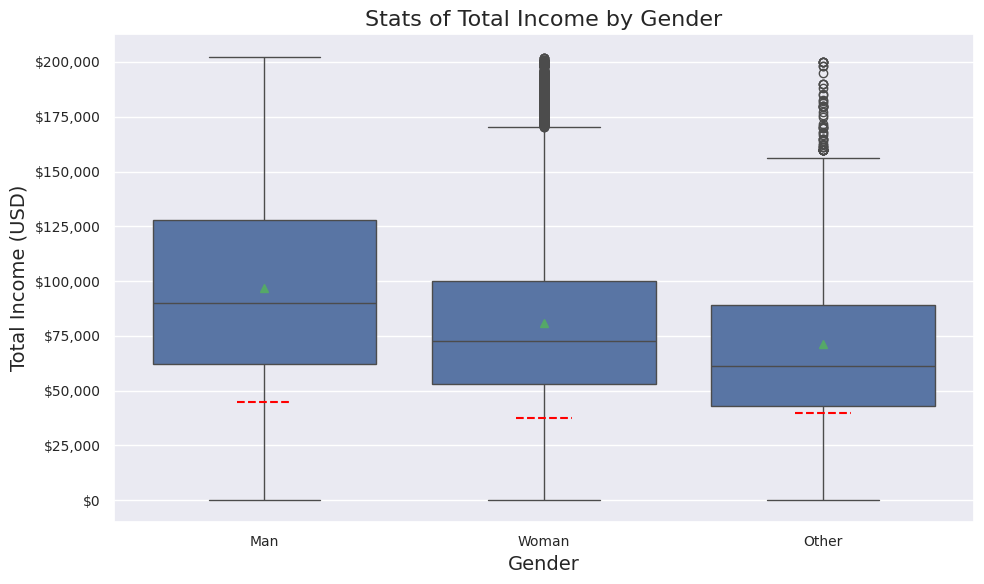

In [ ]:
order_gender = stats_by_gender['gender'].tolist()
std_by_gender = stats_by_gender.set_index('gender')['std'].reindex(order_gender)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='gender', y='total_income_USD', showmeans=True, order=order_gender)
for i, std in enumerate(std_by_gender):
    plt.hlines(std, i - 0.1, i + 0.1, color='red', linestyle='--', label='Std Deviation')
plt.title('Stats of Total Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Income (USD)')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan gender dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau, serta standar deviasi yang diwakili garis putus-putus berwarna merah. Berdasarkan visualisasi tersebut, gender pria memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Pada box plot gender wanita dan other, terdapat beberapa outlier di bagian atas.

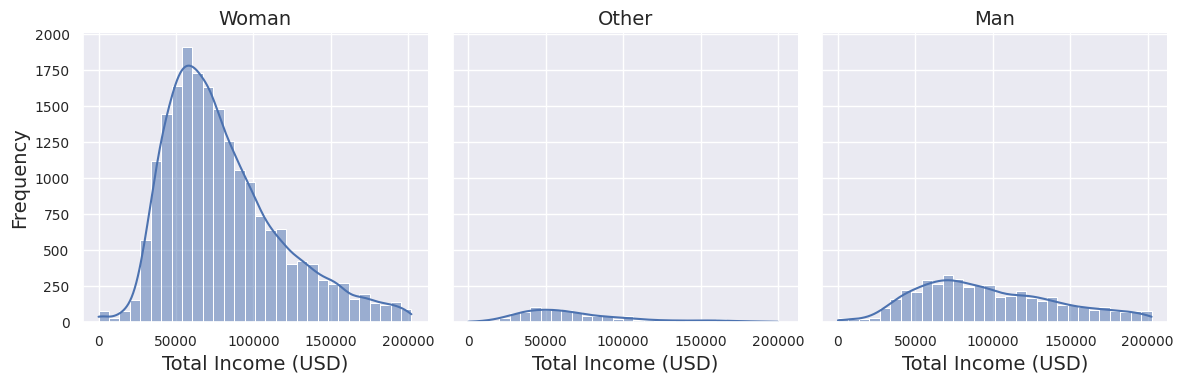

In [ ]:
g = sns.FacetGrid(df_copy, col="gender", col_wrap=3, height=4)
g.map(sns.histplot, "total_income_USD", kde=True, bins=30)

g.set_titles("{col_name}")
g.set_axis_labels("Total Income (USD)", "Frequency")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, setiap gender memiliki sebaran data yang miring ke kiri. Gender wanita memiliki frekuensi tertinggi dibandingkan gender-gender lainnya.

### Pengujian Hipotesis Menggunakan t-test untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Jenis Kelamin Pria dan Wanita

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara jenis kelamin pria (man) dan wanita (woman).
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara jenis kelamin pria (man) dan wanita (woman).

man_income = df_copy[df_copy['gender'] == 'Man']['total_income_USD']
woman_income = df_copy[df_copy['gender'] == 'Woman']['total_income_USD']

t_statistic, p_value = ttest_ind(man_income, woman_income, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara jenis kelamin pria (man) dan wanita (woman).")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara jenis kelamin pria (man) dan wanita (woman).")

t-statistic: 22.77108715028675
p-value: 2.5770510895734403e-110
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara jenis kelamin pria (man) dan wanita (woman).


Kode ini bertujuan untuk menguji apakah ada perbedaan yang signifikan dalam pendapatan rata-rata antara jenis kelamin pria dan wanita. Berikut adalah penjelasan setiap baris kode.

1. `man_income` dan `woman_income` adalah dua kelompok data yang berisi pendapatan individu untuk masing-masing jenis kelamin, di mana `man_income` berisi pendapatan individu untuk pria dan `woman_income` berisi pendapatan individu untuk wanita.

2. Kemudian dilakukan uji t independen (Independent t-test) antara kedua kelompok data menggunakan fungsi `ttest_ind` dari library `scipy.stats`. Dalam hal ini, `equal_var=False` digunakan karena asumsi kesamaan varians tidak terpenuhi.

3. Setelah itu, dilakukan pengujian hipotesis. Jika nilai p-value yang dihasilkan dari uji t kurang dari tingkat signifikansi alpha (0.05), maka kita akan menolak hipotesis nol dan menyimpulkan bahwa ada perbedaan yang signifikan dalam pendapatan rata-rata antara kedua jenis kelamin. Namun, jika nilai p-value lebih besar dari alpha, maka kita gagal menolak hipotesis nol dan menyimpulkan bahwa tidak ada perbedaan yang signifikan dalam pendapatan rata-rata antara kedua jenis kelamin.

Output menunjukkan bahwa terdapat perbedaan signifikan dalam pendapatan rata-rata antara pria dan wanita, dengan t-statistik sebesar 22.77108715028675 dan p-value kurang dari 0.05, yaitu 2.5770510895734403e-110. Nilai t-statistic adalah ukuran dari seberapa jauh rata-rata sampel yang diamati berbeda dari nol dalam satuan standar error. Semakin tinggi nilainya, semakin besar perbedaan antara kedua kelompok data. Dalam hal ini, nilai t-statistic adalah 22.77108715028675, yang menunjukkan bahwa terdapat perbedaan yang signifikan antara pendapatan rata-rata pria dan wanita. Nilai p-value menunjukkan probabilitas bahwa perbedaan antara kelompok data terjadi secara kebetulan. Semakin kecil nilainya, semakin besar kepercayaan kita bahwa perbedaan tersebut bukan hanya kebetulan. Oleh karena itu, hipotesis nol ditolak, sehingga terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara jenis kelamin pria (man) dan wanita (woman).

## Analisis Bivariat antara Ras dan Pendapatan

### Statistik dan Distribusi Pendapatan Berdasarkan Ras

In [ ]:
stats_by_race = df_copy.groupby('race')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()
stats_by_race.columns = ['race', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']

Kode program ini memiliki tujuan yang sama dengan kode sebelumnya, yaitu untuk menghitung statistik deskriptif dari pendapatan total berdasarkan ras (race) dalam dataset. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_race = df_copy.groupby('race')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'race' menggunakan metode `groupby()`.
   - Menghitung beberapa statistik deskriptif dari pendapatan total ('total_income_USD') untuk setiap kelompok ras, seperti rata-rata ('mean'), median ('median'), standar deviasi ('std'), kuartil pertama ('q1'), kuartil ketiga ('q3'), nilai minimum ('min'), nilai maksimum ('max'), dan jangkauan ('range').
   - Fungsi `agg()` digunakan untuk mengaplikasikan fungsi-fungsi statistik tersebut.
   - Hasilnya disimpan dalam variabel `stats_by_race`.

2. `.reset_index()`: Baris ini mereset indeks dari DataFrame `stats_by_race` untuk mengembalikan hasil operasi `groupby` ke format DataFrame biasa.

3. `stats_by_race.columns = ['race', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']`: Baris ini mengubah nama kolom-kolom DataFrame `stats_by_race` menjadi lebih deskriptif. Kolom pertama, yang sebelumnya mungkin bernama lambda_0, diubah menjadi 'race'. Kolom-kolom lainnya tetap menggunakan nama yang sama dengan hasil perhitungan statistik yang sesuai ('mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range').

Dengan demikian, setelah eksekusi kode ini, `stats_by_race` akan berisi statistik deskriptif dari pendapatan total untuk setiap ras dalam dataset.

In [ ]:
stats_by_race = stats_by_race.sort_values(by='mean', ascending=False)
stats_by_race['rank_income_mean'] = stats_by_race['mean'].rank(ascending=False).astype(int)
stats_by_race

race          mean   median           std  \
0             asian or asian american  91877.133878  84622.0  43586.225857   
3  middle eastern or northern african  88710.223022  74880.0  47586.416938   
5                               other  86038.626866  79000.0  42629.306819   
4    native american or alaska native  83925.212963  77600.0  43096.407981   
1           black or african american  83152.400507  75000.0  40019.411541   
6                               white  82600.153422  74000.0  38955.042001   
2                            hispanic  80911.141814  74000.0  39541.207374   

        q1        q3  min     max   range  rank_income_mean  
0  58500.0  120180.0    0  202000  202000                 1  
3  53500.0  121350.0    0  200000  200000                 2  
5  55957.5  106500.0   52  200700  200648                 3  
4  47708.0  111350.0  100  188600  188500                 4  
1  53000.0  107000.0   53  202000  201947                 5  
6  54000.0  103687.5    0  202500  202500                 6  
2  50960.0  101000.0   55  201000  200945                 7

Kode program ini bertujuan untuk mengurutkan DataFrame `stats_by_race` berdasarkan rata-rata pendapatan (`mean`) secara menurun, kemudian menambahkan kolom baru yang berisi peringkat rata-rata pendapatan tersebut berdasarkan ras. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_race = stats_by_race.sort_values(by='mean', ascending=False)`: Baris ini mengurutkan DataFrame `stats_by_race` berdasarkan nilai rata-rata pendapatan (`mean`) secara menurun (descending). Hal ini dilakukan dengan menggunakan metode `sort_values()`, dengan parameter `by='mean'` untuk menunjukkan bahwa pengurutan dilakukan berdasarkan kolom 'mean', dan `ascending=False` untuk menandakan pengurutan secara menurun.

2. `stats_by_race['rank_income_mean'] = stats_by_race['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `stats_by_race`. Kolom ini berisi peringkat rata-rata pendapatan (`mean`) untuk setiap ras. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

Dengan demikian, setelah eksekusi kode ini, DataFrame `stats_by_race` akan berisi statistik deskriptif dari pendapatan total untuk setiap ras dalam dataset, yang sudah diurutkan berdasarkan rata-rata pendapatannya dan memiliki kolom tambahan berisi peringkat rata-rata pendapatan.

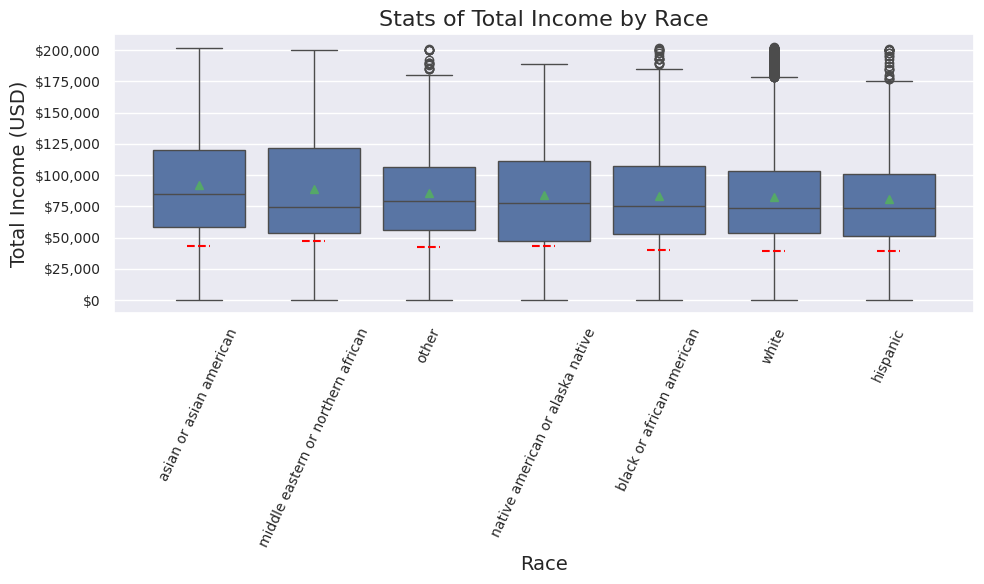

In [ ]:
order_race = stats_by_race['race'].tolist()
std_by_race = stats_by_race.set_index('race')['std'].reindex(order_race)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='race', y='total_income_USD', showmeans=True, order=order_race)
for i, std in enumerate(std_by_race):
    plt.hlines(std, i - 0.1, i + 0.1, color='red', linestyle='--', label='Std Deviation')
plt.title('Stats of Total Income by Race')
plt.xlabel('Race')
plt.ylabel('Total Income (USD)')
plt.xticks(rotation=65)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan ras dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau, serta standar deviasi yang diwakili garis putus-putus berwarna merah. Berdasarkan visualisasi tersebut, ras 'middle eastern or northern african' memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Pada box plot ras 'other', 'black or african american', 'white', dan 'hispanic', terdapat beberapa outlier di bagian atas. Setiap ras memiliki ukuran box yang cenderung sama, sehingga sebaran data antar ras yaitu seimbang.

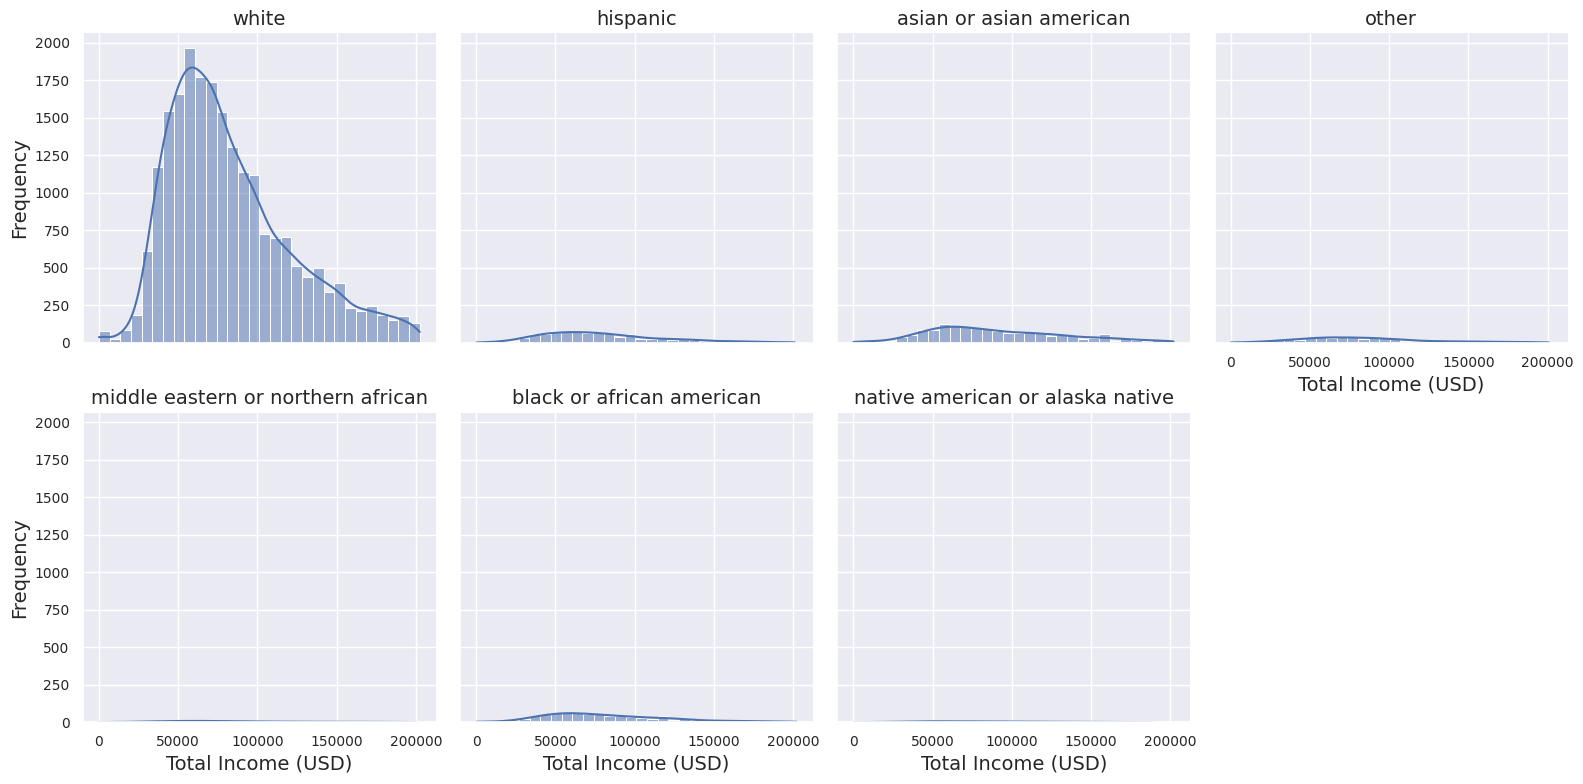

In [ ]:
g = sns.FacetGrid(df_copy, col="race", col_wrap=4, height=4)
g.map(sns.histplot, "total_income_USD", kde=True, bins=30)

g.set_titles("{col_name}")
g.set_axis_labels("Total Income (USD)", "Frequency")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, setiap ras memiliki sebaran data yang miring ke kiri. Ras 'white' memiliki frekuensi tertinggi dibandingkan ras-ras lainnya.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Berbagai Kelompok Ras

In [ ]:
# Ambil data pendapatan untuk setiap kelompok ras
asian_income = df_copy[df_copy['race'] == 'asian or asian american']['total_income_USD']
middle_eastern_income = df_copy[df_copy['race'] == 'middle eastern or northern african']['total_income_USD']
american_income = df_copy[df_copy['race'] == 'native american or alaska native']['total_income_USD']
african_income = df_copy[df_copy['race'] == 'black or african american']['total_income_USD']
white_income = df_copy[df_copy['race'] == 'white']['total_income_USD']
hispanic_income = df_copy[df_copy['race'] == 'hispanic']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(asian_income, middle_eastern_income, american_income, african_income, white_income, hispanic_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 14.905318813737123
levene p-value: 1.2287081164329793e-14
Homogenitas varian tidak terpenuhi


Kode tersebut digunakan untuk melakukan analisis uji Levene guna memeriksa homogenitas varians dari kelompok pendapatan untuk setiap kelompok ras. Berikut adalah penjelasan setiap baris kode.

1. Variabel asian_income, middle_eastern_income, american_income, african_income, white_income, dan hispanic_income: Ini adalah variabel yang menampung data pendapatan untuk masing-masing kelompok ras. Data ini diambil dari DataFrame df_copy dengan menggunakan kondisi pemilihan baris berdasarkan kelompok ras tertentu.

2. levene_statistic, levene_pvalue: Variabel ini menyimpan statistik uji Levene dan nilai p-value-nya, yang dihasilkan dari pengujian homogenitas varians menggunakan fungsi levene.

3. print statements: Menampilkan statistik uji Levene (levene_statistic) dan nilai p-value-nya (levene_pvalue).

4. if-else statement: Memeriksa apakah nilai p-value dari uji Levene kurang dari nilai alpha yang ditentukan. Jika nilai p-value lebih besar dari alpha, maka homogenitas varians terpenuhi. Sebaliknya, jika nilai p-value lebih kecil dari alpha, homogenitas varians tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 14.905318813737123 dan p-value sebesar 1.2287081164329793e-14. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok ras. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok ras.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok ras.

anova_result = welch_anova(data=df_copy, dv='total_income_USD', between='race')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok ras.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok ras.")

F-statistic: 12.53339755833369
p-value: 1.6640953140040897e-13
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok ras.


Kode tersebut melakukan analisis ANOVA untuk memeriksa apakah terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara kelompok ras. Berikut adalah penjelasan setiap baris kode.

1. anova_result: Variabel ini menyimpan hasil analisis ANOVA yang dilakukan menggunakan fungsi welch_anova(). Analisis ini membandingkan pendapatan rata-rata antar kelompok ras dengan memasukkan data dari DataFrame df_copy.

2. print statements: Menampilkan statistik uji ANOVA, yaitu F-statistic dan nilai p-value yang dihasilkan dari analisis.

3. if-else statement: Memeriksa apakah nilai p-value dari uji ANOVA kurang dari nilai alpha yang ditentukan. Jika nilai p-value lebih kecil dari alpha, maka hipotesis nol ditolak, yang berarti terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara setidaknya satu pasangan kelompok ras. Sebaliknya, jika nilai p-value lebih besar dari alpha, hipotesis nol tidak ditolak, yang berarti tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara kelompok ras.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 12.53339755833369 dan p-value adalah 1.6640953140040897e-13. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok ras. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok ras terpopuler.

## Fungsi Pembersihan *Outlier*

In [ ]:
def calculate_bounds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0)
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

Kode program tersebut merupakan sebuah fungsi yang digunakan untuk menghitung batas bawah dan batas atas dalam sebuah dataset, dengan memanfaatkan metode IQR (Interquartile Range) untuk mendeteksi outlier. Berikut adalah penjelasan setiap baris kode.

1. **def calculate_bounds(data):**: Ini adalah pendefinisian fungsi bernama `calculate_bounds`, yang menerima satu parameter yaitu `data`, yang merupakan DataFrame atau Seri Pandas yang ingin dianalisis.

2. **Q1 = data.quantile(0.25)**: Menghitung nilai kuartil pertama (Q1) dari data, yaitu nilai di mana 25% data terendah terletak.

3. **Q3 = data.quantile(0.75)**: Menghitung nilai kuartil ketiga (Q3) dari data, yaitu nilai di mana 75% data terendah terletak.

4. **IQR = Q3 - Q1**: Menghitung Interquartile Range (IQR) dari data, yaitu selisih antara Q3 dan Q1. IQR digunakan sebagai ukuran penyebaran data dalam kuartil.

5. **lower_bound = max(Q1 - 1.5 * IQR, 0)**: Menghitung batas bawah sebagai Q1 dikurangi 1.5 kali IQR. Namun, jika nilai tersebut negatif, maka batas bawah diatur menjadi 0. Hal ini bertujuan untuk memastikan bahwa batas bawah tidak menjadi nilai negatif.

6. **upper_bound = Q3 + 1.5 * IQR**: Menghitung batas atas sebagai Q3 ditambah 1.5 kali IQR. Ini merupakan batas yang menentukan kapan sebuah nilai dianggap sebagai outlier.

7. **return lower_bound, upper_bound**: Mengembalikan nilai batas bawah dan batas atas sebagai output dari fungsi.

Dengan menggunakan fungsi ini, kita dapat dengan mudah menghitung batas bawah dan batas atas untuk mendeteksi outlier dalam dataset yang sedang dianalisis. Analsis bivariat berikutnya antara variabel pendapatan dengan variabel usia, pengalaman kerja, dan pendidikan, merupakan variabel-variabel yang akan digunakan untuk membuat model regresi linier, sehingga variabel-variabel tersebut harus terbebas dari adanya outlier.

## Analisis Bivariat antara Usia dan Pendapatan

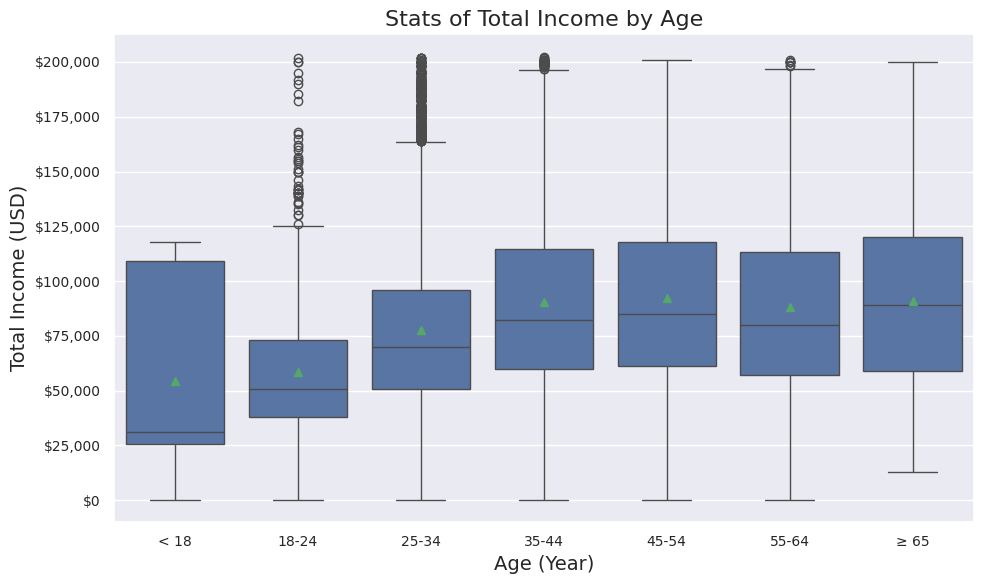

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='age_range', y='total_income_USD', showmeans=True)
plt.title('Stats of Total Income by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan usia dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau. Berdasarkan visualisasi tersebut, usia dibawah 18 tahun memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Pada box plot usia 18-24 tahun, 25-34 tahun, 35-44 tahun, dan 55-64 tahun, terdapat beberapa outlier di bagian atas, sehingga perlu untuk dibersihkan.

### Pembersihan Outlier pada Pendapatan Berdasarkan Usia

In [ ]:
outliers = pd.DataFrame()
for age_range in age_order:
    lower_bound, upper_bound = calculate_bounds(df_copy[df_copy['age_range'] == age_range]['total_income_USD'])
    age_group_outliers = df_copy[(df_copy['age_range'] == age_range) &
                                 ((df_copy['total_income_USD'] < lower_bound) |
                                  (df_copy['total_income_USD'] > upper_bound))]
    outliers = pd.concat([outliers, age_group_outliers])

df_copy = df_copy[~df_copy.index.isin(outliers.index)]

Kode program di atas bertujuan untuk mengidentifikasi dan menghapus outlier dari DataFrame `df_copy` berdasarkan kategori usia (`age_range`) dan nilai pendapatan (`total_income_USD`). Berikut adalah penjelasan setiap baris kode.

1. **Inisialisasi DataFrame untuk Outlier**: Membuat DataFrame kosong `outliers` untuk menyimpan outlier yang akan dihapus dari DataFrame utama.

2. **Loop untuk Setiap Kategori Usia**: Melakukan iterasi untuk setiap kategori usia yang telah diurutkan sebelumnya.

3. **Perhitungan Batas Bawah dan Batas Atas**: Menggunakan fungsi `calculate_bounds` untuk menghitung batas bawah dan batas atas berdasarkan nilai kuartil dari kolom `total_income_USD` untuk setiap kategori usia.

4. **Pemilihan Outlier**: Memilih baris-baris di DataFrame `df_copy` yang termasuk dalam kategori usia tertentu dan memiliki nilai pendapatan di luar rentang batas bawah dan batas atas yang telah dihitung sebelumnya.

5. **Penggabungan Outlier**: Menggabungkan baris-baris outlier yang telah terpilih ke dalam DataFrame `outliers`.

6. **Pembersihan DataFrame Utama**: Menghapus baris-baris yang merupakan outlier dari DataFrame utama (`df_copy`) dengan menggunakan metode boolean indexing (`~df_copy.index.isin(outliers.index)`), sehingga hanya baris-baris yang tidak termasuk outlier yang tetap dipertahankan.

Setelah eksekusi kode di atas, DataFrame `df_copy` akan berisi data yang telah dibersihkan dari outlier berdasarkan kategori usia dan nilai pendapatan.

### Statistik dan Distribusi Pendapatan Berdasarkan Usia

In [ ]:
stats_by_age_range = df_copy.groupby('age_range')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()
stats_by_age_range.columns = ['age_range', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']

Kode program ini memiliki tujuan yang serupa dengan kode-kode sebelumnya, yaitu untuk menghitung statistik deskriptif dari pendapatan total berdasarkan rentang usia (age_range) dalam dataset. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_age_range = df_copy.groupby('age_range')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'age_range' menggunakan metode `groupby()`.
   - Menghitung beberapa statistik deskriptif dari pendapatan total ('total_income_USD') untuk setiap kelompok rentang usia, seperti rata-rata ('mean'), median ('median'), standar deviasi ('std'), kuartil pertama ('q1'), kuartil ketiga ('q3'), nilai minimum ('min'), nilai maksimum ('max'), dan jangkauan ('range').
   - Fungsi `agg()` digunakan untuk mengaplikasikan fungsi-fungsi statistik tersebut.
   - Hasilnya disimpan dalam variabel `stats_by_age_range`.

2. `.reset_index()`: Baris ini mereset indeks dari DataFrame `stats_by_age_range` untuk mengembalikan hasil operasi `groupby` ke format DataFrame biasa.

3. `stats_by_age_range.columns = ['age_range', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']`: Baris ini mengubah nama kolom-kolom DataFrame `stats_by_age_range` menjadi lebih deskriptif. Kolom pertama, yang sebelumnya mungkin bernama lambda_0, diubah menjadi 'age_range'. Kolom-kolom lainnya tetap menggunakan nama yang sama dengan hasil perhitungan statistik yang sesuai ('mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range').

Dengan demikian, setelah eksekusi kode ini, `stats_by_age_range` akan berisi statistik deskriptif dari pendapatan total untuk setiap rentang usia dalam dataset.

In [ ]:
stats_by_age_range = stats_by_age_range.sort_values(by='mean', ascending=False)
stats_by_age_range['rank_income_mean'] = stats_by_age_range['mean'].rank(ascending=False).astype(int)
stats_by_age_range

age_range          mean   median           std       q1        q3    min  \
4       45-54  92187.155462  85000.0  41070.024236  61000.0  117640.0      0   
6  65 or over  90806.609195  89000.0  43168.843058  58913.0  120000.0  13000   
3       35-44  89263.281416  82000.0  39047.237498  60000.0  113100.0      0   
5       55-64  87085.841808  80000.0  40575.605721  56800.0  111000.0     40   
2       25-34  73818.727680  68000.0  31787.032076  50000.0   92000.0      0   
1       18-24  54434.265381  50000.0  24006.370815  37274.0   70000.0      0   
0    under 18  54256.666667  31200.0  45870.624587  25390.0  109200.0      0   

      max   range  rank_income_mean  
4  201000  201000                 1  
6  200000  187000                 2  
3  196500  196500                 3  
5  197000  196960                 4  
2  163500  163500                 5  
1  125000  125000                 6  
0  118000  118000                 7

Kode program ini bertujuan untuk mengurutkan DataFrame `stats_by_age_range` berdasarkan rata-rata pendapatan (`mean`) secara menurun, kemudian menambahkan kolom baru yang berisi peringkat rata-rata pendapatan tersebut berdasarkan rentang usia. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_age_range = stats_by_age_range.sort_values(by='mean', ascending=False)`: Baris ini mengurutkan DataFrame `stats_by_age_range` berdasarkan nilai rata-rata pendapatan (`mean`) secara menurun (descending). Hal ini dilakukan dengan menggunakan metode `sort_values()`, dengan parameter `by='mean'` untuk menunjukkan bahwa pengurutan dilakukan berdasarkan kolom 'mean', dan `ascending=False` untuk menandakan pengurutan secara menurun.

2. `stats_by_age_range['rank_income_mean'] = stats_by_age_range['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `stats_by_age_range`. Kolom ini berisi peringkat rata-rata pendapatan (`mean`) untuk setiap rentang usia. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

Dengan demikian, setelah eksekusi kode ini, DataFrame `stats_by_age_range` akan berisi statistik deskriptif dari pendapatan total untuk setiap rentang usia dalam dataset, yang sudah diurutkan berdasarkan rata-rata pendapatannya dan memiliki kolom tambahan berisi peringkat rata-rata pendapatan.

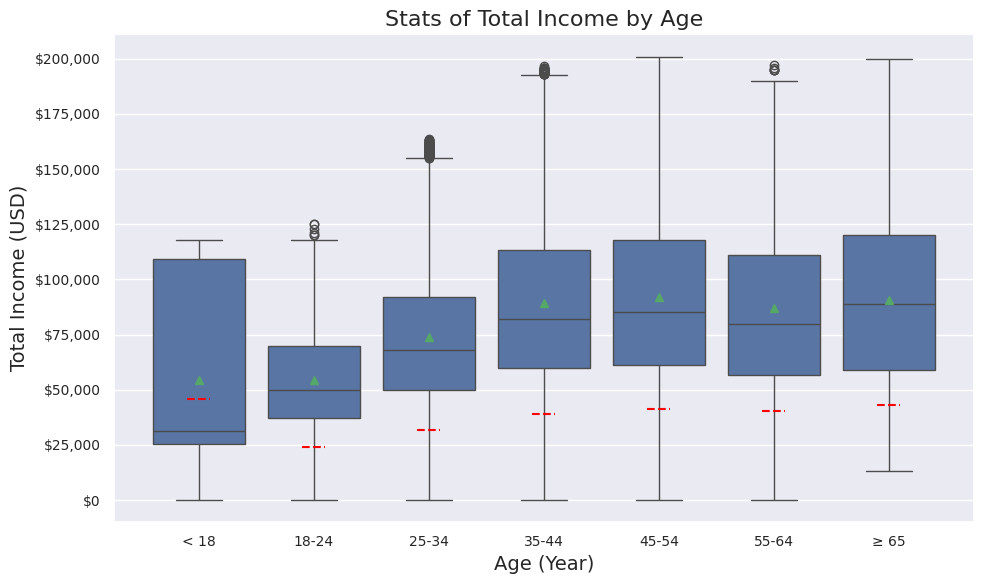

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='age_range', y='total_income_USD', showmeans=True)
for _, row in stats_by_age_range.iterrows():
    plt.hlines(row['std'], row.name - 0.1, row.name + 0.1, color='red', linestyle='--', label='Std Deviation')
plt.title('Stats of Total Income by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan usia dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau, serta standar deviasi yang diwakili garis putus-putus berwarna merah. Berdasarkan visualisasi tersebut, usia dibawah 18 tahun memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Setelah dilakukan pembersihan outlier, outlier pada box plot usia 18-24 tahun, 25-34 tahun, 35-44 tahun dan 55-64 tahun menjadi berkurang, sehingga mengoptimalkan analisis yang akan dilakukan.

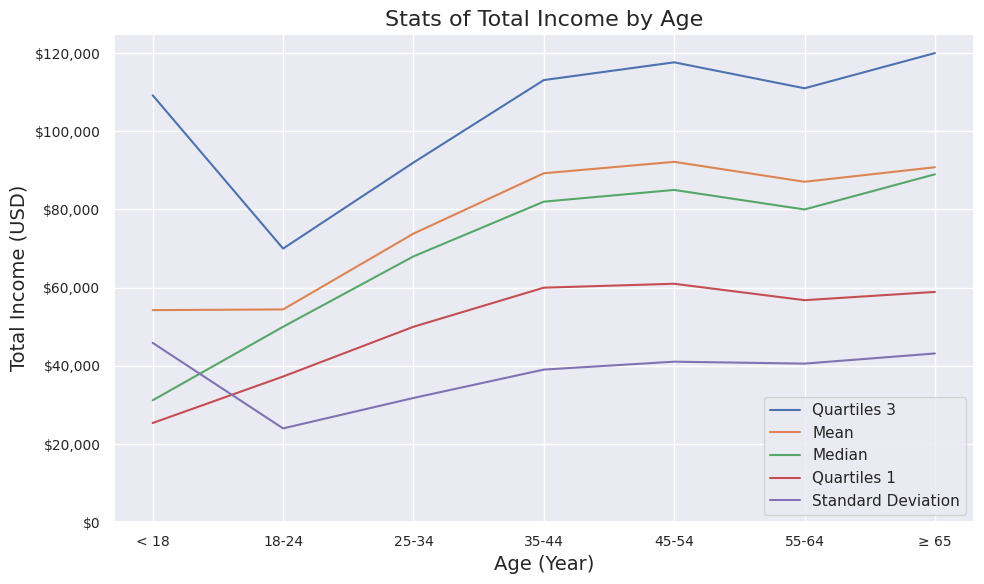

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=stats_by_age_range, x='age_range', y='q3', label='Quartiles 3')
sns.lineplot(data=stats_by_age_range, x='age_range', y='mean', label='Mean')
sns.lineplot(data=stats_by_age_range, x='age_range', y='median', label='Median')
sns.lineplot(data=stats_by_age_range, x='age_range', y='q1', label='Quartiles 1')
sns.lineplot(data=stats_by_age_range, x='age_range', y='std', label='Standard Deviation')
plt.title('Stats of Total Income by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, nilai statistik pendapatan cenderung meningkat dari rentang usia 18-24 tahun hingga 45-54 tahun.

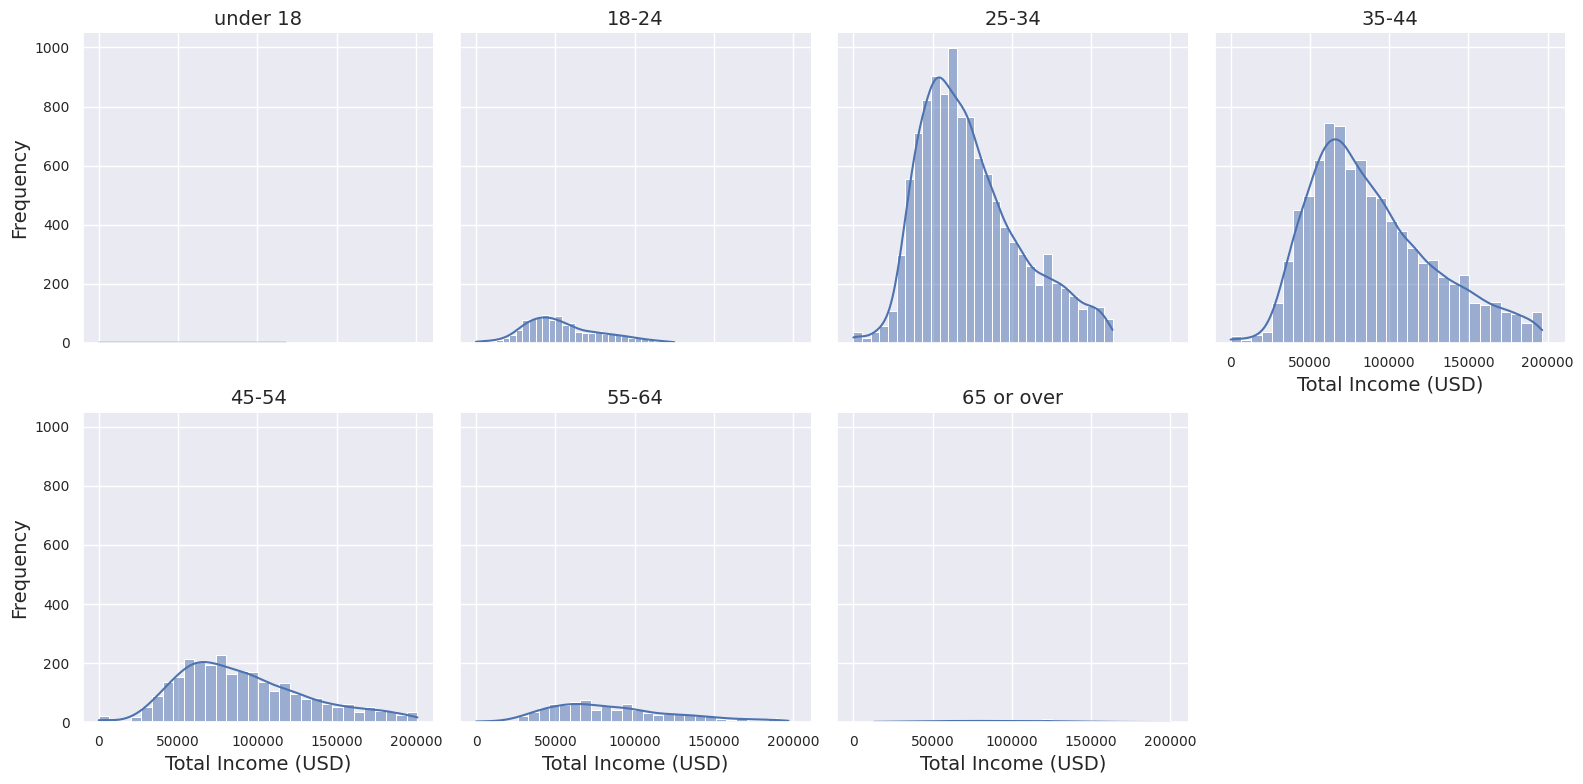

In [ ]:
g = sns.FacetGrid(df_copy, col="age_range", col_wrap=4, height=4)
g.map(sns.histplot, "total_income_USD", kde=True, bins=30)

g.set_titles("{col_name}")
g.set_axis_labels("Total Income (USD)", "Frequency")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, setiap rentang usia memiliki sebaran data yang miring ke kiri. Rentang usia 25-34 tahun dan 35-44 tahun memiliki frekuensi tertinggi dibandingkan rentang usia lainnya.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Berbagai Kelompok Usia

In [ ]:
# Ambil data pendapatan untuk setiap kelompok usia
ar1_income = df_copy[df_copy['age_range'] == 'under 18']['total_income_USD']
ar2_income = df_copy[df_copy['age_range'] == '18-24']['total_income_USD']
ar3_income = df_copy[df_copy['age_range'] == '25-34']['total_income_USD']
ar4_income = df_copy[df_copy['age_range'] == '35-44']['total_income_USD']
ar5_income = df_copy[df_copy['age_range'] == '45-54']['total_income_USD']
ar6_income = df_copy[df_copy['age_range'] == '55-64']['total_income_USD']
ar7_income = df_copy[df_copy['age_range'] == '65 or over']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(ar1_income, ar2_income, ar3_income, ar4_income, ar5_income, ar6_income, ar7_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 115.93722480756414
levene p-value: 5.753154374803958e-145
Homogenitas varian tidak terpenuhi


Kode tersebut melakukan analisis uji Levene untuk memeriksa homogenitas varians dari kelompok pendapatan untuk setiap kelompok usia. Berikut adalah penjelasan setiap baris kode.

1. Variabel ar1_income, ar2_income, ..., ar7_income: Ini adalah variabel yang menampung data pendapatan untuk setiap kelompok usia yang diambil dari DataFrame df_copy. Setiap variabel hanya berisi data pendapatan untuk satu kelompok usia tertentu.

2. levene_statistic, levene_pvalue: Variabel ini menyimpan statistik uji Levene dan p-value-nya, yang dihasilkan dari pengujian homogenitas varian menggunakan fungsi levene().

3. print statements: Menampilkan statistik uji Levene (levene_statistic) dan p-value-nya (levene_pvalue).

4. if-else statement: Memeriksa apakah p-value dari uji Levene kurang dari nilai alpha yang ditentukan. Jika p-value lebih besar dari alpha, maka homogenitas varian terpenuhi. Jika tidak, homogenitas varian tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 115.93722480756414 dan p-value sebesar 5.753154374803958e-145. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok usia. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok usia.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok usia.

anova_result = welch_anova(data=df_copy, dv='total_income_USD', between='age_range')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok usia.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok usia.")

F-statistic: 384.98961341373393
p-value: 8.39405426454408e-74
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok usia.


Kode tersebut melakukan analisis uji Welch's ANOVA untuk memeriksa apakah ada perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok usia. Berikut adalah penjelasan setiap baris kode.

1. anova_result: Ini adalah hasil dari uji Welch's ANOVA yang dilakukan menggunakan fungsi welch_anova() dari paket statistik. Ini memeriksa perbedaan dalam pendapatan rata-rata di antara kelompok usia.

2. print statements: Menampilkan nilai F-statistik dan p-value dari hasil uji Welch's ANOVA.

3. if-else statement: Memeriksa apakah p-value dari uji Welch's ANOVA kurang dari nilai alpha yang ditentukan. Jika p-value lebih kecil dari alpha, maka hipotesis nol ditolak, yang berarti ada perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok usia. Jika tidak, maka hipotesis nol tidak ditolak, yang berarti tidak ada perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok usia.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 384.98961341373393 dan p-value adalah 8.39405426454408e-74. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok usia. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok usia terpopuler.

### Pengujian Hipotesis Menggunakan Korelasi Pearson untuk Menentukan Apakah Terdapat Hubungan antara Pendapatan dan Usia

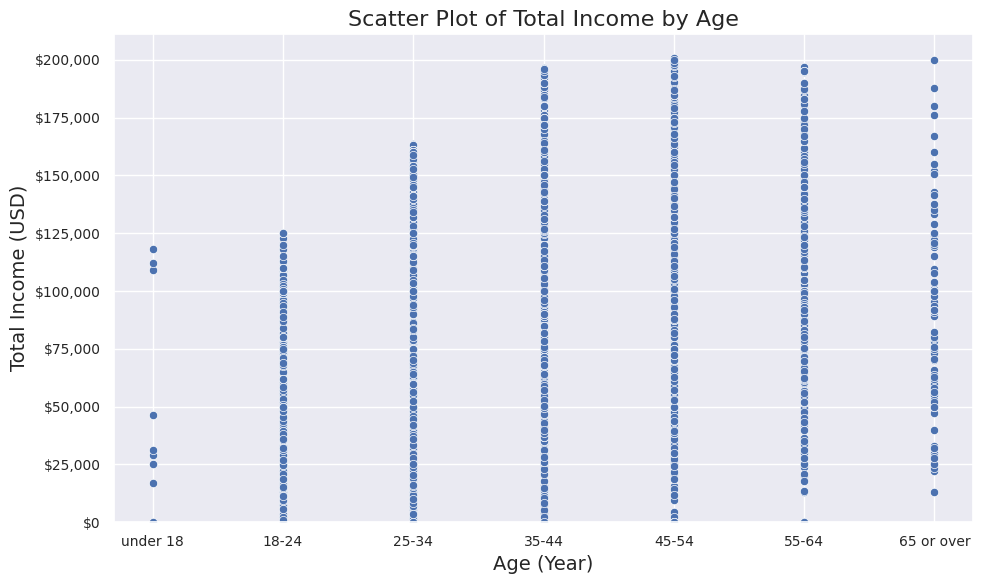

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_range', y='total_income_USD', data=df_copy)
plt.title('Scatter Plot of Total Income by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Total Income (USD)')
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, korelasi antara pendapatan dan usia sedikit terlihat dari nilai maksimum yang cenderung meningkat pada setiap rentang usia.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat korelasi yang signifikan antara pendapatan dan usia.
# Hipotesis alternatif (H1): Terdapat korelasi yang signifikan antara pendapatan dan usia.

pearson_corr, pearson_p_value = pearsonr(df_copy['numerical_age_range'], df_copy['total_income_USD'])

print("Korelasi Pearson antara usia dan pendapatan:", pearson_corr)
print("p-value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pendapatan dan usia.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara pendapatan dan usia.")

Korelasi Pearson antara usia dan pendapatan: 0.22249052932106578
p-value: 1.3977112015963269e-279
Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pendapatan dan usia.


Kode ini bertujuan untuk menguji apakah terdapat korelasi yang signifikan antara pendapatan dan usia. Korelasi Pearson digunakan untuk mengukur kekuatan dan arah hubungan antara kedua variabel tersebut. Berikut adalah penjelasan setiap baris kode.

1. **Menghitung Korelasi Pearson**: Menggunakan fungsi `pearsonr()` untuk menghitung nilai korelasi Pearson antara usia (`numerical_age_range`) dan pendapatan (`total_income_USD`) dari DataFrame `df_copy`. Korelasi Pearson menghasilkan dua nilai: nilai korelasi itu sendiri (`pearson_corr`) dan nilai p-value (`pearson_p_value`).

2. **Menampilkan Output**: Mencetak nilai korelasi Pearson antara usia dan pendapatan, serta nilai p-value yang dihasilkan dari pengujian.

3. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika nilai p-value kurang dari alpha, maka hipotesis nol ditolak, dan disimpulkan bahwa terdapat korelasi yang signifikan antara pendapatan dan usia. Jika nilai p-value lebih besar dari alpha, maka gagal menolak hipotesis nol, dan disimpulkan bahwa tidak terdapat korelasi yang signifikan antara kedua variabel tersebut.

Output tersebut menunjukkan hasil dari pengujian korelasi antara usia dan pendapatan menggunakan metode korelasi Pearson. Nilai korelasi Pearson yang diperoleh adalah 0.22249052932106578. Nilai ini menunjukkan adanya hubungan positif antara usia dan pendapatan, meskipun hubungannya cukup lemah. Nilai p-value yang sangat rendah, yaitu 1.3977112015963269e-279, menunjukkan bahwa probabilitas mendapatkan nilai korelasi sebesar atau lebih ekstrem daripada yang diamati secara kebetulan sangat rendah. Dengan kata lain, hasil ini sangat signifikan secara statistik. Karena nilai p-value jauh lebih kecil dari alpha (0.05), hipotesis nol yang menyatakan tidak ada korelasi antara usia dan pendapatan ditolak. Oleh karena itu, disimpulkan bahwa terdapat korelasi yang signifikan antara usia dan pendapatan.

## Analisis Bivariat antara Pengalaman Kerja dan Pendapatan

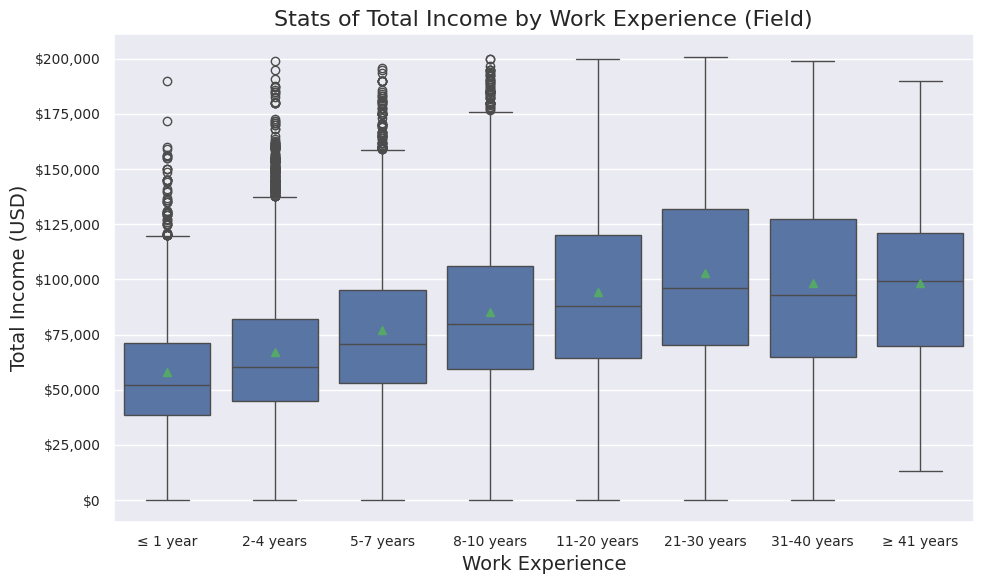

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='work_experience_field', y='total_income_USD', showmeans=True)
plt.title('Stats of Total Income by Work Experience (Field)')
plt.xlabel('Work Experience')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['≤ 1 year', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '≥ 41 years'])
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan pengalaman kerja dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau. Berdasarkan visualisasi tersebut, pengalaman kerja 31-40 tahun dan 21-30 tahun memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Pada box plot pengalaman kerja kurang dari 1 tahun, 2-4 tahun, 5-7 tahun, dan 8-10 tahun, terdapat beberapa outlier di bagian atas, sehingga perlu untuk dibersihkan.

### Pembersihan Outlier pada Pendapatan Berdasarkan Pengalaman Kerja

In [ ]:
outliers = pd.DataFrame()
for work_experience_field in work_experience_order:
    lower_bound, upper_bound = calculate_bounds(df_copy[df_copy['work_experience_field'] == work_experience_field]['total_income_USD'])
    age_group_outliers = df_copy[(df_copy['work_experience_field'] == work_experience_field) &
                                 ((df_copy['total_income_USD'] < lower_bound) |
                                  (df_copy['total_income_USD'] > upper_bound))]
    outliers = pd.concat([outliers, age_group_outliers])

df_copy = df_copy[~df_copy.index.isin(outliers.index)]

Kode program di atas bertujuan untuk mengidentifikasi dan menghapus outlier dari DataFrame `df_copy` berdasarkan kategori pengalaman kerja (`work_experience_field`) dan nilai pendapatan (`total_income_USD`). Berikut adalah penjelasan setiap baris kode.

1. **Inisialisasi DataFrame untuk Outlier**: Membuat DataFrame kosong `outliers` untuk menyimpan outlier yang akan dihapus dari DataFrame utama.

2. **Loop untuk Setiap Kategori Pengalaman Kerja**: Melakukan iterasi untuk setiap kategori pengalaman kerja yang telah diurutkan sebelumnya.

3. **Perhitungan Batas Bawah dan Batas Atas**: Menggunakan fungsi `calculate_bounds` untuk menghitung batas bawah dan batas atas berdasarkan nilai kuartil dari kolom `total_income_USD` untuk setiap kategori pengalaman kerja.

4. **Pemilihan Outlier**: Memilih baris-baris di DataFrame `df_copy` yang termasuk dalam kategori pengalaman kerja tertentu dan memiliki nilai pendapatan di luar rentang batas bawah dan batas atas yang telah dihitung sebelumnya.

5. **Penggabungan Outlier**: Menggabungkan baris-baris outlier yang telah terpilih ke dalam DataFrame `outliers`.

6. **Pembersihan DataFrame Utama**: Menghapus baris-baris yang merupakan outlier dari DataFrame utama (`df_copy`) dengan menggunakan metode boolean indexing (`~df_copy.index.isin(outliers.index)`), sehingga hanya baris-baris yang tidak termasuk outlier yang tetap dipertahankan.

Setelah eksekusi kode di atas, DataFrame `df_copy` akan berisi data yang telah dibersihkan dari outlier berdasarkan kategori pengalaman kerja dan nilai pendapatan.

### Statistik dan Distribusi Pendapatan Berdasarkan Pengalaman Kerja

In [ ]:
stats_by_work_experience_field = df_copy.groupby('work_experience_field')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()
stats_by_work_experience_field.columns = ['work_experience_field', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']

Kode program ini bertujuan untuk menghitung statistik deskriptif dari pendapatan total berdasarkan bidang pengalaman kerja (work_experience_field) dalam dataset. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_work_experience_field = df_copy.groupby('work_experience_field')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'work_experience_field' menggunakan metode `groupby()`.
   - Menghitung beberapa statistik deskriptif dari pendapatan total ('total_income_USD') untuk setiap kelompok bidang pengalaman kerja, seperti rata-rata ('mean'), median ('median'), standar deviasi ('std'), kuartil pertama ('q1'), kuartil ketiga ('q3'), nilai minimum ('min'), nilai maksimum ('max'), dan jangkauan ('range').
   - Fungsi `agg()` digunakan untuk mengaplikasikan fungsi-fungsi statistik tersebut.
   - Hasilnya disimpan dalam variabel `stats_by_work_experience_field`.

2. `.reset_index()`: Baris ini mereset indeks dari DataFrame `stats_by_work_experience_field` untuk mengembalikan hasil operasi `groupby` ke format DataFrame biasa.

3. `stats_by_work_experience_field.columns = ['work_experience_field', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']`: Baris ini mengubah nama kolom-kolom DataFrame `stats_by_work_experience_field` menjadi lebih deskriptif. Kolom pertama, yang sebelumnya mungkin bernama lambda_0, diubah menjadi 'work_experience_field'. Kolom-kolom lainnya tetap menggunakan nama yang sama dengan hasil perhitungan statistik yang sesuai ('mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range').

Dengan demikian, setelah eksekusi kode ini, `stats_by_work_experience_field` akan berisi statistik deskriptif dari pendapatan total untuk setiap bidang pengalaman kerja dalam dataset.

In [ ]:
stats_by_work_experience_field = stats_by_work_experience_field.sort_values(by='mean', ascending=False)
stats_by_work_experience_field['rank_income_mean'] = stats_by_work_experience_field['mean'].rank(ascending=False).astype(int)
stats_by_work_experience_field

work_experience_field           mean   median           std       q1  \
5           21-30 years  102756.075556  96000.0  42506.837349  70117.5   
6           31-40 years   98510.695652  93000.0  42166.364503  65000.0   
7      41 years or more   98185.222222  99398.0  40615.084208  69825.0   
4           11-20 years   94342.252538  88000.0  39256.601060  64377.5   
3            8-10 years   83660.429821  78100.0  33598.042255  59000.0   
2             5-7 years   75768.799076  70087.0  30547.621240  53000.0   
1             2-4 years   63788.585466  60000.0  25900.124434  44800.0   
0        1 year or less   54416.442560  50336.0  22535.172213  38000.0   

         q3    min     max   range  rank_income_mean  
5  132000.0      0  201000  201000                 1  
6  127400.0     65  199000  198935                 2  
7  121250.0  13000  190000  177000                 3  
4  120000.0      0  200000  200000                 4  
3  105000.0      0  176000  176000                 5  
2   94390.0      0  158600  158600                 6  
1   79597.0      0  137500  137500                 7  
0   67600.0      0  119500  119500                 8

Kode program ini bertujuan untuk mengurutkan DataFrame `stats_by_work_experience_field` berdasarkan rata-rata pendapatan (`mean`) secara menurun, kemudian menambahkan kolom baru yang berisi peringkat rata-rata pendapatan tersebut berdasarkan bidang pengalaman kerja. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_work_experience_field = stats_by_work_experience_field.sort_values(by='mean', ascending=False)`: Baris ini mengurutkan DataFrame `stats_by_work_experience_field` berdasarkan nilai rata-rata pendapatan (`mean`) secara menurun (descending). Hal ini dilakukan dengan menggunakan metode `sort_values()`, dengan parameter `by='mean'` untuk menunjukkan bahwa pengurutan dilakukan berdasarkan kolom 'mean', dan `ascending=False` untuk menandakan pengurutan secara menurun.

2. `stats_by_work_experience_field['rank_income_mean'] = stats_by_work_experience_field['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `stats_by_work_experience_field`. Kolom ini berisi peringkat rata-rata pendapatan (`mean`) untuk setiap bidang pengalaman kerja. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

Dengan demikian, setelah eksekusi kode ini, DataFrame `stats_by_work_experience_field` akan berisi statistik deskriptif dari pendapatan total untuk setiap bidang pengalaman kerja dalam dataset, yang sudah diurutkan berdasarkan rata-rata pendapatannya dan memiliki kolom tambahan berisi peringkat rata-rata pendapatan.

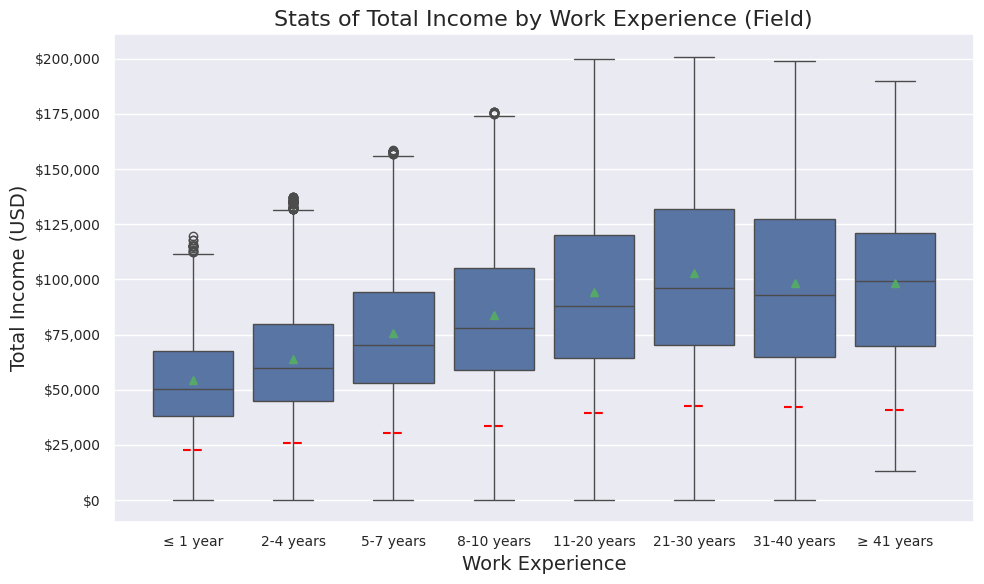

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='work_experience_field', y='total_income_USD', showmeans=True)
for _, row in stats_by_work_experience_field.iterrows():
    plt.hlines(row['std'], row.name - 0.1, row.name + 0.1, color='red', linestyle='--', label='Std Deviation')
plt.title('Stats of Total Income by Work Experience (Field)')
plt.xlabel('Work Experience')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['≤ 1 year', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '≥ 41 years'])
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan pengalaman kerja dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau, serta standar deviasi yang diwakili garis putus-putus berwarna merah. Berdasarkan visualisasi tersebut, pengalaman kerja 31-40 tahun dan 21-30 tahun memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Setelah dilakukan pembersihan outlier, outlier pada box plot pengalaman kerja kurang dari 1 tahun, 2-4 tahun, 5-7 tahun dan 8-10 tahun menjadi berkurang, sehingga mengoptimalkan analisis yang akan dilakukan.

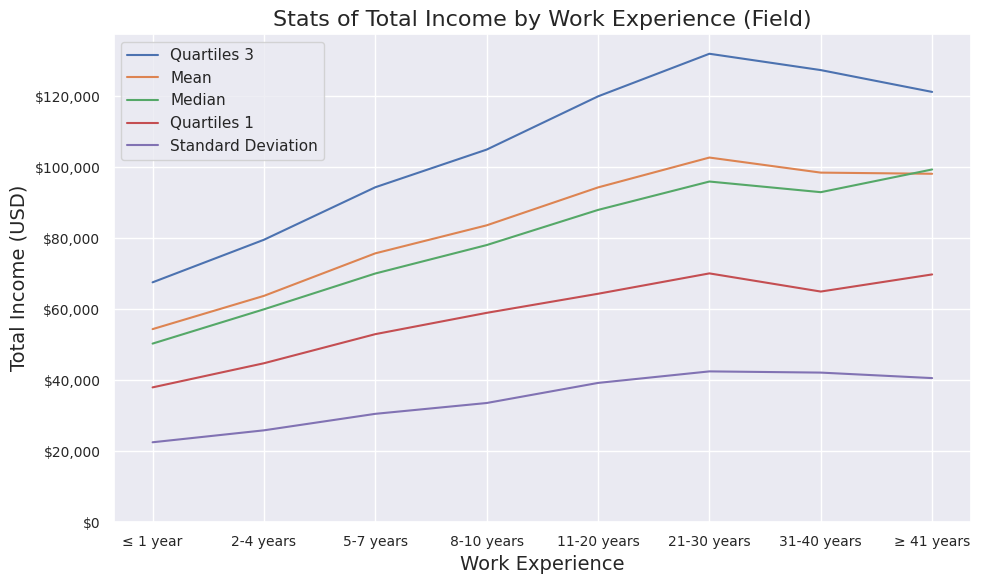

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=stats_by_work_experience_field, x='work_experience_field', y='q3', label='Quartiles 3')
sns.lineplot(data=stats_by_work_experience_field, x='work_experience_field', y='mean', label='Mean')
sns.lineplot(data=stats_by_work_experience_field, x='work_experience_field', y='median', label='Median')
sns.lineplot(data=stats_by_work_experience_field, x='work_experience_field', y='q1', label='Quartiles 1')
sns.lineplot(data=stats_by_work_experience_field, x='work_experience_field', y='std', label='Standard Deviation')
plt.title('Stats of Total Income by Work Experience (Field)')
plt.xlabel('Work Experience')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['≤ 1 year', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '≥ 41 years'])
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, nilai statistik pendapatan cenderung meningkat dari rentang pengalaman kerja kurang dari 1 tahun hingga 21-30 tahun.

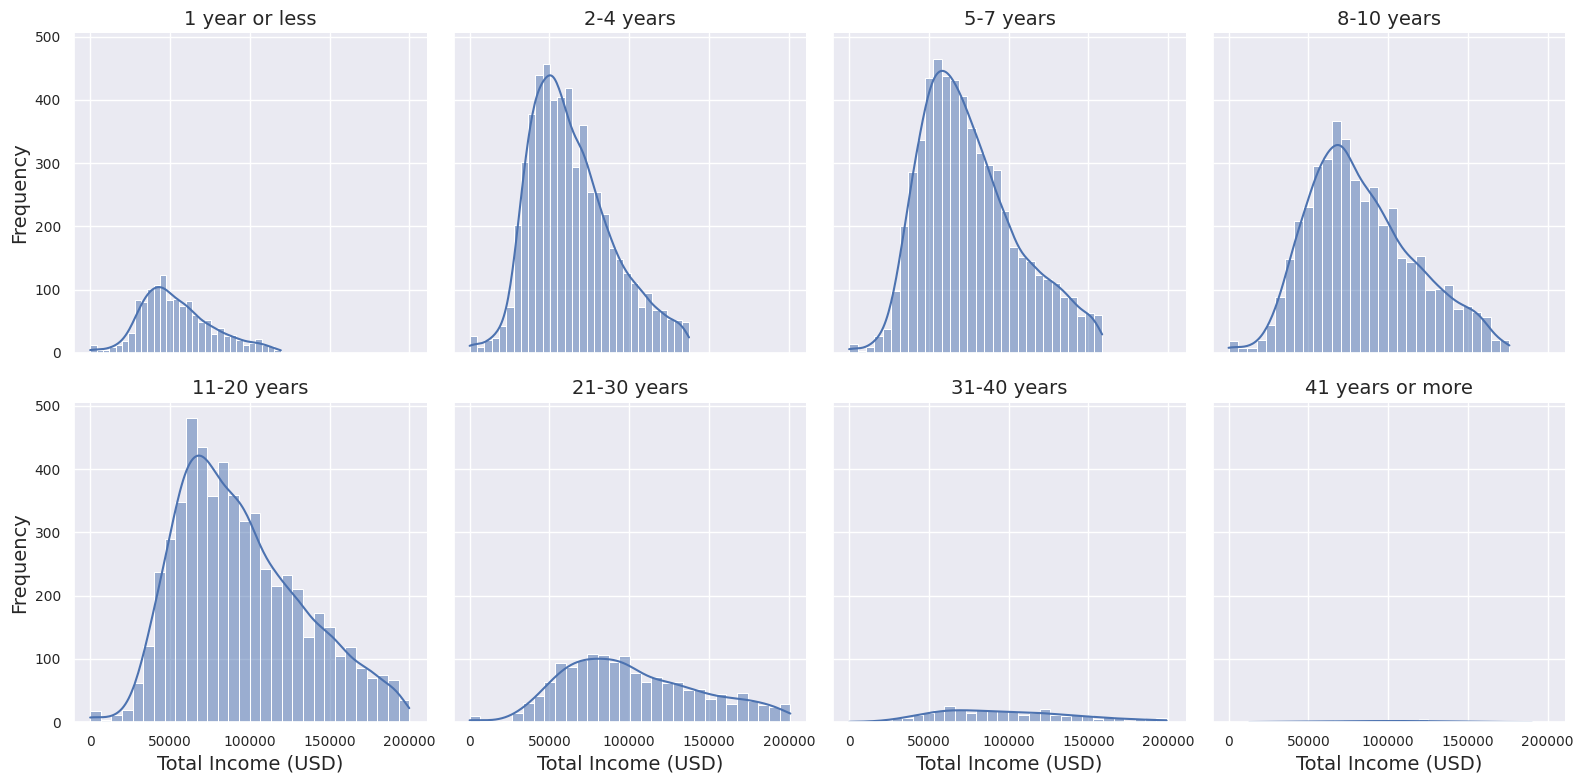

In [ ]:
g = sns.FacetGrid(df_copy, col="work_experience_field", col_wrap=4, height=4)
g.map(sns.histplot, "total_income_USD", kde=True, bins=30)

g.set_titles("{col_name}")
g.set_axis_labels("Total Income (USD)", "Frequency")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, setiap rentang pengalaman kerja memiliki sebaran data yang miring ke kiri. Rentang pengalaman kerja 11-20 tahun memiliki frekuensi tertinggi dibandingkan rentang pengalaman kerja lainnya.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Berbagai Kelompok Pengalaman Kerja

In [ ]:
# Ambil data pendapatan untuk setiap kelompok pengalaman kerja
we1_income = df_copy[df_copy['work_experience_field'] == '1 year or less']['total_income_USD']
we2_income = df_copy[df_copy['work_experience_field'] == '2-4 years']['total_income_USD']
we3_income = df_copy[df_copy['work_experience_field'] == '5-7 years']['total_income_USD']
we4_income = df_copy[df_copy['work_experience_field'] == "8-10 years"]['total_income_USD']
we5_income = df_copy[df_copy['work_experience_field'] == '11-20 years']['total_income_USD']
we6_income = df_copy[df_copy['work_experience_field'] == '21-30 years']['total_income_USD']
we7_income = df_copy[df_copy['work_experience_field'] == '31-40 years']['total_income_USD']
we8_income = df_copy[df_copy['work_experience_field'] == '41 years or more']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(we1_income, we2_income, we3_income, we4_income, we5_income, we6_income, we7_income, we8_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 206.03989369961062
levene p-value: 1.4969239303258198e-298
Homogenitas varian tidak terpenuhi


Kode ini bertujuan untuk melakukan analisis uji Levene guna memeriksa homogenitas varians dari kelompok pendapatan berdasarkan pengalaman kerja. Berikut adalah penjelasan setiap baris kode.

1. Variabel we1_income, we2_income, ..., we8_income: Variabel-variabel ini menyimpan data pendapatan untuk masing-masing kelompok pengalaman kerja yang diambil dari DataFrame df_copy. Setiap variabel berisi data pendapatan untuk rentang pengalaman kerja tertentu.

2. Variabel levene_statistic, levene_pvalue: Variabel ini menyimpan statistik uji Levene dan p-value-nya yang dihasilkan dari pengujian homogenitas varian menggunakan fungsi levene().

3. Print statements: Menampilkan nilai statistik uji Levene (levene_statistic) dan p-value-nya (levene_pvalue).

4. If-else statement: Memeriksa apakah p-value dari uji Levene lebih besar dari alpha yang ditentukan. Jika p-value lebih besar dari alpha, maka homogenitas varian terpenuhi. Jika tidak, homogenitas varian tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 206.03989369961062 dan p-value sebesar 1.4969239303258198e-298. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara kelompok pengalaman kerja. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pengalaman kerja.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pengalaman kerja.

anova_result = welch_anova(data=df_copy, dv='total_income_USD', between='work_experience_field')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pengalaman kerja.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pengalaman kerja.")

F-statistic: 651.5843767267149
p-value: 7.135856843020963e-284
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pengalaman kerja.


Kode ini bertujuan untuk melakukan analisis uji Welch's ANOVA guna memeriksa apakah terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pengalaman kerja. Berikut adalah penjelasan setiap baris kode.

1. anova_result: Variabel ini menyimpan hasil uji Welch's ANOVA yang dilakukan menggunakan fungsi welch_anova(). Data yang digunakan adalah DataFrame df_copy dengan variabel dependen (dv) 'total_income_USD' dan variabel independen (between) 'work_experience_field'.

2. Print statements: Menampilkan nilai F-statistik dan p-value (p-unc) dari uji Welch's ANOVA.

3. If-else statement: Memeriksa apakah p-value dari uji Welch's ANOVA kurang dari alpha yang ditentukan. Jika p-value kurang dari alpha, maka kita menolak hipotesis nol dan menyatakan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pengalaman kerja. Jika tidak, maka kita gagal menolak hipotesis nol dan menyatakan bahwa tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara kelompok pengalaman kerja.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 651.5843767267149 dan p-value adalah 7.135856843020963e-284. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara kelompok pengalaman kerja. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan kelompok pengalaman kerja terpopuler.

### Pengujian Hipotesis Menggunakan Korelasi Pearson untuk Menentukan Apakah Terdapat Hubungan antara Pendapatan dan Pengalaman Kerja

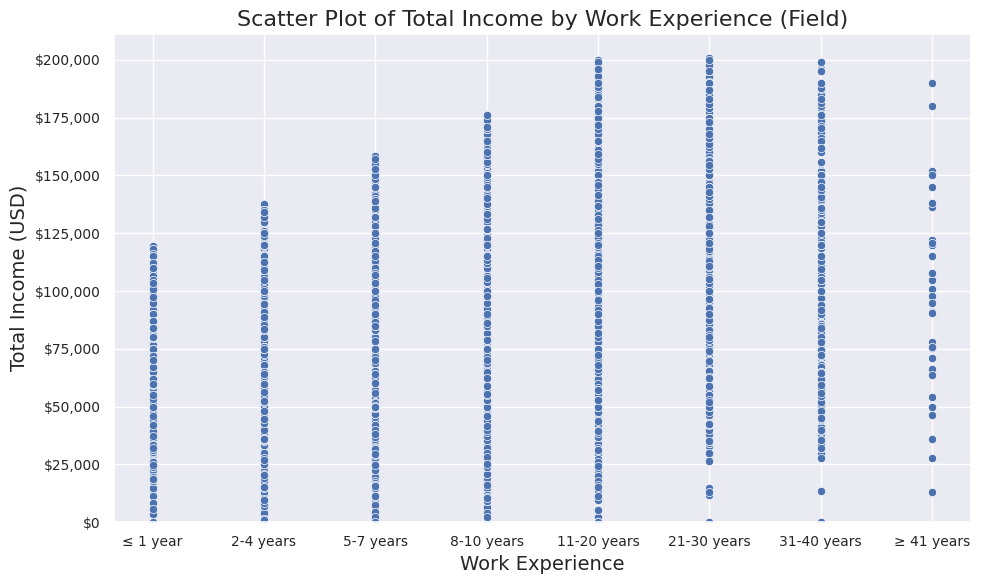

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='work_experience_field', y='total_income_USD', data=df_copy)
plt.title('Scatter Plot of Total Income by Work Experience (Field)')
plt.xlabel('Work Experience')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=['≤ 1 year', '2-4 years', '5-7 years', '8-10 years', '11-20 years', '21-30 years', '31-40 years', '≥ 41 years'])
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, korelasi antara pendapatan dan pengalaman kerja sedikit terlihat dari nilai maksimum yang cenderung meningkat pada setiap rentang pengalaman kerja, dari rentang pengalaman kerja kurang dari 1 tahun hingga 11-20 tahun.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja.
# Hipotesis alternatif (H1): Terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja.

pearson_corr, pearson_p_value = pearsonr(df_copy['numerical_work_experience_overall'], df_copy['total_income_USD'])

print("Korelasi Pearson antara pengalaman kerja dan pendapatan:", pearson_corr)
print("p-value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja.")

Korelasi Pearson antara pengalaman kerja dan pendapatan: 0.2570729008541326
p-value: 0.0
Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja.


Kode tersebut bertujuan untuk menguji apakah ada korelasi yang signifikan antara pendapatan dan pengalaman kerja menggunakan korelasi Pearson. Berikut adalah penjelasan setiap baris kode.

1. **Perhitungan Korelasi Pearson**: Menggunakan fungsi `pearsonr()` untuk menghitung nilai korelasi Pearson antara variabel pengalaman kerja (`numerical_work_experience_overall`) dan pendapatan (`total_income_USD`) dari DataFrame `df_copy`. Hasil perhitungan ini menghasilkan dua nilai: nilai korelasi itu sendiri (`pearson_corr`) dan nilai p-value (`pearson_p_value`).

2. **Menampilkan Output**: Mencetak nilai korelasi Pearson antara pengalaman kerja dan pendapatan, serta nilai p-value yang dihasilkan dari pengujian.

3. **Evaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika nilai p-value kurang dari alpha, maka hipotesis nol ditolak, dan disimpulkan bahwa terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja. Jika nilai p-value lebih besar dari alpha, maka gagal menolak hipotesis nol, dan disimpulkan bahwa tidak terdapat korelasi yang signifikan antara kedua variabel tersebut.

Output tersebut menjelaskan hasil dari pengujian korelasi antara pendapatan dan pengalaman kerja menggunakan korelasi Pearson. Nilai korelasi Pearson antara variabel pengalaman kerja dan pendapatan adalah 0.2570729008541326. Nilai ini menunjukkan adanya hubungan positif antara kedua variabel, yang berarti semakin tinggi pengalaman kerja seseorang, semakin tinggi juga pendapatannya. Korelasi sebesar 0.2570729008541326 mengindikasikan bahwa hubungan antara kedua variabel tersebut cukup lemah. Nilai p-value yang sangat kecil (0.0) menunjukkan bahwa secara statistik signifikan, ada korelasi antara pendapatan dan pengalaman kerja. Karena nilai p-value (0.0) lebih kecil dari alpha yang ditetapkan (0.05), maka hipotesis nol ditolak. Dengan demikian, disimpulkan bahwa terdapat korelasi yang signifikan antara pendapatan dan pengalaman kerja.

## Analisis Bivariat antara Pendidikan dan Pendapatan

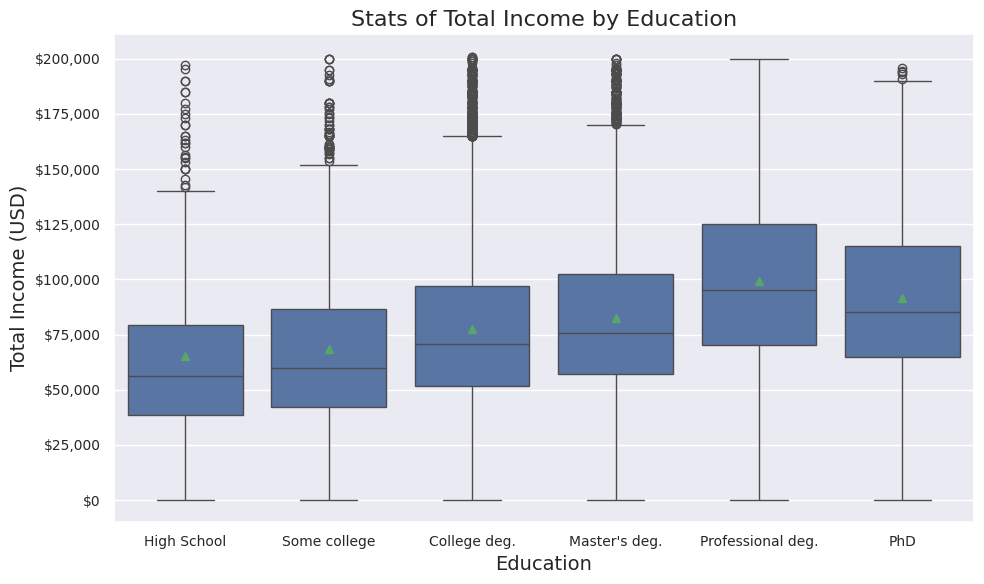

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='education', y='total_income_USD', showmeans=True)
plt.title('Stats of Total Income by Education')
plt.xlabel('Education')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan tingkat pendidikan dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau. Berdasarkan visualisasi tersebut, tingkat pendidikan 'Professional degree' memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Pada box plot tingkat pendidikan 'High School', 'Some college', 'College degree', 'Master's degree', dan 'PhD', terdapat beberapa outlier di bagian atas, sehingga perlu untuk dibersihkan.

### Pembersihan Outlier pada Pendapatan Berdasarkan Pendidikan

In [ ]:
outliers = pd.DataFrame()
for education in education_order:
    lower_bound, upper_bound = calculate_bounds(df_copy[df_copy['education'] == education]['total_income_USD'])
    age_group_outliers = df_copy[(df_copy['education'] == education) &
                                 ((df_copy['total_income_USD'] < lower_bound) |
                                  (df_copy['total_income_USD'] > upper_bound))]
    outliers = pd.concat([outliers, age_group_outliers])

df_copy = df_copy[~df_copy.index.isin(outliers.index)]

Kode program tersebut bertujuan untuk mengidentifikasi dan menghapus outlier dari DataFrame `df_copy` berdasarkan kategori pendidikan (`education`) dan nilai pendapatan (`total_income_USD`). Berikut adalah penjelasan setiap baris kode.

1. **Inisialisasi DataFrame untuk Outlier**: Membuat DataFrame kosong `outliers` untuk menyimpan outlier yang akan dihapus dari DataFrame utama.

2. **Loop untuk Setiap Kategori Pendidikan**: Melakukan iterasi untuk setiap kategori pendidikan yang telah diurutkan sebelumnya.

3. **Perhitungan Batas Bawah dan Batas Atas**: Menggunakan fungsi `calculate_bounds` untuk menghitung batas bawah dan batas atas berdasarkan nilai kuartil dari kolom `total_income_USD` untuk setiap kategori pendidikan.

4. **Pemilihan Outlier**: Memilih baris-baris di DataFrame `df_copy` yang termasuk dalam kategori pendidikan tertentu dan memiliki nilai pendapatan di luar rentang batas bawah dan batas atas yang telah dihitung sebelumnya.

5. **Penggabungan Outlier**: Menggabungkan baris-baris outlier yang telah terpilih ke dalam DataFrame `outliers`.

6. **Pembersihan DataFrame Utama**: Menghapus baris-baris yang merupakan outlier dari DataFrame utama (`df_copy`) dengan menggunakan metode boolean indexing (`~df_copy.index.isin(outliers.index)`), sehingga hanya baris-baris yang tidak termasuk outlier yang tetap dipertahankan.

Setelah eksekusi kode di atas, DataFrame `df_copy` akan berisi data yang telah dibersihkan dari outlier berdasarkan kategori pendidikan dan nilai pendapatan.

### Statistik dan Distribusi Pendapatan Berdasarkan Pendidikan

In [ ]:
stats_by_education = df_copy.groupby('education')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()
stats_by_education.columns = ['education', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']

Kode program ini bertujuan untuk menghitung statistik deskriptif dari pendapatan total berdasarkan tingkat pendidikan (education) dalam dataset. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_education = df_copy.groupby('education')['total_income_USD'].agg(['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),'min', 'max', lambda x: x.max() - x.min()]).reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'education' menggunakan metode `groupby()`.
   - Menghitung beberapa statistik deskriptif dari pendapatan total ('total_income_USD') untuk setiap tingkat pendidikan, seperti rata-rata ('mean'), median ('median'), standar deviasi ('std'), kuartil pertama ('q1'), kuartil ketiga ('q3'), nilai minimum ('min'), nilai maksimum ('max'), dan jangkauan ('range').
   - Fungsi `agg()` digunakan untuk mengaplikasikan fungsi-fungsi statistik tersebut.
   - Hasilnya disimpan dalam variabel `stats_by_education`.

2. `.reset_index()`: Baris ini mereset indeks dari DataFrame `stats_by_education` untuk mengembalikan hasil operasi `groupby` ke format DataFrame biasa.

3. `stats_by_education.columns = ['education', 'mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range']`: Baris ini mengubah nama kolom-kolom DataFrame `stats_by_education` menjadi lebih deskriptif. Kolom pertama, yang sebelumnya mungkin bernama lambda_0, diubah menjadi 'education'. Kolom-kolom lainnya tetap menggunakan nama yang sama dengan hasil perhitungan statistik yang sesuai ('mean', 'median', 'std', 'q1', 'q3', 'min', 'max', 'range').

Dengan demikian, setelah eksekusi kode ini, `stats_by_education` akan berisi statistik deskriptif dari pendapatan total untuk setiap tingkat pendidikan dalam dataset.

In [ ]:
stats_by_education = stats_by_education.sort_values(by='mean', ascending=False)
stats_by_education['rank_income_mean'] = stats_by_education['mean'].rank(ascending=False).astype(int)
stats_by_education

education          mean   median           std        q1  \
4  Professional degree  99389.097768  95000.0  37555.912606  70200.00   
5                  PhD  90932.243151  85200.0  34420.718300  64884.25   
3      Master's degree  80457.165329  75000.0  32134.139272  56208.00   
2       College degree  75268.892026  70000.0  31884.641144  51000.00   
1         Some college  65273.960391  59200.0  31218.104240  41600.00   
0          High School  60017.117757  54080.0  29356.493100  38330.00   

         q3  min     max   range  rank_income_mean  
4  125000.0   78  200000  199922                 1  
5  114000.0    0  190000  190000                 2  
3  100000.0    0  170000  170000                 3  
2   95000.0    0  164800  164800                 4  
1   82500.0    0  152000  152000                 5  
0   74120.0    0  140000  140000                 6

Kode program ini bertujuan untuk mengurutkan DataFrame `stats_by_education` berdasarkan rata-rata pendapatan (`mean`) secara menurun, dan kemudian menambahkan kolom baru yang berisi peringkat rata-rata pendapatan tersebut berdasarkan tingkat pendidikan. Berikut adalah penjelasan setiap baris kode.

1. `stats_by_education = stats_by_education.sort_values(by='mean', ascending=False)`: Baris ini mengurutkan DataFrame `stats_by_education` berdasarkan nilai rata-rata pendapatan (`mean`) secara menurun (descending). Ini dilakukan dengan menggunakan metode `sort_values()`, dengan parameter `by='mean'` untuk menunjukkan bahwa pengurutan dilakukan berdasarkan kolom 'mean', dan `ascending=False` untuk menandakan pengurutan secara menurun.

2. `stats_by_education['rank_income_mean'] = stats_by_education['mean'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank_income_mean' ke DataFrame `stats_by_education`. Kolom ini berisi peringkat rata-rata pendapatan (`mean`) untuk setiap tingkat pendidikan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

Dengan demikian, setelah eksekusi kode ini, DataFrame `stats_by_education` akan berisi statistik deskriptif dari pendapatan total untuk setiap tingkat pendidikan dalam dataset, yang sudah diurutkan berdasarkan rata-rata pendapatannya dan memiliki kolom tambahan berisi peringkat rata-rata pendapatan.

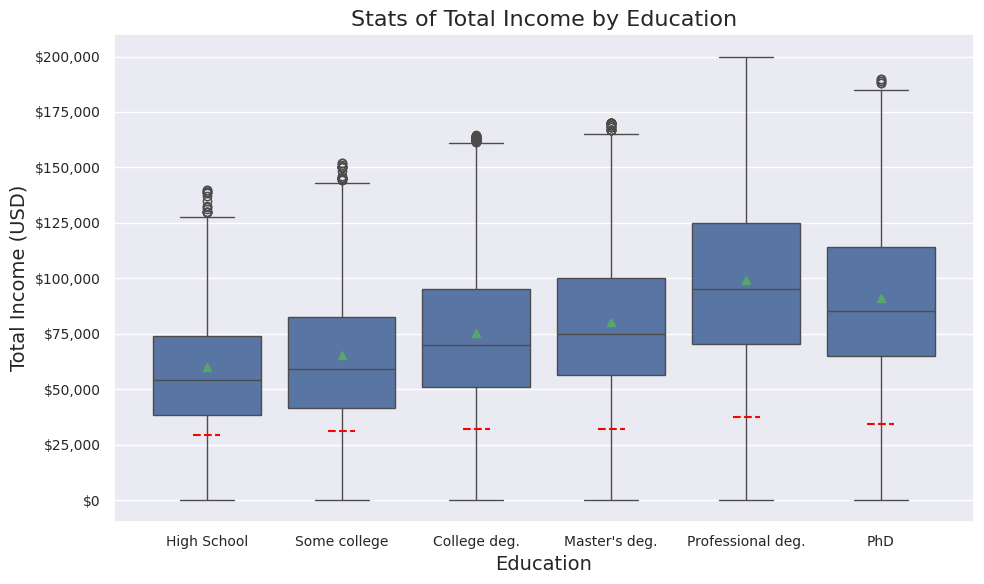

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='education', y='total_income_USD', showmeans=True)
for _, row in stats_by_education.iterrows():
    plt.hlines(row['std'], row.name - 0.1, row.name + 0.1, color='red', linestyle='--', label='Std Deviation')
plt.title('Stats of Total Income by Education')
plt.xlabel('Education')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini memvisualisasikan distribusi total pendapatan berdasarkan tingkat pendidikan dengan box plot, yang menampilkan mean yang diwakili simbol segitiga hijau, serta standar deviasi yang diwakili garis putus-putus berwarna merah. Berdasarkan visualisasi tersebut, tingkat pendidikan 'Professional degree' memiliki sebaran data yang cukup besar, yang digambarkan dengan ukuran box yang cukup besar. Setelah dilakukan pembersihan outlier, outlier pada box plot tingkat pendidikan 'High School', 'Some college', 'College degree', 'Master's degree', dan 'PhD' menjadi berkurang, sehingga mengoptimalkan analisis yang akan dilakukan.

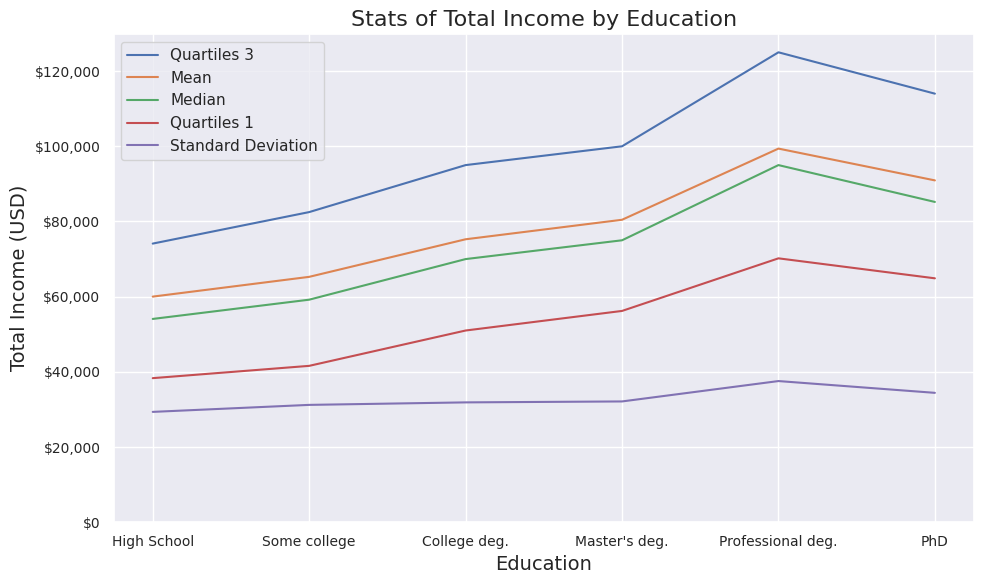

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=stats_by_education, x='education', y='q3', label='Quartiles 3')
sns.lineplot(data=stats_by_education, x='education', y='mean', label='Mean')
sns.lineplot(data=stats_by_education, x='education', y='median', label='Median')
sns.lineplot(data=stats_by_education, x='education', y='q1', label='Quartiles 1')
sns.lineplot(data=stats_by_education, x='education', y='std', label='Standard Deviation')
plt.title('Stats of Total Income by Education')
plt.xlabel('Education')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, nilai statistik pendapatan cenderung meningkat dari tingkat pendidikan 'High School' hingga 'Professional degree'.

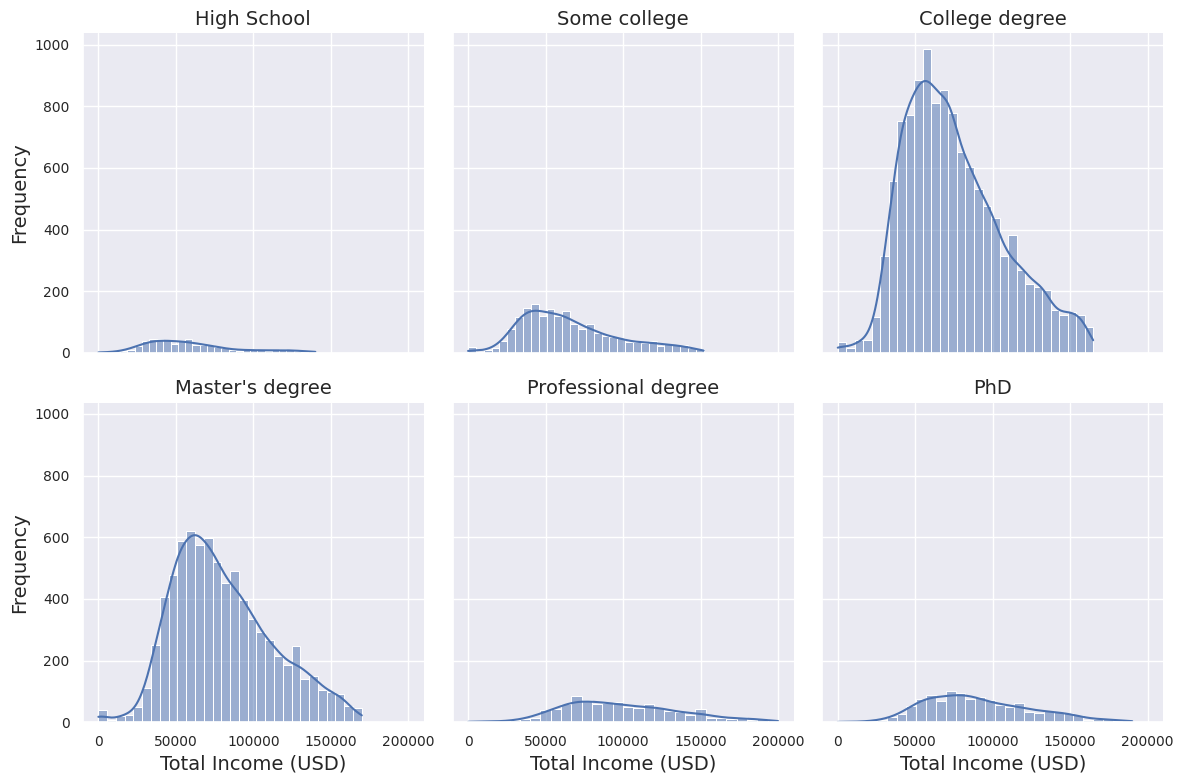

In [ ]:
g = sns.FacetGrid(df_copy, col="education", col_wrap=3, height=4)
g.map(sns.histplot, "total_income_USD", kde=True, bins=30)
g.set_titles("{col_name}")
g.set_axis_labels("Total Income (USD)", "Frequency")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, setiap tingkat pendidikan memiliki sebaran data yang miring ke kiri. Tingkat pendidikan 'College degree' memiliki frekuensi tertinggi dibandingkan tingkat pendidikan lainnya.

### Pengujian Hipotesis Menggunakan ANOVA untuk Menentukan Apakah Terdapat Perbedaan Pendapatan Rata-Rata yang Signifikan antara Berbagai Tingkat Pendidikan

In [ ]:
# Ambil data pendapatan untuk setiap tingkat pendidikan
high_school_income = df_copy[df_copy['education'] == 'High School']['total_income_USD']
some_college_income = df_copy[df_copy['education'] == 'Some college']['total_income_USD']
college_degree_income = df_copy[df_copy['education'] == 'College degree']['total_income_USD']
master_degree_income = df_copy[df_copy['education'] == "Master's degree"]['total_income_USD']
professional_degree_income = df_copy[df_copy['education'] == 'Professional degree']['total_income_USD']
phd_income = df_copy[df_copy['education'] == 'PhD']['total_income_USD']

# Lakukan uji Levene untuk homogenitas varian
levene_statistic, levene_pvalue = levene(high_school_income, some_college_income, college_degree_income, master_degree_income, professional_degree_income, phd_income)

print("levene statistic:", levene_statistic)
print("levene p-value:", levene_pvalue)

alpha = 0.05

if levene_pvalue > alpha:
    print("Homogenitas varian terpenuhi")
else:
    print("Homogenitas varian tidak terpenuhi")

levene statistic: 16.80283479184268
levene p-value: 1.296351473568667e-16
Homogenitas varian tidak terpenuhi


Kode tersebut bertujuan untuk melakukan analisis uji Levene guna memeriksa homogenitas varian dari kelompok pendapatan untuk setiap tingkat pendidikan. Berikut adalah penjelasan baris kode tersebut.

1. **Variabel high_school_income, some_college_income, ..., phd_income**: Variabel-variabel ini menampung data pendapatan untuk masing-masing kelompok tingkat pendidikan. Data ini diambil dari DataFrame df_copy dengan memfilter berdasarkan nilai 'education' yang sesuai dengan tingkat pendidikan tertentu.

2. **levene_statistic, levene_pvalue**: Variabel ini menyimpan statistik uji Levene dan p-value-nya yang dihasilkan dari pengujian homogenitas varian menggunakan fungsi `levene()`.

3. **Print statements**: Menampilkan nilai statistik uji Levene (levene_statistic) dan p-value-nya (levene_pvalue).

4. **If-else statement**: Memeriksa apakah p-value dari uji Levene lebih besar dari alpha yang ditentukan. Jika lebih besar, maka homogenitas varian terpenuhi. Jika tidak, homogenitas varian tidak terpenuhi.

Output tersebut menunjukkan bahwa hasil uji Levene menunjukkan nilai statistik sebesar 16.80283479184268 dan p-value sebesar 1.296351473568667e-16. Nilai statistik uji Levene mengukur perbedaan varians antara kelompok sampel. Karena p-value sangat kecil (signifikan secara statistik), kita menyimpulkan bahwa homogenitas varians tidak terpenuhi antara tingkat pendidikan. Karena homogenitas varians tidak terpenuhi maka kita menggunakan Welch's ANOVA, karena lebih tahan terhadap pelanggaran asumsi homogenitas varians daripada ANOVA klasik.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara tingkat pendidikan.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan tingkat pendidikan.

anova_result = welch_anova(data=df_copy, dv='total_income_USD', between='education')

print("F-statistic:", anova_result['F'].iloc[0])
print("p-value:", anova_result['p-unc'].iloc[0])

if anova_result['p-unc'].iloc[0] < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan tingkat pendidikan.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara tingkat pendidikan.")

F-statistic: 217.90110114396975
p-value: 3.097297197396932e-197
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan tingkat pendidikan.


Kode tersebut bertujuan untuk melakukan analisis uji ANOVA (Analysis of Variance) guna memeriksa perbedaan yang signifikan dalam pendapatan rata-rata di antara tingkat pendidikan. Berikut adalah penjelasan baris kode tersebut.

1. **anova_result**: Variabel ini menyimpan hasil uji ANOVA yang dilakukan menggunakan fungsi `welch_anova()` dari paket statistik. Uji dilakukan pada DataFrame `df_copy`, dengan variabel dependen (DV) adalah 'total_income_USD' (pendapatan total dalam USD) dan variabel independen (between) adalah 'education' (tingkat pendidikan).

2. **Print statements**: Menampilkan nilai F-statistik dan p-value dari hasil uji ANOVA.

3. **If-else statement**: Memeriksa apakah p-value hasil uji ANOVA lebih kecil dari nilai alpha yang ditentukan. Jika lebih kecil, maka menolak hipotesis nol dan menyatakan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan tingkat pendidikan. Jika tidak, gagal menolak hipotesis nol, yang berarti tidak terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara tingkat pendidikan.

Output menunjukkan bahwa nilai statistik F dari ANOVA adalah 217.90110114396975 dan p-value adalah 3.097297197396932e-197. Nilai statistik F yang dihasilkan mengukur perbedaan varians antara tingkat pendidikan. Semakin besar nilainya, semakin signifikan perbedaan antara kelompok. Dengan p-value yang sangat kecil, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata di antara setidaknya satu pasangan tingkat pendidikan terpopuler.

### Pengujian Hipotesis Menggunakan Korelasi Pearson untuk Menentukan Apakah Terdapat Hubungan antara Pendapatan dan Pendidikan

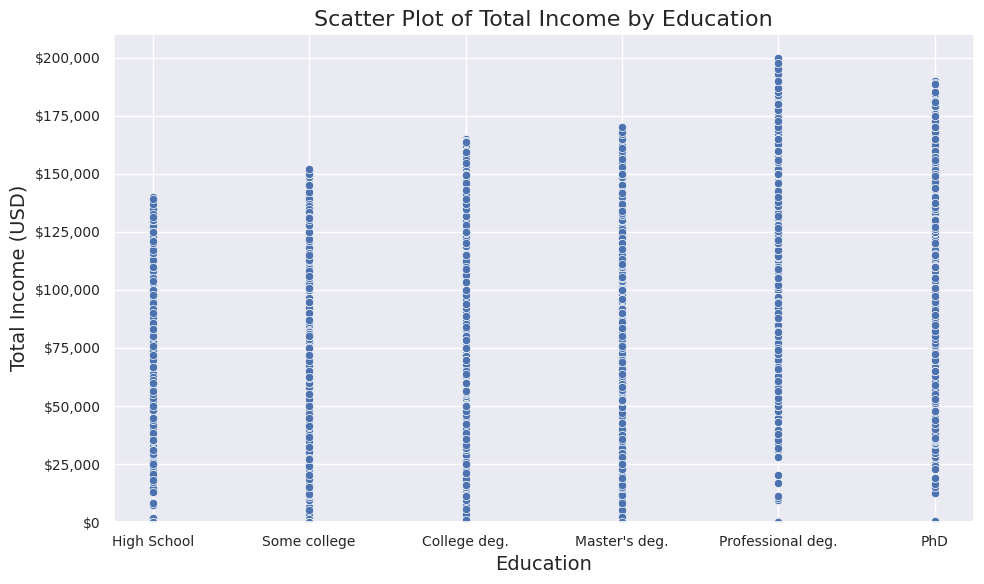

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education', y='total_income_USD', data=df_copy)
plt.title('Scatter Plot of Total Income by Education')
plt.xlabel('Education')
plt.ylabel('Total Income (USD)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, korelasi antara pendapatan dan tingkat pendidikan sedikit terlihat dari nilai maksimum yang cenderung meningkat pada setiap tingkat pendidikan, dari 'High School' hingga 'Professional degree'.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat korelasi yang signifikan antara pendapatan dan pendidikan.
# Hipotesis alternatif (H1): Terdapat korelasi yang signifikan antara pendapatan dan pendidikan.

pearson_corr, pearson_p_value = pearsonr(df_copy['education_encoded'], df_copy['total_income_USD'])

print("Korelasi Pearson antara pendidikan dan pendapatan:", pearson_corr)
print("p-value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pendapatan dan pendidikan.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara pendapatan dan pendidikan.")

Korelasi Pearson antara pendidikan dan pendapatan: 0.21242684154962116
p-value: 5.425893238572653e-245
Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pendapatan dan pendidikan.


Kode tersebut bertujuan untuk menguji apakah ada korelasi yang signifikan antara pendapatan dan tingkat pendidikan. Berikut adalah penjelasan setiap baris kode.

1. **Menghitung Korelasi Pearson**: Menggunakan fungsi `pearsonr()` untuk menghitung nilai korelasi Pearson antara variabel pendidikan (diencode sebagai variabel numerik) dan pendapatan (`total_income_USD`) dari DataFrame `df_copy`. Korelasi Pearson menghasilkan dua nilai: nilai korelasi itu sendiri (`pearson_corr`) dan nilai p-value (`pearson_p_value`).

2. **Menampilkan Output**: Mencetak nilai korelasi Pearson antara pendidikan dan pendapatan, serta nilai p-value yang dihasilkan dari pengujian.

3. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika nilai p-value kurang dari alpha, maka hipotesis nol ditolak, dan disimpulkan bahwa terdapat korelasi yang signifikan antara pendapatan dan tingkat pendidikan. Jika nilai p-value lebih besar dari alpha, maka gagal menolak hipotesis nol, dan disimpulkan bahwa tidak terdapat korelasi yang signifikan antara kedua variabel tersebut.

Output tersebut menjelaskan hasil dari pengujian korelasi antara pendidikan dan pendapatan menggunakan korelasi Pearson. Nilai korelasi Pearson yang dihasilkan adalah 0.21242684154962116. Ini menunjukkan bahwa terdapat hubungan positif yang lemah antara tingkat pendidikan dan pendapatan. Nilai tersebut berada dalam rentang 0 hingga 1, di mana semakin dekat ke 1 menunjukkan korelasi positif yang lebih kuat. Nilai p-nilai (p-value) yang dihasilkan adalah 5.425893238572653e-245. Hal ini menunjukkan bahwa terdapat korelasi yang signifikan antara pendidikan dan pendapatan. Karena nilai p-value sangat kecil (kurang dari alpha), maka hipotesis nol ditolak. Oleh karena itu, disimpulkan bahwa terdapat korelasi yang signifikan antara pendapatan dan pendidikan. Dengan kata lain, tingkat pendidikan memiliki pengaruh yang signifikan terhadap pendapatan.

## Analisis Bivariat antara Pengalaman Kerja dan Usia

### Rata-Rata Pengalaman Kerja berdasarkan Usia

In [ ]:
mean_work_experience_field_by_age_range = df_copy.groupby('age_range')['numerical_work_experience_field'].mean().reset_index()
mean_work_experience_field_by_age_range = mean_work_experience_field_by_age_range.sort_values(by='age_range')
mean_work_experience_field_by_age_range = mean_work_experience_field_by_age_range.sort_values(by='numerical_work_experience_field', ascending=False)
mean_work_experience_field_by_age_range['rank'] = mean_work_experience_field_by_age_range['numerical_work_experience_field'].rank(ascending=False).astype(int)
mean_work_experience_field_by_age_range = mean_work_experience_field_by_age_range.rename(columns={'numerical_work_experience_field': 'mean_work_experience_field'})
mean_work_experience_field_by_age_range

age_range  mean_work_experience_field  rank
6  65 or over                   26.682927     1
5       55-64                   22.350888     2
4       45-54                   16.536181     3
3       35-44                   11.064189     4
0    under 18                    6.333333     5
2       25-34                    5.671500     6
1       18-24                    2.249540     7

Kode program ini bertujuan untuk menghitung rata-rata pengalaman kerja dalam bidang tertentu berdasarkan rentang usia (age_range). Berikut adalah penjelasan setiap baris kode.

1. `mean_work_experience_field_by_age_range = df_copy.groupby('age_range')['numerical_work_experience_field'].mean().reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'age_range' menggunakan metode `groupby()`.
   - Menghitung rata-rata pengalaman kerja dalam bidang tertentu ('numerical_work_experience_field') untuk setiap rentang usia.
   - Fungsi `mean()` digunakan untuk menghitung rata-rata.
   - Hasilnya disimpan dalam variabel `mean_work_experience_field_by_age_range`.

2. `mean_work_experience_field_by_age_range = mean_work_experience_field_by_age_range.sort_values(by='age_range')`: Baris ini mengurutkan DataFrame `mean_work_experience_field_by_age_range` berdasarkan nilai 'age_range' secara ascending (default).

3. `mean_work_experience_field_by_age_range = mean_work_experience_field_by_age_range.sort_values(by='numerical_work_experience_field', ascending=False)`: Baris ini mengurutkan DataFrame `mean_work_experience_field_by_age_range` kembali, kali ini berdasarkan nilai 'numerical_work_experience_field' secara menurun (descending).

4. `mean_work_experience_field_by_age_range['rank'] = mean_work_experience_field_by_age_range['numerical_work_experience_field'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_work_experience_field_by_age_range`. Kolom ini berisi peringkat rata-rata pengalaman kerja dalam bidang tertentu untuk setiap rentang usia. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_work_experience_field_by_age_range = mean_work_experience_field_by_age_range.rename(columns={'numerical_work_experience_field': 'mean_work_experience_field'})`: Baris ini mengubah nama kolom 'numerical_work_experience_field' menjadi 'mean_work_experience_field' untuk lebih deskriptif.

Dengan demikian, setelah eksekusi kode ini, `mean_work_experience_field_by_age_range` akan berisi rata-rata pengalaman kerja dalam bidang tertentu berdasarkan rentang usia, yang sudah diurutkan berdasarkan rata-rata pengalamannya dan memiliki kolom tambahan berisi peringkat rata-rata pengalaman kerja.

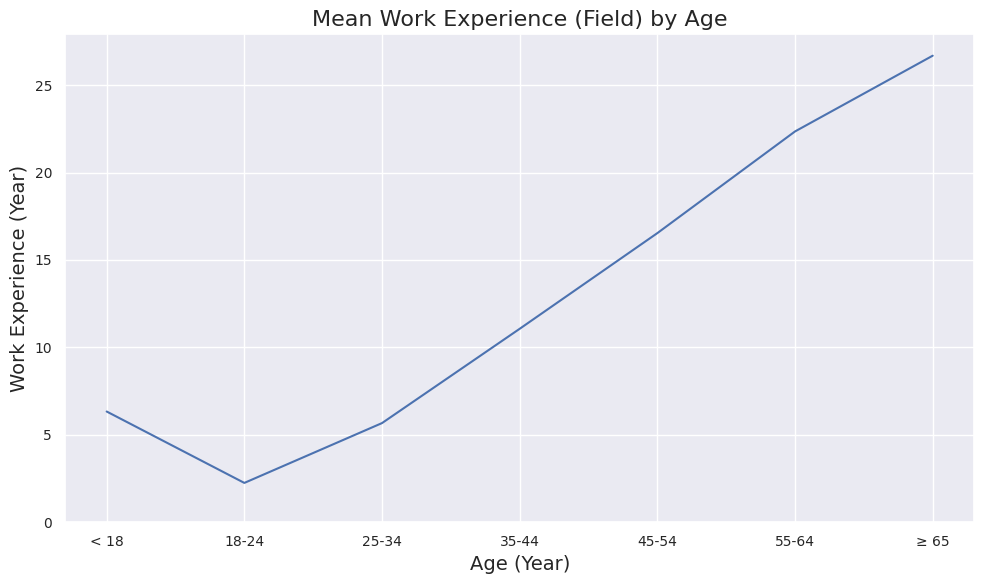

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_range', y='mean_work_experience_field', data=mean_work_experience_field_by_age_range)
plt.title('Mean Work Experience (Field) by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Work Experience (Year)')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, nilai mean pengalaman kerja cenderung meningkat dari rentang usia 18-24 tahun hingga lebih dari 65 tahun.

### Distribusi Pengalaman Kerja Berdasarkan Usia

In [ ]:
pivot_table_age_range_work_experience_field = df_copy.pivot_table(index='age_range', columns='work_experience_field', aggfunc='size', fill_value=0)
pivot_table_age_range_work_experience_field

work_experience_field  1 year or less  2-4 years  5-7 years  8-10 years  \
age_range                                                                 
under 18                            2          5          0           0   
18-24                             439        588         54           2   
25-34                             657       3908       3974        2071   
35-44                             166        858       1503        1887   
45-54                              27        185        251         300   
55-64                               6         42         54          46   
65 or over                          0          1          5           7   

work_experience_field  11-20 years  21-30 years  31-40 years  41 years or more  
age_range                                                                       
under 18                         1            1            0                 0  
18-24                            0            0            1                 2  
25-34                          555            3            3                 1  
35-44                         3638          270            1                 4  
45-54                          994          865           59                 0  
55-64                          207          265          213                12  
65 or over                      12           20           22                15

Kode program ini bertujuan untuk membuat tabel pivot yang menunjukkan jumlah individu berdasarkan rentang usia (age_range) dan pengalaman kerja dalam bidang tertentu (work_experience_field). Berikut adalah penjelasan setiap baris kode.

1. `pivot_table_age_range_work_experience_field = df_copy.pivot_table(index='age_range', columns='work_experience_field', aggfunc='size', fill_value=0)`: Baris ini membuat tabel pivot dari DataFrame `df_copy` dengan rentang usia sebagai indeks (index) dan pengalaman kerja dalam bidang tertentu sebagai kolom (columns).
   - `index='age_range'` mengindikasikan bahwa rentang usia akan digunakan sebagai indeks baris.
   - `columns='work_experience_field'` mengindikasikan bahwa pengalaman kerja dalam bidang tertentu akan digunakan sebagai kolom.
   - `aggfunc='size'` menunjukkan bahwa fungsi agregasi yang digunakan adalah jumlah (count) untuk menghitung berapa banyak individu yang memiliki kombinasi tertentu dari rentang usia dan pengalaman kerja dalam bidang tertentu.
   - `fill_value=0` menetapkan nilai nol untuk sel-sel yang kosong dalam tabel pivot jika tidak ada data yang sesuai.
   - Hasilnya disimpan dalam variabel `pivot_table_age_range_work_experience_field`.

2. `pivot_table_age_range_work_experience_field`: Baris ini hanya mengeluarkan tabel pivot yang sudah dibuat.

Dengan demikian, setelah eksekusi kode ini, `pivot_table_age_range_work_experience_field` akan berisi tabel pivot yang menunjukkan jumlah individu berdasarkan kombinasi rentang usia dan pengalaman kerja dalam bidang tertentu.

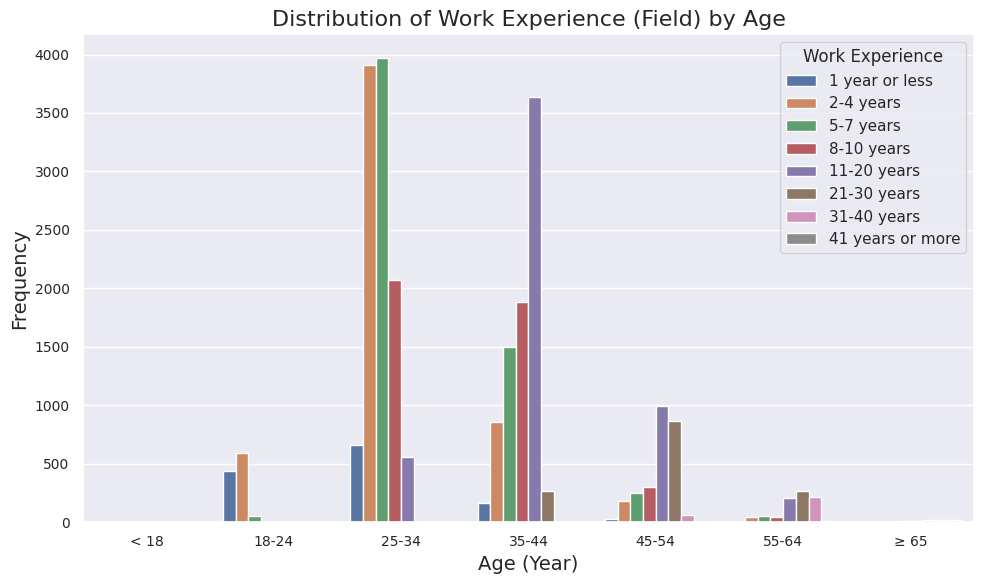

In [ ]:
work_experience_field_by_age_range = df_copy.groupby(['age_range', 'work_experience_field']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=work_experience_field_by_age_range, x='age_range', y='count', hue='work_experience_field')
plt.title('Distribution of Work Experience (Field) by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.legend(title='Work Experience')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, rentang usia 25-34 tahun dan 35-44 tahun memiliki frekuensi tertinggi dibandingkan rentang usia lainnya berdasarkan pengalaman kerja.

### Pengujian Hipotesis Menggunakan Chi-square untuk Menentukan Apakah Distribusi Frekuensi di Berbagai Kategori Pengalaman Kerja Berbeda Secara Signifikan berdasarkan Kategori Usia

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia.

# Membuat tabel kontingensi
contingency_table_age_work = pd.crosstab(df_copy['age_range'], df_copy['work_experience_field'])

# Melakukan uji Chi-square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_age_work)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia.")

Chi-square statistic: 22050.830017840377
p-value: 0.0
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia.


Kode di atas bertujuan untuk melakukan uji Chi-square untuk memeriksa apakah terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia. Berikut adalah penjelasan baris kode tersebut.

1. **contingency_table_age_work**: Tabel kontingensi dibuat menggunakan fungsi `pd.crosstab()` untuk menghitung frekuensi pengalaman kerja (work_experience_field) berdasarkan kategori usia (age_range).

2. **chi2_stat, p_value, dof, expected**: Variabel ini menyimpan hasil uji Chi-square yang dilakukan menggunakan fungsi `chi2_contingency()` dari paket statistik. Variabel `chi2_stat` menyimpan nilai statistik Chi-square, `p_value` menyimpan p-value, `dof` menyimpan derajat kebebasan, dan `expected` menyimpan nilai yang diharapkan.

3. **Print statements**: Menampilkan nilai statistik Chi-square dan p-value.

4. **If-else statement**: Memeriksa apakah p-value hasil uji Chi-square kurang dari nilai alpha yang ditentukan. Jika kurang, maka menolak hipotesis nol dan menyatakan bahwa terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia. Jika tidak, gagal menolak hipotesis nol, yang berarti tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi.

Output tersebut menunjukkan bahwa hasil uji Chi-square menunjukkan Nilai Chi-square statistic sebesar 22050.830017840377 dan p-value sebesar 0. Dikarenakan p-value kurang dari alpha, maka hipotesis nol ditolak. Oleh karena itu, kesimpulan yang dapat ditarik adalah "Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan kategori usia." Hal ini menunjukkan bahwa terdapat hubungan yang signifikan antara usia dan pengalaman kerja dalam dataset.

### Pengujian Hipotesis Menggunakan Korelasi Pearson untuk Menentukan Apakah Terdapat Hubungan antara Pengalaman Kerja dan Usia

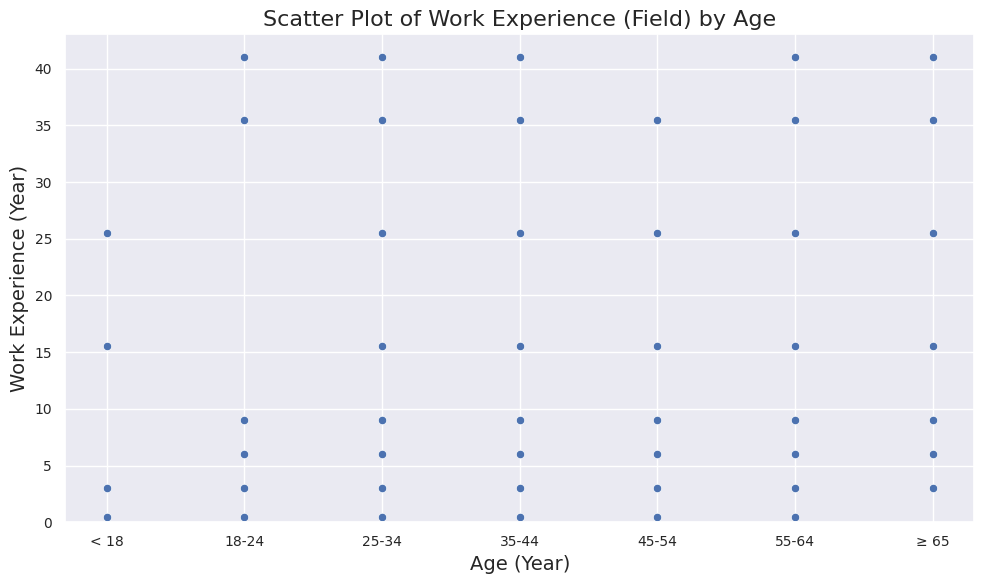

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_range', y='numerical_work_experience_field', data=df_copy)
plt.title('Scatter Plot of Work Experience (Field) by Age')
plt.xlabel('Age (Year)')
plt.ylabel('Work Experience (Year)')
plt.xticks(ticks=plt.xticks()[0], labels=['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '≥ 65'])
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, korelasi antara pengalaman kerja dan usia tidak terlalu terlihat. Plot tersebut menunjukkkan titk-titik nilai yang acak.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat korelasi yang signifikan antara pengalaman kerja dan usia.
# Hipotesis alternatif (H1): Terdapat korelasi yang signifikan antara pengalaman kerja dan usia.

pearson_corr, pearson_p_value = pearsonr(df_copy['numerical_age_range'], df_copy['numerical_work_experience_field'])

print("Korelasi Pearson antara usia dan pengalaman kerja:", pearson_corr)
print("p-value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pengalaman kerja dan usia.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara pengalaman kerja dan usia.")

Korelasi Pearson antara usia dan pengalaman kerja: 0.664596451389947
p-value: 0.0
Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pengalaman kerja dan usia.


Kode ini bertujuan untuk menguji apakah terdapat korelasi yang signifikan antara pengalaman kerja dan usia. Korelasi Pearson digunakan untuk mengukur kekuatan dan arah hubungan antara kedua variabel tersebut. Berikut adalah penjelasan setiap baris kode.

1. **Menghitung Korelasi Pearson**: Menggunakan fungsi `pearsonr()` untuk menghitung nilai korelasi Pearson antara usia (`numerical_age_range`) dan pengalaman kerja (`numerical_work_experience_field`) dari DataFrame `df_copy`. Korelasi Pearson menghasilkan dua nilai: nilai korelasi itu sendiri (`pearson_corr`) dan nilai p-value (`pearson_p_value`).

2. **Menampilkan Output**: Mencetak nilai korelasi Pearson antara usia dan pengalaman kerja, serta nilai p-value yang dihasilkan dari pengujian.

3. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika nilai p-value kurang dari alpha, maka hipotesis nol ditolak, dan disimpulkan bahwa terdapat korelasi yang signifikan antara pengalaman kerja dan usia. Jika nilai p-value lebih besar dari alpha, maka gagal menolak hipotesis nol, dan disimpulkan bahwa tidak terdapat korelasi yang signifikan antara kedua variabel tersebut.

Output tersebut menyajikan hasil dari pengujian korelasi antara usia dan pengalaman kerja menggunakan metode korelasi Pearson. Nilai korelasi Pearson antara usia dan pengalaman kerja adalah 0.664596451389947. Nilai korelasi yang cukup tinggi (positif) menunjukkan bahwa terdapat hubungan positif yang kuat antara usia dan pengalaman kerja. Artinya, semakin tua usia seseorang, cenderung memiliki pengalaman kerja yang lebih banyak. Nilai p-value yang diperoleh adalah 0.0, yang menunjukkan bahwa kemungkinan mendapatkan korelasi secara kebetulan sangat rendah. Karena nilai p-value lebih kecil dari tingkat signifikansi yang telah ditetapkan (0.05), hipotesis nol ditolak. Oleh karena itu, disimpulkan bahwa terdapat korelasi yang signifikan antara pengalaman kerja dan usia. Dengan kata lain, usia seseorang berhubungan secara signifikan dengan pengalaman kerjanya.

## Analisis Bivariat antara Pengalaman Kerja dan Pendidikan

### Rata-Rata Pengalaman Kerja berdasarkan Tingkat Pendidikan

In [ ]:
mean_work_experience_field_by_education = df_copy.groupby('education')['numerical_work_experience_field'].mean().reset_index()
mean_work_experience_field_by_education = mean_work_experience_field_by_education.sort_values(by='education')
mean_work_experience_field_by_education = mean_work_experience_field_by_education.sort_values(by='numerical_work_experience_field', ascending=False)
mean_work_experience_field_by_education['rank'] = mean_work_experience_field_by_education['numerical_work_experience_field'].rank(ascending=False).astype(int)
mean_work_experience_field_by_education = mean_work_experience_field_by_education.rename(columns={'numerical_work_experience_field': 'mean_work_experience_field'})
mean_work_experience_field_by_education

education  mean_work_experience_field  rank
1         Some college                   10.767499     1
0          High School                   10.466355     2
3      Master's degree                    9.666667     3
5                  PhD                    9.608733     4
4  Professional degree                    9.450053     5
2       College degree                    8.593139     6

Kode program ini bertujuan untuk menghitung rata-rata pengalaman kerja dalam bidang tertentu berdasarkan tingkat pendidikan (education). Berikut adalah penjelasan setiap baris kode.

1. `mean_work_experience_field_by_education = df_copy.groupby('education')['numerical_work_experience_field'].mean().reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'education' menggunakan metode `groupby()`.
   - Menghitung rata-rata pengalaman kerja dalam bidang tertentu ('numerical_work_experience_field') untuk setiap tingkat pendidikan.
   - Fungsi `mean()` digunakan untuk menghitung rata-rata.
   - Hasilnya disimpan dalam variabel `mean_work_experience_field_by_education`.

2. `mean_work_experience_field_by_education = mean_work_experience_field_by_education.sort_values(by='education')`: Baris ini mengurutkan DataFrame `mean_work_experience_field_by_education` berdasarkan nilai 'education' secara ascending (default).

3. `mean_work_experience_field_by_education = mean_work_experience_field_by_education.sort_values(by='numerical_work_experience_field', ascending=False)`: Baris ini mengurutkan DataFrame `mean_work_experience_field_by_education` kembali, kali ini berdasarkan nilai 'numerical_work_experience_field' secara menurun (descending).

4. `mean_work_experience_field_by_education['rank'] = mean_work_experience_field_by_education['numerical_work_experience_field'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_work_experience_field_by_education`. Kolom ini berisi peringkat rata-rata pengalaman kerja dalam bidang tertentu untuk setiap tingkat pendidikan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_work_experience_field_by_education = mean_work_experience_field_by_education.rename(columns={'numerical_work_experience_field': 'mean_work_experience_field'})`: Baris ini mengubah nama kolom 'numerical_work_experience_field' menjadi 'mean_work_experience_field' untuk lebih deskriptif.

Dengan demikian, setelah eksekusi kode ini, `mean_work_experience_field_by_education` akan berisi rata-rata pengalaman kerja dalam bidang tertentu berdasarkan tingkat pendidikan, yang sudah diurutkan berdasarkan rata-rata pengalamannya dan memiliki kolom tambahan berisi peringkat rata-rata pengalaman kerja.

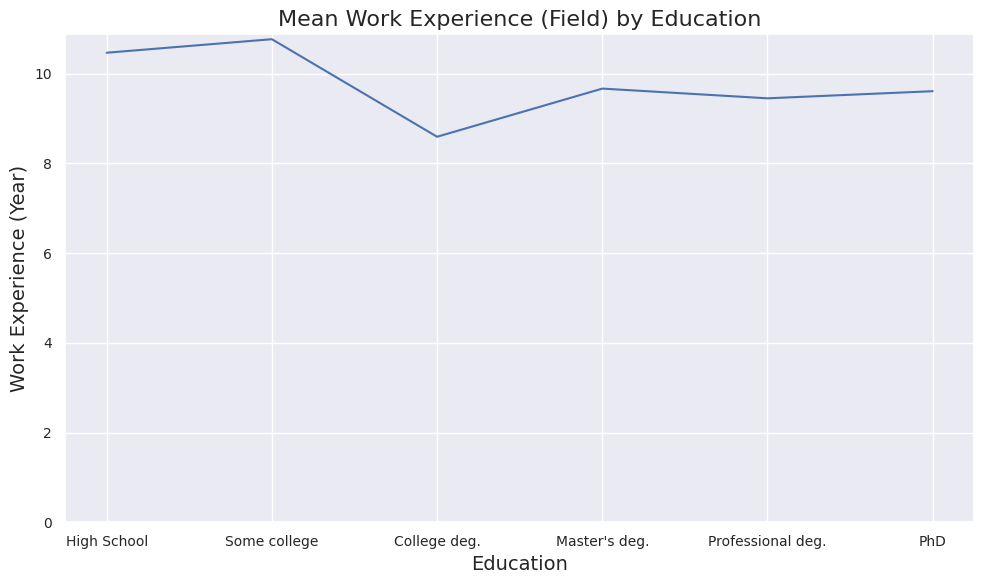

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='education', y='mean_work_experience_field', data=mean_work_experience_field_by_education)
plt.title('Mean Work Experience (Field) by Education')
plt.xlabel('Education')
plt.ylabel('Work Experience (Year)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, nilai mean pengalaman kerja sedikit menurun dari tingkat pendidikan 'Some college' hingga 'College degree', namun secara keseluruhan cenderung stagnan.

### Distribusi Pengalaman Kerja Berdasarkan Tingkat Pendidikan

In [ ]:
pivot_table_education_work_experience_field = df_copy.pivot_table(index='education', columns='work_experience_field', aggfunc='size', fill_value=0)
pivot_table_education_work_experience_field

work_experience_field  1 year or less  2-4 years  5-7 years  8-10 years  \
education                                                                 
High School                        35        119        100          78   
Some college                      137        350        378         283   
College degree                    752       3137       2919        1951   
Master's degree                   282       1548       1933        1566   
Professional degree                44        184        225         207   
PhD                                47        249        286         228   

work_experience_field  11-20 years  21-30 years  31-40 years  41 years or more  
education                                                                       
High School                    140           50           10                 3  
Some college                   444          192           52                 7  
College degree                2360          601          131                13  
Master's degree               1985          447           80                10  
Professional degree            217           53           11                 0  
PhD                            261           81           15                 1

Kode program ini bertujuan untuk membuat tabel pivot yang menunjukkan jumlah individu berdasarkan tingkat pendidikan (education) dan pengalaman kerja dalam bidang tertentu (work_experience_field). Berikut adalah penjelasan setiap baris kode.

1. `pivot_table_education_work_experience_field = df_copy.pivot_table(index='education', columns='work_experience_field', aggfunc='size', fill_value=0)`: Baris ini membuat tabel pivot dari DataFrame `df_copy` dengan tingkat pendidikan sebagai indeks (index) dan pengalaman kerja dalam bidang tertentu sebagai kolom (columns).
   - `index='education'` mengindikasikan bahwa tingkat pendidikan akan digunakan sebagai indeks baris.
   - `columns='work_experience_field'` mengindikasikan bahwa pengalaman kerja dalam bidang tertentu akan digunakan sebagai kolom.
   - `aggfunc='size'` menunjukkan bahwa fungsi agregasi yang digunakan adalah jumlah (count) untuk menghitung berapa banyak individu yang memiliki kombinasi tertentu dari tingkat pendidikan dan pengalaman kerja dalam bidang tertentu.
   - `fill_value=0` menetapkan nilai nol untuk sel-sel yang kosong dalam tabel pivot jika tidak ada data yang sesuai.
   - Hasilnya disimpan dalam variabel `pivot_table_education_work_experience_field`.

2. `pivot_table_education_work_experience_field`: Baris ini hanya mengeluarkan tabel pivot yang sudah dibuat.

Dengan demikian, setelah eksekusi kode ini, `pivot_table_education_work_experience_field` akan berisi tabel pivot yang menunjukkan jumlah individu berdasarkan kombinasi tingkat pendidikan dan pengalaman kerja dalam bidang tertentu.

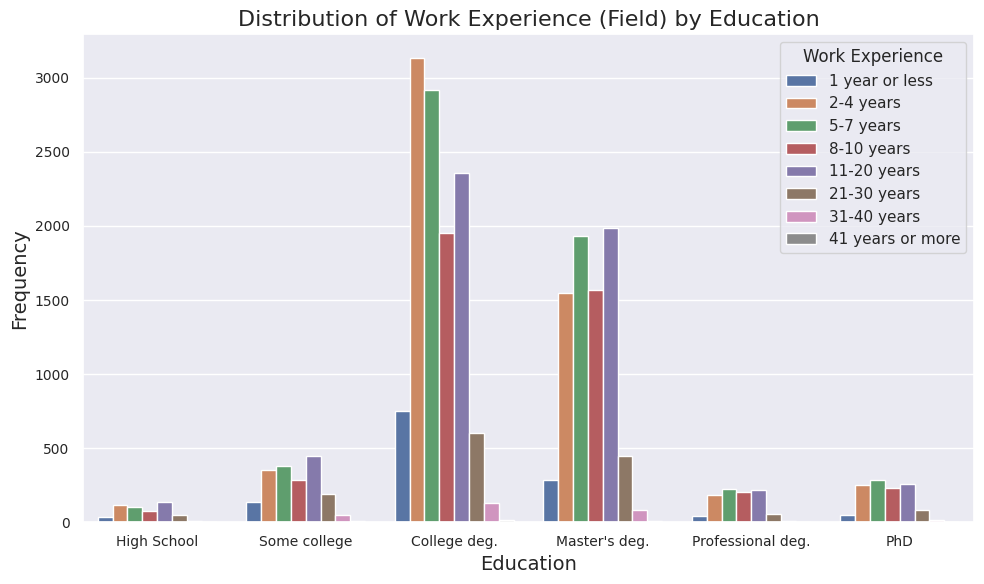

In [ ]:
work_experience_field_by_education = df_copy.groupby(['education', 'work_experience_field']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=work_experience_field_by_education, x='education', y='count', hue='work_experience_field')
plt.title('Distribution of Work Experience (Field) by Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.legend(title='Work Experience')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, tingkat pendidikan 'College degree' memiliki frekuensi tertinggi dibandingkan tingkat pendidikan lainnya berdasarkan pengalaman kerja.

### Pengujian Hipotesis Menggunakan Chi-square untuk Menentukan Apakah Distribusi Frekuensi di Berbagai Kategori Pengalaman Kerja Berbeda Secara Signifikan berdasarkan Tingkat Pendidikan

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan.

# Membuat tabel kontingensi
contingency_table_education_work = pd.crosstab(df_copy['education'], df_copy['work_experience_field'])

# Melakukan uji Chi-square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_education_work)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan.")

Chi-square statistic: 496.9102601214644
p-value: 5.1994852769735076e-83
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan.


Kode tersebut melakukan uji Chi-square untuk memeriksa apakah terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan. Berikut adalah penjelasan baris kode tersebut.

1. **Membuat Tabel Kontingensi**: Tabel kontingensi dibuat dengan menggunakan fungsi `pd.crosstab()` untuk menghitung frekuensi pengalaman kerja berdasarkan tingkat pendidikan dari DataFrame `df_copy`.

2. **Melakukan Uji Chi-square**: Menggunakan fungsi `chi2_contingency()` untuk menghitung nilai statistik Chi-square, p-value, derajat kebebasan (dof), dan nilai yang diharapkan dari tabel kontingensi.

3. **Menampilkan Output**: Mencetak nilai statistik Chi-square dan p-value.

4. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika p-value kurang dari alpha, maka hipotesis nol ditolak dan disimpulkan bahwa terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan. Jika tidak, maka gagal menolak hipotesis nol dan disimpulkan tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi tersebut.

Output tersebut menunjukkan bahwa hasil uji Chi-square menunjukkan Nilai Chi-square statistic sebesar 496.9102601214644 dan p-value sebesar 5.1994852769735076e-83. Dikarenakan p-value kurang dari alpha, maka hipotesis nol ditolak. Oleh karena itu, kesimpulan yang dapat ditarik adalah "Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori pengalaman kerja berdasarkan tingkat pendidikan." Hal ini menunjukkan bahwa terdapat hubungan yang signifikan antara tingkat pendidikan dan pengalaman kerja dalam dataset.

### Pengujian Hipotesis Menggunakan Korelasi Pearson untuk Menentukan Apakah Terdapat Hubungan antara Pengalaman Kerja dan Pendidikan

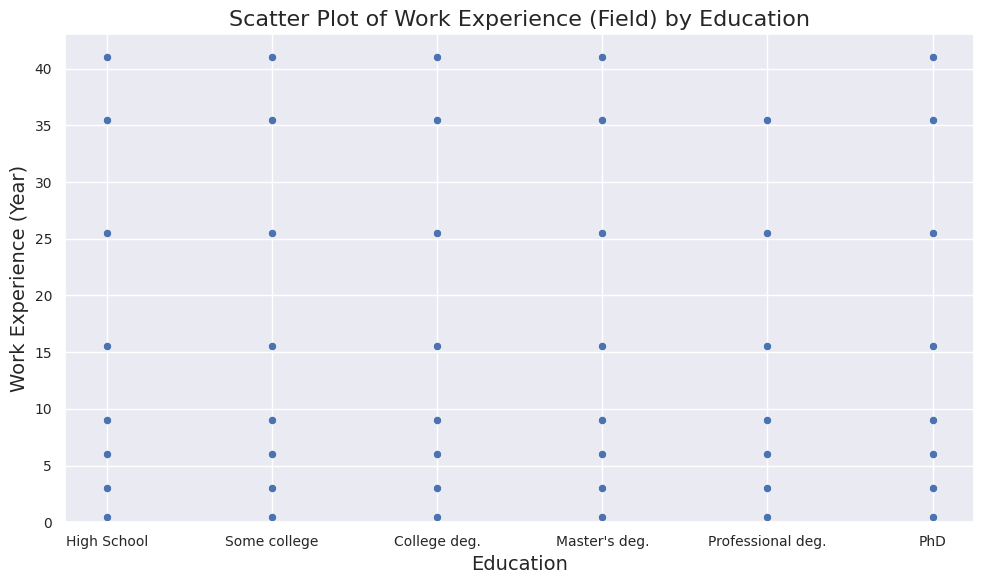

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education', y='numerical_work_experience_field', data=df_copy)
plt.title('Scatter Plot of Work Experience (Field) by Education')
plt.xlabel('Education')
plt.ylabel('Work Experience (Year)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, korelasi antara pengalaman kerja dan tingkat pendidikan tidak terlalu terlihat. Plot tersebut menunjukkkan titk-titik nilai yang acak.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat korelasi yang signifikan antara pengalaman kerja dan pendidikan.
# Hipotesis alternatif (H1): Terdapat korelasi yang signifikan antara pengalaman kerja dan pendidikan.

pearson_corr, pearson_p_value = pearsonr(df_copy['education_encoded'], df_copy['numerical_work_experience_field'])

print("Korelasi Pearson antara pendidikan dan pengalaman kerja:", pearson_corr)
print("p-value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Menolak hipotesis nol: Terdapat korelasi yang signifikan antara pengalaman kerja dan pendidikan.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara pengalaman kerja dan pendidikan.")

Korelasi Pearson antara pendidikan dan pengalaman kerja: 0.004867624147377262
p-value: 0.44891730787629036
Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara pengalaman kerja dan pendidikan.


Kode program tersebut bertujuan untuk menguji apakah terdapat korelasi yang signifikan antara pengalaman kerja dan pendidikan. Berikut adalah penjelasan setiap baris kode.

1. **Perhitungan Korelasi Pearson**: Menggunakan fungsi `pearsonr()` untuk menghitung korelasi antara variabel pendidikan yang diubah menjadi nilai terenkripsi (`education_encoded`) dan variabel pengalaman kerja yang diubah menjadi nilai terenkripsi (`numerical_work_experience_field`). Hasil perhitungan korelasi Pearson disimpan dalam variabel `pearson_corr`, sedangkan nilai p-value disimpan dalam variabel `pearson_p_value`.

2. **Menampilkan Output**: Mencetak nilai korelasi Pearson antara pendidikan dan pengalaman kerja, serta nilai p-value yang dihasilkan dari pengujian.

3. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika nilai p-value kurang dari alpha, maka hipotesis nol ditolak, dan disimpulkan bahwa terdapat korelasi yang signifikan antara pendidikan dan pengalaman kerja. Jika nilai p-value lebih besar dari alpha, maka gagal menolak hipotesis nol, dan disimpulkan bahwa tidak terdapat korelasi yang signifikan antara kedua variabel tersebut.

Output tersebut menyajikan hasil uji korelasi antara variabel pendidikan dan variabel pengalaman kerja menggunakan korelasi Pearson. Nilai korelasi Pearson antara kedua variabel tersebut adalah 0.004867624147377262. Nilai ini menunjukkan bahwa terdapat korelasi yang sangat lemah antara pendidikan dan pengalaman kerja. Nilai p-value yang dihasilkan dari uji korelasi adalah 0.44891730787629036. Nilai p-value yang lebih besar dari alpha (0.05) berarti tidak cukup bukti untuk menolak hipotesis nol. Berdasarkan hasil tersebut, disimpulkan bahwa tidak terdapat korelasi yang signifikan antara pendidikan dan pengalaman kerja.

## Analisis Bivariat antara Usia dan Pendidikan

### Rata-Rata Usia berdasarkan Tingkat Pendidikan

In [ ]:
mean_age_range_by_education = df_copy.groupby('education')['numerical_age_range'].mean().reset_index()
mean_age_range_by_education = mean_age_range_by_education.sort_values(by='education')
mean_age_range_by_education = mean_age_range_by_education.sort_values(by='numerical_age_range', ascending=False)
mean_age_range_by_education['rank'] = mean_age_range_by_education['numerical_age_range'].rank(ascending=False).astype(int)
mean_age_range_by_education = mean_age_range_by_education.rename(columns={'numerical_age_range': 'mean_age_range'})
mean_age_range_by_education

education  mean_age_range  rank
1         Some college       38.692078     1
5                  PhD       38.531678     2
0          High School       37.114953     3
4  Professional degree       36.958555     4
3      Master's degree       36.533817     5
2       College degree       34.720794     6

Kode program ini bertujuan untuk menghitung rata-rata rentang usia (numerical_age_range) berdasarkan tingkat pendidikan (education). Berikut adalah penjelasan setiap baris kode.

1. `mean_age_range_by_education = df_copy.groupby('education')['numerical_age_range'].mean().reset_index()`: Baris ini melakukan beberapa operasi:
   - Mengelompokkan data berdasarkan kolom 'education' menggunakan metode `groupby()`.
   - Menghitung rata-rata rentang usia ('numerical_age_range') untuk setiap tingkat pendidikan.
   - Fungsi `mean()` digunakan untuk menghitung rata-rata.
   - Hasilnya disimpan dalam variabel `mean_age_range_by_education`.

2. `mean_age_range_by_education = mean_age_range_by_education.sort_values(by='education')`: Baris ini mengurutkan DataFrame `mean_age_range_by_education` berdasarkan nilai 'education' secara ascending (default).

3. `mean_age_range_by_education = mean_age_range_by_education.sort_values(by='numerical_age_range', ascending=False)`: Baris ini mengurutkan DataFrame `mean_age_range_by_education` kembali, kali ini berdasarkan nilai 'numerical_age_range' secara menurun (descending).

4. `mean_age_range_by_education['rank'] = mean_age_range_by_education['numerical_age_range'].rank(ascending=False).astype(int)`: Baris ini menambahkan kolom baru bernama 'rank' ke DataFrame `mean_age_range_by_education`. Kolom ini berisi peringkat rata-rata rentang usia untuk setiap tingkat pendidikan. Fungsi `rank()` digunakan untuk menghitung peringkat ini, dengan `ascending=False` menandakan bahwa peringkat tertinggi adalah yang terbesar. Hasilnya kemudian dikonversi menjadi tipe data integer dengan menggunakan `astype(int)`.

5. `mean_age_range_by_education = mean_age_range_by_education.rename(columns={'numerical_age_range': 'mean_age_range'})`: Baris ini mengubah nama kolom 'numerical_age_range' menjadi 'mean_age_range' untuk lebih deskriptif.

Dengan demikian, setelah eksekusi kode ini, `mean_age_range_by_education` akan berisi rata-rata rentang usia berdasarkan tingkat pendidikan, yang sudah diurutkan berdasarkan rata-rata rentang usianya dan memiliki kolom tambahan berisi peringkat rata-rata rentang usia.

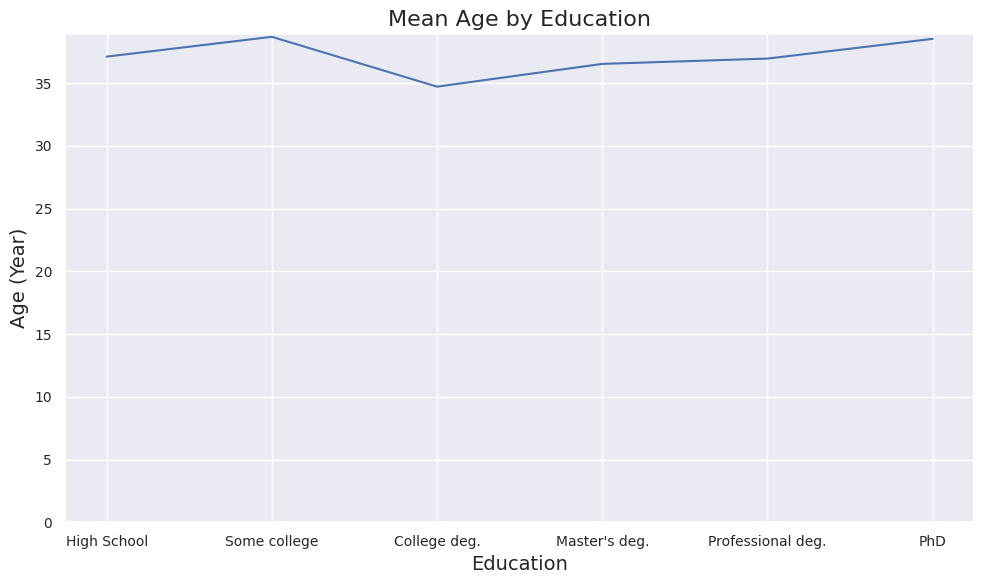

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='education', y='mean_age_range', data=mean_age_range_by_education)
plt.title('Mean Age by Education')
plt.xlabel('Education')
plt.ylabel('Age (Year)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, nilai mean usia sedikit menurun dari tingkat pendidikan 'Some college' hingga 'College degree', kemudian meningkat hingga tingkat pendidikan 'PhD'.

### Distribusi Usia Berdasarkan Tingkat Pendidikan

In [ ]:
pivot_table_education_age_range = df_copy.pivot_table(index='education', columns='age_range', aggfunc='size', fill_value=0)
pivot_table_education_age_range

age_range            under 18  18-24  25-34  35-44  45-54  55-64  65 or over
education                                                                   
High School                 4     54    154    218     73     30           2
Some college                2    110    605    623    346    147          10
College degree              0    818   6087   3447   1113    364          35
Master's degree             3    101   3533   3094    856    235          29
Professional degree         0      2    397    408    107     26           1
PhD                         0      1    396    537    186     43           5

Kode program ini bertujuan untuk membuat tabel pivot yang menunjukkan jumlah individu berdasarkan tingkat pendidikan (education) dan rentang usia (age_range). Berikut adalah penjelasan setiap baris kode.

1. `pivot_table_education_age_range = df_copy.pivot_table(index='education', columns='age_range', aggfunc='size', fill_value=0)`: Baris ini membuat tabel pivot dari DataFrame `df_copy` dengan tingkat pendidikan sebagai indeks (index) dan rentang usia sebagai kolom (columns).
   - `index='education'` mengindikasikan bahwa tingkat pendidikan akan digunakan sebagai indeks baris.
   - `columns='age_range'` mengindikasikan bahwa rentang usia akan digunakan sebagai kolom.
   - `aggfunc='size'` menunjukkan bahwa fungsi agregasi yang digunakan adalah jumlah (count) untuk menghitung berapa banyak individu yang memiliki kombinasi tertentu dari tingkat pendidikan dan rentang usia.
   - `fill_value=0` menetapkan nilai nol untuk sel-sel yang kosong dalam tabel pivot jika tidak ada data yang sesuai.
   - Hasilnya disimpan dalam variabel `pivot_table_education_age_range`.

2. `pivot_table_education_age_range`: Baris ini hanya mengeluarkan tabel pivot yang sudah dibuat.

Dengan demikian, setelah eksekusi kode ini, `pivot_table_education_age_range` akan berisi tabel pivot yang menunjukkan jumlah individu berdasarkan kombinasi tingkat pendidikan dan rentang usia.

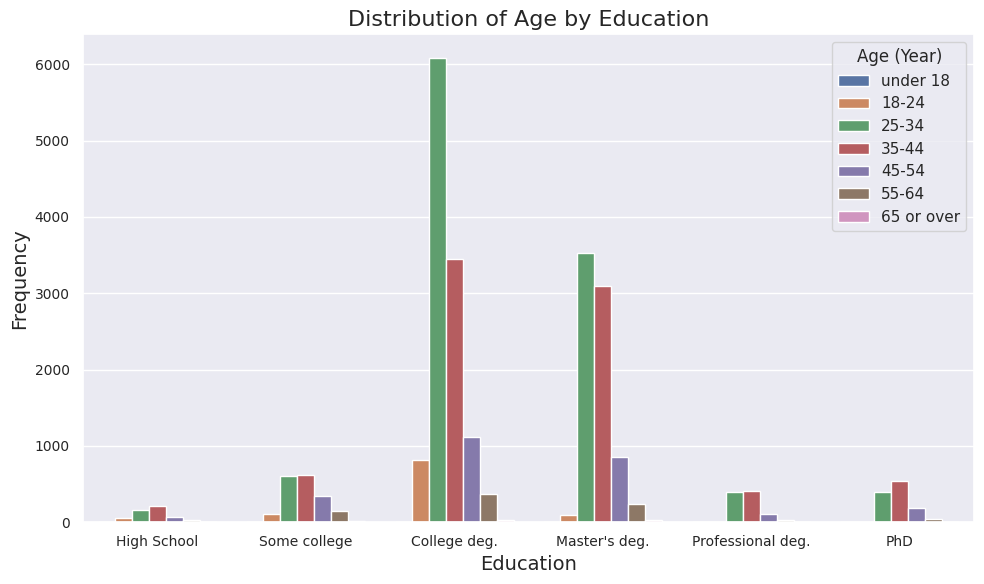

In [ ]:
age_range_by_education = df_copy.groupby(['education', 'age_range']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=age_range_by_education, x='education', y='count', hue='age_range')
plt.title('Distribution of Age by Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.legend(title='Age (Year)')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, tingkat pendidikan 'College degree' memiliki frekuensi tertinggi dibandingkan tingkat pendidikan lainnya berdasarkan usia.

### Pengujian Hipotesis Menggunakan Chi-square untuk Menentukan Apakah Distribusi Frekuensi di Berbagai Kategori Usia Berbeda Secara Signifikan berdasarkan Tingkat Pendidikan

In [ ]:
# Hipotesis nol (H0): Tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan.
# Hipotesis alternatif (H1): Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan.

# Membuat tabel kontingensi
contingency_table_education_age = pd.crosstab(df_copy['education'], df_copy['age_range'])

# Melakukan uji Chi-square
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_education_age)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan.")

Chi-square statistic: 1284.0992019264636
p-value: 3.439634047428748e-251
Menolak hipotesis nol: Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan.


Kode tersebut melakukan uji Chi-square untuk memeriksa apakah terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan. Berikut adalah penjelasan baris kode tersebut.

1. **Membuat Tabel Kontingensi**: Tabel kontingensi dibuat dengan menggunakan fungsi `pd.crosstab()` untuk menghitung frekuensi usia berdasarkan tingkat pendidikan dari DataFrame `df_copy`.

2. **Melakukan Uji Chi-square**: Menggunakan fungsi `chi2_contingency()` untuk menghitung nilai statistik Chi-square, p-value, derajat kebebasan (dof), dan nilai yang diharapkan dari tabel kontingensi.

3. **Menampilkan Output**: Mencetak nilai statistik Chi-square dan p-value.

4. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika p-value kurang dari alpha, maka hipotesis nol ditolak dan disimpulkan bahwa terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan. Jika tidak, maka gagal menolak hipotesis nol dan disimpulkan tidak terdapat perbedaan yang signifikan dalam distribusi frekuensi tersebut.

Output tersebut menunjukkan bahwa hasil uji Chi-square menunjukkan Nilai Chi-square statistic sebesar 1284.0992019264636 dan p-value sebesar 3.439634047428748e-251. Dikarenakan p-value kurang dari alpha, maka hipotesis nol ditolak. Oleh karena itu, kesimpulan yang dapat ditarik adalah "Terdapat perbedaan yang signifikan dalam distribusi frekuensi di berbagai kategori usia berdasarkan tingkat pendidikan." Hal ini menunjukkan bahwa terdapat hubungan yang signifikan antara tingkat pendidikan dan usia dalam dataset.

### Pengujian Hipotesis Menggunakan Korelasi Pearson untuk Menentukan Apakah Terdapat Hubungan antara Usia dan Pendidikan

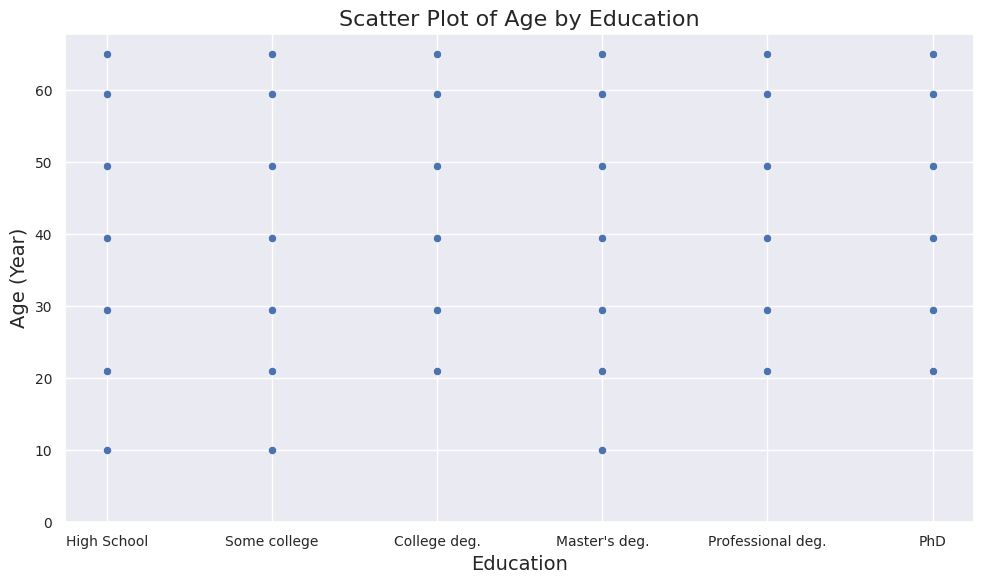

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education', y='numerical_age_range', data=df_copy)
plt.title('Scatter Plot of Age by Education')
plt.xlabel('Education')
plt.ylabel('Age (Year)')
plt.xticks(ticks=plt.xticks()[0], labels=["High School", "Some college", "College deg.", "Master's deg.", "Professional deg.", "PhD"])
plt.ylim(0)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi tersebut, korelasi antara usia dan tingkat pendidikan tidak terlalu terlihat. Plot tersebut menunjukkkan titk-titik nilai yang acak.

In [ ]:
# Hipotesis nol (H0): Tidak terdapat korelasi yang signifikan antara usia dan pendidikan.
# Hipotesis alternatif (H1): Terdapat korelasi yang signifikan antara usia dan pendidikan.

pearson_corr, pearson_p_value = pearsonr(df_copy['education_encoded'], df_copy['numerical_age_range'])

print("Korelasi Pearson antara pendidikan dan usia:", pearson_corr)
print("p-value:", pearson_p_value)

alpha = 0.05

if pearson_p_value < alpha:
    print("Menolak hipotesis nol: Terdapat korelasi yang signifikan antara usia dan pendidikan.")
else:
    print("Gagal menolak hipotesis nol: Tidak terdapat korelasi yang signifikan antara usia dan pendidikan.")

Korelasi Pearson antara pendidikan dan usia: 0.0373172463094168
p-value: 6.353999413342427e-09
Menolak hipotesis nol: Terdapat korelasi yang signifikan antara usia dan pendidikan.


Kode tersebut digunakan untuk menguji apakah terdapat korelasi yang signifikan antara usia dan pendidikan. Berikut adalah penjelasan setiap baris kode.

1. **Menghitung Korelasi Pearson**: Menggunakan fungsi `pearsonr()` untuk menghitung nilai korelasi Pearson antara pendidikan (diwakili oleh kolom 'education_encoded') dan usia (diwakili oleh kolom 'numerical_age_range') dari DataFrame `df_copy`. Korelasi Pearson menghasilkan dua nilai: nilai korelasi itu sendiri (`pearson_corr`) dan nilai p-value (`pearson_p_value`).

2. **Menampilkan Output**: Mencetak nilai korelasi Pearson antara pendidikan dan usia, serta nilai p-value yang dihasilkan dari pengujian.

3. **Mengevaluasi Hipotesis Nol**: Membandingkan nilai p-value dengan alpha (0.05). Jika nilai p-value kurang dari alpha, maka hipotesis nol ditolak, dan disimpulkan bahwa terdapat korelasi yang signifikan antara usia dan pendidikan. Jika nilai p-value lebih besar dari alpha, maka gagal menolak hipotesis nol, dan disimpulkan bahwa tidak terdapat korelasi yang signifikan antara kedua variabel tersebut.

Output tersebut menunjukkan hasil dari pengujian korelasi antara pendidikan dan usia menggunakan korelasi Pearson. Nilai korelasi Pearson antara pendidikan dan usia adalah 0.0373172463094168. Nilai korelasi yang sangat dekat dengan nol menunjukkan bahwa hubungan antara kedua variabel tersebut lemah. Nilai p-value dari pengujian adalah 6.353999413342427e-09. Nilai p-value yang sangat kecil menunjukkan bahwa kemungkinan menemukan korelasi semacam itu secara kebetulan sangat kecil. Karena nilai p-value (6.353999413342427e-09) lebih kecil dari alpha (0.05), kita menolak hipotesis nol. Oleh karena itu, kita menyimpulkan bahwa terdapat korelasi yang signifikan antara usia dan pendidikan. Dengan kata lain, terdapat hubungan yang signifikan antara tingkat pendidikan dan usia responden dalam dataset.

## Regresi Linier (*Linear Regression*)

In [ ]:
alpha = 0.05
independent_vars = ['numerical_age_range', 'numerical_work_experience_overall', 'numerical_work_experience_field', 'education_encoded']
summary_df = pd.DataFrame(columns=['F', 'p-value', 'S', 'R^2(adj)', 'VIF age_range', 'VIF work_experience_overall', 'VIF work_experience_field', 'VIF education'])
num_rows = 0

Kode tersebut bertujuan untuk mendefinisikan variabel-variabel yang dibutuhkan dalam melakukan regresi linier. Dalam kode tersebut, kita memulai dengan mendefinisikan nilai alpha, yang merupakan tingkat signifikansi yang biasanya digunakan dalam analisis statistik. Nilai alpha ini biasanya diatur pada 0.05, yang berarti bahwa kita akan menolak hipotesis nol jika p-value kurang dari 0.05.

Kemudian kita mendefinisikan `independent_vars`, yang merupakan daftar dari variabel independen yang akan digunakan dalam analisis regresi. Dalam hal ini, variabel independen terdiri dari `numerical_age_range`, `numerical_work_experience_overall`, `numerical_work_experience_field`, dan `education_encoded`.

Selanjutnya, kita membuat DataFrame `summary_df` yang akan digunakan untuk menyimpan hasil analisis regresi. DataFrame ini memiliki kolom-kolom yang sesuai dengan hasil yang ingin kita simpan, yaitu F-statistic, p-value, SSE (sum of squared errors), R^2(adj) (adjusted R-squared), dan VIF (variance inflation factor) untuk setiap variabel independen.

Variabel `num_rows` digunakan untuk melacak jumlah baris yang ada dalam DataFrame `summary_df`. Awalnya, variabel ini diatur ke 0 karena kita belum menambahkan baris apa pun ke DataFrame tersebut.

Dengan menggunakan struktur data DataFrame ini, kita dapat dengan mudah menyimpan, mengakses, dan menganalisis hasil analisis regresi untuk setiap variabel independen. Setiap kali kita melakukan analisis regresi untuk satu variabel independen, kita dapat menambahkan hasilnya sebagai baris baru ke DataFrame `summary_df`. Ini membantu dalam menyusun dan membandingkan hasil secara terorganisir.

### Matrik Korelasi antara Variabel Pendapatan, Usia, Pengalaman Kerja, dan Pendidikan

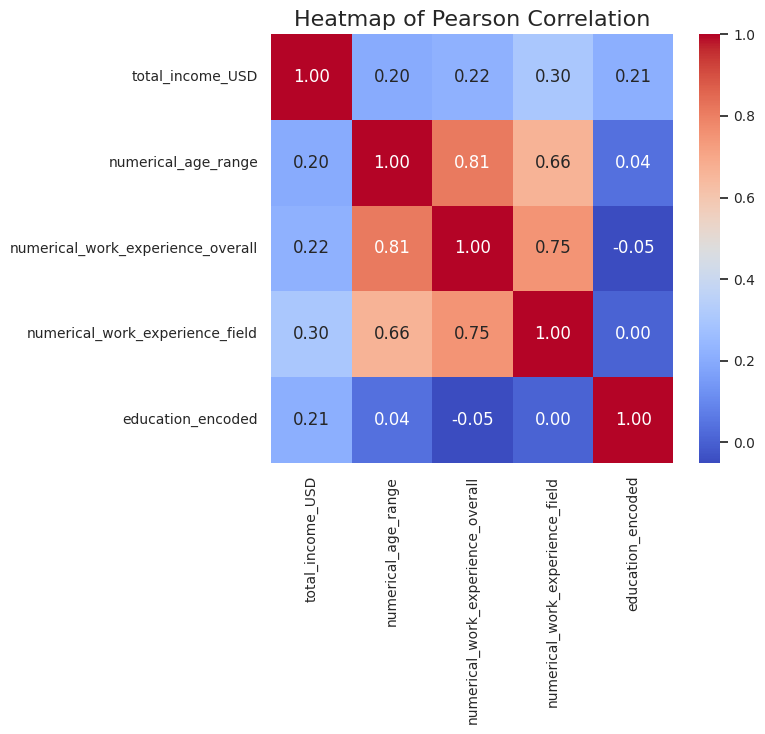

In [ ]:
correlation_matrix = df_copy[['total_income_USD'] + independent_vars].corr(method='pearson')
plt.figure(figsize=(8, 7.5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Pearson Correlation')
plt.tight_layout()
plt.show()

Kode tersebut bertujuan untuk membuat heatmap (peta panas) yang menampilkan korelasi Pearson antara variabel total pendapatan (`total_income_USD`) dan variabel independen lainnya yang terdaftar dalam `independent_vars`.

Pertama, kode tersebut menggunakan metode `corr()` pada DataFrame `df_copy` untuk menghitung korelasi Pearson antara variabel `total_income_USD` dan variabel independen lainnya yang terdaftar dalam `independent_vars`. Hasilnya disimpan dalam bentuk matriks korelasi. Kemudian, menggunakan `plt.figure(figsize=(8, 7.5))`, kita membuat objek gambar dengan ukuran 8x7.5 inci untuk menampung heatmap. Selanjutnya, dengan `sns.heatmap()`, kita membuat heatmap menggunakan seaborn (`sns`) library. Kita memasukkan matriks korelasi sebagai input dan menambahkan parameter `annot=True` untuk menampilkan nilai korelasi di dalam sel heatmap, serta `fmt=".2f"` untuk memformat nilai korelasi menjadi dua angka di belakang koma. Parameter `cmap='coolwarm'` digunakan untuk menentukan skema warna heatmap. Kemudian, dengan `plt.title()`, kita memberikan judul untuk heatmap yang kita buat. Terakhir, dengan `plt.tight_layout()` kita memastikan layout heatmap lebih rapi dan tidak terpotong, kemudian dengan `plt.show()` kita menampilkan heatmap tersebut.

Heatmap ini berguna untuk mengidentifikasi variabel yang mungkin terlalu berkorelasi untuk dimasukkan bersama-sama dalam model prediktif, karena dapat menyebabkan multikolinieritas. Ini juga membantu dalam pemilihan fitur untuk analisis lebih lanjut. Berdasarkan visualisasi tersebut, variabel 'numerical_work_experience_field' memiliki korelasi tertinggi dengan variabel dependen 'total_income_USD' di antara variabel-variabel independen lainnya. Variabel independen 'numerical_work_experience_field' juga tidak memiliki korelasi dengan variabel independen 'education_encoded', sehingga cocok untuk dikombinasikan dalam model regresi linier, tanpa khawatir adanya multikolinieritas.

### *Simple Linear Regression* untuk Prediksi Pendapatan

In [ ]:
for single_var in independent_vars:
    formula = f"total_income_USD ~ {single_var}"
    result = smf.ols(formula=formula, data=df_copy).fit()
    num_rows = len(summary_df)
    summary_df.loc[num_rows] = [result.fvalue, result.f_pvalue, np.sqrt(result.mse_resid), result.rsquared_adj, None, None, None, None]
    if single_var == 'numerical_age_range':
        summary_df.loc[num_rows, 'VIF age_range'] = 1
    elif single_var == 'numerical_work_experience_overall':
        summary_df.loc[num_rows, 'VIF work_experience_overall'] = 1
    elif single_var == 'numerical_work_experience_field':
        summary_df.loc[num_rows, 'VIF work_experience_field'] = 1
    elif single_var == 'education_encoded':
        summary_df.loc[num_rows, 'VIF education'] = 1

Kode ini melakukan regresi linear sederhana (*simple linear regression*) untuk setiap variabel independen yang terdaftar dalam `independent_vars` terhadap variabel dependen `total_income_USD`. Berikut adalah penjelasan setiap baris kode.

1. **Iterasi Variabel Independen**: Kode tersebut melakukan iterasi untuk setiap variabel independen dalam `independent_vars`.

2. **Membentuk Formula Regresi**: Untuk setiap variabel independen, formula regresi linear sederhana dibentuk dengan menggunakan variabel independen tersebut sebagai predictor dan `total_income_USD` sebagai variabel respons. Formula tersebut disimpan dalam variabel `formula`.

3. **Melakukan Regresi**: Model regresi linear sederhana dijalankan dengan menggunakan formula yang telah dibentuk dan data dari DataFrame `df_copy`. Hasilnya disimpan dalam variabel `result`.

4. **Menyimpan Statistik**: Statistik penting dari hasil regresi, seperti F-value, p-value, akar kuadrat MSE residu, dan R-squared yang disesuaikan, dimasukkan ke dalam DataFrame `summary_df`. Setiap kali regresi dilakukan untuk satu variabel independen, baris baru ditambahkan ke `summary_df` untuk menyimpan statistik hasil regresi tersebut.

5. **Menghitung VIF (Variance Inflation Factor)**: Variance Inflation Factor (VIF) digunakan untuk mengecek multicollinearity antara variabel independen. Dalam kasus ini, VIF diatur menjadi 1 untuk setiap variabel independen karena ini adalah simple linear regression, di mana tidak ada variabel independen lainnya dalam model.

Selanjutnya, `summary_df` akan berisi ringkasan dari hasil regresi linear sederhana untuk setiap variabel independen terhadap `total_income_USD`, bersama dengan VIF untuk setiap variabel independen jika diperlukan.

### *Multiple Linear Regression* untuk Prediksi Pendapatan

In [ ]:
for r in range(1, len(independent_vars) + 1):
    for combo in itertools.combinations(independent_vars, r):
        if len(combo) > 1:
            formula = "total_income_USD ~ " + " + ".join(combo)
            result = smf.ols(formula=formula, data=df_copy).fit()
            vif = [variance_inflation_factor(result.model.exog, i) for i in range(1, result.model.exog.shape[1])]
            vif_df = pd.DataFrame({'VIF': vif}, index=combo)
            num_rows = len(summary_df)
            summary_df.loc[num_rows] = [result.fvalue, result.f_pvalue, np.sqrt(result.mse_resid), result.rsquared_adj, None, None, None, None]
            for col_name in vif_df.index:
                if col_name in combo:
                    if col_name == 'numerical_age_range':
                        summary_df.loc[num_rows, 'VIF age_range'] = vif_df.loc[col_name, 'VIF']
                    elif col_name == 'numerical_work_experience_overall':
                        summary_df.loc[num_rows, 'VIF work_experience_overall'] = vif_df.loc[col_name, 'VIF']
                    elif col_name == 'numerical_work_experience_field':
                        summary_df.loc[num_rows, 'VIF work_experience_field'] = vif_df.loc[col_name, 'VIF']
                    elif col_name == 'education_encoded':
                        summary_df.loc[num_rows, 'VIF education'] = vif_df.loc[col_name, 'VIF']

Kode ini melakukan regresi linear berganda (*multiple linear regression*) dengan semua kombinasi dari variabel independen yang terdaftar dalam `independent_vars`. Berikut adalah penjelasan setiap baris kode.

1. **Iterasi Kombinasi Variabel Independen**: Kode tersebut menggunakan dua loop `for` untuk menciptakan semua kombinasi variabel independen yang mungkin. Loop pertama (`for r in range(1, len(independent_vars) + 1)`) mengatur jumlah variabel independen dalam setiap kombinasi, sedangkan loop kedua (`for combo in itertools.combinations(independent_vars, r)`) membuat semua kombinasi tersebut.

2. **Membentuk Formula Regresi**: Untuk setiap kombinasi variabel independen, sebuah formula regresi linear berganda dibuat dengan menggunakan variabel independen tersebut sebagai prediktor dan `total_income_USD` sebagai variabel respons. Formula ini disimpan dalam variabel `formula`.

3. **Melakukan Regresi**: Model regresi linear berganda dijalankan dengan menggunakan formula yang telah dibentuk dan data dari DataFrame `df_copy`. Hasilnya disimpan dalam variabel `result`.

4. **Menghitung VIF (Variance Inflation Factor)**: Variance Inflation Factor (VIF) digunakan untuk mengecek multicollinearity antara variabel independen. Kode ini menghitung VIF untuk setiap variabel independen dalam model dan menyimpannya dalam DataFrame `vif_df`.

5. **Menyimpan Statistik**: Statistik penting dari hasil regresi, seperti F-value, p-value, akar kuadrat MSE residu, dan R-squared yang disesuaikan, dimasukkan ke dalam DataFrame `summary_df`. Setiap kali regresi dilakukan untuk satu kombinasi variabel independen, baris baru ditambahkan ke `summary_df` untuk menyimpan statistik hasil regresi tersebut.

6. **Menyimpan VIF dalam Summary**: Nilai-nilai VIF yang telah dihitung untuk setiap variabel independen dalam suatu model juga dimasukkan ke dalam `summary_df`. Ini memungkinkan untuk memantau multicollinearity di antara variabel independen.

Dengan demikian, `summary_df` akan berisi ringkasan dari hasil regresi linear berganda untuk semua kombinasi variabel independen terhadap `total_income_USD`, bersama dengan VIF untuk setiap variabel independen dalam model-model tersebut jika diperlukan.

### Memilih Variabel Independen berdasarkan *Simple* atau *Multiple Linear Regression* untuk Prediksi Pendapatan

In [ ]:
# Batas untuk mendeteksi adanya multikolinieritas: VIF > 10
summary_df.sort_values(by=['R^2(adj)', 'S', 'F'], ascending=[False, True, False])

F        p-value             S  R^2(adj)  VIF age_range  \
14   950.057819   0.000000e+00  30683.242100  0.135593       3.048951   
12  1263.825260   0.000000e+00  30687.492755  0.135354       1.794849   
9   1893.575470   0.000000e+00  30689.315585  0.135251            NaN   
13  1262.621188   0.000000e+00  30689.473153  0.135242            NaN   
8   1315.847611   0.000000e+00  31343.163360  0.098011            NaN   
11   877.477935   0.000000e+00  31343.316052  0.098002       2.998464   
10   807.538027   0.000000e+00  31466.595291  0.090892       3.000846   
7   1210.649030   0.000000e+00  31466.782067  0.090882            NaN   
2   2417.308694   0.000000e+00  31468.549021  0.090780            NaN   
5   1208.670881   0.000000e+00  31469.120618  0.090747       1.791115   
6   1074.558313   0.000000e+00  31628.893629  0.081490       1.001395   
4    628.209870  1.043735e-266  32178.712079  0.049279       2.945524   
1   1223.734879  1.374772e-261  32198.757532  0.048094            NaN   
3   1143.635692  5.425893e-245  32249.599877  0.045086            NaN   
0    994.622796  5.652383e-214  32344.828958  0.039438       1.000000   

    VIF work_experience_overall  VIF work_experience_field  VIF education  
14                     3.959621                   2.364499       1.022682  
12                          NaN                   1.792392       1.002109  
9                           NaN                   1.000024       1.000024  
13                     2.330940                   2.325346       1.006547  
8                      1.002430                        NaN       1.002430  
11                     3.001563                        NaN       1.020446  
10                     3.879964                   2.359329            NaN  
7                      2.315834                   2.315834            NaN  
2                           NaN                   1.000000            NaN  
5                           NaN                   1.791115            NaN  
6                           NaN                        NaN       1.001395  
4                      2.945524                        NaN            NaN  
1                      1.000000                        NaN            NaN  
3                           NaN                        NaN       1.000000  
0                           NaN                        NaN            NaN

Kode tersebut bertujuan untuk menyortir DataFrame `summary_df` berdasarkan beberapa metrik penting dari hasil regresi linear berganda, yaitu adjusted R-squared (R^2(adj)), akar kuadrat MSE residu (S), dan F-value. Berikut adalah penjelasan tentang bagaimana kode tersebut bekerja.

1. **Sorting by Adjusted R-squared (R^2(adj))**: `ascending=False` menunjukkan bahwa hasilnya akan diurutkan dari nilai tertinggi ke terendah. Adjusted R-squared digunakan sebagai indikator kualitas model. Semakin tinggi nilai R^2(adj), semakin baik modelnya dalam menjelaskan variasi dalam data.

2. **Secondary Sorting by Root Mean Squared Error (S)**: Jika ada beberapa model dengan adjusted R-squared yang sama, mereka akan diurutkan berdasarkan akar kuadrat MSE residu. Akar kuadrat MSE residu menunjukkan seberapa baik model memperkirakan variabel respons. Semakin rendah nilai S, semakin baik modelnya.

3. **Tertiary Sorting by F-value**: Jika adjusted R-squared dan akar kuadrat MSE residu juga sama untuk beberapa model, maka hasilnya akan diurutkan berdasarkan nilai F-value. Nilai F-value digunakan untuk menilai signifikansi keseluruhan model. Semakin tinggi nilai F-value, semakin signifikan modelnya.

Dengan urutan ini, kita dapat dengan cepat mengidentifikasi model-model yang paling baik dalam menjelaskan hubungan antara variabel independen dan variabel respons, serta melihat apakah ada masalah multikolinieritas (jika nilai VIF lebih dari 10) yang perlu diperbaiki. Berdasarkan DataFrame tersebut, tiga model teratas (indeks 14, 12, dan 9) hasil regresi linear memiliki statistik yang cukup baik, dengan selisih R^2(adj) dan RMSE yang kecil di antara ketiga model tersebut. Kombinasi variabel independen yang dipilih adalah 'work_experience_field' dan 'education' yang tercatat pada indeks ke-9 dari DataFrame tersebut. Alasannya karena kombinasi antara kedua variabel tersebut memiliki VIF yang sangat kecil (mendekati 1), yakni sebesar 1.000024, sehingga yang terkecil di antara ketiga model tersebut. F-value yang dihasilkan juga tinggi, yakni sebesar 1893.575470, sehingga yang terbesar di antara ketiga model tersebut. Variabel independen 'work_experience_field' dan 'education' juga tidak memiliki korelasi, yang sudah dibuktikan melalui uji korelasi Pearson yang menghasilkan nilai korelasi Pearson sebesar 0.005, dan nilai p-value sebesar 0.449 (lebih besar dari alpha), sehingga cocok untuk dikombinasikan dalam model regresi linier, tanpa khawatir adanya multikolinieritas.

### Pembuatan Model Regresi Linier untuk Prediksi Pendapatan

In [ ]:
# Pisahkan fitur dan target
X = df_copy[['numerical_work_experience_field', 'education_encoded']]
y = df_copy['total_income_USD']

# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Persamaan regresi linier
print("Persamaan Regresi:")
print(f"total_income_USD = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * numerical_work_experience_field) + ({model.coef_[1]:.2f} * education_encoded)")

Persamaan Regresi:
total_income_USD = 38948.60 + (1390.25 * numerical_work_experience_field) + (7573.57 * education_encoded)


Kode program tersebut adalah implementasi sederhana dari regresi linier berganda menggunakan pustaka scikit-learn di Python. Berikut adalah penjelasan setiap baris kode.

1. **Pisahkan fitur dan target**: Variabel independen (fitur) disimpan dalam variabel `X`, sedangkan variabel dependen (target) disimpan dalam variabel `y`. Dalam contoh ini, fitur terdiri dari dua kolom, yaitu `numerical_work_experience_field` dan `education_encoded`, yang merupakan representasi numerik dari pengalaman kerja dan tingkat pendidikan. Targetnya adalah `total_income_USD`, yaitu pendapatan total dalam mata uang dolar.

2. **Bagi data menjadi data pelatihan dan data pengujian**: Menggunakan fungsi `train_test_split` dari scikit-learn untuk membagi data menjadi data pelatihan (`X_train`, `y_train`) dan data pengujian (`X_test`, `y_test`). Data pengujian digunakan untuk mengevaluasi kinerja model setelah dilatih.

3. **Inisialisasi model regresi linier**: Model regresi linier diinisialisasi menggunakan kelas `LinearRegression()` dari scikit-learn.

4. **Latih model dengan data pelatihan**: Model regresi linier dilatih (fit) menggunakan metode `fit()` dengan data pelatihan (`X_train`, `y_train`). Proses ini melibatkan penyesuaian koefisien model agar sesuai dengan data pelatihan.

5. **Persamaan regresi linier**: Setelah model dilatih, koefisien intersep (`intercept_`) dan koefisien untuk setiap fitur (`coef_`) dapat diakses. Dalam output, persamaan regresi linier ditampilkan dengan nilai intersep dan koefisien untuk setiap fitur. Ini menunjukkan kontribusi relatif dari setiap fitur terhadap variabilitas dalam target.

### Melakukan Prediksi Pendapatan Menggunakan Model Regresi Linier yang Telah Dibuat

#### Prediksi Pendapatan terhadap Data Uji

In [ ]:
# Gunakan model yang dilatih untuk melakukan prediksi pada data pengujian
predictions = model.predict(X_test)

# Evaluasi kinerja model dengan membandingkan prediksi dengan nilai sebenarnya
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Tampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 915562311.597016
Mean Absolute Error (MAE): 24382.014871774612
R-squared: 0.14515446692244438


Kode program ini mengevaluasi kinerja model regresi linier yang telah dilatih pada data pengujian. Berikut adalah penjelasan setiap baris kode.

1. **Prediksi**: Model yang telah dilatih digunakan untuk melakukan prediksi pada data pengujian (`X_test`). Hasil prediksi disimpan dalam variabel `predictions`.

2. **Evaluasi kinerja model**:
   - **Mean Squared Error (MSE)**: Ini adalah metrik yang mengukur rata-rata dari kuadrat perbedaan antara nilai sebenarnya (`y_test`) dan nilai prediksi (`predictions`). Semakin kecil nilai MSE, semakin baik modelnya.
   - **Mean Absolute Error (MAE)**: Ini adalah metrik yang mengukur rata-rata dari nilai absolut dari perbedaan antara nilai sebenarnya dan nilai prediksi. Seperti MSE, nilai MAE yang lebih rendah menunjukkan kinerja model yang lebih baik.
   - **R-squared (R²)**: Ini adalah metrik yang menyatakan seberapa baik variabilitas dalam variabel dependen yang dijelaskan oleh model. Nilai R² berkisar antara 0 dan 1, dan semakin mendekati 1, semakin baik modelnya.

3. **Tampilkan hasil evaluasi**: Hasil dari ketiga metrik evaluasi kinerja model, yaitu MSE, MAE, dan R², ditampilkan untuk memberikan pemahaman tentang seberapa baik model ini memprediksi data pengujian. Semakin kecil MSE dan MAE, dan semakin tinggi R², semakin baik kinerja modelnya.

Output tersebut memberikan evaluasi kinerja model regresi linier pada data pengujian. Berikut adalah penjelasan untuk setiap metrik.

- **Mean Squared Error (MSE)**: Nilainya adalah 915562311.60. MSE mengukur rata-rata dari kuadrat perbedaan antara nilai sebenarnya (pendapatan aktual) dan nilai prediksi (pendapatan yang diprediksi oleh model). Semakin kecil nilai MSE, semakin baik kinerja modelnya. Dalam konteks ini, MSE yang besar menunjukkan bahwa model regresi linier mungkin tidak memprediksi pendapatan dengan akurat.

- **Mean Absolute Error (MAE)**: Nilainya adalah 24382.01. MAE adalah rata-rata dari nilai absolut dari perbedaan antara nilai sebenarnya dan nilai prediksi. MAE yang lebih kecil menunjukkan kinerja model yang lebih baik dalam memprediksi nilai.

- **R-squared (R²)**: Nilainya adalah 0.145. R-squared (R²) mengukur seberapa baik variabilitas dalam variabel dependen (pendapatan) yang dapat dijelaskan oleh model. Dalam konteks ini, R² sebesar 0.145 menunjukkan bahwa model hanya mampu menjelaskan sekitar 14.5% dari variabilitas dalam data. Ini menandakan bahwa model mungkin tidak cocok dengan data atau terdapat faktor lain yang memengaruhi variabilitas pendapatan yang tidak dijelaskan oleh model. Semakin tinggi nilai R², semakin baik modelnya. Dalam kasus ini, nilai R² yang rendah menunjukkan bahwa model mungkin tidak cukup kuat untuk menjelaskan hubungan antara variabel independen (pengalaman kerja dan pendidikan) dan variabel dependen (pendapatan).

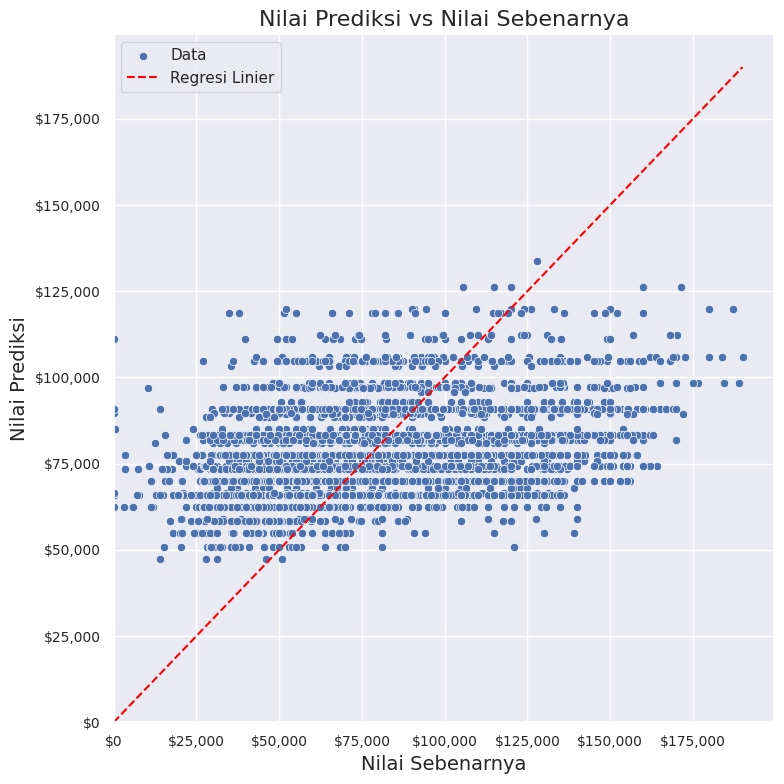

In [ ]:
# Plotting Nilai Prediksi vs Nilai Sebenarnya dengan Seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=predictions, label='Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regresi Linier')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Prediksi vs Nilai Sebenarnya')
plt.legend()
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat plot yang membandingkan nilai prediksi yang dihasilkan oleh model regresi linier dengan nilai sebenarnya pada data pengujian. Jika titik-titik pada plot ini mendekati garis regresi linier dan tersebar secara merata, itu menunjukkan bahwa model memberikan prediksi yang baik. Berdasarkan visualisasi tersebut, kita dapat mengamati beberapa hal sebagai berikut. Nilai prediksi umumnya lebih tinggi daripada nilai sebenarnya. Hal ini menunjukkan bahwa model cenderung melebih-lebihkan nilai yang sebenarnya. Terdapat beberapa titik data yang terletak jauh dari garis regresi linier. Hal ini menunjukkan bahwa model tidak dapat memprediksi dengan baik untuk beberapa pengamatan. Secara keseluruhan, model tampaknya dapat memprediksi nilai sebenarnya dengan performa yang cukup. Hal ini dibuktikan dengan terdapat beberapa titik data yang berada pada garis regresi linier.

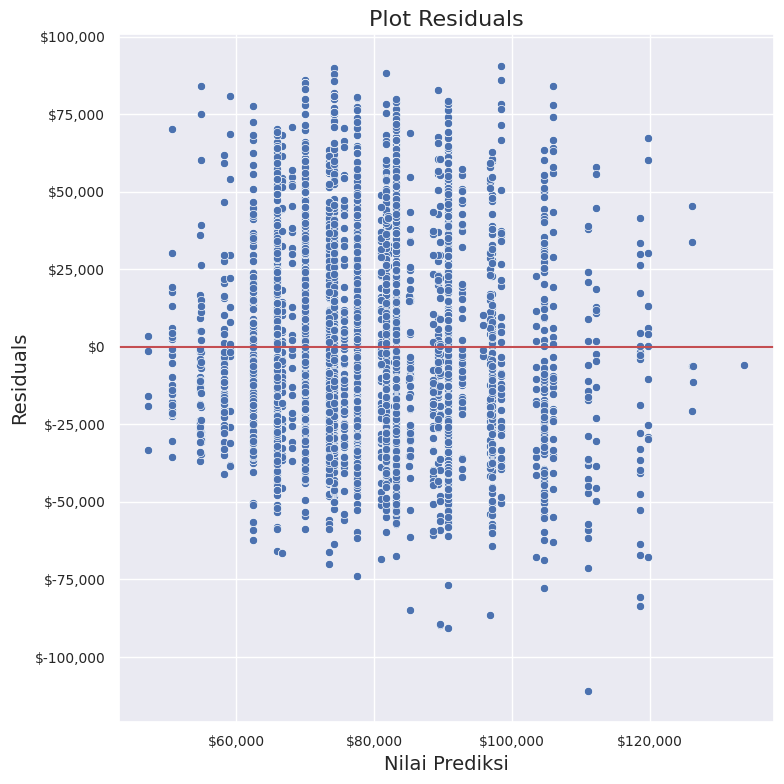

In [ ]:
# Plotting Residuals
plt.figure(figsize=(8, 8))
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.title('Plot Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat plot yang menunjukkan residual, yaitu selisih antara nilai sebenarnya dan nilai yang diprediksi oleh model. Berdasarkan visualisasi tersebut, kita dapat mengamati beberapa hal sebagai berikut. Terdapat beberapa titik yang mendekati nol yang menunjukkan keakuratan hasil prediksi oleh model tersebut. Titik-titik biru tersebar secara acak di sekitar garis nol menunjukkan bahwa model regresi memiliki residual yang acak dan tidak ada pola sistematis dalam prediksinya.

#### Prediksi Pendapatan terhadap Data Random

In [ ]:
# Buat list kategori education_encoded dan numerical_work_experience_field
education_categories = [4, 3, 5, 2, 1, 6]
work_experience_categories = [6, 9, 3, 25.5, 15.5, 0.5, 41, 35.5]

# Inisialisasi list untuk menyimpan dataframe
dataframes = []

# Loop untuk membuat 1000 dataframe
for i in range(1000):
    # Pilih secara acak tingkat pendidikan dan pengalaman kerja
    education = random.choice(education_categories)
    work_experience = random.choice(work_experience_categories)

    # Hitung pendapatan dengan hubungan linier
    income = random.randint(7000, 8000) * education + random.randint(1000, 2000) * work_experience + random.randint(38500, 39500)
    income = max(0, income)  # Pastikan pendapatan tidak negatif

    # Buat dataframe dengan data yang dihasilkan
    data = {
        'education_encoded': [education],
        'numerical_work_experience_field': [work_experience],
        'total_income_USD': [income]
    }
    df_random = pd.DataFrame(data)
    dataframes.append(df_random)

# Gabungkan semua dataframe ke dalam satu dataframe tunggal
df_test = pd.concat(dataframes, ignore_index=True)

# Tampilkan contoh 5 baris dari dataframe akhir
df_test.head()

education_encoded  numerical_work_experience_field  total_income_USD
0                  1                             25.5           87319.5
1                  6                             15.5          110806.5
2                  1                              9.0           57679.0
3                  3                             15.5           82711.5
4                  3                              6.0           67130.0

Kode ini bertujuan untuk membuat dataset sintetis yang terdiri dari 1000 baris dengan kolom-kolom `education_encoded`, `numerical_work_experience_field`, dan `total_income_USD`, yang akan digunakan untuk menguji model regresi linier yang sudah dibuat sebelumnya. Dataset sintetis tersebut dibuat berdasarkan hubungan linier antara kedua variabel independen (`education_encoded` dan `numerical_work_experience_field`) terhadap variabel dependen (`total_income_USD`). Berikut adalah penjelasan setiap baris kode.

1. **Membuat List Kategori**: `education_categories` dan `work_experience_categories` adalah list yang berisi kategori pendidikan dan pengalaman kerja. Ini digunakan untuk memilih secara acak nilai pendidikan dan pengalaman kerja dalam loop.

2. **Inisialisasi List DataFrame**: `dataframes` adalah list yang digunakan untuk menyimpan semua dataframe yang akan dibuat.

3. **Loop untuk Membuat DataFrame**: Loop `for` berjalan sebanyak 1000 iterasi untuk membuat 1000 dataframe. Pada setiap iterasi:
   - Dipilih secara acak nilai pendidikan dan pengalaman kerja dari list kategori yang telah ditentukan sebelumnya.
   - Pendapatan dihitung secara acak dengan menggunakan hubungan linier dari pendidikan dan pengalaman kerja, ditambah dengan angka acak untuk menghasilkan variasi, yang dipilih berdasarkan rentang nilai koefisien regresi.
   - Pastikan pendapatan tidak bernilai negatif dengan menggunakan fungsi `max(0, income)`.
   - DataFrame baru dibuat dengan data yang dihasilkan.

4. **Gabungkan DataFrame**: Menggunakan `pd.concat()` untuk menggabungkan semua dataframe yang telah dibuat ke dalam satu dataframe tunggal, yaitu `df_test`. Parameter `ignore_index=True` digunakan agar indeks baris pada dataframe akhir disesuaikan ulang.

5. **Tampilkan DataFrame**: Menggunakan `df_test.head()` untuk menampilkan lima baris pertama dari dataframe akhir sebagai contoh data sintetis yang dihasilkan.

In [ ]:
X_test = df_test[['numerical_work_experience_field', 'education_encoded']]
y_test = df_test['total_income_USD']

# Gunakan model yang dilatih untuk melakukan prediksi pada data pengujian
predictions = model.predict(X_test)

# Evaluasi kinerja model dengan membandingkan prediksi dengan nilai sebenarnya
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

# Tampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 47813829.23791232
Mean Absolute Error (MAE): 4717.067424262038
R-squared: 0.929001538866587


Kode ini melakukan evaluasi kinerja model regresi linier yang telah dilatih sebelumnya dengan menggunakan data pengujian baru yaitu `df_test`, yang merupakan dataset sintetis yang dibuat berdasarkan hubungan linier antara variabel independen terhadap variabel dependen. Berikut adalah penjelasan untuk setiap baris kode.

1. **Membuat Variabel Independent dan Dependent untuk Data Pengujian**: Variabel `X_test` berisi fitur-fitur dari data pengujian yang akan digunakan untuk melakukan prediksi, yaitu `numerical_work_experience_field` dan `education_encoded`. Variabel `y_test` berisi target nilai yang sebenarnya dari data pengujian, yaitu `total_income_USD`.

2. **Melakukan Prediksi**: Menggunakan model regresi linier yang telah dilatih sebelumnya (`model`) untuk melakukan prediksi terhadap fitur-fitur dari data pengujian (`X_test`). Hasil prediksi disimpan dalam variabel `predictions`.

3. **Evaluasi Kinerja Model**: Menggunakan tiga metrik evaluasi untuk mengevaluasi kinerja model:
   - **Mean Squared Error (MSE)**: Mengukur rata-rata dari kuadrat perbedaan antara nilai sebenarnya dan nilai prediksi. Semakin rendah nilainya, semakin baik modelnya.
   - **Mean Absolute Error (MAE)**: Mengukur rata-rata dari nilai absolut perbedaan antara nilai sebenarnya dan nilai prediksi. Semakin rendah nilainya, semakin baik modelnya.
   - **R-squared**: Juga dikenal sebagai koefisien determinasi, mengukur seberapa baik variabilitas dalam data yang dijelaskan oleh model. Nilai R-squared berkisar dari 0 hingga 1, dan semakin mendekati 1, semakin baik modelnya.

4. **Menampilkan Hasil Evaluasi**: Menggunakan `print()` untuk menampilkan hasil evaluasi model, yaitu MSE, MAE, dan R-squared. Output yang ditampilkan menunjukkan nilai-nilai dari ketiga metrik tersebut untuk model yang diuji.

Output tersebut memberikan evaluasi kinerja model regresi linier pada data pengujian baru yang mirip dengan data yang digunakan untuk melatih model. Berikut adalah penjelasan untuk setiap metrik.

- **Mean Squared Error (MSE)**: Nilai MSE yang relatif rendah (sekitar 47 juta) menunjukkan bahwa rata-rata dari kuadrat perbedaan antara nilai sebenarnya dan nilai prediksi pada data pengujian baru relatif kecil. Ini berarti model cenderung memberikan prediksi yang dekat dengan nilai sebenarnya dalam kaitannya dengan pendapatan, berdasarkan pengalaman kerja dan pendidikan.

- **Mean Absolute Error (MAE)**: Nilai MAE yang juga relatif rendah (sekitar 4700) menunjukkan bahwa rata-rata dari nilai absolut perbedaan antara nilai sebenarnya dan nilai prediksi pada data pengujian baru juga relatif kecil. Hal ini menandakan bahwa model memiliki kemampuan untuk memberikan prediksi yang cukup akurat dalam kaitannya dengan pendapatan.

- **R-squared**: Nilai R-squared yang tinggi (sekitar 0.929) mengindikasikan bahwa sebagian besar variabilitas dalam data pengujian dapat dijelaskan oleh model. Artinya, model tersebut berhasil dalam menjelaskan variasi dalam pendapatan dengan menggunakan pengalaman kerja dan pendidikan sebagai prediktor.

Dengan demikian, hasil evaluasi tersebut menunjukkan bahwa model regresi linier mampu menggambarkan hubungan linier antara variabel independen (pengalaman kerja dan pendidikan) dengan variabel dependen (pendapatan) dengan baik pada dataset sintetis yang dibuat berdasarkan hubungan linier antara variabel tersebut.

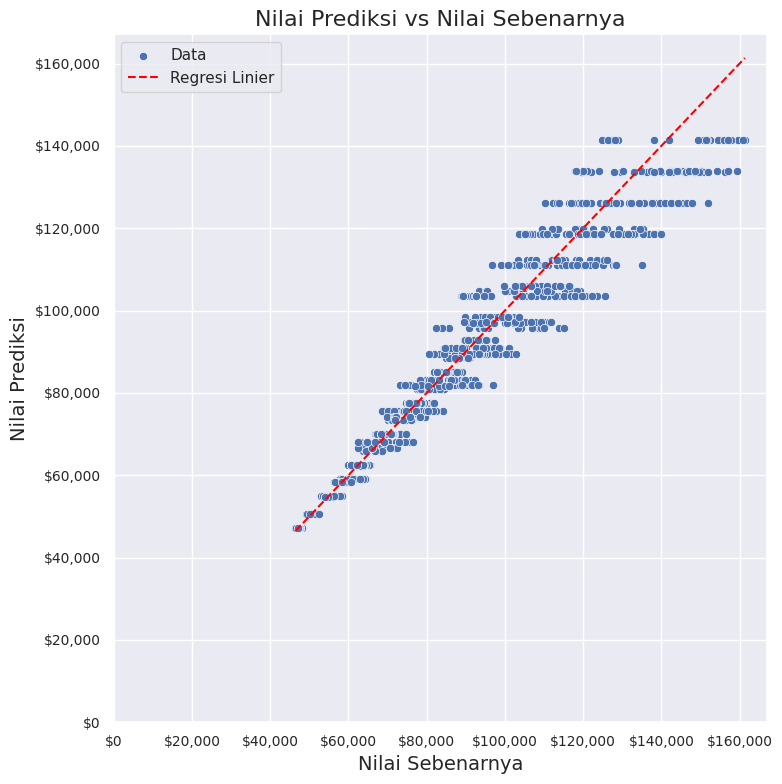

In [ ]:
# Plotting Nilai Prediksi vs Nilai Sebenarnya dengan Seaborn
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=predictions, label='Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regresi Linier')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Prediksi vs Nilai Sebenarnya')
plt.legend()
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlim(0)
plt.ylim(0)
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat plot yang membandingkan nilai prediksi yang dihasilkan oleh model regresi linier dengan nilai sebenarnya pada data pengujian. Jika titik-titik pada plot ini mendekati garis regresi linier dan tersebar secara merata, itu menunjukkan bahwa model memberikan prediksi yang baik. Berdasarkan visualisasi tersebut, terlihat adanya korelasi positif antara nilai prediksi dan nilai sebenarnya, yang ditandai dengan sebagian besar titik biru yang berdekatan dengan garis regresi linier. Ini adalah indikator bahwa model memiliki kemampuan prediksi yang baik untuk data yang diberikan, yakni dataset sintetis yang dibuat berdasarkan hubungan linier antara variabel independen dan dependen.

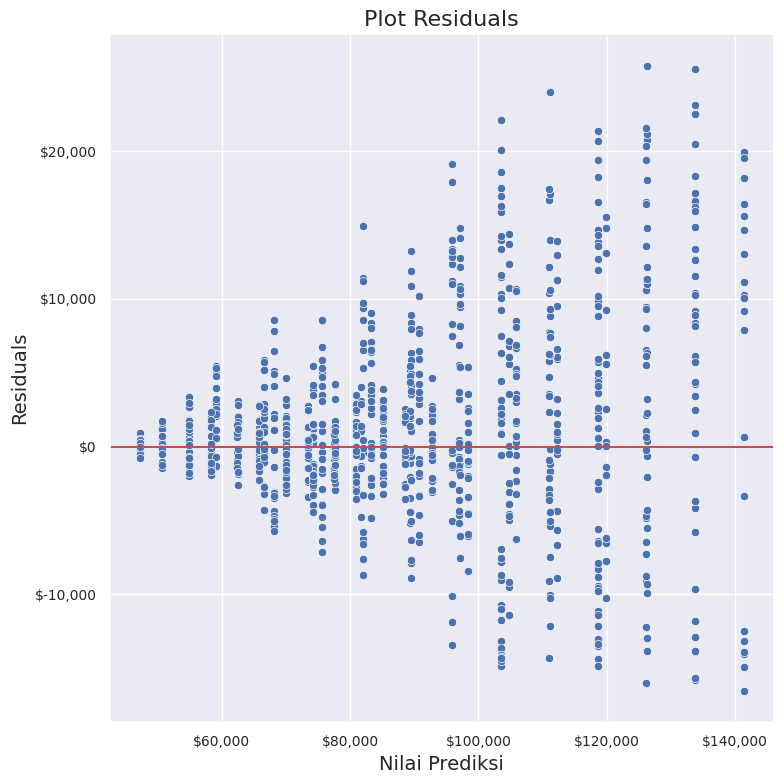

In [ ]:
# Plotting Residuals
plt.figure(figsize=(8, 8))
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.title('Plot Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Kode ini bertujuan untuk membuat plot yang menunjukkan residual, yaitu selisih antara nilai sebenarnya dan nilai yang diprediksi oleh model. Berdasarkan visualisasi tersebut, kita dapat mengamati beberapa hal sebagai berikut. Untuk prediksi yang bernilai dibawah \$80.000, titik-titik biru cenderung berada kurang dari \$10.000, hal ini menunjukkan bahwa model menghasilkan prediksi yang akurat dalam rentang \$0 hingga \$80.000. Untuk nilai diatas \$80.000, titik-titik biru cenderung tersebar secara acak seiring peningkatan nilai prediksi. Ini adalah indikator bahwa model memiliki kemampuan prediksi yang baik untuk data yang diberikan, yakni dataset sintetis yang dibuat berdasarkan hubungan linier antara variabel independen dan dependen.

### Kesimpulan Hasil Prediksi Model Regresi Linier

Dari hasil evaluasi model regresi linier pada kedua dataset, dapat ditarik kesimpulan sebagai berikut:

1. **Dataset Latih**:
   - Mean Squared Error (MSE): 915562311.597
   - Mean Absolute Error (MAE): 24382.015
   - R-squared: 0.145

   Kesimpulan:
   - MSE yang tinggi menunjukkan bahwa model memiliki tingkat error yang besar dalam memprediksi nilai.
   - MAE yang cukup besar juga menunjukkan bahwa model cenderung memiliki deviasi yang signifikan dari nilai sebenarnya.
   - R-squared yang rendah (0.145) menunjukkan bahwa model hanya mampu menjelaskan sekitar 14.5% variabilitas dalam data. Artinya, model tidak cukup baik dalam menjelaskan variasi dalam data latih.

2. **Dataset Sintetis**:
   - Mean Squared Error (MSE): 47813829.238
   - Mean Absolute Error (MAE): 4717.067
   - R-squared: 0.929

   Kesimpulan:
   - MSE yang lebih rendah menunjukkan bahwa model memiliki tingkat error yang lebih rendah dalam memprediksi nilai pada dataset sintetis.
   - MAE yang juga lebih rendah menunjukkan bahwa model memiliki deviasi yang lebih kecil dari nilai sebenarnya pada dataset sintetis.
   - R-squared yang tinggi (0.929) menunjukkan bahwa model mampu menjelaskan sekitar 92.9% variabilitas dalam data sintetis. Ini menandakan bahwa model secara keseluruhan sangat baik dalam menjelaskan variasi dalam data.

Dengan demikian, dapat disimpulkan bahwa model regresi linier memiliki performa yang lebih baik dalam memprediksi nilai pendapatan berdasarkan pendidikan dan pengalaman kerja pada dataset sintetis yang dibuat berdasarkan hubungan linier antara variabel independen dan variabel dependen. Sedangkan pada dataset latih, model tersebut kurang efektif dalam menjelaskan variasi dalam data.